<a href="https://colab.research.google.com/github/khixson1/ARM_Data_Sensor_Analysis/blob/main/ARM_Data_Sensor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kim K. Hixson (PNNL)
05/22/2023

#**Data File Information (e.g., Locations, Sensors):**
A more stable spectral instrument at all our sites is the **MFRSR - multi-filter rotating shadowband radiometer** that measures hemispheric and diffuse radiation at 6 wavelengths and is used to derive the aerosol optical depth.
**Information on all instruments:**
https://arm.gov/capabilities/instruments/

###**1.   North Slope Alaska (NSA)** (nsametclimateregimesoutputC1.c1):
***Flask, TDMA and APS are only deployed at the Oklahoma Site***
**FLASK: Flask Samplers for Carbon Cycle Gases and Isotopes**
Baseline Instrument, Guest Active
2 April 2002 - 16 April 2023

**TDMA: Tandem Differential Mobility Analyzer**
Baseline Instrument, Baseline VAP, Guest
7 October 2005 - 20 November 2014

**APS: Aerodynamic Particle Sizer**
Baseline Instrument, Guest Active
15 November 2016 - 20 May 2023
_________________________________________________________________________
***All NSA Instruments:***
https://arm.gov/capabilities/instruments?type[0]=armobs&location[0]=North%20Slope%20Alaska

###**2.South Great Plains (SGP)-Oklahoma** (sgpmetclimateregimesoutputE13.c1):
*Your best bet for aerosol measurements would be at the SGP site in Oklahoma.* *There we have the longest running record and the most diverse aerosol* *measurements. We also visible hyperspectral instruments at SGP*
*I will warn you that these instruments have had some mechanical issues over the years. *

***Flask, TDMA and APS are only deployed at the Oklahoma Site***

**FLASK: Flask Samplers for Carbon Cycle Gases and Isotopes**
Baseline Instrument, Guest Active
2 April 2002 - 16 April 2023

**TDMA: Tandem Differential Mobility Analyzer**
Baseline Instrument, Baseline VAP, Guest
7 October 2005 - 20 November 2014

**APS: Aerodynamic Particle Sizer**
Baseline Instrument, Guest Active
15 November 2016 - 20 May 2023

____________________________________________________________________

***Your best bet for aerosol measurements would be at the SGP site in Oklahoma. There we have the longest running record and the most diverse aerosol measurements. We also visible hyperspectral instruments at SGP***

**SWS: Shortwave Spectroradiometer**
Baseline Instrument, Guest Active
11 March 1998 - 31 March 2015

**SASZE: Shortwave Array Spectroradiometer-Zenith**
Baseline Instrument Active
22 March 2011 - 20 May 2023

**SASHE: Shortwave Array Spectroradiometer-Hemispheric**
Baseline Instrument Active
22 March 2011 - 20 May 2023
___________________________________________________________________

***All SGP Instruments:***
https://arm.gov/capabilities/instruments?type[0]=armobs&location[0]=Southern%20Great%20Plains

###**3.Tropical Western Pacific(TWP)/Darwin Australia(C3)**(twpmetclimateregimesoutputC3.c1)
*The recommended datastream to use would be the AERi Noise Filter Value Added Product (https://arm.gov/capabilities/science-data-products/vaps/aerinf)*

*   **AERI: Atmospheric Emitted Radiance Interferometer [Hyperspectral]**
Baseline Instrument, Evaluation Instrument, External Instrument, Guest Active
10 January 1994 - 20 May 2023

_________________________________________________________________________
***All TWP Instruments:***
https://arm.gov/capabilities/instruments?type[0]=armobs&location[0]=Tropical%20Western%20Pacific


#Mount Google Drive

In [1]:
# Mount google drive. This cell can be deleted if using something other than the Google Colab Python environment
from google.colab import drive
drive.mount('/content/drive')

# os import to enable drive and folder structure setup
import os

Mounted at /content/drive


#Import Libraries/Packages

In [2]:
# Install of basic xarray package using pip
%%capture
!pip install xarray

In [3]:
# Install associated xarray files for enhanced xarray functionality
%%capture
!pip install "xarray[complete]"

In [4]:
# Install pip install netCDF4
%%capture
!pip install netCDF4

In [5]:
# Install pip cartopy
#%%capture
#!pip install cartopy

In [6]:
# Install FPDF to construct report of analysis. Remove ! if using something other than Google's Colab Python environment.
# FPDF creates pdf report
%%capture
!pip install fpdf

In [7]:
# Import bioinfokit into collaboratory
%%capture
!pip install bioinfokit

In [8]:
# Import to write plotly figures
%%capture
!pip install -U kaleido

In [9]:
# Imports of other needed/desired libraries
import os
import re
import pandas as pd
import numpy as np
import scipy as spi
#import cartopy as ct
import bottleneck as bn
import xarray as xr
import urllib.request, urllib.error
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import itertools
import operator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Working Drive and Input File Folder Path

In [10]:
# Enter working directory here:
work_dir = '/content/drive/MyDrive/'   # This is an example of the path to my Google Drive with an existing folder called 'Colab_Notebooks'

# Enter 'Project Name' you want to use for this specific project (which files you want to ultimately combine into single .csv file)
my_project = 'ARM_Data_Analysis'

# File directory where input .txt files are located if different than working directory.After creating file directory here, upload .txt file in that locationl
input_file_folder = (work_dir + 'ARM_Data/Input_Files/') # Modify or add file location here. Example: (work_dir +'Input_Files/')
                                                                                   # Upload .txt file to this location after directory folder is created.
                                                                                   # Must create these files and upload data to specified directory prior to starting runtime.

# File directory where you want your resultant files to be located (Default is the work_dir/my_project/)
file_dir = (work_dir + my_project + '/')

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
    print("Directory '",file_dir,  "' Created")
else:
    print("Directory '",file_dir,  "' already exists")

Directory ' /content/drive/MyDrive/ARM_Data_Analysis/ ' already exists


In [11]:
# File directory where you want long verison of completed .csv analyses deposited
file_output = (work_dir + my_project +'/Output_Files_Full/') # Modify or add file location. Example: (work_dir +'Output_Files/')

# File directory where you want figures deposited
figure_output = (work_dir + my_project +'/Figures/') # Modify or add file location. Example: (work_dir +'Figures/')
if not os.path.exists(figure_output):
    os.makedirs(figure_output)
    print("Directory '" , figure_output ,  "' Created")
else:
    print("Directory '" , figure_output ,  "' already exists")

# File directory where you want summary pdf deposited
summary_output = (work_dir + my_project +'/Summay/') # Modify or add file location. Example: (work_dir +'Figures/')
if not os.path.exists(summary_output):
    os.makedirs(summary_output)
    print("Directory '" , summary_output ,  "' Created")
else:
    print("Directory '" , summary_output ,  "' already exists")

# File directory where you want completed concatenated .csv files deposited
concatenated_results = (work_dir + my_project +'/Combined_csv/') # Modify or add file location. Example: (work_dir +'Results/')
if not os.path.exists(concatenated_results):
    os.makedirs(concatenated_results)
    print("Directory '" , concatenated_results ,  "' Created")
else:
    print("Directory '" , concatenated_results ,  "' already exists")

Directory ' /content/drive/MyDrive/ARM_Data_Analysis/Figures/ ' already exists
Directory ' /content/drive/MyDrive/ARM_Data_Analysis/Summay/ ' already exists
Directory ' /content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/ ' already exists


In [12]:
#Bring in full data time table
filename = input_file_folder + 'Date_Time.csv'

df_datetime = pd.read_csv(filename).iloc[0:,0:6]

display(df_datetime.info())
display(df_datetime.shape)
display(df_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Order      96432 non-null  int64 
 1   Year       96432 non-null  int64 
 2   Month      96432 non-null  int64 
 3   Day        96432 non-null  int64 
 4   Hour       96432 non-null  int64 
 5   data_time  96432 non-null  object
dtypes: int64(5), object(1)
memory usage: 4.4+ MB


None

(96432, 6)

Order  Year  Month  Day  Hour      data_time
0          1  2004      1    1     0    2004_1_1_00
1          2  2004      1    1     1    2004_1_1_01
2          3  2004      1    1     2    2004_1_1_02
3          4  2004      1    1     3    2004_1_1_03
4          5  2004      1    1     4    2004_1_1_04
...      ...   ...    ...  ...   ...            ...
96427  96428  2014     12   31    19  2014_12_31_19
96428  96429  2014     12   31    20  2014_12_31_20
96429  96430  2014     12   31    21  2014_12_31_21
96430  96431  2014     12   31    22  2014_12_31_22
96431  96432  2014     12   31    23  2014_12_31_23

[96432 rows x 6 columns]

In [13]:
#Bring in sensor failure data
filename = input_file_folder + 'sensor_failure_data.csv'

df_sensor_failure = pd.read_csv(filename)

display(df_sensor_failure.info())
display(df_sensor_failure.shape)
display(df_sensor_failure)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289296 entries, 0 to 289295
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Location                           289296 non-null  object
 1   data_time                          289296 non-null  object
 2   bad_met_atmos_pressure             289296 non-null  int64 
 3   bad_met_logger_temp                289296 non-null  int64 
 4   bad_met_logger_volt                289296 non-null  int64 
 5   bad_met_rh_mean                    289296 non-null  int64 
 6   bad_met_temp_mean                  289296 non-null  int64 
 7   bad_met_wspd_arith_mean            289296 non-null  int64 
 8   bad_met_pws_cumul_rain             289296 non-null  int64 
 9   bad_met_pws_cumul_snow             289296 non-null  int64 
 10  bad_met_pws_err_code               289296 non-null  int64 
 11  bad_met_pws_precip_rate_mean_1min  289296 non-null  

None

(289296, 12)

Location      data_time  bad_met_atmos_pressure  bad_met_logger_temp  \
0        NSA_C1    2004_1_1_00                       0                    0   
1        NSA_C1    2004_1_1_01                       0                    0   
2        NSA_C1    2004_1_1_02                       0                    0   
3        NSA_C1    2004_1_1_03                       0                    0   
4        NSA_C1    2004_1_1_04                       0                    0   
...         ...            ...                     ...                  ...   
289291   TWP_C3  2014_12_31_19                       0                    0   
289292   TWP_C3  2014_12_31_20                       0                    0   
289293   TWP_C3  2014_12_31_21                       0                    0   
289294   TWP_C3  2014_12_31_22                       0                    0   
289295   TWP_C3  2014_12_31_23                       0                    0   

        bad_met_logger_volt  bad_met_rh_mean  bad_met_temp_mean  \
0                         0                0                  0   
1                         0                0                  0   
2                         0                0                  0   
3                         0                0                  0   
4                         0                0                  0   
...                     ...              ...                ...   
289291                    0                0                  0   
289292                    0                0                  0   
289293                    0                0                  0   
289294                    0                0                  0   
289295                    0                0                  0   

        bad_met_wspd_arith_mean  bad_met_pws_cumul_rain  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
289291                        0                       0   
289292                        0                       0   
289293                        0                       0   
289294                        0                       0   
289295                        0                       0   

        bad_met_pws_cumul_snow  bad_met_pws_err_code  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   
...                        ...                   ...   
289291                       0                     0   
289292                       0                     0   
289293                       0                     0   
289294                       0                     0   
289295                       0                     0   

        bad_met_pws_precip_rate_mean_1min  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
289291                                  0  
289292                                  0  
289293                                  0  
289294                                  0  
289295                                  0  

[289296 rows x 12 columns]

In [14]:
#Add full date-time column
Hour_all = df_datetime['data_time'].values.tolist()

df_datetime['DateTimeAll'] = Hour_all

In [15]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  #NSA DATA
  NSA_C1_1 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20040101.000000.cdf"
  NSA_C1_2 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20040719.000000.cdf"
  NSA_C1_3 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20041022.000000.cdf"
  NSA_C1_4 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20041023.000000.cdf"
  NSA_C1_5 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20050101.000000.cdf"
  NSA_C1_6 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20060101.000000.cdf"
  NSA_C1_7 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20060102.000000.cdf"
  NSA_C1_8 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20060109.000000.cdf"
  NSA_C1_9 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20061018.000000.cdf"
  NSA_C1_10 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20070101.000000.cdf"
  NSA_C1_11 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20080101.000000.cdf"
  NSA_C1_12 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20080730.000000.cdf"
  NSA_C1_13 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20080918.000000.cdf"
  NSA_C1_14 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20081101.000000.cdf"
  NSA_C1_15 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20090101.000000.cdf"
  NSA_C1_16 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20090608.000000.cdf"
  NSA_C1_17 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20090610.000000.cdf"
  NSA_C1_18 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20090613.000000.cdf"
  NSA_C1_19 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20100101.000000.cdf"
  NSA_C1_20 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20100123.000000.cdf"
  NSA_C1_21 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20100910.000000.cdf"
  NSA_C1_22 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20110101.000000.cdf"
  NSA_C1_23 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20120101.000000.cdf"
  NSA_C1_24 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20120926.000000.cdf"
  NSA_C1_25 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20130101.000000.cdf"
  NSA_C1_26 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20130222.000000.cdf"
  NSA_C1_27 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20140101.000000.cdf"
  NSA_C1_28 = "nsametclimateregimesoutputC1/nsametclimateregimesoutputC1.c1.20140206.000000.cdf"

  #SGP DATA
  SGP_E13_1 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20040101.000000.cdf"
  SGP_E13_2 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20040726.000000.cdf"
  SGP_E13_3 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20050101.000000.cdf"
  SGP_E13_4 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20060101.000000.cdf"
  SGP_E13_5 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20070101.000000.cdf"
  SGP_E13_6 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20080101.000000.cdf"
  SGP_E13_7 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20090101.000000.cdf"
  SGP_E13_8 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20100101.000000.cdf"
  SGP_E13_9 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20100910.000000.cdf"
  SGP_E13_10 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20110101.000000.cdf"
  SGP_E13_11 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20110115.000000.cdf"
  SGP_E13_12 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20120101.000000.cdf"
  SGP_E13_13 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20120908.000000.cdf"
  SGP_E13_14 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20130101.000000.cdf"
  SGP_E13_15 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20131221.000000.cdf"
  SGP_E13_16 = "sgpmetclimateregimesoutputE13/sgpmetclimateregimesoutputE13.c1.20140101.000000.cdf"

  #TWP DATA
  TWP_C3_1 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20040101.000000.cdf"
  TWP_C3_2 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20050101.000000.cdf"
  TWP_C3_3 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20050209.000000.cdf"
  TWP_C3_4 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20050419.000000.cdf"
  TWP_C3_5 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20050805.000000.cdf"
  TWP_C3_6 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20051114.000000.cdf"
  TWP_C3_7 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20060101.000000.cdf"
  TWP_C3_8 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20060627.000000.cdf"
  TWP_C3_9 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20070101.000000.cdf"
  TWP_C3_10 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20070302.000000.cdf"
  TWP_C3_11 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20070303.000000.cdf"
  TWP_C3_12 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20070701.000000.cdf"
  TWP_C3_13 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20080101.000000.cdf"
  TWP_C3_14 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20080105.000000.cdf"
  TWP_C3_15 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20080708.000000.cdf"
  TWP_C3_16 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20090101.000000.cdf"
  TWP_C3_17 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20090930.000000.cdf"
  TWP_C3_18 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20100101.000000.cdf"
  TWP_C3_19 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20100817.000000.cdf"
  TWP_C3_20 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20110101.000000.cdf"
  TWP_C3_21 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20120101.000000.cdf"
  TWP_C3_22 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20130101.000000.cdf"
  TWP_C3_23 = "twpmetclimateregimesoutputC3/twpmetclimateregimesoutputC3.c1.20140101.000000.cdf"


file_exists


In [16]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # Read in each .cdf file and name array dataset with simple name
  #NSA DATA
  NSA_C1_1_xr = xr.load_dataset(NSA_C1_1)
  NSA_C1_2_xr = xr.load_dataset(NSA_C1_2)
  NSA_C1_3_xr = xr.load_dataset(NSA_C1_3)
  NSA_C1_4_xr = xr.load_dataset(NSA_C1_4)
  NSA_C1_5_xr = xr.load_dataset(NSA_C1_5)
  NSA_C1_6_xr = xr.load_dataset(NSA_C1_6)
  NSA_C1_7_xr = xr.load_dataset(NSA_C1_7)
  NSA_C1_8_xr = xr.load_dataset(NSA_C1_8)
  NSA_C1_9_xr = xr.load_dataset(NSA_C1_9)
  NSA_C1_10_xr = xr.load_dataset(NSA_C1_10)
  NSA_C1_11_xr = xr.load_dataset(NSA_C1_11)
  NSA_C1_12_xr = xr.load_dataset(NSA_C1_12)
  NSA_C1_13_xr = xr.load_dataset(NSA_C1_13)
  NSA_C1_14_xr = xr.load_dataset(NSA_C1_14)
  NSA_C1_15_xr = xr.load_dataset(NSA_C1_15)
  NSA_C1_16_xr = xr.load_dataset(NSA_C1_16)
  NSA_C1_17_xr = xr.load_dataset(NSA_C1_17)
  NSA_C1_18_xr = xr.load_dataset(NSA_C1_18)
  NSA_C1_19_xr = xr.load_dataset(NSA_C1_19)
  NSA_C1_20_xr = xr.load_dataset(NSA_C1_20)
  NSA_C1_21_xr = xr.load_dataset(NSA_C1_21)
  NSA_C1_22_xr = xr.load_dataset(NSA_C1_22)
  NSA_C1_23_xr = xr.load_dataset(NSA_C1_23)
  NSA_C1_24_xr = xr.load_dataset(NSA_C1_24)
  NSA_C1_25_xr = xr.load_dataset(NSA_C1_25)
  NSA_C1_26_xr = xr.load_dataset(NSA_C1_26)
  NSA_C1_27_xr = xr.load_dataset(NSA_C1_27)
  NSA_C1_28_xr = xr.load_dataset(NSA_C1_28)

  #SGP DATA
  SGP_E13_1_xr = xr.load_dataset(SGP_E13_1)
  SGP_E13_2_xr = xr.load_dataset(SGP_E13_2)
  SGP_E13_3_xr = xr.load_dataset(SGP_E13_3)
  SGP_E13_4_xr = xr.load_dataset(SGP_E13_4)
  SGP_E13_5_xr = xr.load_dataset(SGP_E13_5)
  SGP_E13_6_xr = xr.load_dataset(SGP_E13_6)
  SGP_E13_7_xr = xr.load_dataset(SGP_E13_7)
  SGP_E13_8_xr = xr.load_dataset(SGP_E13_8)
  SGP_E13_9_xr = xr.load_dataset(SGP_E13_9)
  SGP_E13_10_xr = xr.load_dataset(SGP_E13_10)
  SGP_E13_11_xr = xr.load_dataset(SGP_E13_11)
  SGP_E13_12_xr = xr.load_dataset(SGP_E13_12)
  SGP_E13_13_xr = xr.load_dataset(SGP_E13_13)
  SGP_E13_14_xr = xr.load_dataset(SGP_E13_14)
  SGP_E13_15_xr = xr.load_dataset(SGP_E13_15)
  SGP_E13_16_xr = xr.load_dataset(SGP_E13_16)

  #TWP DATA
  TWP_C3_1_xr = xr.load_dataset(TWP_C3_1)
  TWP_C3_2_xr = xr.load_dataset(TWP_C3_2)
  TWP_C3_3_xr = xr.load_dataset(TWP_C3_3)
  TWP_C3_4_xr = xr.load_dataset(TWP_C3_4)
  TWP_C3_5_xr = xr.load_dataset(TWP_C3_5)
  TWP_C3_6_xr = xr.load_dataset(TWP_C3_6)
  TWP_C3_7_xr = xr.load_dataset(TWP_C3_7)
  TWP_C3_8_xr = xr.load_dataset(TWP_C3_8)
  TWP_C3_9_xr = xr.load_dataset(TWP_C3_9)
  TWP_C3_10_xr = xr.load_dataset(TWP_C3_10)
  TWP_C3_11_xr = xr.load_dataset(TWP_C3_11)
  TWP_C3_12_xr = xr.load_dataset(TWP_C3_12)
  TWP_C3_13_xr = xr.load_dataset(TWP_C3_13)
  TWP_C3_14_xr = xr.load_dataset(TWP_C3_14)
  TWP_C3_15_xr = xr.load_dataset(TWP_C3_15)
  TWP_C3_16_xr = xr.load_dataset(TWP_C3_16)
  TWP_C3_17_xr = xr.load_dataset(TWP_C3_17)
  TWP_C3_18_xr = xr.load_dataset(TWP_C3_18)
  TWP_C3_19_xr = xr.load_dataset(TWP_C3_19)
  TWP_C3_20_xr = xr.load_dataset(TWP_C3_20)
  TWP_C3_21_xr = xr.load_dataset(TWP_C3_21)
  TWP_C3_22_xr = xr.load_dataset(TWP_C3_22)
  TWP_C3_23_xr = xr.load_dataset(TWP_C3_23)



file_exists


In [17]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Convert arrays to 2D dataframes and concatenate by location into single dataframe
  #NSA DATA
  NSA_C1_1_df = NSA_C1_1_xr.to_dataframe().unstack()
  NSA_C1_2_df = NSA_C1_2_xr.to_dataframe().unstack()
  NSA_C1_3_df = NSA_C1_3_xr.to_dataframe().unstack()
  NSA_C1_4_df = NSA_C1_4_xr.to_dataframe().unstack()
  NSA_C1_5_df = NSA_C1_5_xr.to_dataframe().unstack()
  NSA_C1_6_df = NSA_C1_6_xr.to_dataframe().unstack()
  NSA_C1_7_df = NSA_C1_7_xr.to_dataframe().unstack()
  NSA_C1_8_df = NSA_C1_8_xr.to_dataframe().unstack()
  NSA_C1_9_df = NSA_C1_9_xr.to_dataframe().unstack()
  NSA_C1_10_df = NSA_C1_10_xr.to_dataframe().unstack()
  NSA_C1_11_df = NSA_C1_11_xr.to_dataframe().unstack()
  NSA_C1_12_df = NSA_C1_12_xr.to_dataframe().unstack()
  NSA_C1_13_df = NSA_C1_13_xr.to_dataframe().unstack()
  NSA_C1_14_df = NSA_C1_14_xr.to_dataframe().unstack()
  NSA_C1_15_df = NSA_C1_15_xr.to_dataframe().unstack()
  NSA_C1_16_df = NSA_C1_16_xr.to_dataframe().unstack()
  NSA_C1_17_df = NSA_C1_17_xr.to_dataframe().unstack()
  NSA_C1_18_df = NSA_C1_18_xr.to_dataframe().unstack()
  NSA_C1_19_df = NSA_C1_19_xr.to_dataframe().unstack()
  NSA_C1_20_df = NSA_C1_20_xr.to_dataframe().unstack()
  NSA_C1_21_df = NSA_C1_21_xr.to_dataframe().unstack()
  NSA_C1_22_df = NSA_C1_22_xr.to_dataframe().unstack()
  NSA_C1_23_df = NSA_C1_23_xr.to_dataframe().unstack()
  NSA_C1_24_df = NSA_C1_24_xr.to_dataframe().unstack()
  NSA_C1_25_df = NSA_C1_25_xr.to_dataframe().unstack()
  NSA_C1_26_df = NSA_C1_26_xr.to_dataframe().unstack()
  NSA_C1_27_df = NSA_C1_27_xr.to_dataframe().unstack()
  NSA_C1_28_df = NSA_C1_28_xr.to_dataframe().unstack()

  #SGP DATA
  SGP_E13_1_df = SGP_E13_1_xr.to_dataframe().unstack()
  SGP_E13_2_df = SGP_E13_2_xr.to_dataframe().unstack()
  SGP_E13_3_df = SGP_E13_3_xr.to_dataframe().unstack()
  SGP_E13_4_df = SGP_E13_4_xr.to_dataframe().unstack()
  SGP_E13_5_df = SGP_E13_5_xr.to_dataframe().unstack()
  SGP_E13_6_df = SGP_E13_6_xr.to_dataframe().unstack()
  SGP_E13_7_df = SGP_E13_7_xr.to_dataframe().unstack()
  SGP_E13_8_df = SGP_E13_8_xr.to_dataframe().unstack()
  SGP_E13_9_df = SGP_E13_9_xr.to_dataframe().unstack()
  SGP_E13_10_df = SGP_E13_10_xr.to_dataframe().unstack()
  SGP_E13_11_df = SGP_E13_11_xr.to_dataframe().unstack()
  SGP_E13_12_df = SGP_E13_12_xr.to_dataframe().unstack()
  SGP_E13_13_df = SGP_E13_13_xr.to_dataframe().unstack()
  SGP_E13_14_df = SGP_E13_14_xr.to_dataframe().unstack()
  SGP_E13_15_df = SGP_E13_15_xr.to_dataframe().unstack()
  SGP_E13_16_df = SGP_E13_16_xr.to_dataframe().unstack()

  #TWP DATA
  TWP_C3_1_df = TWP_C3_1_xr.to_dataframe().unstack()
  TWP_C3_2_df = TWP_C3_2_xr.to_dataframe().unstack()
  TWP_C3_3_df = TWP_C3_3_xr.to_dataframe().unstack()
  TWP_C3_4_df = TWP_C3_4_xr.to_dataframe().unstack()
  TWP_C3_5_df = TWP_C3_5_xr.to_dataframe().unstack()
  TWP_C3_6_df = TWP_C3_6_xr.to_dataframe().unstack()
  TWP_C3_7_df = TWP_C3_7_xr.to_dataframe().unstack()
  TWP_C3_8_df = TWP_C3_8_xr.to_dataframe().unstack()
  TWP_C3_9_df = TWP_C3_9_xr.to_dataframe().unstack()
  TWP_C3_10_df = TWP_C3_10_xr.to_dataframe().unstack()
  TWP_C3_11_df = TWP_C3_11_xr.to_dataframe().unstack()
  TWP_C3_12_df = TWP_C3_12_xr.to_dataframe().unstack()
  TWP_C3_13_df = TWP_C3_13_xr.to_dataframe().unstack()
  TWP_C3_14_df = TWP_C3_14_xr.to_dataframe().unstack()
  TWP_C3_15_df = TWP_C3_15_xr.to_dataframe().unstack()
  TWP_C3_16_df = TWP_C3_16_xr.to_dataframe().unstack()
  TWP_C3_17_df = TWP_C3_17_xr.to_dataframe().unstack()
  TWP_C3_18_df = TWP_C3_18_xr.to_dataframe().unstack()
  TWP_C3_19_df = TWP_C3_19_xr.to_dataframe().unstack()
  TWP_C3_20_df = TWP_C3_20_xr.to_dataframe().unstack()
  TWP_C3_21_df = TWP_C3_21_xr.to_dataframe().unstack()
  TWP_C3_22_df = TWP_C3_22_xr.to_dataframe().unstack()
  TWP_C3_23_df = TWP_C3_23_xr.to_dataframe().unstack()


file_exists


In [18]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:

  #Concatenate Dataframes by Location
  NSA_C1_df = pd.concat([NSA_C1_1_df,NSA_C1_2_df,NSA_C1_3_df,NSA_C1_4_df,NSA_C1_5_df,NSA_C1_6_df,NSA_C1_7_df,NSA_C1_8_df,NSA_C1_9_df,NSA_C1_10_df,NSA_C1_11_df,NSA_C1_12_df,
                         NSA_C1_13_df,NSA_C1_14_df,NSA_C1_15_df,NSA_C1_16_df,NSA_C1_17_df,NSA_C1_18_df,NSA_C1_19_df,NSA_C1_20_df,NSA_C1_21_df,NSA_C1_22_df,NSA_C1_23_df,NSA_C1_24_df,
                         NSA_C1_25_df,NSA_C1_26_df,NSA_C1_27_df,NSA_C1_28_df], axis=0)

  SGP_E13_df = pd.concat([SGP_E13_1_df,SGP_E13_2_df,SGP_E13_3_df,SGP_E13_4_df,SGP_E13_5_df,SGP_E13_6_df,SGP_E13_7_df,SGP_E13_8_df,SGP_E13_9_df,SGP_E13_10_df,SGP_E13_11_df,
                          SGP_E13_12_df,SGP_E13_13_df,SGP_E13_14_df,SGP_E13_15_df,SGP_E13_16_df], axis=0)

  TWP_C3_df = pd.concat([TWP_C3_1_df,TWP_C3_2_df,TWP_C3_3_df,TWP_C3_4_df,TWP_C3_5_df,TWP_C3_6_df,TWP_C3_7_df,TWP_C3_8_df,TWP_C3_9_df,TWP_C3_10_df,TWP_C3_11_df,TWP_C3_12_df,TWP_C3_13_df,TWP_C3_14_df,
                         TWP_C3_15_df,TWP_C3_16_df,TWP_C3_17_df,TWP_C3_18_df,TWP_C3_19_df,TWP_C3_20_df,TWP_C3_21_df,TWP_C3_22_df,TWP_C3_23_df], axis=0)

file_exists


In [19]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # NSA_C1 Location: Remove second bound index and unnecessary time columns
  NSA_C1_2_df = NSA_C1_df.iloc[:, ::2]
  NSA_C1_2_df.columns = NSA_C1_2_df.columns.droplevel(1)
  NSA_C1_2_df = NSA_C1_2_df.drop(['base_time','time_bounds'], axis=1)
  # Add in location column
  NSA_C1_2_df['location'] = ['NSA_C1']*NSA_C1_2_df.shape[0]
  # Remove duplicates
  NSA_C1_2_df.drop_duplicates

file_exists


In [20]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)
  # SGP_E13_2_df Location: Remove second bound index and unnecessary time columns
  SGP_E13_2_df = SGP_E13_df.iloc[:, ::2]
  SGP_E13_2_df.columns = SGP_E13_2_df.columns.droplevel(1)
  SGP_E13_2_df = SGP_E13_2_df.drop(['base_time','time_bounds'], axis=1)
  # Add in location column
  SGP_E13_2_df['location'] = ['SGP_E13']*SGP_E13_2_df.shape[0]
  # Remove duplicates
  SGP_E13_2_df.drop_duplicates

file_exists


In [21]:
_#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # SGP_E13_2_df Location: Remove second bound index and unnecessary time columns
  TWP_C3_2_df = TWP_C3_df.iloc[:, ::2]
  TWP_C3_2_df.columns = TWP_C3_2_df.columns.droplevel(1)
  TWP_C3_2_df = TWP_C3_2_df.drop(['base_time','time_bounds'], axis=1)
  # Add in location column
  TWP_C3_2_df['location'] = ['TWP_C3']*TWP_C3_2_df.shape[0]
  TWP_C3_2_df['met_pws_cumul_snow'] = [0.01]*TWP_C3_2_df.shape[0]
  TWP_C3_2_df['qc_met_pws_cumul_snow'] = [0.01]*TWP_C3_2_df.shape[0]
  TWP_C3_2_df['met_pws_cumul_snow_std'] = [0.01]*TWP_C3_2_df.shape[0]
  TWP_C3_2_df['met_pws_cumul_snow_goodfraction'] = [0.01]*TWP_C3_2_df.shape[0]

  # Remove duplicates
  TWP_C3_2_df.drop_duplicates

file_exists


In [22]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Make a datetime column of NSA data
  all = NSA_C1_2_df['time_offset'].values
  all = [str(elem) for elem in all]
  all = [elem.split("T") for elem in all]
  NSA_C1_Date = [elem[0] for elem in all]
  NSA_C1_Time = [elem[1].split(":")[0] for elem in all]
  NSA_C1_Year = [int(elem.split("-")[0]) for elem in NSA_C1_Date]
  NSA_C1_Month = [int(elem.split("-")[1]) for elem in NSA_C1_Date]
  NSA_C1_Day = [int(elem.split("-")[2]) for elem in NSA_C1_Date]

  nsa_ls = []
  for i in range(0,len(NSA_C1_Date),1):
    x = NSA_C1_Year[i]
    y = NSA_C1_Month[i]
    z = NSA_C1_Day[i]
    a = NSA_C1_Time[i]

    dt = str(x) + "_" + str(y) + "_" + str(z) + "_" + str(a)
    nsa_ls.append(dt)

  NSA_C1_2_df['datetime'] = nsa_ls

file_exists


In [23]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)
  #Make a datetime column of SGP data
  all = SGP_E13_2_df['time_offset'].values
  all = [str(elem) for elem in all]
  all = [elem.split("T") for elem in all]
  SGP_E13_Date = [elem[0] for elem in all]
  SGP_E13_Time = [elem[1].split(":")[0] for elem in all]
  SGP_E13_Year = [int(elem.split("-")[0]) for elem in SGP_E13_Date]
  SGP_E13_Month = [int(elem.split("-")[1]) for elem in SGP_E13_Date]
  SGP_E13_Day = [int(elem.split("-")[2]) for elem in SGP_E13_Date]

  sgp_ls = []
  for i in range(0,len(SGP_E13_Date),1):
    x = SGP_E13_Year[i]
    y = SGP_E13_Month[i]
    z = SGP_E13_Day[i]
    a = SGP_E13_Time[i]

    dt = str(x) + "_" + str(y) + "_" + str(z) + "_" + str(a)
    sgp_ls.append(dt)

  SGP_E13_2_df['datetime'] = sgp_ls

file_exists


In [24]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Make a datetime column ofr NSA data
  all = TWP_C3_2_df['time_offset'].values
  all = [str(elem) for elem in all]
  all = [elem.split("T") for elem in all]
  TWP_C3_Date = [elem[0] for elem in all]
  TWP_C3_Time = [elem[1].split(":")[0] for elem in all]
  TWP_C3_Year = [int(elem.split("-")[0]) for elem in TWP_C3_Date]
  TWP_C3_Month = [int(elem.split("-")[1]) for elem in TWP_C3_Date]
  TWP_C3_Day = [int(elem.split("-")[2]) for elem in TWP_C3_Date]

  twp_ls = []
  for i in range(0,len(TWP_C3_Date),1):
    x = TWP_C3_Year[i]
    y = TWP_C3_Month[i]
    z = TWP_C3_Day[i]
    a = TWP_C3_Time[i]

    dt = str(x) + "_" + str(y) + "_" + str(z) + "_" + str(a)
    twp_ls.append(dt)

  TWP_C3_2_df['datetime'] = twp_ls

file_exists


In [25]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # Reindex columns to show location in second position
  new_cols1 = ['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
       'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
       'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
       'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
       'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
       'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
       'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
       'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
       'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
       'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
       'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
       'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
       'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
       'qc_met_pws_err_code', 'met_pws_err_code_std',
       'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
       'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
       'met_pws_precip_rate_mean_1min_goodfraction']

  NSA_C1_df = NSA_C1_2_df[new_cols1]
  NSA_C1_df = NSA_C1_df.reset_index(drop=True)
  nsa_dt_lst = NSA_C1_df.values.tolist()

  display(NSA_C1_df.shape)
  NSA_C1_df

file_exists


In [26]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Extract full date-time list and compare to each dataset, filling in missing data with null values
  #full date-time list
  df_dt_all_lst = df_datetime['DateTimeAll'].values.tolist()
  #nsa date-time list
  nsa_dt_lst = NSA_C1_df['datetime'].values.tolist()

  #Create empty dataframe
  NSA_C1_new_df = pd.DataFrame(columns=['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
         'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
         'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
         'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
         'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
         'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
         'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
         'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
         'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
         'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
         'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
         'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
         'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
         'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
         'qc_met_pws_err_code', 'met_pws_err_code_std',
         'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
         'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
         'met_pws_precip_rate_mean_1min_goodfraction'])

  col_val = [0.01]*45
  NSA_C1_new_df.loc[len(NSA_C1_new_df)] = col_val
  NSA_C1_new_df['datetime'] = ["Placeholder"]
  NSA_C1_new_df['location'] = ['NSA_C1']

  #Create full NSA dataframe
  new_df_lst = [NSA_C1_new_df]
  for i in range(0,len(df_dt_all_lst),1):
    if df_dt_all_lst[i] in nsa_dt_lst:
      df_slice = NSA_C1_df.loc[NSA_C1_df['datetime'] == df_dt_all_lst[i]]
      df_slice = df_slice.reset_index(drop=True)
      new_df_lst.append(df_slice)
      print(str(i) + " TRUE: " + str(len(new_df_lst)))
    else:
      df_slice2 = pd.DataFrame(columns=['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
         'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
         'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
         'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
         'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
         'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
         'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
         'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
         'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
         'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
         'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
         'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
         'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
         'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
         'qc_met_pws_err_code', 'met_pws_err_code_std',
         'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
         'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
         'met_pws_precip_rate_mean_1min_goodfraction'])
      col_val = [0.01]*45
      df_slice2.loc[len(df_slice2)] = col_val
      df_slice2['datetime'] = [df_dt_all_lst[i]]
      df_slice2['location'] = ['NSA_C1']
      df_slice2 = df_slice2.reset_index(drop=True)
      new_df_lst.append(df_slice2)
      print(str(i) + " FALSE: " + str(len(new_df_lst)))

file_exists


In [27]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Convert list of dataframes into single dataframe, covert NaN to 0 and view data info
  NSA_C1_full_df = pd.concat(new_df_lst)
  NSA_C1_df = NSA_C1_full_df.reset_index(drop=True)
  NSA_C1_df2 = NSA_C1_df.iloc[1:,0:]
  NSA_C1_df2.reset_index(drop=True, inplace=True)
  NSA_C1_df2 = NSA_C1_df2.fillna(0.01)
  NSA_C1_df2.info()

file_exists


In [28]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # Reindex columns to show location in second position
  new_cols1 = ['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
       'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
       'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
       'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
       'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
       'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
       'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
       'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
       'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
       'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
       'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
       'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
       'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
       'qc_met_pws_err_code', 'met_pws_err_code_std',
       'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
       'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
       'met_pws_precip_rate_mean_1min_goodfraction']

  SGP_E13_df = SGP_E13_2_df[new_cols1]
  SGP_E13_df = SGP_E13_df.reset_index(drop=True)
  sgp_dt_lst = SGP_E13_df.values.tolist()

  display(SGP_E13_df.shape)
  SGP_E13_df

file_exists


In [29]:
#SGP Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Extract full date-time list and compare to each dataset, filling in missing data with null values
  #full date-time list
  df_dt_all_lst = df_datetime['DateTimeAll'].values.tolist()
  #sgp date-time list
  sgp_dt_lst = SGP_E13_df['datetime'].values.tolist()

  #Create empty dataframe
  SGP_E13_new_df = pd.DataFrame(columns=['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
         'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
         'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
         'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
         'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
         'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
         'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
         'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
         'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
         'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
         'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
         'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
         'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
         'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
         'qc_met_pws_err_code', 'met_pws_err_code_std',
         'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
         'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
         'met_pws_precip_rate_mean_1min_goodfraction'])

  col_val = [0.01]*45
  SGP_E13_new_df.loc[len(SGP_E13_new_df)] = col_val
  SGP_E13_new_df['datetime'] = ["Placeholder"]
  SGP_E13_new_df['location'] = ['SGP_E13']

  #Create full SGP dataframe
  new_df_lst = [SGP_E13_new_df]
  for i in range(0,len(df_dt_all_lst),1):
    if df_dt_all_lst[i] in sgp_dt_lst:
      df_slice = SGP_E13_df.loc[SGP_E13_df['datetime'] == df_dt_all_lst[i]]
      df_slice = df_slice.reset_index(drop=True)
      new_df_lst.append(df_slice)
      print(str(i) + " TRUE: " + str(len(new_df_lst)))
    else:
      df_slice2 = pd.DataFrame(columns=['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
         'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
         'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
         'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
         'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
         'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
         'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
         'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
         'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
         'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
         'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
         'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
         'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
         'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
         'qc_met_pws_err_code', 'met_pws_err_code_std',
         'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
         'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
         'met_pws_precip_rate_mean_1min_goodfraction'])
      col_val = [0.01]*45
      df_slice2.loc[len(df_slice2)] = col_val
      df_slice2['datetime'] = [df_dt_all_lst[i]]
      df_slice2['location'] = ['SGP_E13']
      df_slice2 = df_slice2.reset_index(drop=True)
      new_df_lst.append(df_slice2)
      print(str(i) + " FALSE: " + str(len(new_df_lst)))

file_exists


In [30]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Convert list of dataframes into single dataframe, covert NaN to 0 and view data info
  SGP_E13_full_df = pd.concat(new_df_lst)
  SGP_E13_df = SGP_E13_full_df.reset_index(drop=True)
  SGP_E13_df2 = SGP_E13_df.iloc[1:,0:]
  SGP_E13_df2.reset_index(drop=True, inplace=True)
  SGP_E13_df2 = SGP_E13_df2.fillna(0.01)
  SGP_E13_df2.info()

file_exists


In [31]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # Reindex columns to show location in second position
  new_cols1 = ['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
       'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
       'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
       'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
       'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
       'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
       'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
       'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
       'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
       'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
       'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
       'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
       'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
       'qc_met_pws_err_code', 'met_pws_err_code_std',
       'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
       'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
       'met_pws_precip_rate_mean_1min_goodfraction']

  TWP_C3_df = TWP_C3_2_df[new_cols1]
  TWP_C3_df = TWP_C3_df.reset_index(drop=True)
  twp_dt_lst = TWP_C3_df.values.tolist()

  display(TWP_C3_df.shape)
  TWP_C3_df

file_exists


In [32]:
#TWP Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Extract full date-time list and compare to each dataset, filling in missing data with null values
  #full date-time list
  df_dt_all_lst = df_datetime['DateTimeAll'].values.tolist()
  #twp date-time list
  twp_dt_lst = TWP_C3_df['datetime'].values.tolist()

  #Create empty dataframe
  TWP_C3_new_df = pd.DataFrame(columns=['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
         'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
         'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
         'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
         'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
         'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
         'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
         'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
         'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
         'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
         'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
         'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
         'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
         'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
         'qc_met_pws_err_code', 'met_pws_err_code_std',
         'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
         'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
         'met_pws_precip_rate_mean_1min_goodfraction'])

  col_val = [0.01]*45
  TWP_C3_new_df.loc[len(TWP_C3_new_df)] = col_val
  TWP_C3_new_df['datetime'] = ["Placeholder"]
  TWP_C3_new_df['location'] = ['TWP_C3']

  #Create full TWP dataframe
  new_df_lst = [TWP_C3_new_df]
  for i in range(0,len(df_dt_all_lst),1):
    if df_dt_all_lst[i] in twp_dt_lst:
      df_slice = TWP_C3_df.loc[TWP_C3_df['datetime'] == df_dt_all_lst[i]]
      df_slice = df_slice.reset_index(drop=True)
      new_df_lst.append(df_slice)
      print(str(i) + " TRUE: " + str(len(new_df_lst)))
    else:
      df_slice2 = pd.DataFrame(columns=['datetime', 'location', 'met_atmos_pressure', 'qc_met_atmos_pressure',
         'met_atmos_pressure_std', 'met_atmos_pressure_goodfraction',
         'met_logger_temp', 'qc_met_logger_temp', 'met_logger_temp_std',
         'met_logger_temp_goodfraction', 'met_logger_volt', 'qc_met_logger_volt',
         'met_logger_volt_std', 'met_logger_volt_goodfraction', 'met_rh_mean',
         'qc_met_rh_mean', 'met_rh_mean_std', 'met_rh_mean_goodfraction',
         'met_temp_mean', 'qc_met_temp_mean', 'met_temp_mean_std',
         'met_temp_mean_goodfraction', 'met_wspd_arith_mean',
         'qc_met_wspd_arith_mean', 'met_wspd_arith_mean_std',
         'met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
         'met_pws_cumul_rain', 'qc_met_pws_cumul_rain', 'met_pws_cumul_rain_std',
         'met_pws_cumul_rain_goodfraction', 'met_pws_cumul_snow',
         'qc_met_pws_cumul_snow', 'met_pws_cumul_snow_std',
         'met_pws_cumul_snow_goodfraction', 'met_pws_err_code',
         'qc_met_pws_err_code', 'met_pws_err_code_std',
         'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min',
         'qc_met_pws_precip_rate_mean_1min', 'met_pws_precip_rate_mean_1min_std',
         'met_pws_precip_rate_mean_1min_goodfraction'])
      col_val = [0.01]*45
      df_slice2.loc[len(df_slice2)] = col_val
      df_slice2['datetime'] = [df_dt_all_lst[i]]
      df_slice2['location'] = ['TWP_C3']
      df_slice2 = df_slice2.reset_index(drop=True)
      new_df_lst.append(df_slice2)
      print(str(i) + " FALSE: " + str(len(new_df_lst)))

file_exists


In [33]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Convert list of dataframes into single dataframe, covert NaN to 0 and view data info
  TWP_C3_full_df = pd.concat(new_df_lst)
  TWP_C3_df = TWP_C3_full_df.reset_index(drop=True)
  TWP_C3_df2 = TWP_C3_df.iloc[1:,0:]
  TWP_C3_df2.reset_index(drop=True, inplace=True)
  TWP_C3_df2 = TWP_C3_df2.fillna(0.01)
  TWP_C3_df2.info()

file_exists


In [34]:
#Removal of first row for each dataset and replacement of NaN values for 0
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)
  NSA_C1_df = NSA_C1_df2
  SGP_E13_df = SGP_E13_df2
  TWP_C3_df = TWP_C3_df2

  display(NSA_C1_df)
  display(SGP_E13_df)
  display(TWP_C3_df)

file_exists


In [35]:
#Concatenate all files into one if many.
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  All_Location_df = pd.concat([NSA_C1_df, SGP_E13_df, TWP_C3_df], axis=0)
  All_Location_df = All_Location_df.fillna(0.01)
  All_Location_df = All_Location_df.reset_index(drop=True)
  All_Location_df

file_exists


In [36]:
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  #Concatenate the sensor failure data
  All_Location_df = pd.concat([All_Location_df,df_sensor_failure], axis=1)
  All_Location_df = All_Location_df.loc[:,~All_Location_df.columns.duplicated()]
  All_Location_df = All_Location_df.reindex(['datetime', 'location',  'lat', 'lon', 'alt', 'met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
                                           'met_temp_mean', 'met_wspd_arith_mean', 'met_pws_cumul_rain', 'met_pws_cumul_snow',  'met_pws_err_code', 'met_pws_precip_rate_mean_1min',
                                           'qc_met_atmos_pressure', 'qc_met_logger_temp', 'qc_met_logger_volt', 'qc_met_rh_mean', 'qc_met_temp_mean', 'qc_met_wspd_arith_mean',
                                           'qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow', 'qc_met_pws_err_code', 'qc_met_pws_precip_rate_mean_1min', 'met_atmos_pressure_std',
                                           'met_logger_temp_std', 'met_logger_volt_std', 'met_rh_mean_std', 'met_temp_mean_std', 'met_wspd_arith_mean_std', 'met_pws_cumul_rain_std',
                                           'met_pws_cumul_snow_std',  'met_pws_err_code_std', 'met_pws_precip_rate_mean_1min_std', 'met_atmos_pressure_goodfraction', 'met_logger_temp_goodfraction',
                                           'met_logger_volt_goodfraction', 'met_rh_mean_goodfraction', 'met_temp_mean_goodfraction', 'met_wspd_arith_mean_goodfraction', 'met_pws_cumul_rain_goodfraction',
                                           'met_pws_cumul_snow_goodfraction', 'met_pws_err_code_goodfraction', 'met_pws_precip_rate_mean_1min_goodfraction', 'bad_met_atmos_pressure',
                                           'bad_met_logger_temp', 'bad_met_logger_volt', 'bad_met_rh_mean', 'bad_met_temp_mean', 'bad_met_wspd_arith_mean', 'bad_met_pws_cumul_rain', 'bad_met_pws_cumul_snow',
                                           'bad_met_pws_err_code', 'bad_met_pws_precip_rate_mean_1min'], axis=1)
  display(All_Location_df)

file_exists


In [37]:
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:

  #Convert all qc values to integers
  All_Location_df['qc_met_pws_cumul_rain'] = All_Location_df['qc_met_pws_cumul_rain'].astype(int)
  All_Location_df['qc_met_pws_cumul_snow'] = All_Location_df['qc_met_pws_cumul_snow'].astype(int)
  All_Location_df['qc_met_pws_err_code'] = All_Location_df['qc_met_pws_err_code'].astype(int)
  All_Location_df['qc_met_pws_precip_rate_mean_1min'] = All_Location_df['qc_met_pws_precip_rate_mean_1min'].astype(int)
  All_Location_df['qc_met_atmos_pressure'] = All_Location_df['qc_met_atmos_pressure'].astype(int)
  All_Location_df['qc_met_logger_temp'] = All_Location_df['qc_met_logger_temp'].astype(int)
  All_Location_df['qc_met_logger_volt'] = All_Location_df['qc_met_logger_volt'].astype(int)
  All_Location_df['qc_met_rh_mean'] = All_Location_df['qc_met_rh_mean'].astype(int)
  All_Location_df['qc_met_temp_mean'] = All_Location_df['qc_met_temp_mean'].astype(int)
  All_Location_df['qc_met_wspd_arith_mean'] = All_Location_df['qc_met_wspd_arith_mean'].astype(int)
  All_Location_df.info()

file_exists


In [38]:
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  #View description of each column
  display(All_Location_df.iloc[0:,0:15].describe())
  display(All_Location_df.iloc[0:,15:25].describe())
  display(All_Location_df.iloc[0:,25:35].describe())
  display(All_Location_df.iloc[0:,35:45].describe())
  display(All_Location_df.iloc[0:,45:55].describe())

file_exists


In [39]:
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Identify if there are duplicated rows
  # Check for duplicates
  All_Location_df.duplicated().sum()

file_exists


In [40]:
# Identify and address missing values
# Check for missing values
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  All_Location_df.isnull().sum()

file_exists


In [41]:
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:

  # Identified and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats)
  # Check for inconsistencies in catagorical values
  display(All_Location_df['location'].value_counts())
  display(All_Location_df['location'].nunique())
  display(All_Location_df['location'].unique())

file_exists


In [42]:
#View head and tail of dataframe
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  All_Location_df

file_exists


In [43]:
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # File directory where you want metadata .csv deposited
  metadata_file_output_csv = ("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv") # Modify or add file location. Example: (work_dir +'Output_Files/')
  if not os.path.exists(metadata_file_output_csv):
    os.makedirs(metadata_file_output_csv)
    print("Directory '" , metadata_file_output_csv ,  "' Created")
  else:
    print("Directory '" , metadata_file_output_csv ,  "' already exists")

  #File directory (enter your directory to save file in csv format):
  os.chdir(metadata_file_output_csv)
  #Save to csv in metadata output file folder
  metadata_name_spec = "All_Location_df.csv"
  All_Location_df.to_csv(metadata_name_spec, index=False)

file_exists


In [44]:
#View dataframe info()
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv"):
  print("file_exists")
  All_Location_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df.csv")
else:
  All_Location_df = All_Location_df
display(All_Location_df)

file_exists


datetime location        lat         lon   alt  \
0         2004_1_1_00   NSA_C1  71.322998 -156.608994   8.0   
1         2004_1_1_01   NSA_C1  71.322998 -156.608994   8.0   
2         2004_1_1_02   NSA_C1  71.322998 -156.608994   8.0   
3         2004_1_1_03   NSA_C1  71.322998 -156.608994   8.0   
4         2004_1_1_04   NSA_C1  71.322998 -156.608994   8.0   
...               ...      ...        ...         ...   ...   
289291  2014_12_31_19   TWP_C3 -12.425000  130.891998  29.9   
289292  2014_12_31_20   TWP_C3 -12.425000  130.891998  29.9   
289293  2014_12_31_21   TWP_C3 -12.425000  130.891998  29.9   
289294  2014_12_31_22   TWP_C3 -12.425000  130.891998  29.9   
289295  2014_12_31_23   TWP_C3 -12.425000  130.891998  29.9   

        met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0               102.312256         0.010000         0.010000    86.929031   
1               102.346169         0.010000         0.010000    85.673332   
2               102.366669         0.010000         0.010000    84.875000   
3               102.391830         0.010000         0.010000    84.316666   
4               102.414497         0.010000         0.010000    87.361664   
...                    ...              ...              ...          ...   
289291          100.194664        28.324333        12.950666    92.650002   
289292          100.255333        28.014833        12.958000    92.528336   
289293          100.328667        27.581833        12.965667    93.669998   
289294          100.433998        27.349501        12.969167    94.501663   
289295          100.506500        27.218000        12.971666    94.886665   

        met_temp_mean  ...  bad_met_atmos_pressure  bad_met_logger_temp  \
0          -17.582258  ...                       0                    0   
1          -18.694834  ...                       0                    0   
2          -18.509666  ...                       0                    0   
3          -19.791834  ...                       0                    0   
4          -19.325666  ...                       0                    0   
...               ...  ...                     ...                  ...   
289291      24.681499  ...                       0                    0   
289292      24.492500  ...                       0                    0   
289293      24.480333  ...                       0                    0   
289294      24.277334  ...                       0                    0   
289295      24.012001  ...                       0                    0   

        bad_met_logger_volt  bad_met_rh_mean  bad_met_temp_mean  \
0                         0                0                  0   
1                         0                0                  0   
2                         0                0                  0   
3                         0                0                  0   
4                         0                0                  0   
...                     ...              ...                ...   
289291                    0                0                  0   
289292                    0                0                  0   
289293                    0                0                  0   
289294                    0                0                  0   
289295                    0                0                  0   

        bad_met_wspd_arith_mean  bad_met_pws_cumul_rain  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
289291                        0                       0   
289292                        0                       0   
289293                        0                       0   
289294                        0    

In [45]:
#View dataframe info()
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/monthly_avgs_data_df.csv"):
  print("file_exists")
else:
  #Add in Day, Month, Year Columns
  all_dt_col_lst = All_Location_df['datetime'].values.tolist()
  year_lst = [elem.split("_")[0] for elem in all_dt_col_lst]
  year_lst = [int(elem) for elem in year_lst]
  month_lst = [elem.split("_")[1] for elem in all_dt_col_lst]
  month_lst = [int(elem) for elem in month_lst]
  day_lst = [elem.split("_")[2] for elem in all_dt_col_lst]
  day_lst = [int(elem) for elem in day_lst]
  hour_lst = [elem.split("_")[3] for elem in all_dt_col_lst]
  hour_lst = [int(elem) for elem in hour_lst]

  datetime_ls = All_Location_df['datetime'].values.tolist()
  year_ls = year_lst = [elem.split("_")[0] for elem in all_dt_col_lst]
  year_ls = [int(elem) for elem in year_ls]

  month_ls = []
  day_ls = []
  for i in range(0,len(all_dt_col_lst),1):
    print(i)
    yr = year_lst[i]
    m = month_lst[i]
    if m == 1:
      x = 'January'
    if m == 2:
      x = 'February'
    if m == 3:
      x = 'March'
    if m == 4:
      x = 'April'
    if m == 5:
      x = 'May'
    if m == 6:
      x = 'June'
    if m == 7:
      x = 'July'
    if m == 8:
      x = 'August'
    if m == 9:
      x = 'September'
    if m == 10:
      x = 'October'
    if m == 11:
      x = 'November'
    if m == 12:
      x = 'December'
    m = x
    d = day_lst[i]
    month = m + "_" + yr
    day = m + "_" + str(d) + "_" + yr
    day_ls.append(day)
    month_ls.append(month)

  All_Location_df2 = All_Location_df.copy()

  All_Location_df2["Year"] = year_lst
  All_Location_df2["Month"] = month_lst
  All_Location_df2['Day'] = day_lst
  All_Location_df2["Hour"] = hour_lst
  All_Location_df2["Date_MMYYYY"] = month_ls
  All_Location_df2["Date_MMDDYYYY"] = day_ls

  display(All_Location_df2)

file_exists


In [46]:
#Save New All_Location_df2 to a csv
#Lists/Paths of Files to Import
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df2.csv"):
  print("file_exists")
  All_Location_df2 = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/All_Location_df2.csv")
else:
  # File directory where you want metadata .csv deposited
  metadata_file_output_csv = ("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv") # Modify or add file location. Example: (work_dir +'Output_Files/')
  if not os.path.exists(metadata_file_output_csv):
    os.makedirs(metadata_file_output_csv)
    print("Directory '" , metadata_file_output_csv ,  "' Created")
  else:
    print("Directory '" , metadata_file_output_csv ,  "' already exists")

  #File directory (enter your directory to save file in csv format):
  os.chdir(metadata_file_output_csv)
  #Save to csv in metadata output file folder
  All_Location_df2.to_csv("All_Location_df2.csv", index=False)

file_exists


In [47]:
#Create yearly, monthly and daily datasets
yearly_data = All_Location_df2.groupby(['location', 'Year'])
monthly_data = All_Location_df2.groupby(['location', 'Year', 'Month'])
daily_data = All_Location_df2.groupby(['location', 'Year', 'Month', 'Day'])

#Print the average value in each group
yearly_avgs_df = yearly_data.mean(numeric_only=True)
monthly_avgs_df = monthly_data.mean(numeric_only=True)
daily_avgs_df = daily_data.mean(numeric_only=True)

In [48]:
#Correct type for daily, monthly and yearly averages
#QC correction
qc_lst = ['qc_met_atmos_pressure', 'qc_met_rh_mean',
       'qc_met_temp_mean', 'qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow',
       'qc_met_wspd_arith_mean', 'qc_met_pws_precip_rate_mean_1min',
       'qc_met_pws_err_code', 'qc_met_logger_temp', 'qc_met_logger_volt',]

bad_lst = ['bad_met_atmos_pressure',
       'bad_met_logger_temp', 'bad_met_logger_volt', 'bad_met_rh_mean',
       'bad_met_temp_mean', 'bad_met_wspd_arith_mean',
       'bad_met_pws_cumul_rain', 'bad_met_pws_cumul_snow',
       'bad_met_pws_err_code', 'bad_met_pws_precip_rate_mean_1min']

#Daily Data
for i in range(0,len(qc_lst),1):
  val = qc_lst[i]
  val_data = daily_avgs_df[val].values.tolist()
  val_data = [elem for elem in val_data]
  val_data = [int(elem) for elem in val_data]
  daily_avgs_df[val] = val_data
display(max(daily_avgs_df['qc_met_atmos_pressure'].values.tolist()))
display(np.unique(daily_avgs_df['qc_met_atmos_pressure'].values.tolist()))

for j in range(0,len(bad_lst),1):
  my_column = bad_lst[j]
  my_list = daily_avgs_df[my_column].values.tolist()
  new_ls = []
  for i in range(0,len(my_list),1):
    val = my_list[i]
    if val == 0.0:
      x = 0
      new_ls.append(x)
    else:
      x = 1
      new_ls.append(x)
  daily_avgs_df[my_column] = new_ls
display(max(daily_avgs_df['bad_met_atmos_pressure'].values.tolist()))
display(np.unique(daily_avgs_df['bad_met_atmos_pressure'].values.tolist()))

#Monthly Data
for i in range(0,len(qc_lst),1):
  val = qc_lst[i]
  val_data = monthly_avgs_df[val].values.tolist()
  val_data = [elem for elem in val_data]
  val_data = [int(elem) for elem in val_data]
  monthly_avgs_df[val] = val_data
display(max(monthly_avgs_df['qc_met_atmos_pressure'].values.tolist()))
display(np.unique(monthly_avgs_df['qc_met_atmos_pressure'].values.tolist()))

for j in range(0,len(bad_lst),1):
  my_column = bad_lst[j]
  my_list = monthly_avgs_df[my_column].values.tolist()
  new_ls = []
  for i in range(0,len(my_list),1):
    val = my_list[i]
    if val == 0.0:
      x = 0
      new_ls.append(x)
    else:
      x = 1
      new_ls.append(x)
  monthly_avgs_df[my_column] = new_ls
display(max(monthly_avgs_df['bad_met_atmos_pressure'].values.tolist()))
display(np.unique(monthly_avgs_df['bad_met_atmos_pressure'].values.tolist()))


#Yearly Data
for i in range(0,len(qc_lst),1):
  val = qc_lst[i]
  val_data = yearly_avgs_df[val].values.tolist()
  val_data =[int(elem*2.6529749320446996) for elem in val_data]
  yearly_avgs_df[val] = val_data
display(max(yearly_avgs_df['qc_met_atmos_pressure'].values.tolist()))
display(np.unique(yearly_avgs_df['qc_met_atmos_pressure'].values.tolist()))

for j in range(0,len(bad_lst),1):
  my_column = bad_lst[j]
  my_list = yearly_avgs_df[my_column].values.tolist()
  new_ls = []
  for i in range(0,len(my_list),1):
    val = my_list[i]
    if val == 0.0:
      x = 0
      new_ls.append(x)
    else:
      x = 1
      new_ls.append(x)
  yearly_avgs_df[my_column] = new_ls
display(max(yearly_avgs_df['bad_met_atmos_pressure'].values.tolist()))
display(np.unique(yearly_avgs_df['bad_met_atmos_pressure'].values.tolist()))

2

array([0, 1, 2])

1

array([0, 1])

2

array([0, 1, 2])

1

array([0, 1])

2

array([0, 2])

1

array([0, 1])

In [49]:
# Append category columns
yr = All_Location_df2['Year'].values.tolist()
yr_ls = []
for i in range(0,len(yr),1):
  val = yr[i]
  if val not in yr_ls:
    yr_ls.append(val)
yr_ls = yr_ls*3
yearly_avgs_df['date'] = yr_ls
yearly_avgs_df.drop(['Month','Day','Hour'], axis=1, inplace=True)

loc_ls = list(yearly_avgs_df.index)
loc_ls = [elem[0] for elem in loc_ls]
yearly_avgs_df['location'] = loc_ls

month_yr = All_Location_df2['Date_MMYYYY'].values.tolist()
m_yr_ls = []
for i in range(0,len(month_yr),1):
  val = month_yr[i]
  if val not in m_yr_ls:
    m_yr_ls.append(val)
mon_yr_ls = m_yr_ls*3
monthly_avgs_df['date'] = mon_yr_ls
monthly_avgs_df.drop(['Day','Hour'], axis=1, inplace=True)

loc_ls2 = list(monthly_avgs_df.index)
val1 = [elem[0] for elem in loc_ls2]
val2 = [elem[1] for elem in loc_ls2]
val3 = [elem[2] for elem in loc_ls2]
monthly_avgs_df['location'] = val1
monthly_avgs_df['month'] = val3
monthly_avgs_df['year'] = val2


month_d_yr = All_Location_df2['Date_MMDDYYYY'].values.tolist()
m_d_yr_ls = []
for i in range(0,len(month_d_yr),1):
  val = month_d_yr[i]
  if val not in m_d_yr_ls:
    m_d_yr_ls.append(val)
mon_d_yr_ls = m_d_yr_ls*3
daily_avgs_df['date'] = mon_d_yr_ls
daily_avgs_df.drop(['Hour'], axis=1, inplace=True)

loc_ls3 = list(daily_avgs_df.index)
val1 = [elem[0] for elem in loc_ls3]
val2 = [elem[1] for elem in loc_ls3]
val3 = [elem[2] for elem in loc_ls3]
val4 = [elem[3] for elem in loc_ls3]
daily_avgs_df['location'] = val1
daily_avgs_df['month'] = val3
daily_avgs_df['year'] = val2
daily_avgs_df['day'] = val4

display(yearly_avgs_df.shape)
display(monthly_avgs_df.shape)
display(daily_avgs_df.shape)

(33, 55)

(396, 57)

(12054, 58)

In [50]:
#Reset index
yearly_avgs_df.reset_index(drop=True,inplace=True)
yearly_avgs_df.head()

lat         lon  alt  met_atmos_pressure  met_logger_temp  \
0  71.322998 -156.608994  8.0          101.372166          0.01000   
1  71.322998 -156.608994  8.0          101.314565          0.01000   
2  71.322998 -156.608994  8.0          101.121105          0.01000   
3  71.322998 -156.608994  8.0          101.520229          0.01000   
4  71.322998 -156.608994  8.0          101.544806          3.29791   

   met_logger_volt  met_rh_mean  met_temp_mean  met_wspd_arith_mean  \
0        11.482132    70.110972     -11.564026             5.265586   
1        13.281331    86.927812     -10.510881             3.549675   
2        13.285951    86.370707     -10.432382             4.437525   
3        13.318295    86.568423      -9.517608             5.335291   
4        13.246855    81.953819     -10.861288             4.867597   

   met_pws_cumul_rain  ...  bad_met_logger_volt  bad_met_rh_mean  \
0           25.803241  ...                    0                1   
1           21.992600  ...                    1                1   
2           28.951708  ...                    1                1   
3           14.802195  ...                    1                1   
4           26.169845  ...                    1                1   

   bad_met_temp_mean  bad_met_wspd_arith_mean  bad_met_pws_cumul_rain  \
0                  1                        0                       0   
1                  1                        1                       1   
2                  1                        1                       1   
3                  1                        1                       1   
4                  1                        1                       1   

   bad_met_pws_cumul_snow  bad_met_pws_err_code  \
0                       0                     0   
1                       1                     1   
2                       1                     1   
3                       1                     1   
4                       1                     1   

   bad_met_pws_precip_rate_mean_1min  date  location  
0                                  0  2004    NSA_C1  
1                                  1  2005    NSA_C1  
2                                  1  2006    NSA_C1  
3                                  1  2007    NSA_C1  
4                                  1  2008    NSA_C1  

[5 rows x 55 columns]

In [51]:
#Reset index
monthly_avgs_df.reset_index(drop=True,inplace=True)
monthly_avgs_df.head()

lat         lon  alt  met_atmos_pressure  met_logger_temp  \
0  71.322998 -156.608994  8.0          103.196408             0.01   
1  71.322998 -156.608994  8.0          101.076289             0.01   
2  71.322998 -156.608994  8.0          102.204544             0.01   
3  71.322998 -156.608994  8.0          102.067926             0.01   
4  71.322998 -156.608994  8.0          101.924871             0.01   

   met_logger_volt  met_rh_mean  met_temp_mean  met_wspd_arith_mean  \
0         0.010000    79.998330     -22.716965             6.411672   
1         5.469290    72.027724     -30.828350             5.507361   
2        13.153579    76.861255     -26.701671             5.391968   
3        13.288000    84.943394     -17.881862             4.722498   
4        13.319482    91.944060      -4.944334             5.937932   

   met_pws_cumul_rain  ...  bad_met_temp_mean  bad_met_wspd_arith_mean  \
0           11.848231  ...                  0                        0   
1           19.258171  ...                  0                        0   
2           11.885483  ...                  0                        0   
3           28.667149  ...                  0                        0   
4           16.724992  ...                  0                        0   

   bad_met_pws_cumul_rain  bad_met_pws_cumul_snow  bad_met_pws_err_code  \
0                       0                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
3                       0                       0                     0   
4                       0                       0                     0   

   bad_met_pws_precip_rate_mean_1min           date  location  month  year  
0                                  0   January_2004    NSA_C1      1  2004  
1                                  0  February_2004    NSA_C1      2  2004  
2                                  0     March_2004    NSA_C1      3  2004  
3                                  0     April_2004    NSA_C1      4  2004  
4                                  0       May_2004    NSA_C1      5  2004  

[5 rows x 57 columns]

In [52]:
#Reset index
daily_avgs_df.reset_index(drop=True,inplace=True)
daily_avgs_df.head()

lat         lon  alt  met_atmos_pressure  met_logger_temp  \
0  71.322998 -156.608994  8.0          102.277893             0.01   
1  71.322998 -156.608994  8.0          102.391420             0.01   
2  71.322998 -156.608994  8.0          103.235613             0.01   
3  71.322998 -156.608994  8.0          103.237362             0.01   
4  71.322998 -156.608994  8.0          103.813050             0.01   

   met_logger_volt  met_rh_mean  met_temp_mean  met_wspd_arith_mean  \
0             0.01    86.448501     -18.880365             5.531212   
1             0.01    86.098743     -12.495725             5.767684   
2             0.01    93.610159      -2.891112             6.538988   
3             0.01    84.895836      -3.955956             8.216746   
4             0.01    79.541626     -11.753966            10.771448   

   met_pws_cumul_rain  ...  bad_met_wspd_arith_mean  bad_met_pws_cumul_rain  \
0           34.576028  ...                        0                       0   
1           34.590000  ...                        0                       0   
2           38.363476  ...                        0                       0   
3           41.263660  ...                        0                       0   
4           43.568785  ...                        0                       0   

   bad_met_pws_cumul_snow  bad_met_pws_err_code  \
0                       0                     0   
1                       0                     0   
2                       0                     0   
3                       0                     0   
4                       0                     0   

   bad_met_pws_precip_rate_mean_1min            date  location  month  year  \
0                                  0  January_1_2004    NSA_C1      1  2004   
1                                  0  January_2_2004    NSA_C1      1  2004   
2                                  0  January_3_2004    NSA_C1      1  2004   
3                                  0  January_4_2004    NSA_C1      1  2004   
4                                  0  January_5_2004    NSA_C1      1  2004   

   day  
0    1  
1    2  
2    3  
3    4  
4    5  

[5 rows x 58 columns]

In [53]:
#Reduce dataframes into data, qc, and std dataframes

#DATA
yearly_avgs_data_df = yearly_avgs_df[['location','date','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
       'met_temp_mean', 'met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code', 'met_pws_precip_rate_mean_1min']]
yearly_avgs_data_df = yearly_avgs_data_df.reindex(['location','date','lat', 'lon', 'alt','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
       'met_temp_mean', 'met_wspd_arith_mean', 'met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code', 'met_pws_precip_rate_mean_1min'], axis=1)
monthly_avgs_data_df = monthly_avgs_df[['location','year','month','date','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
       'met_temp_mean', 'met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code', 'met_pws_precip_rate_mean_1min']]
monthly_avgs_data_df = monthly_avgs_data_df.reindex(['location','year','month','date','lat', 'lon', 'alt','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
       'met_temp_mean', 'met_wspd_arith_mean', 'met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code', 'met_pws_precip_rate_mean_1min'], axis=1)
daily_avgs_data_df = daily_avgs_df[['location','year','month','day','date','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
       'met_temp_mean', 'met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code', 'met_pws_precip_rate_mean_1min']]
daily_avgs_data_df = daily_avgs_data_df.reindex(['location','year','month','day','date','lat', 'lon', 'alt','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt', 'met_rh_mean',
       'met_temp_mean', 'met_wspd_arith_mean', 'met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code', 'met_pws_precip_rate_mean_1min'], axis=1)

#STD
yearly_avgs_STD_df = yearly_avgs_df[['location','date','met_atmos_pressure_std','met_logger_temp_std',
       'met_logger_volt_std', 'met_rh_mean_std','met_temp_mean_std',
       'met_wspd_arith_mean_std','lat', 'lon', 'alt','met_pws_cumul_rain_std', 'met_pws_cumul_snow_std',
       'met_pws_err_code_std','met_pws_precip_rate_mean_1min_std']]
yearly_avgs_STD_df = yearly_avgs_STD_df.reindex(['location','date','lat', 'lon', 'alt','met_atmos_pressure_std','met_logger_temp_std',
       'met_logger_volt_std', 'met_rh_mean_std','met_temp_mean_std','met_wspd_arith_mean_std','met_pws_cumul_rain_std', 'met_pws_cumul_snow_std',
       'met_pws_err_code_std','met_pws_precip_rate_mean_1min_std'], axis=1)
monthly_avgs_STD_df = monthly_avgs_df[['location','year','month','date','met_atmos_pressure_std','met_logger_temp_std',
       'met_logger_volt_std', 'met_rh_mean_std','met_temp_mean_std',
       'met_wspd_arith_mean_std','lat', 'lon', 'alt','met_pws_cumul_rain_std', 'met_pws_cumul_snow_std',
       'met_pws_err_code_std','met_pws_precip_rate_mean_1min_std']]
monthly_avgs_STD_df = monthly_avgs_STD_df.reindex(['location','year','month','date','lat', 'lon', 'alt','met_atmos_pressure_std','met_logger_temp_std',
       'met_logger_volt_std', 'met_rh_mean_std','met_temp_mean_std','met_wspd_arith_mean_std','met_pws_cumul_rain_std', 'met_pws_cumul_snow_std',
       'met_pws_err_code_std','met_pws_precip_rate_mean_1min_std'], axis=1)
daily_avgs_STD_df = daily_avgs_df[['location','year','month','day','date','met_atmos_pressure_std','met_logger_temp_std',
       'met_logger_volt_std', 'met_rh_mean_std','met_temp_mean_std',
       'met_wspd_arith_mean_std','lat', 'lon', 'alt','met_pws_cumul_rain_std', 'met_pws_cumul_snow_std',
       'met_pws_err_code_std','met_pws_precip_rate_mean_1min_std']]
daily_avgs_STD_df = daily_avgs_STD_df.reindex(['location','year','month','day','date','lat', 'lon', 'alt','met_atmos_pressure_std','met_logger_temp_std',
       'met_logger_volt_std', 'met_rh_mean_std','met_temp_mean_std','met_wspd_arith_mean_std','met_pws_cumul_rain_std', 'met_pws_cumul_snow_std',
       'met_pws_err_code_std','met_pws_precip_rate_mean_1min_std'], axis=1)

#QC
yearly_avgs_QC_df = yearly_avgs_df[['location','date','qc_met_atmos_pressure','qc_met_logger_temp','qc_met_logger_volt',
       'qc_met_rh_mean','qc_met_temp_mean','qc_met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow','qc_met_pws_err_code','qc_met_pws_precip_rate_mean_1min']]
yearly_avgs_QC_df = yearly_avgs_QC_df.reindex(['location','date','lat', 'lon', 'alt','qc_met_atmos_pressure','qc_met_logger_temp','qc_met_logger_volt',
       'qc_met_rh_mean','qc_met_temp_mean','qc_met_wspd_arith_mean','qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow','qc_met_pws_err_code',
       'qc_met_pws_precip_rate_mean_1min'], axis=1)
monthly_avgs_QC_df = monthly_avgs_df[['location','year','month','date','qc_met_atmos_pressure','qc_met_logger_temp','qc_met_logger_volt',
       'qc_met_rh_mean','qc_met_temp_mean','qc_met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow','qc_met_pws_err_code','qc_met_pws_precip_rate_mean_1min']]
monthly_avgs_QC_df = monthly_avgs_QC_df.reindex(['location','year','month','date','lat','lon', 'alt','qc_met_atmos_pressure','qc_met_logger_temp','qc_met_logger_volt',
       'qc_met_rh_mean','qc_met_temp_mean','qc_met_wspd_arith_mean','qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow','qc_met_pws_err_code',
       'qc_met_pws_precip_rate_mean_1min'], axis=1)
daily_avgs_QC_df = daily_avgs_df[['location','year','month','day','date','qc_met_atmos_pressure','qc_met_logger_temp','qc_met_logger_volt',
       'qc_met_rh_mean','qc_met_temp_mean','qc_met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'qc_met_pws_cumul_rain', 'qc_met_pws_cumul_snow','qc_met_pws_err_code','qc_met_pws_precip_rate_mean_1min']]
daily_avgs_QC_df = daily_avgs_QC_df.reindex(['location','year','month','day','date','lat', 'lon', 'alt','met_atmos_pressure_qc','met_logger_temp_qc',
       'met_logger_volt_qc', 'met_rh_mean_qc','met_temp_mean_qc','met_wspd_arith_mean_qc','met_pws_cumul_rain_qc', 'met_pws_cumul_snow_qc',
       'met_pws_err_code_qc','met_pws_precip_rate_mean_1min_qc'], axis=1)

#Good Fraction
yearly_avgs_goodFraction_df = yearly_avgs_df[['location','date','met_atmos_pressure_goodfraction',
       'met_logger_temp_goodfraction','met_logger_volt_goodfraction','met_rh_mean_goodfraction',
       'met_temp_mean_goodfraction','met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain_goodfraction','met_pws_cumul_snow_goodfraction','met_pws_err_code_goodfraction','met_pws_precip_rate_mean_1min_goodfraction']]
yearly_avgs_goodFraction_df = yearly_avgs_goodFraction_df.reindex(['location','date','lat', 'lon', 'alt','met_atmos_pressure_goodfraction',
       'met_logger_temp_goodfraction','met_logger_volt_goodfraction','met_rh_mean_goodfraction','met_temp_mean_goodfraction','met_wspd_arith_mean_goodfraction',
       'met_pws_cumul_rain_goodfraction','met_pws_cumul_snow_goodfraction','met_pws_err_code_goodfraction','met_pws_precip_rate_mean_1min_goodfraction'], axis=1)
monthly_avgs_goodFraction_df = monthly_avgs_df[['location','year','month','date','met_atmos_pressure_goodfraction',
       'met_logger_temp_goodfraction','met_logger_volt_goodfraction','met_rh_mean_goodfraction',
       'met_temp_mean_goodfraction','met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain_goodfraction','met_pws_cumul_snow_goodfraction','met_pws_err_code_goodfraction','met_pws_precip_rate_mean_1min_goodfraction']]
monthly_avgs_goodFraction_df = monthly_avgs_goodFraction_df.reindex(['location','year','month','date','lat', 'lon', 'alt','met_atmos_pressure_goodfraction',
       'met_logger_temp_goodfraction','met_logger_volt_goodfraction','met_rh_mean_goodfraction','met_temp_mean_goodfraction','met_wspd_arith_mean_goodfraction',
       'met_pws_cumul_rain_goodfraction','met_pws_cumul_snow_goodfraction','met_pws_err_code_goodfraction','met_pws_precip_rate_mean_1min_goodfraction'], axis=1)
daily_avgs_goodFraction_df = daily_avgs_df[['location','year','month','day','date','met_atmos_pressure_goodfraction',
       'met_logger_temp_goodfraction','met_logger_volt_goodfraction','met_rh_mean_goodfraction',
       'met_temp_mean_goodfraction','met_wspd_arith_mean_goodfraction', 'lat', 'lon', 'alt',
       'met_pws_cumul_rain_goodfraction','met_pws_cumul_snow_goodfraction','met_pws_err_code_goodfraction','met_pws_precip_rate_mean_1min_goodfraction']]
daily_avgs_goodFraction_df = daily_avgs_goodFraction_df.reindex(['location','year','month','day','date','lat', 'lon', 'alt','met_atmos_pressure_goodfraction',
       'met_logger_temp_goodfraction','met_logger_volt_goodfraction','met_rh_mean_goodfraction','met_temp_mean_goodfraction','met_wspd_arith_mean_goodfraction',
       'met_pws_cumul_rain_goodfraction','met_pws_cumul_snow_goodfraction','met_pws_err_code_goodfraction','met_pws_precip_rate_mean_1min_goodfraction'], axis=1)

#Sensor Errors
yearly_avgs_sensorErr_df = yearly_avgs_df[['location','date','bad_met_atmos_pressure',
       'bad_met_logger_temp','bad_met_logger_volt','bad_met_rh_mean','bad_met_temp_mean','bad_met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'bad_met_pws_cumul_rain','bad_met_pws_cumul_snow','bad_met_pws_err_code','bad_met_pws_precip_rate_mean_1min']]
yearly_avgs_sensorErr_df = yearly_avgs_sensorErr_df.reindex(['location','date','lat', 'lon', 'alt','bad_met_atmos_pressure_goodfraction',
       'bad_met_logger_temp','bad_met_logger_volt','bad_met_rh_mean','bad_met_temp_mean','bad_met_wspd_arith_mean',
       'bad_met_pws_cumul_rain','bad_met_pws_cumul_snow','bad_met_pws_err_code','bad_met_pws_precip_rate_mean_1min'], axis=1)
monthly_avgs_sensorErr_df = monthly_avgs_df[['location','year','month','date','bad_met_atmos_pressure',
       'bad_met_logger_temp','bad_met_logger_volt','bad_met_rh_mean',
       'bad_met_temp_mean','bad_met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'bad_met_pws_cumul_rain','bad_met_pws_cumul_snow','bad_met_pws_err_code','bad_met_pws_precip_rate_mean_1min']]
monthly_avgs_sensorErr_df = monthly_avgs_sensorErr_df.reindex(['location','year','month','date','lat', 'lon', 'alt','bad_met_atmos_pressure',
       'bad_met_logger_temp','bad_met_logger_volt','bad_met_rh_mea','bad_met_temp_mean','bad_met_wspd_arith_mean',
       'bad_met_pws_cumul_rain','bad_met_pws_cumul_snow','bad_met_pws_err_code','bad_met_pws_precip_rate_mean_1min'], axis=1)
daily_avgs_sensorErr_df = daily_avgs_df[['location','year','month','day','date','bad_met_atmos_pressure',
       'bad_met_logger_temp','bad_met_logger_volt','bad_met_rh_mean',
       'bad_met_temp_mean','bad_met_wspd_arith_mean', 'lat', 'lon', 'alt',
       'bad_met_pws_cumul_rain','bad_met_pws_cumul_snow','bad_met_pws_err_code','bad_met_pws_precip_rate_mean_1min']]
daily_avgs_sensorErr_df = daily_avgs_sensorErr_df.reindex(['location','year','month','day','date','lat', 'lon', 'alt','bad_met_atmos_pressure',
       'bad_met_logger_temp','bad_met_logger_volt','bad_met_rh_mean','bad_met_temp_mean','bad_met_wspd_arith_mean','bad_met_pws_cumul_rain','bad_met_pws_cumul_snow',
       'bad_met_pws_err_code','bad_met_pws_precip_rate_mean_1min'], axis=1)


In [54]:
#View dataframe info()
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_data_df.csv"):
  print("file_exists")
else:
  #File directory (enter your directory to save file in csv format):
  os.chdir(metadata_file_output_csv)
  #Save to csv in metadata output file folder

  #Data Files
  yearly_avgs_data_df.to_csv('yearly_avgs_data_df.csv', index=False)
  monthly_avgs_data_df.to_csv('monthly_avgs_data_df.csv', index=False)
  daily_avgs_data_df.to_csv('daily_avgs_data_df.csv', index=False)

  #Standard deviation Files
  yearly_avgs_STD_df.to_csv('yearly_avgs_STD_df.csv', index=False)
  monthly_avgs_STD_df.to_csv('monthly_avgs_STD_df.csv', index=False)
  daily_avgs_STD_df.to_csv('daily_avgs_STD_df.csv', index=False)

  #Good Fraction Files
  yearly_avgs_goodFraction_df.to_csv('yearly_avgs_goodFraction_df.csv', index=False)
  monthly_avgs_goodFraction_df.to_csv('monthly_avgs_goodFraction_df.csv', index=False)
  daily_avgs_goodFraction_df.to_csv('daily_avgs_goodFraction_df.csv', index=False)

  #QC Files
  yearly_avgs_QC_df.to_csv('yearly_avgs_QC_df.csv', index=False)
  monthly_avgs_QC_df.to_csv('monthly_avgs_QC_df.csv', index=False)
  daily_avgs_QC_df.to_csv('daily_avgs_QC_df.csv', index=False)

  #SensorFailure Files
  yearly_avgs_sensorErr_df.to_csv('yearly_avgs_sensorErr_df.csv', index=False)
  monthly_avgs_sensorErr_df.to_csv('monthly_avgs_sensorErr_df.csv', index=False)
  daily_avgs_sensorErr_df.to_csv('daily_avgs_sensorErr_df.csv', index=False)

file_exists


In [55]:
#View dataframe info()
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_data_df.csv"):
  print("file exists")
else:
  yearly_avgs_data_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/yearly_avgs_data_df.csv")
  monthly_avgs_data_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/monthly_avgs_data_df.csv")
  daily_avgs_data_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_data_df.csv")

  yearly_avgs_STD_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/yearly_avgs_STD_df.csv")
  monthly_avgs_STD_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/monthly_avgs_STD_df.csv")
  daily_avgs_STD_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_STD_df.csv")

  yearly_avgs_QC_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/yearly_avgs_QC_df.csv")
  monthly_avgs_QC_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/monthly_avgs_QC_df.csv")
  daily_avgs_QC_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_QC_df.csv")

  yearly_avgs_sensorErr_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/yearly_avgs_sensorErr_df.csv")
  monthly_avgs_sensorErr_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/monthly_avgs_sensorErr_df.csv")
  daily_avgs_sensorErr_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_sensorErr_df.csv")

  yearly_avgs_goodFraction_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/yearly_avgs_goodFraction_df.csv")
  monthly_avgs_goodFraction_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/monthly_avgs_goodFraction_df.csv")
  daily_avgs_goodFraction_df = pd.read_csv("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/daily_avgs_goodFraction_df.csv")

file exists


In [56]:
#View Yearly Averages
display(yearly_avgs_data_df.head())
display(yearly_avgs_data_df.shape)

location  date        lat         lon  alt  met_atmos_pressure  \
0   NSA_C1  2004  71.322998 -156.608994  8.0          101.372166   
1   NSA_C1  2005  71.322998 -156.608994  8.0          101.314565   
2   NSA_C1  2006  71.322998 -156.608994  8.0          101.121105   
3   NSA_C1  2007  71.322998 -156.608994  8.0          101.520229   
4   NSA_C1  2008  71.322998 -156.608994  8.0          101.544806   

   met_logger_temp  met_logger_volt  met_rh_mean  met_temp_mean  \
0          0.01000        11.482132    70.110972     -11.564026   
1          0.01000        13.281331    86.927812     -10.510881   
2          0.01000        13.285951    86.370707     -10.432382   
3          0.01000        13.318295    86.568423      -9.517608   
4          3.29791        13.246855    81.953819     -10.861288   

   met_wspd_arith_mean  met_pws_cumul_rain  met_pws_cumul_snow  \
0             5.265586           25.803241          127.770476   
1             3.549675           21.992600          246.938559   
2             4.437525           28.951708          216.451974   
3             5.335291           14.802195          121.710260   
4             4.867597           26.169845          171.868606   

   met_pws_err_code  met_pws_precip_rate_mean_1min  
0          0.365356                       0.055075  
1          0.037926                       0.048773  
2          0.294653                       0.049081  
3          0.846347                       0.051855  
4          1.056922                       0.063993

(33, 15)

In [57]:
#View Monthly Averages
display(monthly_avgs_data_df.head())
display(monthly_avgs_data_df.shape)

location  year  month           date        lat         lon  alt  \
0   NSA_C1  2004      1   January_2004  71.322998 -156.608994  8.0   
1   NSA_C1  2004      2  February_2004  71.322998 -156.608994  8.0   
2   NSA_C1  2004      3     March_2004  71.322998 -156.608994  8.0   
3   NSA_C1  2004      4     April_2004  71.322998 -156.608994  8.0   
4   NSA_C1  2004      5       May_2004  71.322998 -156.608994  8.0   

   met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0          103.196408             0.01         0.010000    79.998330   
1          101.076289             0.01         5.469290    72.027724   
2          102.204544             0.01        13.153579    76.861255   
3          102.067926             0.01        13.288000    84.943394   
4          101.924871             0.01        13.319482    91.944060   

   met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  met_pws_cumul_snow  \
0     -22.716965             6.411672           11.848231          112.190382   
1     -30.828350             5.507361           19.258171          166.049129   
2     -26.701671             5.391968           11.885483           93.386263   
3     -17.881862             4.722498           28.667149          217.102218   
4      -4.944334             5.937932           16.724992          150.578545   

   met_pws_err_code  met_pws_precip_rate_mean_1min  
0          0.413978                       0.024139  
1          1.852126                       0.128321  
2          1.313172                       0.059593  
3          0.000000                       0.019977  
4          0.000000                       0.038174

(396, 17)

In [58]:
#View Daily Averages
display(daily_avgs_data_df.head())
display(daily_avgs_data_df.shape)

location  year  month  day            date        lat         lon  alt  \
0   NSA_C1  2004      1    1  January_1_2004  71.322998 -156.608994  8.0   
1   NSA_C1  2004      1    2  January_2_2004  71.322998 -156.608994  8.0   
2   NSA_C1  2004      1    3  January_3_2004  71.322998 -156.608994  8.0   
3   NSA_C1  2004      1    4  January_4_2004  71.322998 -156.608994  8.0   
4   NSA_C1  2004      1    5  January_5_2004  71.322998 -156.608994  8.0   

   met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0          102.277893             0.01             0.01    86.448501   
1          102.391420             0.01             0.01    86.098743   
2          103.235613             0.01             0.01    93.610159   
3          103.237362             0.01             0.01    84.895836   
4          103.813050             0.01             0.01    79.541626   

   met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  met_pws_cumul_snow  \
0     -18.880365             5.531212           34.576028          368.000000   
1     -12.495725             5.767684           34.590000          368.000000   
2      -2.891112             6.538988           38.363476          384.298589   
3      -3.955956             8.216746           41.263660          387.000000   
4     -11.753966            10.771448           43.568785          387.000000   

   met_pws_err_code  met_pws_precip_rate_mean_1min  
0               0.0                       0.001042  
1               0.0                       0.000000  
2               0.0                       0.252435  
3               0.0                       0.129424  
4               0.0                       0.003542

(12054, 18)

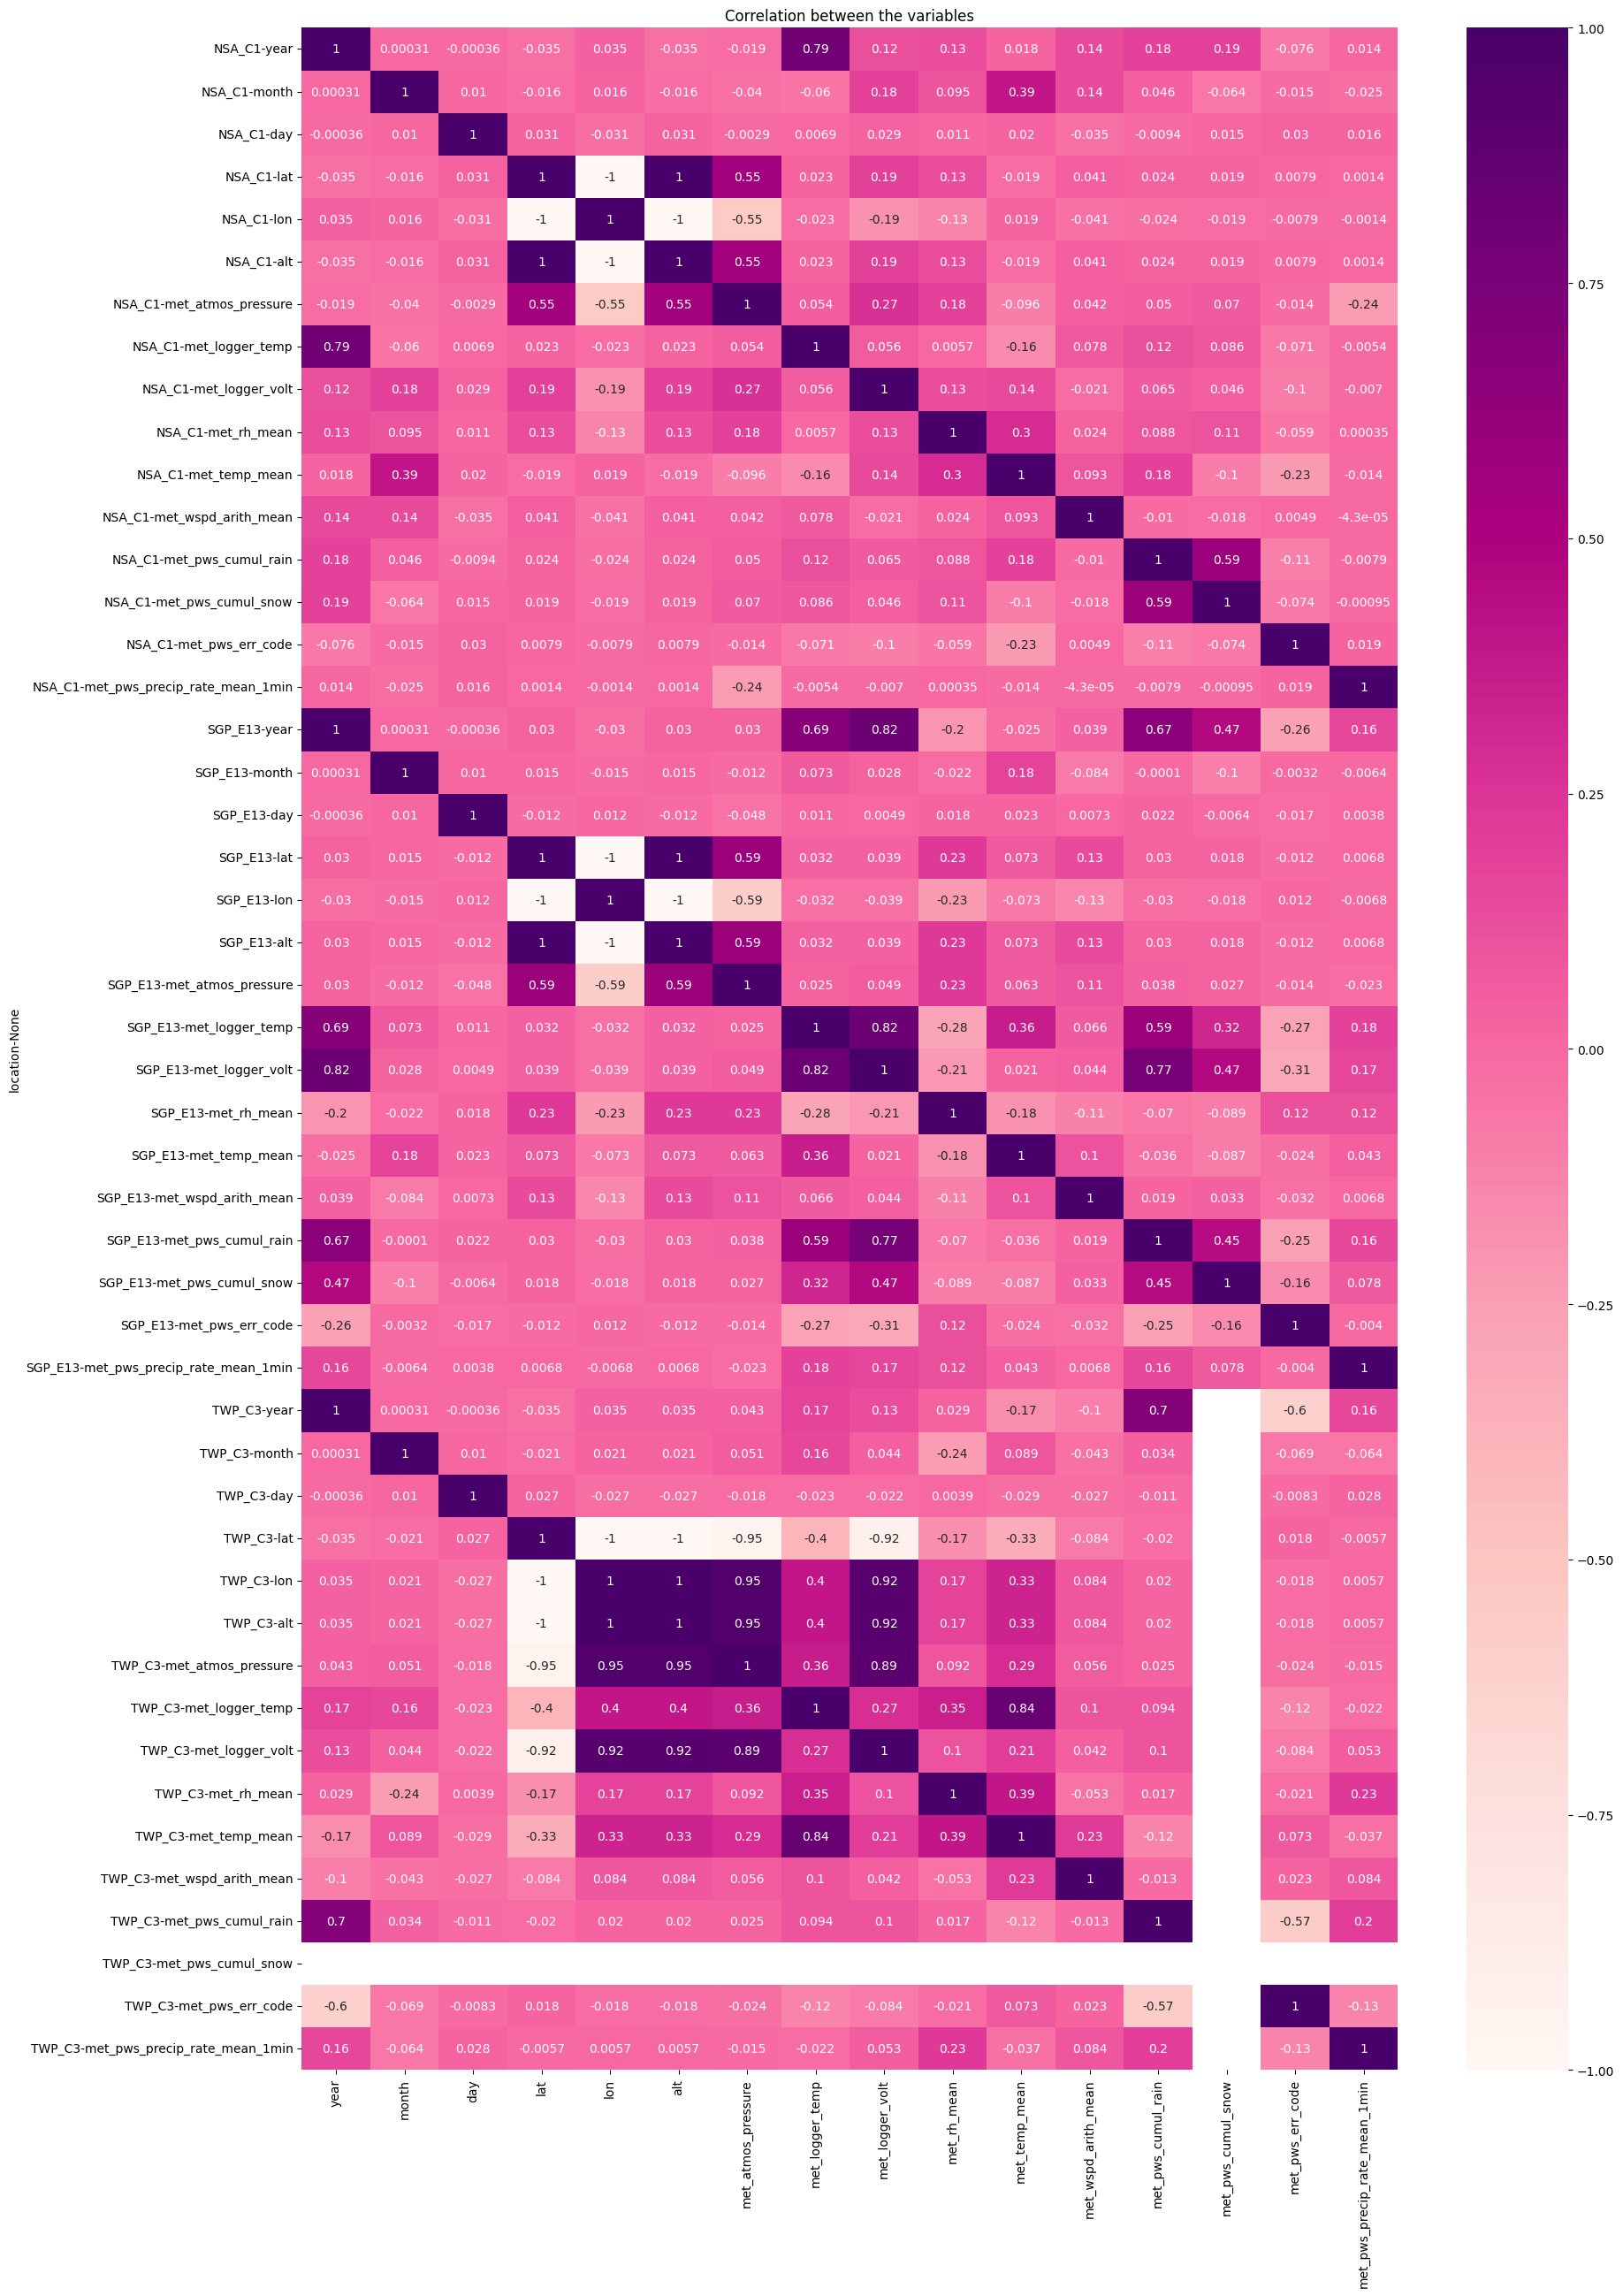

In [59]:
#Pairwise Correlations
# Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

# Plot Pairwise Correlations
plt.subplots(figsize=(20,30));
corr=daily_avgs_data_df.groupby(['location']).corr(numeric_only=True);
sns.heatmap(corr,annot=True,cmap='RdPu');
plt.title('Correlation between the variables');
#plt.xticks(rotation=45);

#DAILY AVERAGE ANALYSES

In [60]:
#Plot met_atmos_pressure data over time
NSA_daily_df = daily_avgs_data_df[(daily_avgs_data_df['location'] == 'NSA_C1')]
NSA_daily_df = NSA_daily_df.reset_index(drop=True)
SGP_daily_df = daily_avgs_data_df[(daily_avgs_data_df['location'] == 'SGP_E13')]
SGP_daily_df = SGP_daily_df.reset_index(drop=True)
TWP_daily_df = daily_avgs_data_df[(daily_avgs_data_df['location'] == 'TWP_C3')]
TWP_daily_df = TWP_daily_df.reset_index(drop=True)

display(NSA_daily_df.head())
display(SGP_daily_df.head())
display(TWP_daily_df.head())

location  year  month  day            date        lat         lon  alt  \
0   NSA_C1  2004      1    1  January_1_2004  71.322998 -156.608994  8.0   
1   NSA_C1  2004      1    2  January_2_2004  71.322998 -156.608994  8.0   
2   NSA_C1  2004      1    3  January_3_2004  71.322998 -156.608994  8.0   
3   NSA_C1  2004      1    4  January_4_2004  71.322998 -156.608994  8.0   
4   NSA_C1  2004      1    5  January_5_2004  71.322998 -156.608994  8.0   

   met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0          102.277893             0.01             0.01    86.448501   
1          102.391420             0.01             0.01    86.098743   
2          103.235613             0.01             0.01    93.610159   
3          103.237362             0.01             0.01    84.895836   
4          103.813050             0.01             0.01    79.541626   

   met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  met_pws_cumul_snow  \
0     -18.880365             5.531212           34.576028          368.000000   
1     -12.495725             5.767684           34.590000          368.000000   
2      -2.891112             6.538988           38.363476          384.298589   
3      -3.955956             8.216746           41.263660          387.000000   
4     -11.753966            10.771448           43.568785          387.000000   

   met_pws_err_code  met_pws_precip_rate_mean_1min  
0               0.0                       0.001042  
1               0.0                       0.000000  
2               0.0                       0.252435  
3               0.0                       0.129424  
4               0.0                       0.003542

location  year  month  day            date     lat        lon    alt  \
0  SGP_E13  2004      1    1  January_1_2004  36.605 -97.485001  318.0   
1  SGP_E13  2004      1    2  January_2_2004  36.605 -97.485001  318.0   
2  SGP_E13  2004      1    3  January_3_2004  36.605 -97.485001  318.0   
3  SGP_E13  2004      1    4  January_4_2004  36.605 -97.485001  318.0   
4  SGP_E13  2004      1    5  January_5_2004  36.605 -97.485001  318.0   

   met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0           97.896261             0.01             0.01    81.401009   
1           97.273926             0.01             0.01    70.890600   
2           97.071112             0.01             0.01    63.617142   
3           97.646241             0.01             0.01    71.185310   
4           99.096958             0.01             0.01    70.336615   

   met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  met_pws_cumul_snow  \
0      11.508878             6.936255                0.01                0.01   
1      14.547902             7.569066                0.01                0.01   
2       9.832673             4.785784                0.01                0.01   
3       0.377828             8.087993                0.01                0.01   
4      -6.582009             6.450177                0.01                0.01   

   met_pws_err_code  met_pws_precip_rate_mean_1min  
0              0.01                           0.01  
1              0.01                           0.01  
2              0.01                           0.01  
3              0.01                           0.01  
4              0.01                           0.01

location  year  month  day            date     lat         lon   alt  \
0   TWP_C3  2004      1    1  January_1_2004 -12.425  130.891998  29.9   
1   TWP_C3  2004      1    2  January_2_2004 -12.425  130.891998  29.9   
2   TWP_C3  2004      1    3  January_3_2004 -12.425  130.891998  29.9   
3   TWP_C3  2004      1    4  January_4_2004 -12.425  130.891998  29.9   
4   TWP_C3  2004      1    5  January_5_2004 -12.425  130.891998  29.9   

   met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0          100.237933        27.329907        12.298620    91.020085   
1          100.461788        31.806083        12.296506    80.521649   
2          100.587701        32.160167        12.297155    76.856311   
3          100.539838        32.918097        12.296187    74.321008   
4          100.400344        31.675191        12.296988    78.476263   

   met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  met_pws_cumul_snow  \
0      25.290560             2.716408                0.01                0.01   
1      28.361748             2.434049                0.01                0.01   
2      28.990412             2.268183                0.01                0.01   
3      29.468022             2.945899                0.01                0.01   
4      28.142814             3.939201                0.01                0.01   

   met_pws_err_code  met_pws_precip_rate_mean_1min  
0              0.01                           0.01  
1              0.01                           0.01  
2              0.01                           0.01  
3              0.01                           0.01  
4              0.01                           0.01

In [61]:
#Month dependent dataframes
#January
Jan_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 1]
NSA_Jan_df = Jan_df[Jan_df['location'] == 'NSA_C1']
#NSA_Jan_df = NSA_Jan_df.reset_index(drop=True)
SGP_Jan_df = Jan_df[Jan_df['location'] == 'SGP_E13']
#SGP_Jan_df = SGP_Jan_df.reset_index(drop=True)
TWP_Jan_df = Jan_df[Jan_df['location'] == 'TWP_C3']
#TWP_Jan_df = TWP_Jan_df.reset_index(drop=True)

#February
Feb_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 2]
NSA_Feb_df = Feb_df[Feb_df['location'] == 'NSA_C1']
#NSA_Feb_df = NSA_Feb_df.reset_index(drop=True)
SGP_Feb_df = Feb_df[Feb_df['location'] == 'SGP_E13']
#SGP_Feb_df = SGP_Feb_df.reset_index(drop=True)
TWP_Feb_df = Feb_df[Feb_df['location'] == 'TWP_C3']
#TWP_Feb_df = TWP_Feb_df.reset_index(drop=True)

#March
Mar_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 3]
NSA_Mar_df = Mar_df[Mar_df['location'] == 'NSA_C1']
#NSA_Mar_df = NSA_Mar_df.reset_index(drop=True)
SGP_Mar_df = Mar_df[Mar_df['location'] == 'SGP_E13']
#SGP_Mar_df = SGP_Mar_df.reset_index(drop=True)
TWP_Mar_df = Mar_df[Mar_df['location'] == 'TWP_C3']
#TWP_Mar_df = TWP_Mar_df.reset_index(drop=True)

#April
Apr_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 4]
NSA_Apr_df = Apr_df[Apr_df['location'] == 'NSA_C1']
#NSA_Apr_df = NSA_Apr_df.reset_index(drop=True)
SGP_Apr_df = Apr_df[Apr_df['location'] == 'SGP_E13']
#SGP_Apr_df = SGP_Apr_df.reset_index(drop=True)
TWP_Apr_df = Apr_df[Apr_df['location'] == 'TWP_C3']
#TWP_Apr_df = TWP_Apr_df.reset_index(drop=True)

#May
May_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 5]
NSA_May_df = May_df[May_df['location'] == 'NSA_C1']
#NSA_May_df = NSA_May_df.reset_index(drop=True)
SGP_May_df = May_df[May_df['location'] == 'SGP_E13']
#SGP_May_df = SGP_May_df.reset_index(drop=True)
TWP_May_df = May_df[May_df['location'] == 'TWP_C3']
#TWP_May_df = TWP_May_df.reset_index(drop=True)

#June
Jun_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 6]
NSA_Jun_df = Jun_df[Jun_df['location'] == 'NSA_C1']
#NSA_Jun_df = NSA_Jun_df.reset_index(drop=True)
SGP_Jun_df = Jun_df[Jun_df['location'] == 'SGP_E13']
#SGP_Jun_df = SGP_Jun_df.reset_index(drop=True)
TWP_Jun_df = Jun_df[Jun_df['location'] == 'TWP_C3']
#TWP_Jun_df = TWP_Jun_df.reset_index(drop=True)

#July
Jul_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 7]
NSA_Jul_df = Jul_df[Jul_df['location'] == 'NSA_C1']
#NSA_Jul_df = NSA_Jul_df.reset_index(drop=True)
SGP_Jul_df = Jul_df[Jul_df['location'] == 'SGP_E13']
#SGP_Jul_df = SGP_Jul_df.reset_index(drop=True)
TWP_Jul_df = Jul_df[Jul_df['location'] == 'TWP_C3']
#TWP_Jul_df = TWP_Jul_df.reset_index(drop=True)

#August
Aug_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 8]
NSA_Aug_df = Aug_df[Aug_df['location'] == 'NSA_C1']
#NSA_Aug_df = NSA_Aug_df.reset_index(drop=True)
SGP_Aug_df = Aug_df[Aug_df['location'] == 'SGP_E13']
#SGP_Aug_df = SGP_Aug_df.reset_index(drop=True)
TWP_Aug_df = Aug_df[Aug_df['location'] == 'TWP_C3']
#TWP_Aug_df = TWP_Aug_df.reset_index(drop=True)

#September
Sep_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 9]
NSA_Sep_df = Sep_df[Sep_df['location'] == 'NSA_C1']
#NSA_Sep_df = NSA_Sep_df.reset_index(drop=True)
SGP_Sep_df = Sep_df[Sep_df['location'] == 'SGP_E13']
#SGP_Sep_df = SGP_Sep_df.reset_index(drop=True)
TWP_Sep_df = Sep_df[Sep_df['location'] == 'TWP_C3']
#TWP_Sep_df = TWP_Sep_df.reset_index(drop=True)

#October
Oct_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 10]
NSA_Oct_df = Oct_df[Oct_df['location'] == 'NSA_C1']
#NSA_Oct_df = NSA_Oct_df.reset_index(drop=True)
SGP_Oct_df = Oct_df[Oct_df['location'] == 'SGP_E13']
#SGP_Oct_df = SGP_Oct_df.reset_index(drop=True)
TWP_Oct_df = Oct_df[Oct_df['location'] == 'TWP_C3']
#TWP_Oct_df = TWP_Oct_df.reset_index(drop=True)

#November
Nov_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 11]
NSA_Nov_df = Nov_df[Nov_df['location'] == 'NSA_C1']
#NSA_Nov_df = NSA_Nov_df.reset_index(drop=True)
SGP_Nov_df = Nov_df[Nov_df['location'] == 'SGP_E13']
#SGP_Nov_df = SGP_Nov_df.reset_index(drop=True)
TWP_Nov_df = Nov_df[Nov_df['location'] == 'TWP_C3']
#TWP_Nov_df = TWP_Nov_df.reset_index(drop=True)

#December
Dec_df = daily_avgs_data_df[daily_avgs_data_df['month'] == 12]
NSA_Dec_df = Dec_df[Dec_df['location'] == 'NSA_C1']
#NSA_Dec_df = NSA_Dec_df.reset_index(drop=True)
SGP_Dec_df = Dec_df[Dec_df['location'] == 'SGP_E13']
#SGP_Dec_df = SGP_Dec_df.reset_index(drop=True)
TWP_Dec_df = Dec_df[Dec_df['location'] == 'TWP_C3']
#TWP_Dec_df = TWP_Dec_df.reset_index(drop=True)

display(NSA_Jan_df)
display(SGP_Jan_df)
display(TWP_Jan_df)

location  year  month  day             date        lat         lon  alt  \
0      NSA_C1  2004      1    1   January_1_2004  71.322998 -156.608994  8.0   
1      NSA_C1  2004      1    2   January_2_2004  71.322998 -156.608994  8.0   
2      NSA_C1  2004      1    3   January_3_2004  71.322998 -156.608994  8.0   
3      NSA_C1  2004      1    4   January_4_2004  71.322998 -156.608994  8.0   
4      NSA_C1  2004      1    5   January_5_2004  71.322998 -156.608994  8.0   
...       ...   ...    ...  ...              ...        ...         ...  ...   
3679   NSA_C1  2014      1   27  January_27_2014  71.322998 -156.608994  8.0   
3680   NSA_C1  2014      1   28  January_28_2014  71.322998 -156.608994  8.0   
3681   NSA_C1  2014      1   29  January_29_2014  71.322998 -156.608994  8.0   
3682   NSA_C1  2014      1   30  January_30_2014  71.322998 -156.608994  8.0   
3683   NSA_C1  2014      1   31  January_31_2014  71.322998 -156.608994  8.0   

      met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
0             102.277893         0.010000         0.010000    86.448501   
1             102.391420         0.010000         0.010000    86.098743   
2             103.235613         0.010000         0.010000    93.610159   
3             103.237362         0.010000         0.010000    84.895836   
4             103.813050         0.010000         0.010000    79.541626   
...                  ...              ...              ...          ...   
3679          101.706364        12.210499        13.244375    86.752179   
3680          101.487848        14.330657        13.183785    85.997184   
3681          101.388670        13.933367        13.195144    86.711616   
3682          101.620676        12.917836        13.229363    89.412928   
3683          102.011963        12.803881        13.233603    88.772215   

      met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  \
0        -18.880365             5.531212           34.576028   
1        -12.495725             5.767684           34.590000   
2         -2.891112             6.538988           38.363476   
3         -3.955956             8.216746           41.263660   
4        -11.753966            10.771448           43.568785   
...             ...                  ...                 ...   
3679     -13.961551             7.523271           92.113265   
3680     -15.752647             5.569931           92.300003   
3681     -16.613611             3.747616           92.300003   
3682     -14.620016             4.093983           92.353961   
3683     -14.153909             2.994397           92.400002   

      met_pws_cumul_snow  met_pws_err_code  met_pws_precip_rate_mean_1min  
0             368.000000               0.0                       0.001042  
1             368.000000               0.0                       0.000000  
2             384.298589               0.0                       0.252435  
3             387.000000               0.0                       0.129424  
4             387.000000               0.0                       0.003542  
...                  ...               ...                            ...  
3679          897.256948               0.0                       0.023840  
3680          899.000000               0.0                       0.000000  
3681          899.000000               0.0                       0.000806  
3682          899.933334               0.0                       0.002344  
3683          900.000000               0.0                       0.000611  

[341 rows x 18 columns]

location  year  month  day             date     lat        lon    alt  \
4018  SGP_E13  2004      1    1   January_1_2004  36.605 -97.485001  318.0   
4019  SGP_E13  2004      1    2   January_2_2004  36.605 -97.485001  318.0   
4020  SGP_E13  2004      1    3   January_3_2004  36.605 -97.485001  318.0   
4021  SGP_E13  2004      1    4   January_4_2004  36.605 -97.485001  318.0   
4022  SGP_E13  2004      1    5   January_5_2004  36.605 -97.485001  318.0   
...       ...   ...    ...  ...              ...     ...        ...    ...   
7697  SGP_E13  2014      1   27  January_27_2014  36.605 -97.485001  318.0   
7698  SGP_E13  2014      1   28  January_28_2014  36.605 -97.485001  318.0   
7699  SGP_E13  2014      1   29  January_29_2014  36.605 -97.485001  318.0   
7700  SGP_E13  2014      1   30  January_30_2014  36.605 -97.485001  318.0   
7701  SGP_E13  2014      1   31  January_31_2014  36.605 -97.485001  318.0   

      met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
4018           97.896261         0.010000         0.010000    81.401009   
4019           97.273926         0.010000         0.010000    70.890600   
4020           97.071112         0.010000         0.010000    63.617142   
4021           97.646241         0.010000         0.010000    71.185310   
4022           99.096958         0.010000         0.010000    70.336615   
...                  ...              ...              ...          ...   
7697           98.645964         2.362910        13.596214    30.063647   
7698           99.327233        -1.385708        13.556375    57.035496   
7699           98.636949         1.896664        13.464899    56.708880   
7700           97.210052         9.362789        13.269626    32.124778   
7701           97.336062         7.037098        13.175857    68.220637   

      met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  \
4018      11.508878             6.936255            0.010000   
4019      14.547902             7.569066            0.010000   
4020       9.832673             4.785784            0.010000   
4021       0.377828             8.087993            0.010000   
4022      -6.582009             6.450177            0.010000   
...             ...                  ...                 ...   
7697      -3.490213             8.801859           77.099998   
7698      -7.808381             4.053489           77.652084   
7699      -3.875692             6.420435           77.900002   
7700       3.535853             8.598409           77.900002   
7701       0.345362             5.102783           78.053820   

      met_pws_cumul_snow  met_pws_err_code  met_pws_precip_rate_mean_1min  
4018            0.010000              0.01                       0.010000  
4019            0.010000              0.01                       0.010000  
4020            0.010000              0.01                       0.010000  
4021            0.010000              0.01                       0.010000  
4022            0.010000              0.01                       0.010000  
...                  ...               ...                            ...  
7697          358.000000              0.00                       0.000000  
7698          363.493056              0.00                       0.031701  
7699          366.000000              0.00                       0.000000  
7700          366.000000              0.00                       0.000000  
7701          367.505557              0.00                       0.055111  

[341 rows x 18 columns]

location  year  month  day             date     lat         lon   alt  \
8036    TWP_C3  2004      1    1   January_1_2004 -12.425  130.891998  29.9   
8037    TWP_C3  2004      1    2   January_2_2004 -12.425  130.891998  29.9   
8038    TWP_C3  2004      1    3   January_3_2004 -12.425  130.891998  29.9   
8039    TWP_C3  2004      1    4   January_4_2004 -12.425  130.891998  29.9   
8040    TWP_C3  2004      1    5   January_5_2004 -12.425  130.891998  29.9   
...        ...   ...    ...  ...              ...     ...         ...   ...   
11715   TWP_C3  2014      1   27  January_27_2014 -12.425  130.891998  29.9   
11716   TWP_C3  2014      1   28  January_28_2014 -12.425  130.891998  29.9   
11717   TWP_C3  2014      1   29  January_29_2014 -12.425  130.891998  29.9   
11718   TWP_C3  2014      1   30  January_30_2014 -12.425  130.891998  29.9   
11719   TWP_C3  2014      1   31  January_31_2014 -12.425  130.891998  29.9   

       met_atmos_pressure  met_logger_temp  met_logger_volt  met_rh_mean  \
8036           100.237933        27.329907        12.298620    91.020085   
8037           100.461788        31.806083        12.296506    80.521649   
8038           100.587701        32.160167        12.297155    76.856311   
8039           100.539838        32.918097        12.296187    74.321008   
8040           100.400344        31.675191        12.296988    78.476263   
...                   ...              ...              ...          ...   
11715          100.172967        31.389128        12.755378    82.747892   
11716          100.056890        30.671425        12.758652    85.296353   
11717          100.046320        28.852540        12.906418    90.866337   
11718          100.014424        28.983708        12.947480    87.847133   
11719           99.891406        28.834871        12.949202    87.336975   

       met_temp_mean  met_wspd_arith_mean  met_pws_cumul_rain  \
8036       25.290560             2.716408            0.010000   
8037       28.361748             2.434049            0.010000   
8038       28.990412             2.268183            0.010000   
8039       29.468022             2.945899            0.010000   
8040       28.142814             3.939201            0.010000   
...              ...                  ...                 ...   
11715      26.819960             1.903856           74.270279   
11716      26.324443             2.740457           74.780348   
11717      25.531420             2.538418           84.997221   
11718      26.387111             5.055372           79.715416   
11719      26.434451             6.317520           12.146790   

       met_pws_cumul_snow  met_pws_err_code  met_pws_precip_rate_mean_1min  
8036                 0.01              0.01                       0.010000  
8037                 0.01              0.01                       0.010000  
8038                 0.01              0.01                       0.010000  
8039                 0.01              0.01                       0.010000  
8040                 0.01              0.01                       0.010000  
...                   ...               ...                            ...  
11715                0.01              0.00                       0.012451  
11716                0.01              0.00                       0.069007  
11717                0.01              0.00                       0.667625  
11718                0.01              0.00                       0.512328  
11719                0.01              0.00                       0.558297  

[341 rows x 18 columns]

In [62]:
#STD Data
#Plot met_atmos_pressure data over time
NSA_daily_STD_df = daily_avgs_STD_df[(daily_avgs_STD_df['location'] == 'NSA_C1')]
NSA_daily_STD_df = NSA_daily_STD_df.reset_index(drop=True)
SGP_daily_STD_df = daily_avgs_STD_df[(daily_avgs_STD_df['location'] == 'SGP_E13')]
SGP_daily_STD_df = SGP_daily_STD_df.reset_index(drop=True)
TWP_daily_STD_df = daily_avgs_STD_df[(daily_avgs_STD_df['location'] == 'TWP_C3')]
TWP_daily_STD_df = TWP_daily_STD_df.reset_index(drop=True)

display(NSA_daily_STD_df.head())
display(SGP_daily_STD_df.head())
display(TWP_daily_STD_df.head())

location  year  month  day            date        lat         lon  alt  \
0   NSA_C1  2004      1    1  January_1_2004  71.322998 -156.608994  8.0   
1   NSA_C1  2004      1    2  January_2_2004  71.322998 -156.608994  8.0   
2   NSA_C1  2004      1    3  January_3_2004  71.322998 -156.608994  8.0   
3   NSA_C1  2004      1    4  January_4_2004  71.322998 -156.608994  8.0   
4   NSA_C1  2004      1    5  January_5_2004  71.322998 -156.608994  8.0   

   met_atmos_pressure_std  met_logger_temp_std  met_logger_volt_std  \
0                0.011240                 0.01                 0.01   
1                0.012457                 0.01                 0.01   
2                0.010364                 0.01                 0.01   
3                0.014146                 0.01                 0.01   
4                0.014152                 0.01                 0.01   

   met_rh_mean_std  met_temp_mean_std  met_wspd_arith_mean_std  \
0         0.771188           0.301962                 0.340104   
1         0.578005           0.482291                 0.429447   
2         0.717028           0.168624                 0.599311   
3         1.015594           0.283022                 0.823692   
4         1.227525           0.142751                 1.287768   

   met_pws_cumul_rain_std  met_pws_cumul_snow_std  met_pws_err_code_std  \
0                0.000208                0.000000                   0.0   
1                0.000000                0.000000                   0.0   
2                0.071974                0.239638                   0.0   
3                0.038184                0.000000                   0.0   
4                0.001099                0.000000                   0.0   

   met_pws_precip_rate_mean_1min_std  
0                           0.001965  
1                           0.000000  
2                           0.271742  
3                           0.127418  
4                           0.006527

location  year  month  day            date     lat        lon    alt  \
0  SGP_E13  2004      1    1  January_1_2004  36.605 -97.485001  318.0   
1  SGP_E13  2004      1    2  January_2_2004  36.605 -97.485001  318.0   
2  SGP_E13  2004      1    3  January_3_2004  36.605 -97.485001  318.0   
3  SGP_E13  2004      1    4  January_4_2004  36.605 -97.485001  318.0   
4  SGP_E13  2004      1    5  January_5_2004  36.605 -97.485001  318.0   

   met_atmos_pressure_std  met_logger_temp_std  met_logger_volt_std  \
0                0.021987                 0.01                 0.01   
1                0.017176                 0.01                 0.01   
2                0.015954                 0.01                 0.01   
3                0.021722                 0.01                 0.01   
4                0.020954                 0.01                 0.01   

   met_rh_mean_std  met_temp_mean_std  met_wspd_arith_mean_std  \
0         1.433763           0.361340                 0.861592   
1         1.384721           0.364639                 0.738243   
2         2.531119           0.672959                 0.704410   
3         1.651891           0.160336                 0.830549   
4         0.967230           0.178364                 0.767219   

   met_pws_cumul_rain_std  met_pws_cumul_snow_std  met_pws_err_code_std  \
0                    0.01                    0.01                  0.01   
1                    0.01                    0.01                  0.01   
2                    0.01                    0.01                  0.01   
3                    0.01                    0.01                  0.01   
4                    0.01                    0.01                  0.01   

   met_pws_precip_rate_mean_1min_std  
0                               0.01  
1                               0.01  
2                               0.01  
3                               0.01  
4                               0.01

location  year  month  day            date     lat         lon   alt  \
0   TWP_C3  2004      1    1  January_1_2004 -12.425  130.891998  29.9   
1   TWP_C3  2004      1    2  January_2_2004 -12.425  130.891998  29.9   
2   TWP_C3  2004      1    3  January_3_2004 -12.425  130.891998  29.9   
3   TWP_C3  2004      1    4  January_4_2004 -12.425  130.891998  29.9   
4   TWP_C3  2004      1    5  January_5_2004 -12.425  130.891998  29.9   

   met_atmos_pressure_std  met_logger_temp_std  met_logger_volt_std  \
0                0.070915             0.131816             0.008764   
1                0.014661             0.217032             0.010848   
2                0.014462             0.188794             0.010867   
3                0.015045             0.209754             0.010272   
4                0.022232             0.244669             0.008103   

   met_rh_mean_std  met_temp_mean_std  met_wspd_arith_mean_std  \
0         1.362756           0.230360                 0.780130   
1         1.242004           0.163905                 0.535590   
2         1.138095           0.172027                 0.463151   
3         1.719640           0.242691                 0.656104   
4         1.374635           0.310349                 0.912538   

   met_pws_cumul_rain_std  met_pws_cumul_snow_std  met_pws_err_code_std  \
0                    0.01                    0.01                  0.01   
1                    0.01                    0.01                  0.01   
2                    0.01                    0.01                  0.01   
3                    0.01                    0.01                  0.01   
4                    0.01                    0.01                  0.01   

   met_pws_precip_rate_mean_1min_std  
0                               0.01  
1                               0.01  
2                               0.01  
3                               0.01  
4                               0.01

In [63]:
#Good Fraction Data
#Plot met_atmos_pressure data over time
NSA_daily_goodFraction_df = daily_avgs_goodFraction_df[(daily_avgs_goodFraction_df['location'] == 'NSA_C1')]
NSA_daily_goodFraction_df = NSA_daily_goodFraction_df.reset_index(drop=True)
SGP_daily_goodFraction_df = daily_avgs_goodFraction_df[(daily_avgs_goodFraction_df['location'] == 'SGP_E13')]
SGP_daily_goodFraction_df = SGP_daily_goodFraction_df.reset_index(drop=True)
TWP_daily_goodFraction_df = daily_avgs_goodFraction_df[(daily_avgs_goodFraction_df['location'] == 'TWP_C3')]
TWP_daily_goodFraction_df = TWP_daily_goodFraction_df.reset_index(drop=True)

display(NSA_daily_goodFraction_df.head())
display(SGP_daily_goodFraction_df.head())
display(TWP_daily_goodFraction_df.head())

location  year  month  day            date        lat         lon  alt  \
0   NSA_C1  2004      1    1  January_1_2004  71.322998 -156.608994  8.0   
1   NSA_C1  2004      1    2  January_2_2004  71.322998 -156.608994  8.0   
2   NSA_C1  2004      1    3  January_3_2004  71.322998 -156.608994  8.0   
3   NSA_C1  2004      1    4  January_4_2004  71.322998 -156.608994  8.0   
4   NSA_C1  2004      1    5  January_5_2004  71.322998 -156.608994  8.0   

   met_atmos_pressure_goodfraction  met_logger_temp_goodfraction  \
0                              1.0                           0.0   
1                              1.0                           0.0   
2                              1.0                           0.0   
3                              1.0                           0.0   
4                              1.0                           0.0   

   met_logger_volt_goodfraction  met_rh_mean_goodfraction  \
0                           0.0                       1.0   
1                           0.0                       1.0   
2                           0.0                       1.0   
3                           0.0                       1.0   
4                           0.0                       1.0   

   met_temp_mean_goodfraction  met_wspd_arith_mean_goodfraction  \
0                         1.0                               1.0   
1                         1.0                               1.0   
2                         1.0                               1.0   
3                         1.0                               1.0   
4                         1.0                               1.0   

   met_pws_cumul_rain_goodfraction  met_pws_cumul_snow_goodfraction  \
0                              1.0                              1.0   
1                              1.0                              1.0   
2                              1.0                              1.0   
3                              1.0                              1.0   
4                              1.0                              1.0   

   met_pws_err_code_goodfraction  met_pws_precip_rate_mean_1min_goodfraction  
0                            1.0                                         1.0  
1                            1.0                                         1.0  
2                            1.0                                         1.0  
3                            1.0                                         1.0  
4                            1.0                                         1.0

location  year  month  day            date     lat        lon    alt  \
0  SGP_E13  2004      1    1  January_1_2004  36.605 -97.485001  318.0   
1  SGP_E13  2004      1    2  January_2_2004  36.605 -97.485001  318.0   
2  SGP_E13  2004      1    3  January_3_2004  36.605 -97.485001  318.0   
3  SGP_E13  2004      1    4  January_4_2004  36.605 -97.485001  318.0   
4  SGP_E13  2004      1    5  January_5_2004  36.605 -97.485001  318.0   

   met_atmos_pressure_goodfraction  met_logger_temp_goodfraction  \
0                              1.0                           0.0   
1                              1.0                           0.0   
2                              1.0                           0.0   
3                              1.0                           0.0   
4                              1.0                           0.0   

   met_logger_volt_goodfraction  met_rh_mean_goodfraction  \
0                           0.0                       1.0   
1                           0.0                       1.0   
2                           0.0                       1.0   
3                           0.0                       1.0   
4                           0.0                       1.0   

   met_temp_mean_goodfraction  met_wspd_arith_mean_goodfraction  \
0                         1.0                               1.0   
1                         1.0                               1.0   
2                         1.0                               1.0   
3                         1.0                               1.0   
4                         1.0                               1.0   

   met_pws_cumul_rain_goodfraction  met_pws_cumul_snow_goodfraction  \
0                             0.01                             0.01   
1                             0.01                             0.01   
2                             0.01                             0.01   
3                             0.01                             0.01   
4                             0.01                             0.01   

   met_pws_err_code_goodfraction  met_pws_precip_rate_mean_1min_goodfraction  
0                           0.01                                        0.01  
1                           0.01                                        0.01  
2                           0.01                                        0.01  
3                           0.01                                        0.01  
4                           0.01                                        0.01

location  year  month  day            date     lat         lon   alt  \
0   TWP_C3  2004      1    1  January_1_2004 -12.425  130.891998  29.9   
1   TWP_C3  2004      1    2  January_2_2004 -12.425  130.891998  29.9   
2   TWP_C3  2004      1    3  January_3_2004 -12.425  130.891998  29.9   
3   TWP_C3  2004      1    4  January_4_2004 -12.425  130.891998  29.9   
4   TWP_C3  2004      1    5  January_5_2004 -12.425  130.891998  29.9   

   met_atmos_pressure_goodfraction  met_logger_temp_goodfraction  \
0                              1.0                           1.0   
1                              1.0                           1.0   
2                              1.0                           1.0   
3                              1.0                           1.0   
4                              1.0                           1.0   

   met_logger_volt_goodfraction  met_rh_mean_goodfraction  \
0                           1.0                       1.0   
1                           1.0                       1.0   
2                           1.0                       1.0   
3                           1.0                       1.0   
4                           1.0                       1.0   

   met_temp_mean_goodfraction  met_wspd_arith_mean_goodfraction  \
0                         1.0                               1.0   
1                         1.0                               1.0   
2                         1.0                               1.0   
3                         1.0                               1.0   
4                         1.0                               1.0   

   met_pws_cumul_rain_goodfraction  met_pws_cumul_snow_goodfraction  \
0                             0.01                             0.01   
1                             0.01                             0.01   
2                             0.01                             0.01   
3                             0.01                             0.01   
4                             0.01                             0.01   

   met_pws_err_code_goodfraction  met_pws_precip_rate_mean_1min_goodfraction  
0                           0.01                                        0.01  
1                           0.01                                        0.01  
2                           0.01                                        0.01  
3                           0.01                                        0.01  
4                           0.01                                        0.01

In [64]:
#QC Data
#Plot met_atmos_pressure data over time
NSA_daily_QC_df = daily_avgs_QC_df[(daily_avgs_QC_df['location'] == 'NSA_C1')]
NSA_daily_QC_df = NSA_daily_QC_df.reset_index(drop=True)
SGP_daily_QC_df = daily_avgs_QC_df[(daily_avgs_QC_df['location'] == 'SGP_E13')]
SGP_daily_QC_df = SGP_daily_QC_df.reset_index(drop=True)
TWP_daily_QC_df = daily_avgs_QC_df[(daily_avgs_QC_df['location'] == 'TWP_C3')]
TWP_daily_QC_df = TWP_daily_QC_df.reset_index(drop=True)

display(NSA_daily_QC_df.head())
display(SGP_daily_QC_df.head())
display(TWP_daily_QC_df.head())

location  year  month  day            date        lat         lon  alt  \
0   NSA_C1  2004      1    1  January_1_2004  71.322998 -156.608994  8.0   
1   NSA_C1  2004      1    2  January_2_2004  71.322998 -156.608994  8.0   
2   NSA_C1  2004      1    3  January_3_2004  71.322998 -156.608994  8.0   
3   NSA_C1  2004      1    4  January_4_2004  71.322998 -156.608994  8.0   
4   NSA_C1  2004      1    5  January_5_2004  71.322998 -156.608994  8.0   

   met_atmos_pressure_qc  met_logger_temp_qc  met_logger_volt_qc  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   

   met_rh_mean_qc  met_temp_mean_qc  met_wspd_arith_mean_qc  \
0             NaN               NaN                     NaN   
1             NaN               NaN                     NaN   
2             NaN               NaN                     NaN   
3             NaN               NaN                     NaN   
4             NaN               NaN                     NaN   

   met_pws_cumul_rain_qc  met_pws_cumul_snow_qc  met_pws_err_code_qc  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                    NaN                    NaN                  NaN   
3                    NaN                    NaN                  NaN   
4                    NaN                    NaN                  NaN   

   met_pws_precip_rate_mean_1min_qc  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN

location  year  month  day            date     lat        lon    alt  \
0  SGP_E13  2004      1    1  January_1_2004  36.605 -97.485001  318.0   
1  SGP_E13  2004      1    2  January_2_2004  36.605 -97.485001  318.0   
2  SGP_E13  2004      1    3  January_3_2004  36.605 -97.485001  318.0   
3  SGP_E13  2004      1    4  January_4_2004  36.605 -97.485001  318.0   
4  SGP_E13  2004      1    5  January_5_2004  36.605 -97.485001  318.0   

   met_atmos_pressure_qc  met_logger_temp_qc  met_logger_volt_qc  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   

   met_rh_mean_qc  met_temp_mean_qc  met_wspd_arith_mean_qc  \
0             NaN               NaN                     NaN   
1             NaN               NaN                     NaN   
2             NaN               NaN                     NaN   
3             NaN               NaN                     NaN   
4             NaN               NaN                     NaN   

   met_pws_cumul_rain_qc  met_pws_cumul_snow_qc  met_pws_err_code_qc  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                    NaN                    NaN                  NaN   
3                    NaN                    NaN                  NaN   
4                    NaN                    NaN                  NaN   

   met_pws_precip_rate_mean_1min_qc  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN

location  year  month  day            date     lat         lon   alt  \
0   TWP_C3  2004      1    1  January_1_2004 -12.425  130.891998  29.9   
1   TWP_C3  2004      1    2  January_2_2004 -12.425  130.891998  29.9   
2   TWP_C3  2004      1    3  January_3_2004 -12.425  130.891998  29.9   
3   TWP_C3  2004      1    4  January_4_2004 -12.425  130.891998  29.9   
4   TWP_C3  2004      1    5  January_5_2004 -12.425  130.891998  29.9   

   met_atmos_pressure_qc  met_logger_temp_qc  met_logger_volt_qc  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   

   met_rh_mean_qc  met_temp_mean_qc  met_wspd_arith_mean_qc  \
0             NaN               NaN                     NaN   
1             NaN               NaN                     NaN   
2             NaN               NaN                     NaN   
3             NaN               NaN                     NaN   
4             NaN               NaN                     NaN   

   met_pws_cumul_rain_qc  met_pws_cumul_snow_qc  met_pws_err_code_qc  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                    NaN                    NaN                  NaN   
3                    NaN                    NaN                  NaN   
4                    NaN                    NaN                  NaN   

   met_pws_precip_rate_mean_1min_qc  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN

##Atmospheric Pressure Data Analysis

In [65]:
figname1 = "Atmospheric_Pressure_Distribution_Winter.png"
figname2 = "Atmospheric_Pressure_Distribution_Spring.png"
figname3 = "Atmospheric_Pressure_Distribution_Summer.png"
figname4 = "Atmospheric_Pressure_Distribution_Fall.png"
figname5 = "Atmospheric_Pressure_Data_with_OutlierOverlay_.png"

In [66]:
name0 = 'met_atmos_pressure'
name1 = 'Atmospheric Pressure [atm]'
jan_name1 = "January Atmospheric Pressure [atm]"
feb_name1 = "February Atmospheric Pressure [atm]"
mar_name1 = "March Atmospheric Pressure [atm]"
apr_name1 = "April Atmospheric Pressure [atm]"
may_name1 = "May Atmospheric Pressure [atm]"
jun_name1 = "June Atmospheric Pressure [atm]"
jul_name1 = "July Atmospheric Pressure [atm]"
aug_name1 = "August Atmospheric Pressure [atm]"
sep_name1 = "September Atmospheric Pressure [atm]"
oct_name1 = "October Atmospheric Pressure [atm]"
nov_name1 = "November Atmospheric Pressure [atm]"
dec_name1 = "December Atmospheric Pressure [atm]"
name2 = 'Atmospheric Pressure Distributions and Outliers [2004-2014]'
name2a = 'Winter Atmospheric Pressure Distributions and Outliers [2004-2014]'
name2b = 'Spring Atmospheric Pressure Distributions and Outliers [2004-2014]'
name2c = 'Summer Atmospheric Pressure Distributions and Outliers [2004-2014]'
name2d = 'Fall Atmospheric Pressure Distributions and Outliers [2004-2014]'

In [67]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

10.52811861038208
115.80930471420288
-10.51811861038208


In [68]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

[437, 438, 547, 582, 768, 1058, 1072, 1275, 1346, 1475]

[207, 208, 2571, 3173, 3174, 3175, 3176, 3177, 3178, 3179]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [70]:
#Define outlier df
outlier_df = pd.DataFrame()
outlier_df['idx'] = []
outlier_df['y'] = []

In [71]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
##nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)

nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2


q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]

  if (val < nsa_jan_low_cutoff or val > nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))

print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

[102.27789338429768,
 102.39142036437988,
 103.23561255137126,
 103.23736190795898,
 103.81304963429768,
 104.6019344329834,
 104.69455782572429,
 104.14473946889241,
 103.49621550242107,
 102.12868626912434]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[2214, 2558, 2559, 2567, 2568, 2580, 2937, 2938]

[38.34586645762126,
 92.26045876820882,
 29.04096547444661,
 105.2451852162679,
 105.19239362080891,
 84.12433715820312,
 105.04343954722087,
 105.09780502319336]

341

341


Lower Cutoff: 98.65165563424428
Higher Cutoff: 104.97155519326527
[2214, 2558, 2559, 2567, 2568, 2580, 2937, 2938]
[38.34586645762126, 92.26045876820882, 29.04096547444661, 105.2451852162679, 105.19239362080891, 84.12433715820312, 105.04343954722087, 105.09780502319336]


In [72]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))

[101.46637630462646,
 101.6937443415324,
 101.5795259475708,
 101.34700743357341,
 101.39357789357503,
 67.80482697804769,
 102.08702246348064,
 102.72420978546143,
 102.77459780375163,
 101.87291304270427]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[36, 768, 780, 3691]

[67.80482697804769, 41.29711280822754, 98.65152645111084, 104.76402187347412]

311

311


Lower Cutoff: 98.96057359377545
Higher Cutoff: 104.67723949750263
Minimum Value: 41.29711280822754
Maximum Value: 104.76402187347412


In [73]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))


[104.6240390141805,
 103.96849759419759,
 102.28973960876465,
 101.98885567982991,
 101.57049751281738,
 101.88255310058594,
 101.20015239715576,
 101.3518336613973,
 101.5280351638794,
 101.28264554341634]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[437, 438]

[97.68080352783204, 4.305024642944336]

341

341


Lower Cutoff: 98.7156445582708
Higher Cutoff: 105.58679330348967
Minimum Value: 4.305024642944336
Maximum Value: 105.2811861038208


In [74]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


[102.83544921875,
 103.16140302022298,
 102.33086903889973,
 101.67928854624431,
 101.66090965270996,
 101.85485394795735,
 101.83630275726318,
 101.80564753214519,
 102.134139696757,
 102.30697218577068]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[2294, 2673, 2674, 2675, 2676, 3380, 3381, 3392, 3393]

[99.17618497212727,
 84.56640557607015,
 68.3157846959432,
 42.71918776194255,
 68.06636961619058,
 104.32472546895345,
 104.6396255493164,
 104.59164651234944,
 104.33111476898193]

330

330


Lower Cutoff: 99.37818833192188
Higher Cutoff: 104.08347467581433
Minimum Value: 42.71918776194255
Maximum Value: 104.6396255493164


In [75]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))

[102.73940245310466,
 102.22643343607585,
 102.66436767578125,
 103.4491532643636,
 103.28499221801758,
 102.49779446919759,
 102.47140343983968,
 102.77334372202556,
 102.06590398152669,
 101.88567606608073]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[486, 1596, 2316, 2317, 2677, 2678, 2693, 3065, 3066, 3067]

[103.81415049235027,
 99.89966106414795,
 104.21309057871501,
 104.23659769694011,
 63.78767155965169,
 97.32516025543214,
 92.84442852020264,
 72.00420857747396,
 72.1632862218221,
 72.17657821655273]

341

341


Lower Cutoff: 100.00913695494334
Higher Cutoff: 103.63760928312938
Minimum Value: 63.78767155965169
Maximum Value: 104.23659769694011


In [76]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))

[101.43778006235759,
 101.27128092447917,
 101.34226735432942,
 101.6961743036906,
 101.95028750101726,
 102.40338230133057,
 102.67792733510335,
 102.20986366271973,
 102.17711194356282,
 101.98593330383301]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[1616]

[99.43733723958333]

330

330


Lower Cutoff: 99.74159101645152
Higher Cutoff: 103.28924516836803
Minimum Value: 99.43733723958333
Maximum Value: 102.9884459177653


In [77]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))

[102.17801634470622,
 101.14283720652263,
 100.72960917154948,
 100.48414103190105,
 100.33083883921306,
 100.71932315826416,
 101.19998550415039,
 101.5761604309082,
 100.88386726379395,
 100.94819577534993]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[556, 566, 567, 1662, 2009, 2010, 2011]

[99.0415833791097,
 103.24475924173991,
 103.22933387756348,
 99.15991973876953,
 103.38075065612793,
 103.42849000295003,
 102.93206818898518]

341

341


Lower Cutoff: 99.409747560819
Higher Cutoff: 102.92656179269156
Minimum Value: 99.0415833791097
Maximum Value: 103.42849000295003


In [78]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


[101.40248012542725,
 102.06199900309245,
 101.87409210205078,
 101.72552076975505,
 101.71122137705485,
 101.47643756866455,
 101.26259867350261,
 100.9417371749878,
 100.99135653177898,
 101.59310881296794]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[582, 600, 2789, 2790]

[96.39303389231362, 91.97924914042154, 98.86703681945801, 99.04871940612793]

341

341


Lower Cutoff: 99.33813174565634
Higher Cutoff: 103.16597636540732
Minimum Value: 91.97924914042154
Maximum Value: 102.75775369008382


In [79]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))

[100.44200642903645,
 100.49653180440266,
 100.67445468902588,
 101.47265307108562,
 102.26949787139893,
 102.34013366699219,
 101.96412785847981,
 101.65867106119792,
 101.62676493326823,
 101.42356554667155]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[3191]

[88.14814572652182]

330

330


Lower Cutoff: 98.72804987430573
Higher Cutoff: 103.37269079685211
Minimum Value: 88.14814572652182
Maximum Value: 102.73904132843018


In [80]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


[101.87279033660889,
 101.68497117360432,
 100.84650866190593,
 100.14677429199219,
 100.22431310017903,
 100.12898508707683,
 100.69383335113525,
 100.97827847798665,
 100.83735942840576,
 101.19046211242676]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[295, 660, 1013, 2106, 2471, 2487, 2849, 2850, 3204, 3205]

[45.66731114705403,
 97.71214326222737,
 98.64348570505778,
 103.51584688822429,
 96.9469803873698,
 93.23616327921549,
 71.4630114364624,
 37.75297476450603,
 103.36952018737793,
 103.65227127075195]

341

341


Lower Cutoff: 98.88169666131338
Higher Cutoff: 103.29076794783273
Minimum Value: 37.75297476450603
Maximum Value: 103.95300674438477


In [81]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


[100.37332661946614,
 100.66237386067708,
 100.0108191172282,
 99.49285475413005,
 100.06713358561198,
 100.98793665568034,
 101.55638726552327,
 100.7866678237915,
 100.72761980692546,
 101.25730768839519]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[1058, 1409, 3601]

[95.69036879221598, 98.2301394144694, 97.88806120554607]

330

330


Lower Cutoff: 98.32203169663748
Higher Cutoff: 104.5388517777125
Minimum Value: 95.69036879221598
Maximum Value: 104.16591103871663


In [82]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


[101.16077327728271,
 101.48756408691406,
 102.01371637980144,
 102.91235733032227,
 101.9710823694865,
 101.35981273651123,
 101.08934370676677,
 101.13486131032307,
 100.9590295155843,
 100.92985184987386]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[347, 1084, 1085]

[72.48657323201498, 98.39940897623698, 97.9007921218872]

341

341


Lower Cutoff: 98.4011186758677
Higher Cutoff: 104.93441589673361
Minimum Value: 72.48657323201498
Maximum Value: 104.70863819122314


###SGP

In [83]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))

[97.89626057942708,
 97.27392609914143,
 97.07111199696858,
 97.64624118804932,
 99.09695784250896,
 100.17469151814778,
 99.31867980957031,
 98.11980152130127,
 99.00608730316162,
 99.28263250986735]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4399, 4749, 4754, 4757, 5480]

[100.3047472635905,
 95.86289978027344,
 74.19434271494548,
 61.622389628092456,
 100.5858523050944]

341

341


Lower Cutoff: 96.01987886428833
Higher Cutoff: 100.3000289599101
Minimum Value: 61.622389628092456
Maximum Value: 100.5858523050944


In [84]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))

[97.23181120554607,
 98.0291353861491,
 98.78619925181071,
 98.19050184885661,
 97.71595160166423,
 98.3963254292806,
 99.1384105682373,
 98.67758051554362,
 98.56159337361653,
 98.84777069091797]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4796, 4799, 5168, 6993]

[87.11323679606119, 49.22008312225341, 95.84205023447673, 95.9244016011556]

311

311


Lower Cutoff: 96.08640257517493
Higher Cutoff: 100.08131186167401
Minimum Value: 49.22008312225341
Maximum Value: 99.86244678497314


In [85]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))

[96.89712969462077,
 98.36425749460857,
 98.2414083480835,
 97.21820322672527,
 96.81436189015706,
 97.88822809855144,
 98.79224840799968,
 98.91640853881836,
 98.8244457244873,
 98.24019082387288]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4816, 5539, 5541, 5904, 7731, 7732]

[95.92120838165283,
 94.28959710439047,
 89.47407418568929,
 99.73772875467937,
 94.69324484507244,
 95.22146057128907]

341

341


Lower Cutoff: 95.92321705818176
Higher Cutoff: 99.68909637133282
Minimum Value: 89.47407418568929
Maximum Value: 99.73772875467937


In [86]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))

[97.97691980997722,
 97.97523212432861,
 98.37691720326741,
 98.47782866160075,
 98.07106304168701,
 97.74265321095784,
 97.32858562469482,
 97.57094065348308,
 97.50324948628743,
 97.80506070454915]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[5595, 5597, 7042, 7046]

[4.084999898274741, 44.9994813156128, 65.3756392033895, 20.52219126383464]

330

330


Lower Cutoff: 95.6143347819646
Higher Cutoff: 99.47435541947686
Minimum Value: 4.084999898274741
Maximum Value: 99.12887318929036


In [87]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))


[98.14905166625977,
 98.32239882151286,
 98.44020970662434,
 97.59082889556885,
 97.55261898040771,
 97.58958784739177,
 97.91171328226726,
 97.82865619659424,
 97.60326131184895,
 97.49053605397542]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4882, 4884, 5261, 5262]

[89.74395003000895, 77.77832972208658, 20.359453417460124, 48.817139511108394]

341

341


Lower Cutoff: 95.844810962677
Higher Cutoff: 99.20094029108685
Minimum Value: 20.359453417460124
Maximum Value: 98.90374279022217


In [88]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
##sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))

[97.12847963968913,
 97.58261585235596,
 98.37076346079509,
 98.37281099955241,
 97.70121192932129,
 97.22722434997559,
 97.14395713806152,
 97.3748041788737,
 97.66670099894206,
 97.2277561823527]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4188, 4545, 4546, 5271, 5633, 5634, 5635, 6741, 6742, 6745]

[98.62832705179851,
 24.264929440816246,
 44.49711111704509,
 96.11020056406657,
 96.38906892140706,
 96.00503698984782,
 95.92637952168782,
 64.68886558532715,
 12.056935984293618,
 96.04067325592041]

330

330


Lower Cutoff: 96.40417937437695
Higher Cutoff: 98.59932053089142
Minimum Value: 12.056935984293618
Maximum Value: 98.62832705179851


In [89]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))

[97.69077332814534,
 97.43332036336263,
 97.29211552937825,
 97.18295701344807,
 97.41547807057698,
 97.69831371307373,
 97.66593647003174,
 97.15976619720459,
 97.53597704569499,
 97.91552766164143]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4224, 4225, 4575, 4576, 4936, 4937, 4938, 4944, 4945, 7503]

[98.63048934936523,
 53.34864645640055,
 60.99570289611816,
 8.183552373250325,
 98.48954423268636,
 28.668340441385904,
 40.75445145924886,
 48.967745348612475,
 20.3692934290568,
 98.67415555318196]

341

341


Lower Cutoff: 96.91304647922516
Higher Cutoff: 98.47286760807037
Minimum Value: 8.183552373250325
Maximum Value: 98.67415555318196


In [90]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))

[97.80185508728027,
 97.67510445912679,
 97.40581194559734,
 97.26085249582927,
 97.9443286259969,
 98.1583817799886,
 97.89952532450359,
 97.86219374338786,
 98.17821788787842,
 98.03187402089436]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4615, 4616, 4986]

[65.11944190979004, 4.092007815043131, 36.40514272054036]

341

341


Lower Cutoff: 96.64242549737295
Higher Cutoff: 98.70856503645578
Minimum Value: 4.092007815043131
Maximum Value: 98.58747959136963


In [91]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))

[98.40336894989014,
 97.98598607381184,
 97.64095624287923,
 97.70414384206136,
 97.40890121459961,
 97.80612055460612,
 98.29136180877686,
 98.26792494455974,
 98.16054852803548,
 98.14851411183675]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4286, 4287, 5012, 5013, 6459, 7197, 7199]

[73.80405563354492,
 49.176554883321124,
 96.4634822209676,
 96.22271188100179,
 85.58542956034341,
 94.65936524709066,
 36.721086438496904]

330

330


Lower Cutoff: 96.6291755040487
Higher Cutoff: 99.08427079518634
Minimum Value: 36.721086438496904
Maximum Value: 98.9722506205241


In [92]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))

[97.53123664855957,
 98.83432515462239,
 98.53277746836345,
 98.37969144185384,
 98.6531031926473,
 98.32720597585042,
 98.08488114674886,
 97.97301197052002,
 98.07652918497722,
 97.8729263941447]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[5404, 5414, 5779, 5780, 6507, 6508, 7230]

[95.96188640594482,
 99.54139105478923,
 99.86369927724202,
 99.5742727915446,
 95.94281832377116,
 96.29341348012288,
 96.28159014383952]

341

341


Lower Cutoff: 96.30268641312917
Higher Cutoff: 99.39815970261891
Minimum Value: 95.94281832377116
Maximum Value: 99.86369927724202


In [93]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))

[96.93152904510498,
 98.16095447540283,
 98.21171283721924,
 98.3061408996582,
 98.78654893239339,
 97.93395964304607,
 98.03912258148193,
 98.77824306488037,
 98.59066994984944,
 97.73359934488933]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[4714, 4715]

[95.66159534454346, 96.01082007090251]

330

330


Lower Cutoff: 96.18878368536633
Higher Cutoff: 100.02763593196869
Minimum Value: 95.66159534454346
Maximum Value: 100.00503762563069


In [94]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))

[98.44270324707031,
 98.3880090713501,
 98.29531351725261,
 97.89647006988525,
 97.17032782236735,
 96.82521979014079,
 97.32342052459717,
 97.38059933980306,
 96.96916389465332,
 97.83009020487468]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[5469, 5471, 6565, 6573]

[76.84279333750406, 90.38083599090577, 86.49661228179933, 27.962740338643396]

341

341


Lower Cutoff: 95.8848385810852
Higher Cutoff: 100.32604138056439
Minimum Value: 27.962740338643396
Maximum Value: 100.10583813985188


###TWP

In [95]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

[100.23793284098308,
 100.46178754170735,
 100.58770084381104,
 100.53983815511067,
 100.40034357706706,
 100.2728665669759,
 100.4434191385905,
 100.61867745717366,
 100.4924144744873,
 100.33604303995769]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8789, 8790, 9497, 9498, 9499, 9500, 10231, 10602, 10603, 10980]

[99.73512744903564,
 99.66786829630534,
 99.66283130645752,
 99.68172804514568,
 99.70731894175212,
 99.42730490366618,
 99.73347727457683,
 99.77035299936931,
 99.54916191101074,
 99.76819960276286]

341

341


Lower Cutoff: 99.79173143704733
Higher Cutoff: 100.75179664293924
Minimum Value: 99.42730490366618
Maximum Value: 100.65488370259602


In [96]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))


[99.99137179056804,
 100.0180819829305,
 99.99938742319743,
 100.25065358479817,
 100.24025535583496,
 100.28902498881023,
 100.06059805552165,
 99.90300401051839,
 99.57394695281982,
 100.29791927337646]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8075, 10639]

[99.57394695281982, 99.40461953481038]

311

311


Lower Cutoff: 99.7207373778025
Higher Cutoff: 100.95640174547833
Minimum Value: 99.40461953481038
Maximum Value: 100.7905486424764


In [97]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))

[100.19934940338135,
 100.03476556142171,
 100.17663860321045,
 100.36806996663411,
 100.37131977081299,
 100.38039429982503,
 100.441224416097,
 100.50270016988118,
 100.42459932963054,
 100.4085070292155]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8111, 8112, 8113, 8114, 8473, 8842, 9192, 9193]

[99.87975565592448,
 99.88081709543864,
 99.82886346181233,
 99.82860438028972,
 99.79561964670818,
 99.86734358469646,
 74.71792612711589,
 49.90859592437744]

341

341


Lower Cutoff: 99.88892952601117
Higher Cutoff: 101.00324646631873
Minimum Value: 49.90859592437744
Maximum Value: 100.96899382273357


In [98]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))

[100.9067227045695,
 100.8431510925293,
 100.84059238433838,
 100.79586855570476,
 100.7624298731486,
 100.76783561706543,
 100.73269399007161,
 100.68847974141438,
 100.79911518096924,
 100.88843059539795]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8859, 8860, 8883, 10683]

[100.174072265625, 100.18937269846599, 83.71013383229574, 99.92840226491292]

330

330


Lower Cutoff: 100.25367939472198
Higher Cutoff: 101.07416705290478
Minimum Value: 83.71013383229574
Maximum Value: 101.03190898895264


In [99]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))

[100.58968575795491,
 100.67985884348552,
 100.57031726837158,
 100.56122493743896,
 100.67625459035237,
 100.73647912343343,
 100.64827346801758,
 100.56756750742595,
 100.58733654022217,
 100.65552520751953]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8173, 8175, 8176]

[96.63545949300129, 75.64590178171794, 96.70386273701986]

341

341


Lower Cutoff: 100.43098779519397
Higher Cutoff: 101.19908058643341
Minimum Value: 75.64590178171794
Maximum Value: 101.14344946543376


In [100]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))

[100.81618213653564,
 100.87854703267415,
 100.91072241465251,
 100.87581825256348,
 100.85910352071126,
 101.00505193074544,
 100.92868550618489,
 100.86984348297119,
 100.84719181060791,
 100.96693897247314]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8208, 9298, 9299, 9300, 9301]

[101.50973161061604,
 100.33932781219482,
 100.2328446706136,
 100.26178391774495,
 100.4577283859253]

330

330


Lower Cutoff: 100.48504519462585
Higher Cutoff: 101.41177821159363
Minimum Value: 100.2328446706136
Maximum Value: 101.50973161061604


In [101]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))

[101.05360984802246,
 101.0258804957072,
 100.96413230895996,
 100.9549077351888,
 100.9682715733846,
 100.9259557723999,
 100.96935272216797,
 100.97151215871175,
 100.9318660100301,
 100.94976806640625]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[9686, 9687]

[101.34490203857422, 101.34590180714925]

341

341


Lower Cutoff: 100.66546332836151
Higher Cutoff: 101.3413656949997
Minimum Value: 100.71045144399007
Maximum Value: 101.34590180714925


In [102]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

[100.91421922047932,
 100.82637182871501,
 100.83384037017822,
 100.8259178797404,
 100.95793501536052,
 100.91534837086995,
 100.91177940368652,
 100.96049245198567,
 101.0703821182251,
 101.06112798055013]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8618]

[88.27292383829753]

341

341


Lower Cutoff: 100.67756287256879
Higher Cutoff: 101.34437259038287
Minimum Value: 88.27292383829753
Maximum Value: 101.33221912384033


In [103]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))

[100.89850234985352,
 101.06528282165527,
 101.059401512146,
 100.94400787353516,
 100.86914412180583,
 100.87116718292236,
 100.90167204538982,
 100.97009754180908,
 100.93590418497722,
 100.97156556447347]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8291, 8292]

[101.2423267364502, 101.27263736724854]

330

330


Lower Cutoff: 100.50299719969428
Higher Cutoff: 101.23745326201123
Minimum Value: 100.51923116048177
Maximum Value: 101.27263736724854


In [104]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))

[100.71079190572102,
 100.7240530649821,
 100.76558907826741,
 100.78769302368164,
 100.85790665944417,
 100.9095344543457,
 100.82766024271648,
 100.8951374689738,
 100.89936447143555,
 100.86926333109538]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[9050, 9051, 9052]

[101.24797821044922, 101.2735169728597, 101.19521109263103]

341

341


Lower Cutoff: 100.32016917069753
Higher Cutoff: 101.16615744431813
Minimum Value: 100.36142698923747
Maximum Value: 101.2735169728597


In [105]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))

[100.56671460469563,
 100.60265890757243,
 100.56069850921631,
 100.52629280090332,
 100.42651430765788,
 100.57081254323323,
 100.65789381663005,
 100.67907047271729,
 100.58933925628662,
 100.63151391347249]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8721, 9452]

[96.29497233072915, 100.08896255493164]

330

330


Lower Cutoff: 100.11270236968994
Higher Cutoff: 100.9477008183797
Minimum Value: 96.29497233072915
Maximum Value: 100.86572456359863


In [106]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2                                          #remove if filtering out zero values

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))

[100.42744032541911,
 100.58627923329671,
 100.62571652730306,
 100.56108856201172,
 100.63455899556477,
 100.62060578664143,
 100.38031895955403,
 100.2388931910197,
 100.32652473449707,
 100.39958477020264]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8737, 9493, 9494, 9495, 9496, 10586, 10587, 10588, 10948, 10949]

[96.221440226237,
 99.77032788594563,
 99.76006158192952,
 99.81459522247314,
 99.7800121307373,
 99.83542982737224,
 99.89585018157959,
 99.90195369720459,
 99.83351071675618,
 99.76303609212239]

341

341


Lower Cutoff: 99.90372951825464
Higher Cutoff: 100.86431161562598
Minimum Value: 96.221440226237
Maximum Value: 100.76254526774089


###outlier end

In [107]:
outlier_limit_df = pd.DataFrame()

In [108]:
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower']
outlier_limit_df

atm_press_upper  atm_press_lower
nsa_jan       104.971555        98.651656
nsa_feb       104.677239        98.960574
nsa_mar       105.586793        98.715645
nsa_apr       104.083475        99.378188
nsa_may       103.637609       100.009137
nsa_jun       103.289245        99.741591
nsa_jul       102.926562        99.409748
nsa_aug       103.165976        99.338132
nsa_sep       103.372691        98.728050
nsa_oct       103.290768        98.881697
nsa_nov       104.538852        98.322032
nsa_dec       104.934416        98.401119
sgp_jan       100.300029        96.019879
sgp_feb       100.081312        96.086403
sgp_mar        99.689096        95.923217
sgp_apr        99.474355        95.614335
sgp_may        99.200940        95.844811
sgp_jun        98.599321        96.404179
sgp_jul        98.472868        96.913046
sgp_aug        98.708565        96.642425
sgp_sep        99.084271        96.629176
sgp_oct        99.398160        96.302686
sgp_nov       100.027636        96.188784
sgp_dec       100.326041        95.884839
twp_jan       100.751797        99.791731
twp_feb       100.956402        99.720737
twp_mar       101.003246        99.888930
twp_apr       101.074167       100.253679
twp_may       101.199081       100.430988
twp_jun       101.411778       100.485045
twp_jul       101.341366       100.665463
twp_aug       101.344373       100.677563
twp_sep       101.237453       100.502997
twp_oct       101.166157       100.320169
twp_nov       100.947701       100.112702
twp_dec       100.864312        99.903730

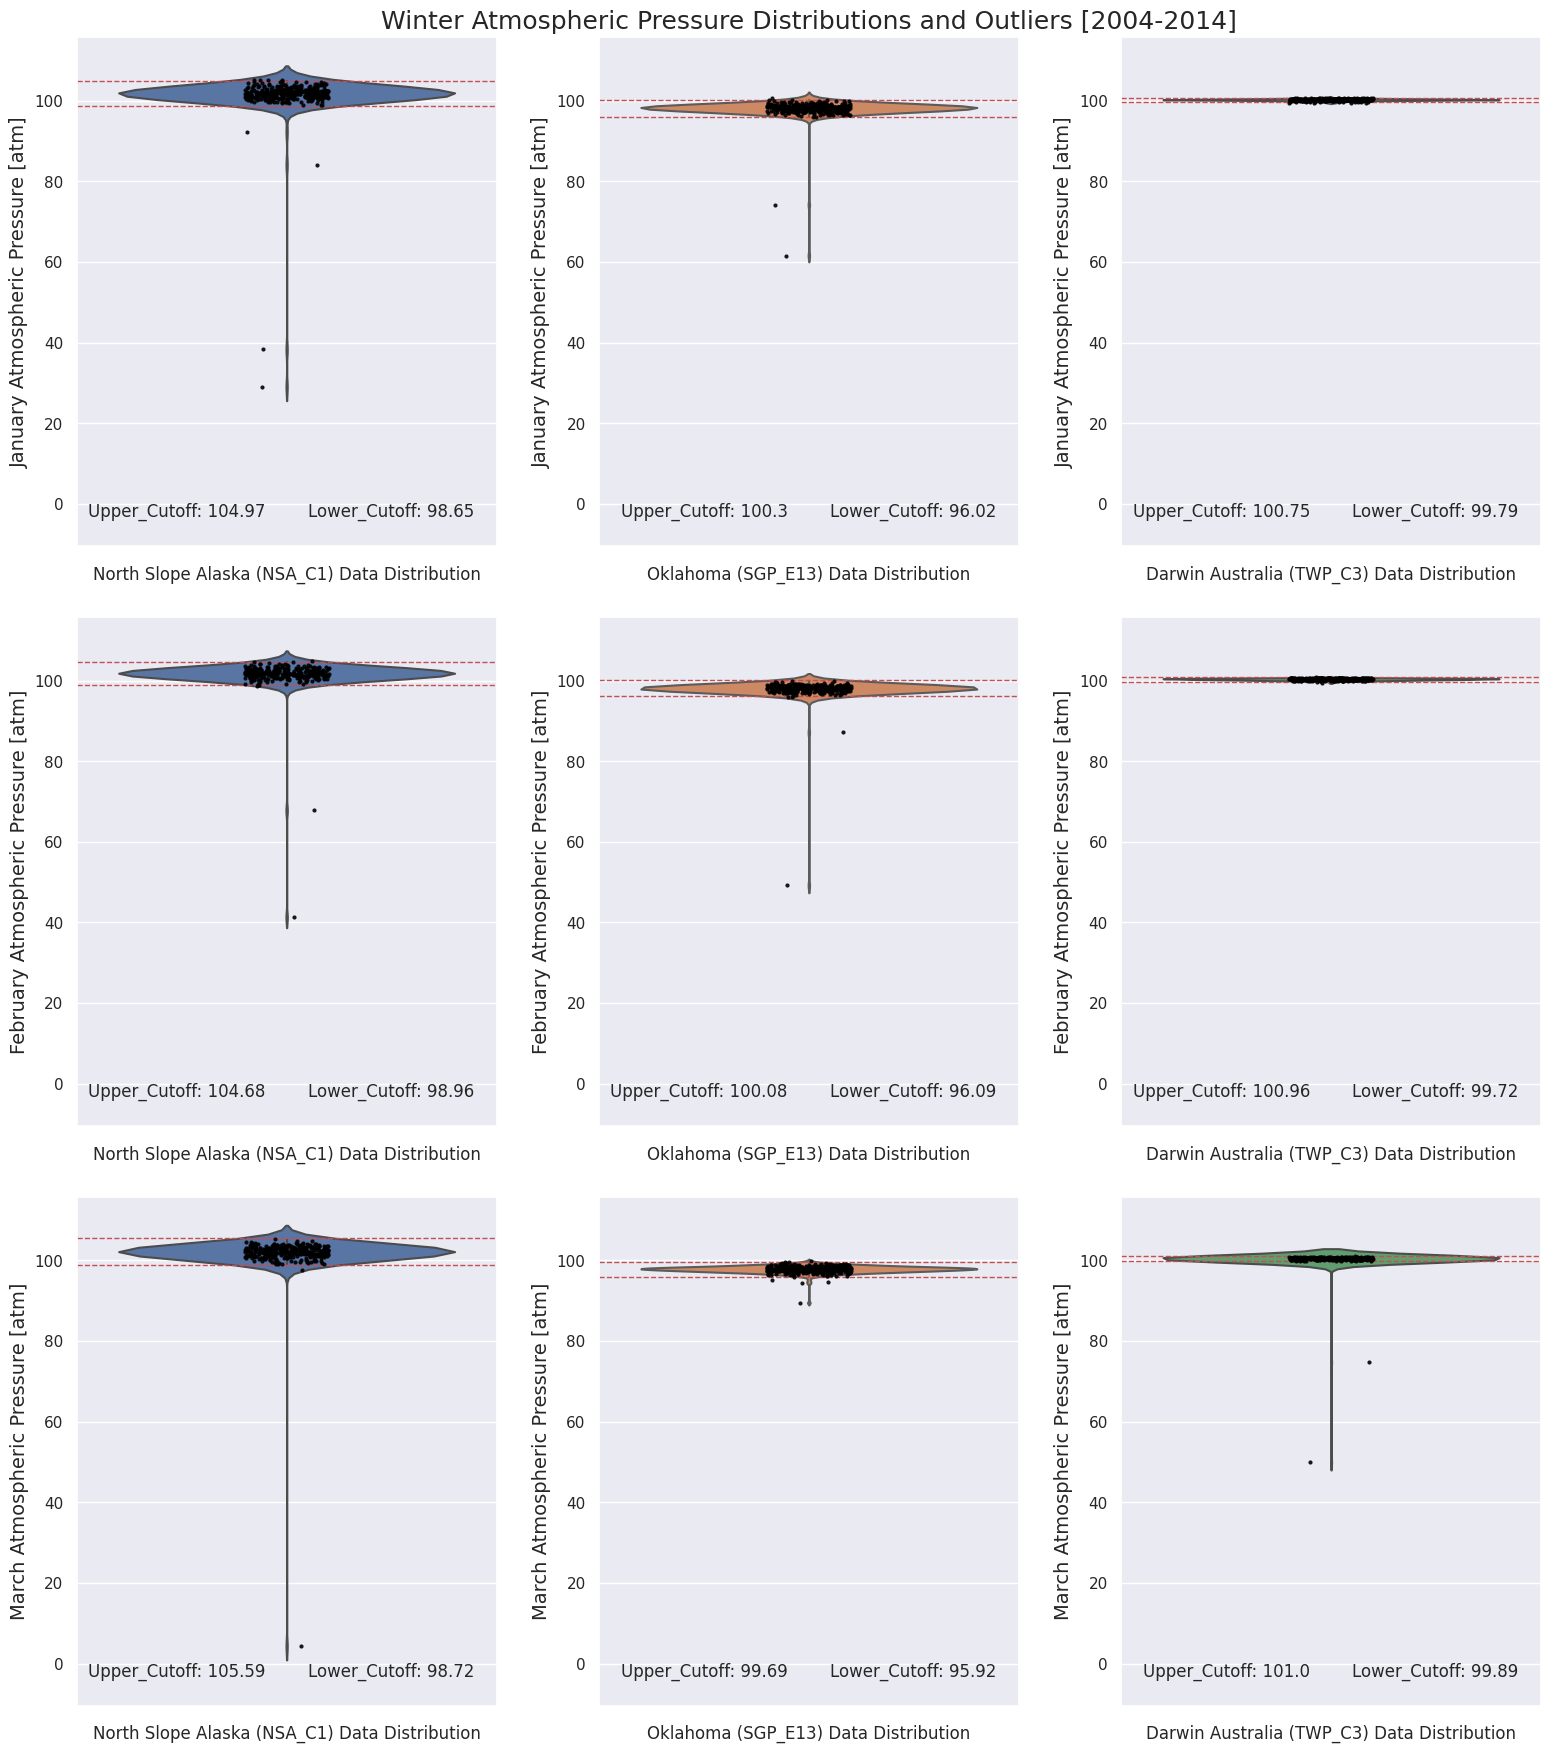

In [109]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

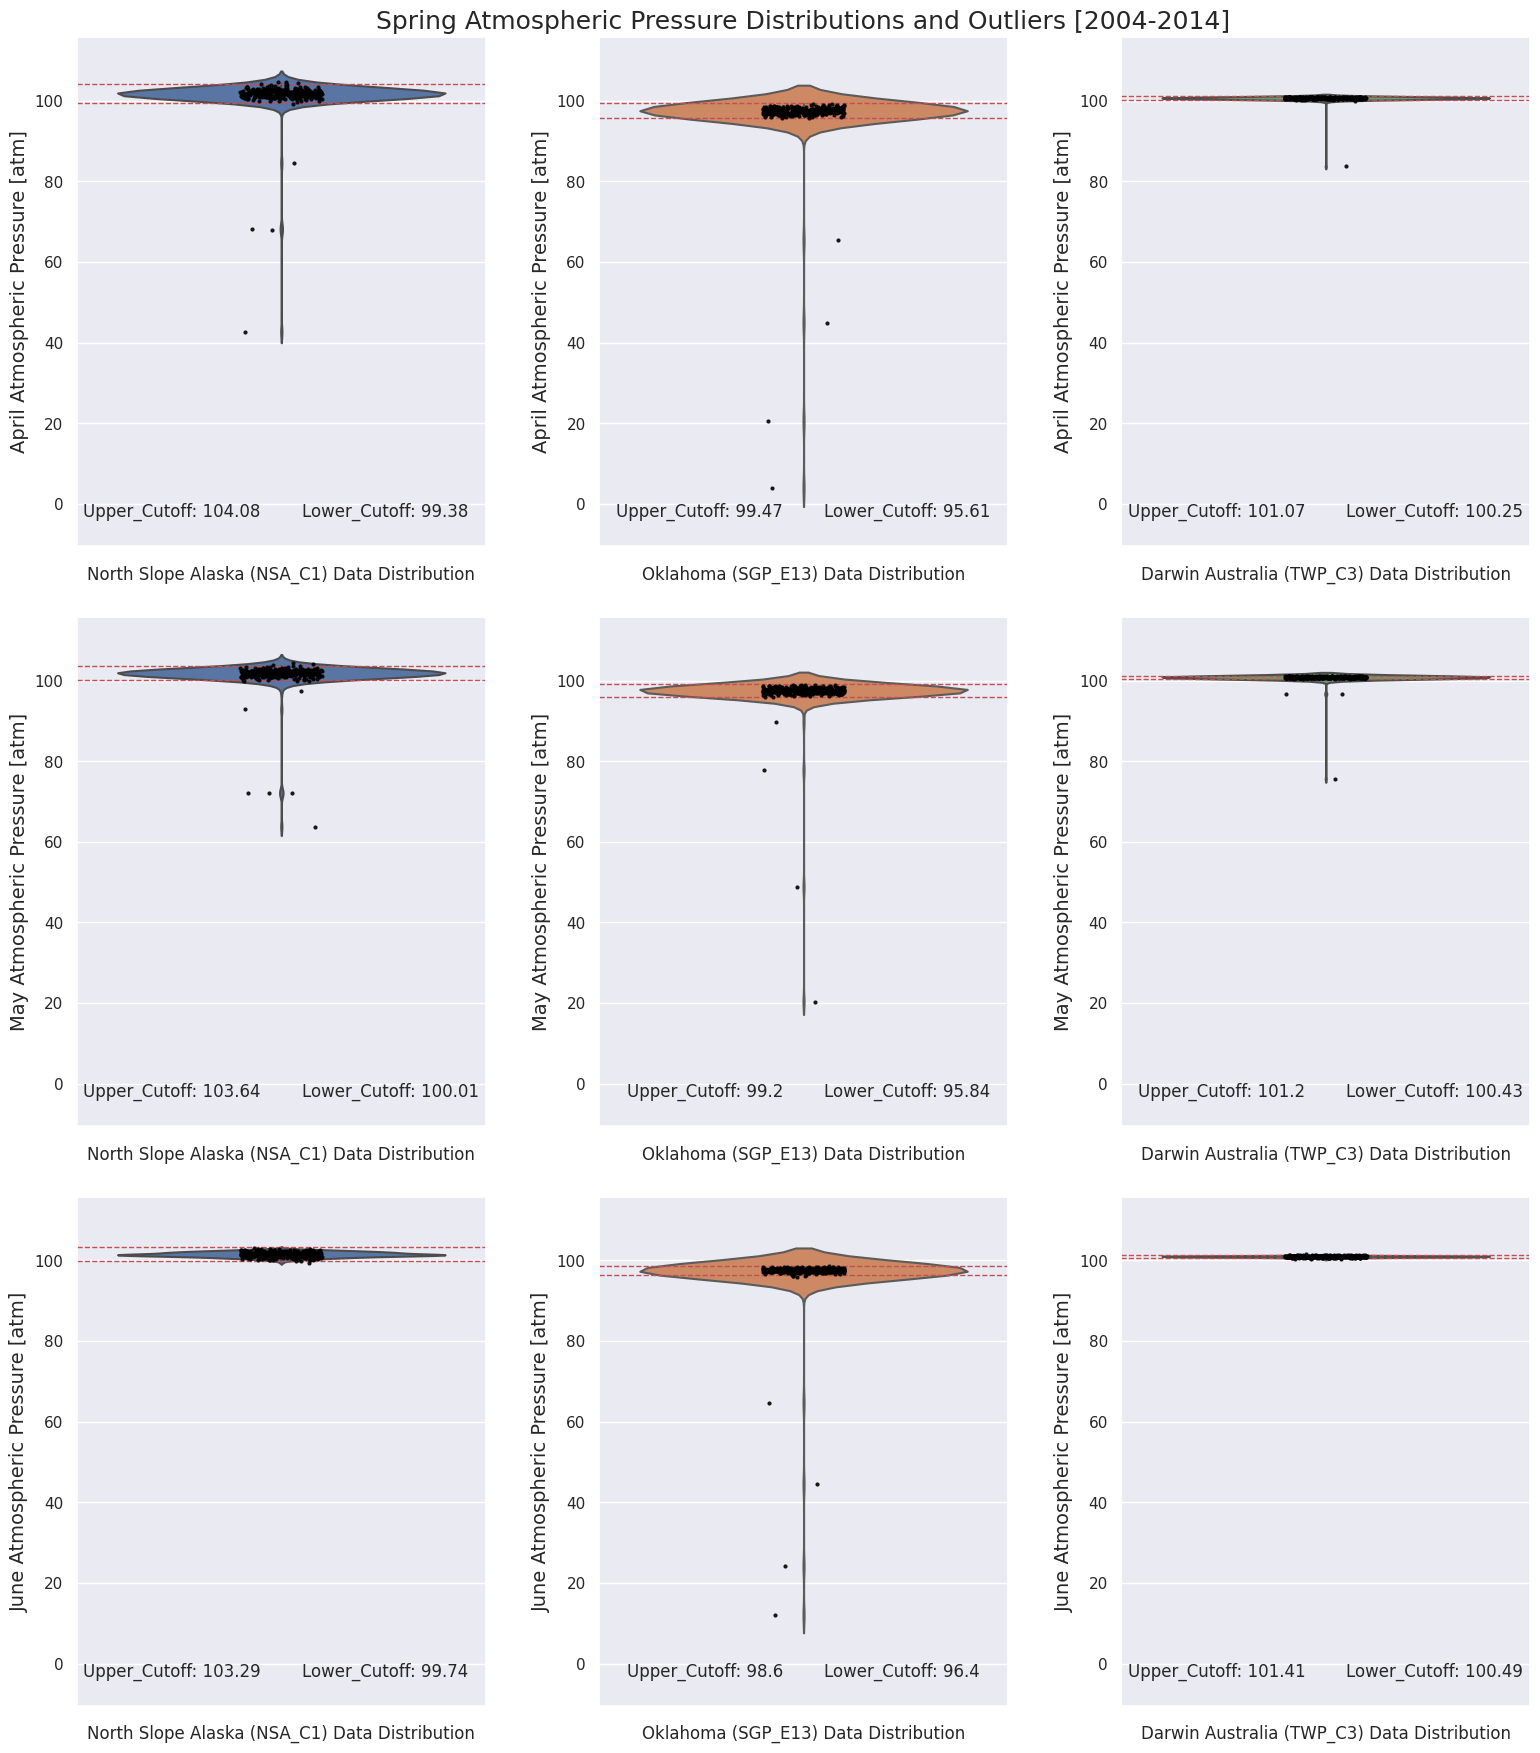

In [110]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


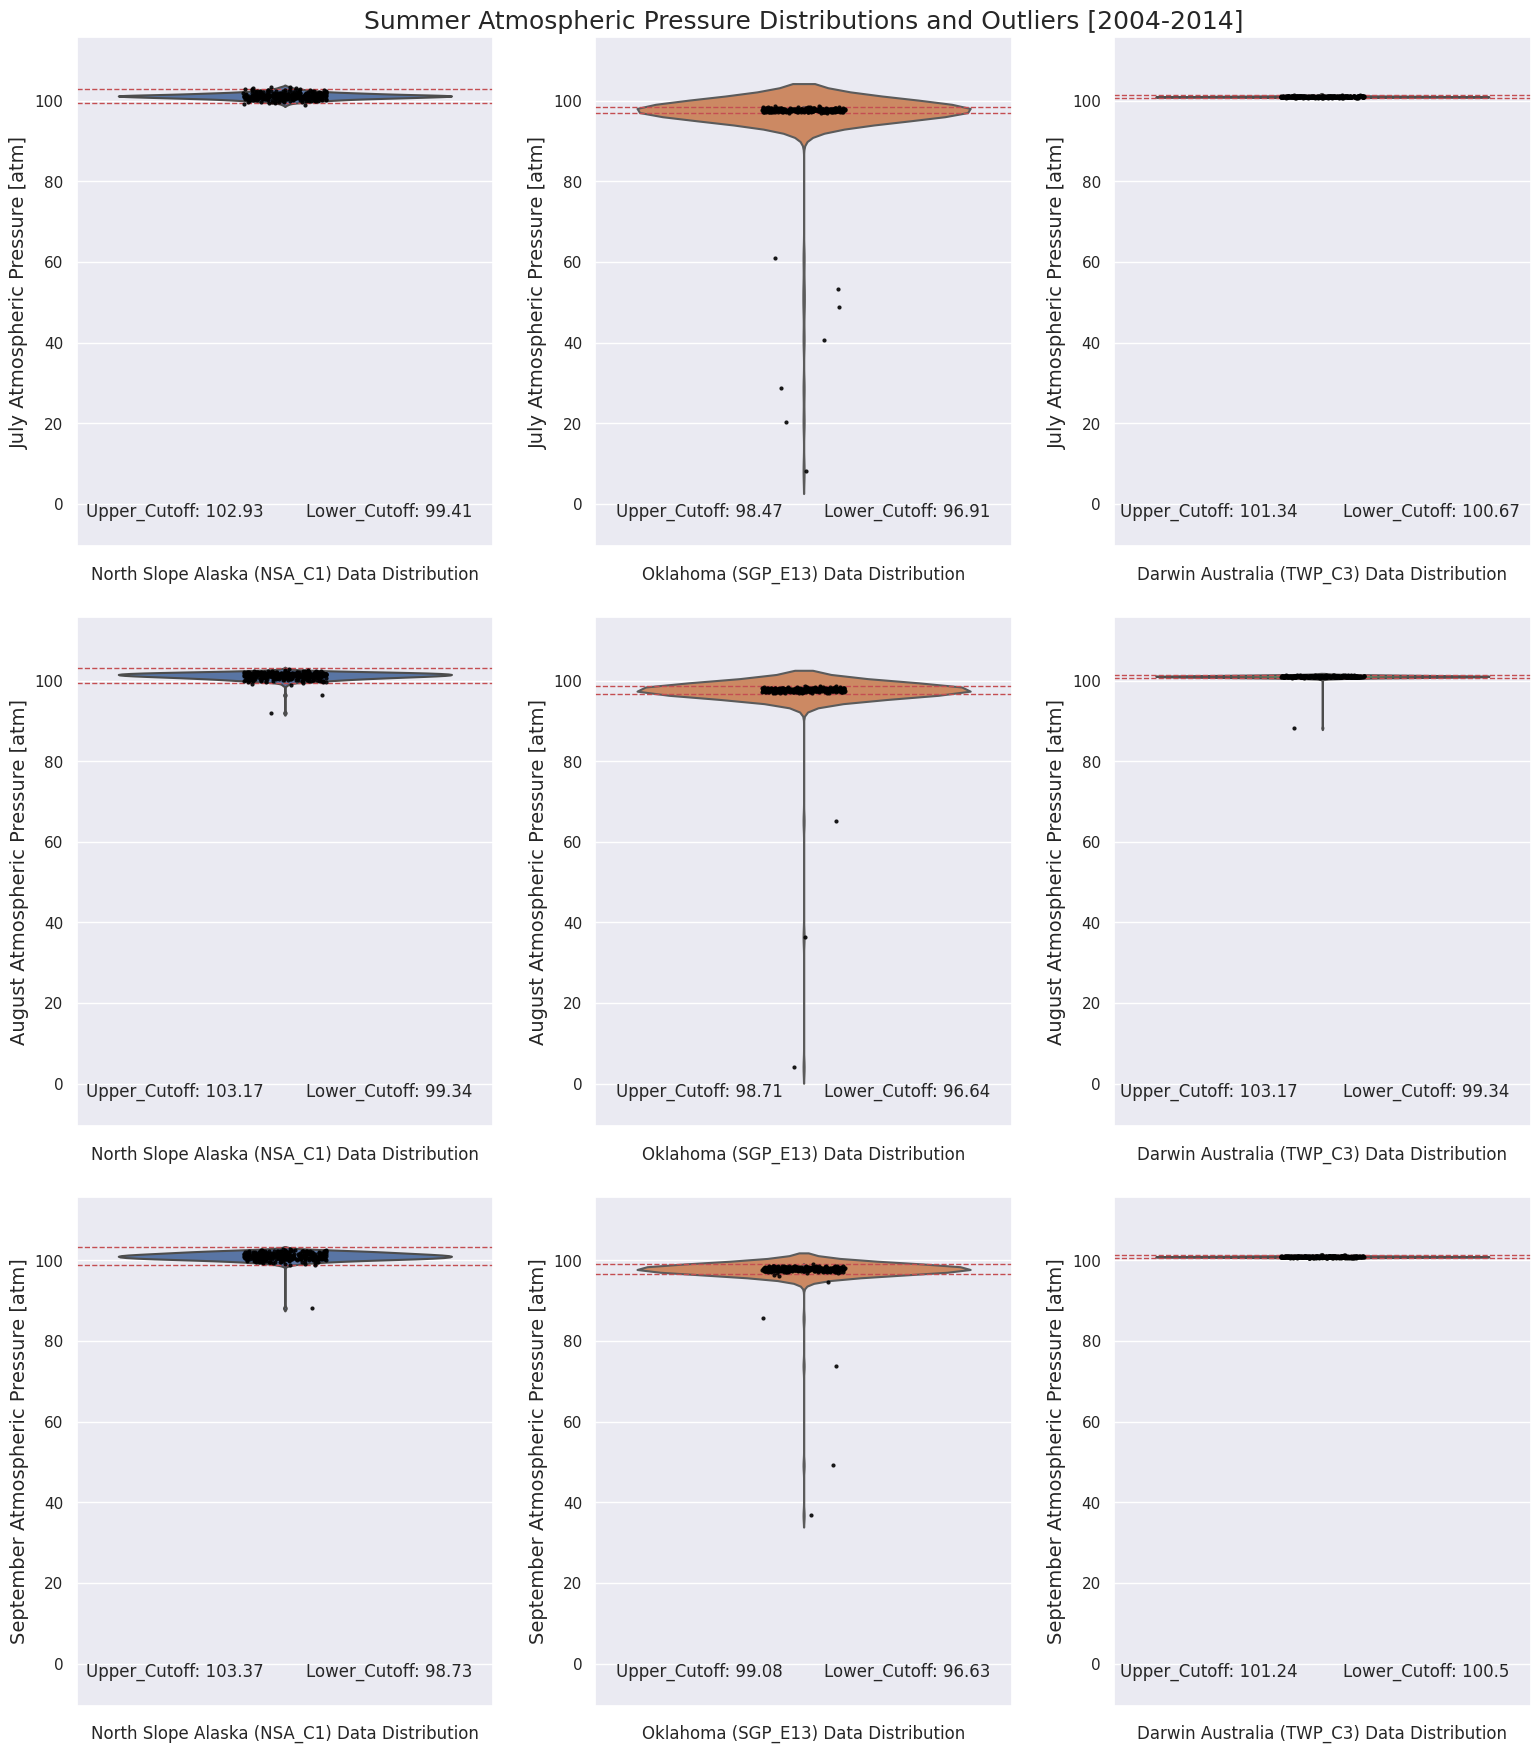

In [111]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

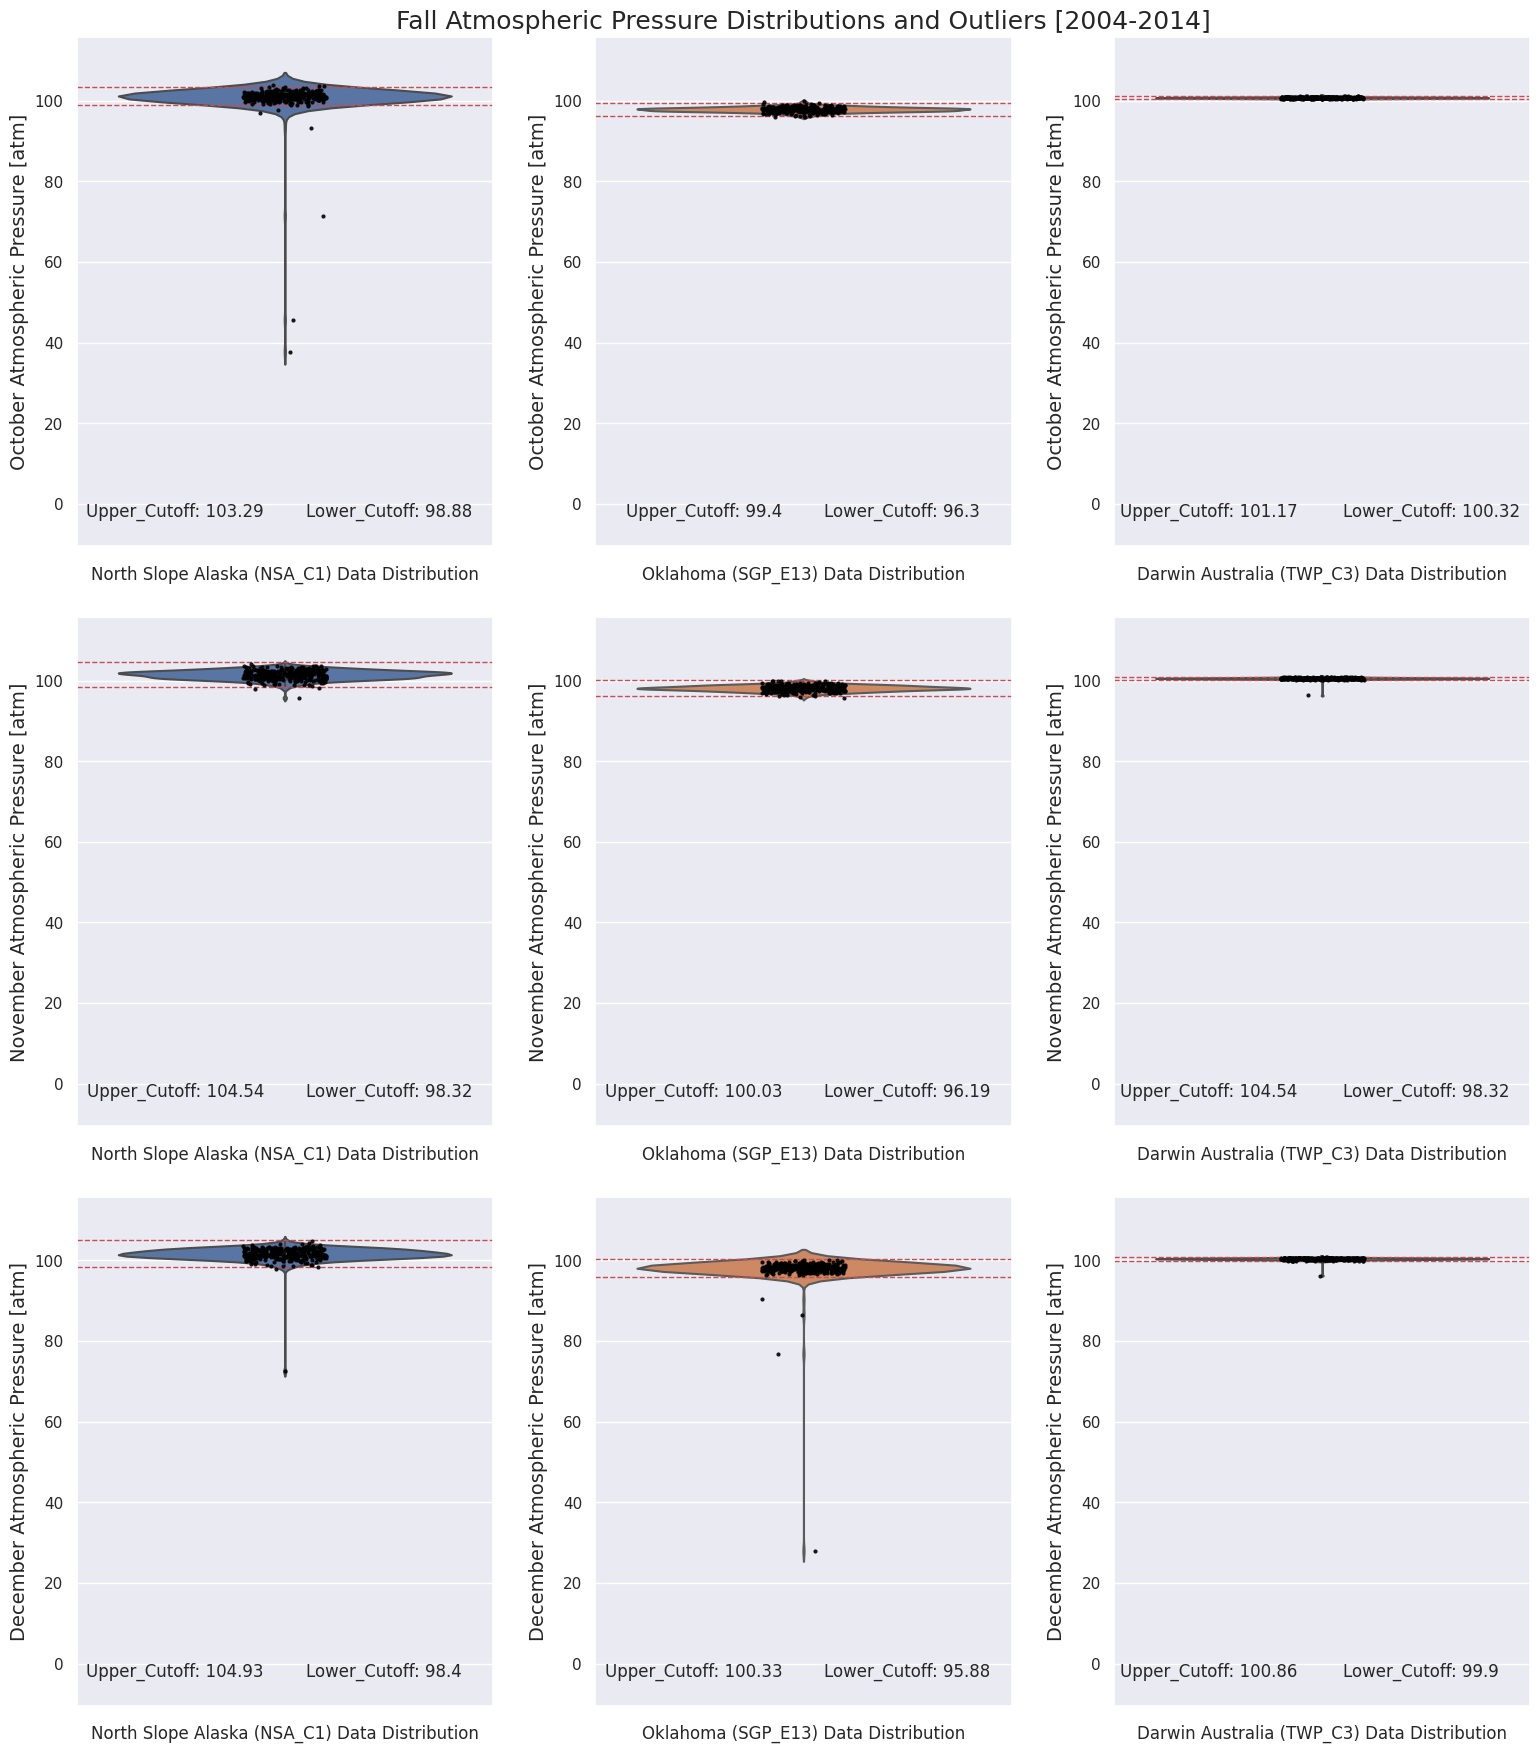

In [112]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [113]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [114]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [115]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [116]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

[36, 295, 347, 437, 438, 486, 556, 566, 567, 582, 600, 660, 768, 780, 1013, 1058, 1084, 1085, 1409, 1596, 1616, 1662, 2009, 2010, 2011, 2106, 2214, 2294, 2316, 2317, 2471, 2487, 2558, 2559, 2567, 2568, 2580, 2673, 2674, 2675, 2676, 2677, 2678, 2693, 2789, 2790, 2849, 2850, 2937, 2938, 3065, 3066, 3067, 3191, 3204, 3205, 3219, 3226, 3380, 3381, 3392, 3393, 3423, 3424, 3601, 3691]
[170, 206, 207, 268, 269, 381, 527, 528, 557, 558, 597, 598, 696, 697, 731, 736, 739, 778, 781, 798, 864, 866, 918, 919, 920, 926, 927, 968, 994, 995, 1150, 1243, 1244, 1253, 1386, 1396, 1451, 1453, 1462, 1521, 1523, 1577, 1579, 1615, 1616, 1617, 1761, 1762, 1886, 2441, 2489, 2490, 2547, 2555, 2723, 2724, 2727, 2975, 3024, 3028, 3179, 3181, 3212, 3485, 3713, 3714]
[39, 75, 76, 77, 78, 137, 139, 140, 172, 255, 256, 437, 582, 685, 701, 753, 754, 806, 823, 824, 847, 1014, 1015, 1016, 1156, 1157, 1262, 1263, 1264, 1265, 1416, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1650, 1651, 2195, 2550, 2551, 2552, 2566, 

In [117]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_atmos_pressure'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_atmos_pressure'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_atmos_pressure'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_atmos_pressure'] = full_tf_ls

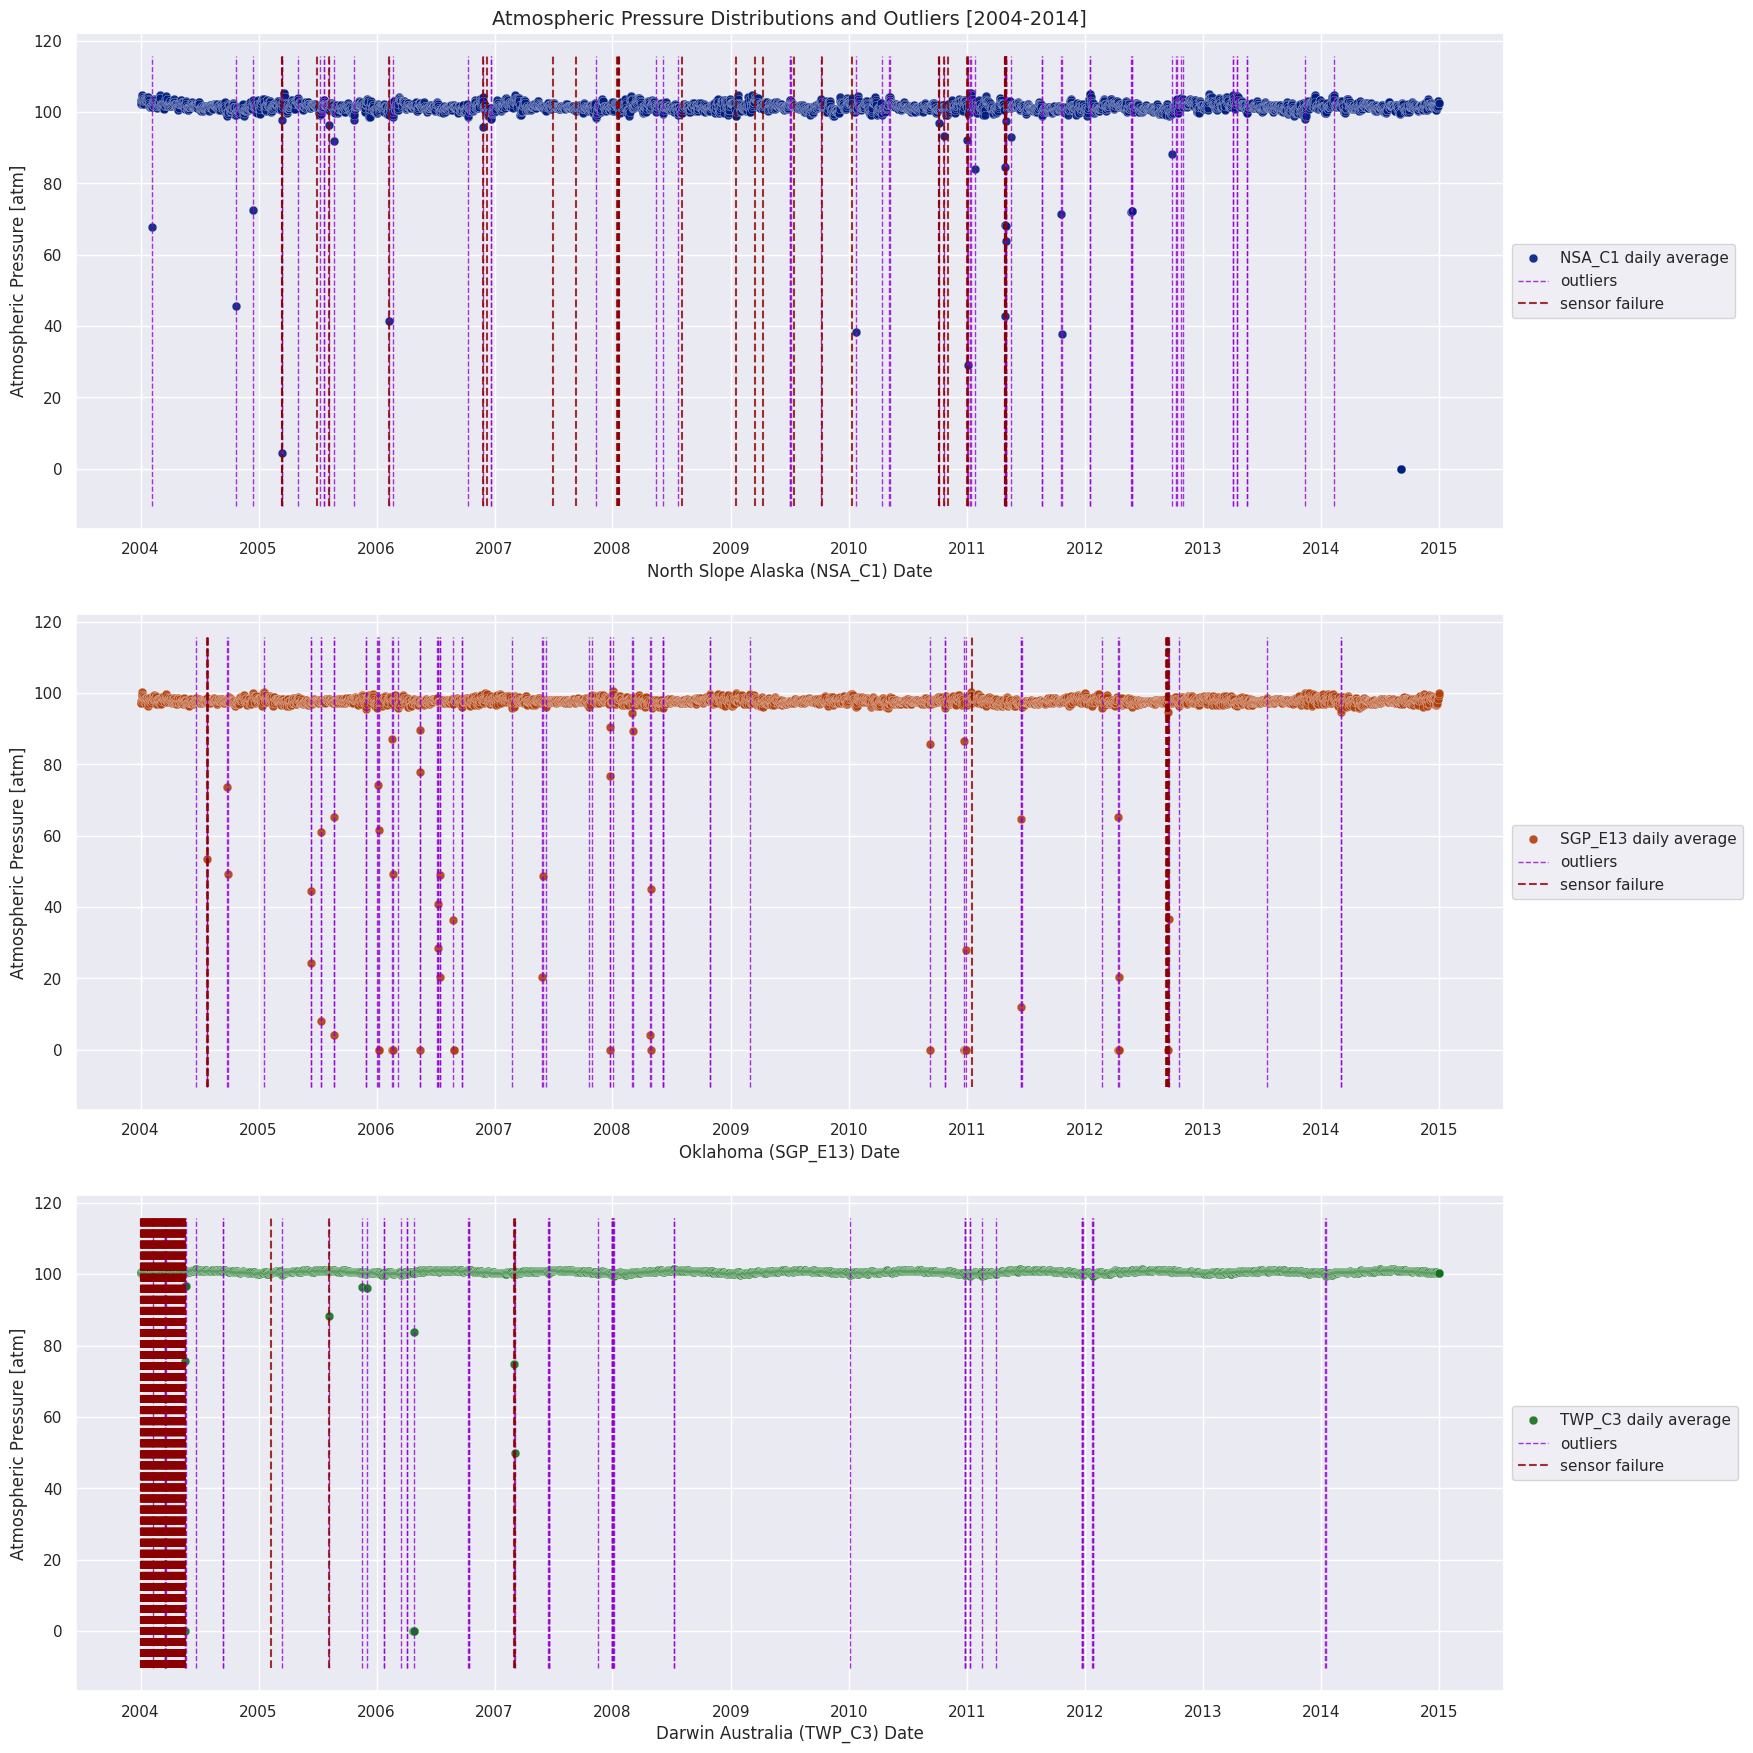

In [118]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Logger Temperature Data Analysis

In [119]:
figname1 = "Logger_Temperature_Distribution_Winter.png"
figname2 = "Logger_Temperature_Distribution_Spring.png"
figname3 = "Logger_Temperature_Distribution_Summer.png"
figname4 = "Logger_Temperature_Distribution_Fall.png"
figname5 = "Logger_Temperature_Data_with_OutlierOverlay_.png"

In [120]:
name0 = 'met_logger_temp'
name1 = 'Logger Temperature [C]'
jan_name1 = "January Logger Temperature [C]"
feb_name1 = "February Logger Temperature [C]"
mar_name1 = "March Logger Temperature [C]"
apr_name1 = "April Logger Temperature [C]"
may_name1 = "May Logger Temperature [C]"
jun_name1 = "June Logger Temperature [C]"
jul_name1 = "July Logger Temperature [C]"
aug_name1 = "August Logger Temperature [C]"
sep_name1 = "September Logger Temperature [C]"
oct_name1 = "October Logger Temperature [C]"
nov_name1 = "November Logger Temperature [C]"
dec_name1 = "December Logger Temperature [C]"
name2 = 'Logger Temperature Distributions and Outliers [2004-2014]'
name2a = 'Winter Logger Temperature Distributions and Outliers [2004-2014]'
name2b = 'Spring Logger Temperature Distributions and Outliers [2004-2014]'
name2c = 'Summer Logger Temperature  Distributions and Outliers [2004-2014]'
name2d = 'Fall Logger Temperature Distributions and Outliers [2004-2014]'

In [121]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

3.927590012550354
43.203490138053894
-17.395488641535245


In [122]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

[437, 438, 547, 582, 768, 1058, 1072, 1275, 1346, 1475]

[207, 208, 2571, 3173, 3174, 3175, 3176, 3177, 3178, 3179]

[405, 582]

In [123]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [124]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

[21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639,
 21.34086342652639]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[2214, 2559]

[1.4258408149083455, 4.239120361010234]

341

341


Lower Cutoff: 7.3198110759258235
Higher Cutoff: 35.635068704684585
[2214, 2559]
[1.4258408149083455, 4.239120361010234]


In [125]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


[20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658,
 20.958862781524658]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

311

311


Lower Cutoff: 6.000591422120731
Higher Cutoff: 35.886322761575386
Minimum Value: 8.916140417257944
Maximum Value: 31.206828753153484


In [126]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

[19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655,
 19.749161422252655]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

341

341


Lower Cutoff: 6.600241124629978
Higher Cutoff: 32.24089131752649
Minimum Value: 11.249217927455902
Maximum Value: 30.49511702855428


In [127]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


[14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756,
 14.221052904923756]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

330

330


Lower Cutoff: 2.586624781290693
Higher Cutoff: 26.339495579401646
Minimum Value: 4.763387049833933
Maximum Value: 22.671805302302044


In [128]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


[11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803,
 11.959249019622803]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

341

341


Lower Cutoff: 2.3997816443443316
Higher Cutoff: 22.46947218974431
Minimum Value: 5.720945338408153
Maximum Value: 21.811552445093792


In [129]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


[14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951,
 14.502561946709951]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[3452]

[27.55860201517741]

330

330


Lower Cutoff: 2.522459420065081
Higher Cutoff: 26.3321613992254
Minimum Value: 6.5197762449582415
Maximum Value: 27.55860201517741


In [130]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


[17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937,
 17.341841518878937]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[3126]

[30.221550941467285]

341

341


Lower Cutoff: 6.707885866363844
Higher Cutoff: 27.764483536283173
Minimum Value: 10.60014001528422
Maximum Value: 30.221550941467285


In [131]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


[16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918,
 16.22093286116918]

[3151, 3152, 3153, 3154, 3157]

[27.757628599802654,
 27.952011267344158,
 30.375537077585857,
 29.558561007181805,
 28.59439166386922]

341

341


Lower Cutoff: 5.767391189932823
Higher Cutoff: 27.2652979940176
Minimum Value: 10.103382666905722
Maximum Value: 30.375537077585857


In [132]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


[13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398,
 13.46163821220398]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[1717]

[0.6884374809265137]

330

330


Lower Cutoff: 4.412061351040998
Higher Cutoff: 21.91411892324686
Minimum Value: 0.6884374809265137
Maximum Value: 19.768320719401043


In [133]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


[7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462,
 7.991735776265462]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

341

341


Lower Cutoff: -0.013609149803715859
Higher Cutoff: 17.428887775788702
Minimum Value: 2.3436369061470033
Maximum Value: 17.21523865063985


In [134]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


[13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039,
 13.677997469902039]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[2883, 2884]

[27.60172939300537, 28.066208442052204]

330

330


Lower Cutoff: 2.7441021328171136
Higher Cutoff: 24.69624562313159
Minimum Value: 4.969650248686473
Maximum Value: 28.066208442052204


In [135]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


[18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978,
 18.754171927769978]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[1809, 3270, 3271, 3272, 3276]

[5.429495453834534,
 34.92356061935425,
 33.720514138539635,
 33.348695039749146,
 34.88281114896139]

341

341


Lower Cutoff: 5.758549084266031
Higher Cutoff: 31.186346640189484
Minimum Value: 5.429495453834534
Maximum Value: 34.92356061935425


###SGP

In [136]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


[6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107,
 6.81091304620107]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[7333, 7676]

[21.209888617197674, -8.293328386421004]

341

341


Lower Cutoff: -6.198643792672859
Higher Cutoff: 19.379899091921594
Minimum Value: -8.293328386421004
Maximum Value: 21.209888617197674


In [137]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



[7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146,
 7.477066417535146]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[6615]

[-13.467898628984889]

311

311


Lower Cutoff: -10.205844025049977
Higher Cutoff: 24.488903198779248
Minimum Value: -13.467898628984889
Maximum Value: 20.808986107508343


In [138]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


[12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968,
 12.159076611200968]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[7732]

[-6.601060989225904]

341

341


Lower Cutoff: -4.73694766685367
Higher Cutoff: 31.70043746506175
Minimum Value: -6.601060989225904
Maximum Value: 25.316518863042194


In [139]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


[18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254,
 18.11049711704254]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

330

330


Lower Cutoff: 4.318881429731849
Higher Cutoff: 32.86533524344364
Minimum Value: 5.430219421784083
Maximum Value: 28.353354533513386


In [140]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



[24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984,
 24.553630510965984]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

341

341


Lower Cutoff: 9.638651460409163
Higher Cutoff: 38.461427698532745
Minimum Value: 9.806259214878082
Maximum Value: 32.50857663154602


In [141]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
##sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


[30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493,
 30.084878524144493]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[6741, 6742, 7092, 7093]

[17.613938573201498, 5.128429292043051, 16.349962910016377, 20.60759437084198]

330

330


Lower Cutoff: 21.14880205194155
Higher Cutoff: 38.647663603226356
Minimum Value: 5.128429292043051
Maximum Value: 35.3149893283844


In [142]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


[32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964,
 32.967900911966964]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[7501, 7867, 7868, 7869]

[24.649019082387287, 23.495038827260334, 21.07809281349182, 23.511228322982788]

341

341


Lower Cutoff: 24.7634851137797
Higher Cutoff: 40.80080350240072
Minimum Value: 21.07809281349182
Maximum Value: 38.58846100171407


In [143]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


[31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577,
 31.351265350977577]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

341

341


Lower Cutoff: 22.322986235221222
Higher Cutoff: 39.876943141222
Minimum Value: 24.169336716334026
Maximum Value: 39.27590012550354


In [144]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                          #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




[25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188,
 25.892623901367188]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[7199]

[9.53532689412435]

330

330


Lower Cutoff: 11.710987165570257
Higher Cutoff: 41.6991873929898
Minimum Value: 9.53532689412435
Maximum Value: 35.78862547874451


In [145]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


[19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342,
 19.570098896821342]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[7240]

[7.061913646136721]

341

341


Lower Cutoff: 7.312273507316904
Higher Cutoff: 34.357007309794426
Minimum Value: 7.061913646136721
Maximum Value: 30.854494333267212


In [146]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


[12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248,
 12.985434691111248]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

330

330


Lower Cutoff: -5.220162980568902
Higher Cutoff: 29.548951963273183
Minimum Value: 0.07716733992492664
Maximum Value: 25.18765862782796


In [147]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


[7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046,
 7.308449967221046]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[]

[]

341

341


Lower Cutoff: -9.063658789964393
Higher Cutoff: 23.522859579029806
Minimum Value: -5.177392557263374
Maximum Value: 22.225608905156452


###TWP

In [148]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

[27.329906702041626,
 31.806082884470623,
 32.16016745567322,
 32.918097257614136,
 31.675190925598145,
 29.793147404988606,
 30.553295214970905,
 28.7220725218455,
 29.427059570948284,
 30.46364998817444]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8047]

[26.920484622319538]

341

341


Lower Cutoff: 26.949424058198932
Higher Cutoff: 36.32897443572679
Minimum Value: 26.920484622319538
Maximum Value: 36.00323637326559


In [149]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



[32.055267016092934,
 28.018219153086346,
 27.223325888315838,
 30.987605810165405,
 29.74658505121867,
 28.46590844790141,
 29.057549873987835,
 27.967453718185425,
 27.591482162475586,
 28.859652201334637]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[10638]

[26.63899763425191]

311

311


Lower Cutoff: 26.65000925461451
Higher Cutoff: 36.67367865641912
Minimum Value: 26.63899763425191
Maximum Value: 34.99503858884176


In [150]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


[32.024330059687294,
 28.564923842748005,
 30.450588305791218,
 32.262293656667076,
 30.56063397725423,
 30.11906909942627,
 31.435181458791096,
 32.271641969680786,
 32.2871204217275,
 32.50498731931051]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8114, 8831, 8839, 9192, 9194]

[26.647075255711872,
 26.92817250887553,
 26.84039068222046,
 26.125001033147175,
 25.9588889280955]

341

341


Lower Cutoff: 27.202168057362243
Higher Cutoff: 36.325378090143204
Minimum Value: 25.9588889280955
Maximum Value: 34.997187773386635


In [151]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


[31.86140052477519,
 32.35418097178141,
 32.72600690523783,
 32.2161918481191,
 32.41564893722534,
 32.93102399508158,
 32.51416277885437,
 32.12555265426636,
 31.87834922472636,
 32.182324171066284]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8857, 8858, 8860, 8883, 10697]

[28.769652446111042,
 28.775628169377644,
 26.335804382960003,
 24.072931410471597,
 28.449295043945312]

330

330


Lower Cutoff: 28.941945523023602
Higher Cutoff: 35.35774569710097
Minimum Value: 24.072931410471597
Maximum Value: 35.08083256085714


In [152]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



[29.913716236750286,
 28.95089515050252,
 30.804316361745197,
 32.46801892916361,
 30.615031003952026,
 30.690051635106403,
 31.242972373962402,
 31.69421140352885,
 31.69885555903117,
 31.36330993970235]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8175, 8186, 8915, 8916, 8917, 11107]

[24.159407161076867,
 25.70665955543518,
 25.24981689453125,
 25.788232564926147,
 26.115091562271118,
 24.572631041208904]

341

341


Lower Cutoff: 26.188405354817704
Higher Cutoff: 35.28996515274048
Minimum Value: 24.159407161076867
Maximum Value: 34.58239674568176


In [153]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


[27.97898777325948,
 27.261871496836346,
 30.06100296974182,
 30.967012484868366,
 29.748693863550823,
 30.010335604349773,
 30.543720960617065,
 30.762581030527752,
 30.454573313395183,
 29.72456447283427]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[9302]

[22.579417785008747]

330

330


Lower Cutoff: 22.6269238392512
Higher Cutoff: 34.500888625780746
Minimum Value: 22.579417785008747
Maximum Value: 33.532448848088585


In [154]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


[27.937559843063354,
 28.511149485905964,
 29.069963852564495,
 29.3982990582784,
 29.329899231592815,
 29.84031279881795,
 29.176197052001953,
 28.257046063741047,
 27.331411282221477,
 28.396462361017864]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8237, 8965, 8966, 9313, 9321, 9322, 9323, 9703, 10433, 10434]

[24.296632011731464,
 24.153308629989624,
 22.92239546775818,
 24.536521116892498,
 24.688109636306763,
 24.78690544764201,
 24.175485690434773,
 24.798900445302326,
 33.00418909390768,
 32.66678516070048]

341

341


Lower Cutoff: 24.799736340840653
Higher Cutoff: 32.432298342386886
Minimum Value: 22.92239546775818
Maximum Value: 33.00418909390768


In [155]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

[28.968655188878376,
 29.531232913335163,
 29.66245683034261,
 29.264538447062176,
 30.362866401672363,
 29.090505520502727,
 28.568848689397175,
 28.54655106862386,
 29.22032030423482,
 28.849555412928265]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[9360]

[24.449268261591595]

341

341


Lower Cutoff: 24.918998082478844
Higher Cutoff: 33.321626822153725
Minimum Value: 24.449268261591595
Maximum Value: 32.531610091527305


In [156]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




[31.292726357777912,
 30.26835076014201,
 29.50351007779439,
 28.351998726526897,
 28.63576825459798,
 29.684988180796307,
 30.37767744064331,
 30.43792263666789,
 32.162725845972695,
 31.804017702738445]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8283, 8284, 9010, 9019, 9020, 9021, 10846, 10847, 11589]

[28.351998726526897,
 28.63576825459798,
 27.462505261103313,
 28.231719334920246,
 28.50439206759135,
 28.444252967834473,
 28.57947564125061,
 28.15074634552002,
 34.64687291781107]

330

330


Lower Cutoff: 28.818931649128594
Higher Cutoff: 34.64109133680662
Minimum Value: 27.462505261103313
Maximum Value: 34.64687291781107


In [157]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


[32.570059378941856,
 32.23326063156128,
 32.9714150428772,
 33.13272341092428,
 33.041118224461876,
 32.55745768547058,
 32.871645291646324,
 32.98381646474203,
 32.899911959966026,
 32.51378512382507]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[9787, 10516, 10881]

[29.48385985692342, 29.288100242614746, 30.16357684135437]

341

341


Lower Cutoff: 30.336420476436622
Higher Cutoff: 35.962367316087075
Minimum Value: 29.288100242614746
Maximum Value: 35.19220391909281


In [158]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


[33.374720891316734,
 33.020316918691,
 33.12517428398132,
 33.199709256490074,
 33.7554505666097,
 31.029576063156128,
 33.02711542447408,
 32.96535428365072,
 33.76035610834757,
 34.10422921180725]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8719, 8725, 8728, 9087, 9443, 9453, 9819, 10178, 10533, 10548]

[29.74317153294881,
 29.47463591893514,
 29.362809896469116,
 29.648502349853516,
 29.545937299728394,
 29.50139331817627,
 29.365559736887615,
 29.55126182238261,
 26.697999159495037,
 30.064855575561523]

330

330


Lower Cutoff: 30.206277976433455
Higher Cutoff: 36.624691059192
Minimum Value: 26.697999159495037
Maximum Value: 36.00162434577942


In [159]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame()
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


[32.684734185536705,
 32.80733633041382,
 34.68245458602905,
 33.29870049158732,
 32.95477302869161,
 34.89329703648885,
 34.51996246973673,
 34.52126558621725,
 32.78397901852926,
 34.34210936228434]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[8762, 10208]

[27.01407329241435, 26.841968536376953]

341

341


Lower Cutoff: 27.35275959968567
Higher Cutoff: 38.46551823616028
Minimum Value: 26.841968536376953
Maximum Value: 36.71434720357259


In [160]:
#Outlier dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower',]
outlier_limit_df

atm_press_upper  atm_press_lower  log_temp_upper  log_temp_lower
nsa_jan       104.971555        98.651656       35.635069        7.319811
nsa_feb       104.677239        98.960574       35.886323        6.000591
nsa_mar       105.586793        98.715645       32.240891        6.600241
nsa_apr       104.083475        99.378188       26.339496        2.586625
nsa_may       103.637609       100.009137       22.469472        2.399782
nsa_jun       103.289245        99.741591       26.332161        2.522459
nsa_jul       102.926562        99.409748       27.764484        6.707886
nsa_aug       103.165976        99.338132       27.265298        5.767391
nsa_sep       103.372691        98.728050       21.914119        4.412061
nsa_oct       103.290768        98.881697       17.428888       -0.013609
nsa_nov       104.538852        98.322032       24.696246        2.744102
nsa_dec       104.934416        98.401119       31.186347        5.758549
sgp_jan       100.300029        96.019879       19.379899       -6.198644
sgp_feb       100.081312        96.086403       24.488903      -10.205844
sgp_mar        99.689096        95.923217       31.700437       -4.736948
sgp_apr        99.474355        95.614335       32.865335        4.318881
sgp_may        99.200940        95.844811       38.461428        9.638651
sgp_jun        98.599321        96.404179       38.647664       21.148802
sgp_jul        98.472868        96.913046       40.800804       24.763485
sgp_aug        98.708565        96.642425       39.876943       22.322986
sgp_sep        99.084271        96.629176       41.699187       11.710987
sgp_oct        99.398160        96.302686       34.357007        7.312274
sgp_nov       100.027636        96.188784       29.548952       -5.220163
sgp_dec       100.326041        95.884839       23.522860       -9.063659
twp_jan       100.751797        99.791731       36.328974       26.949424
twp_feb       100.956402        99.720737       36.673679       26.650009
twp_mar       101.003246        99.888930       36.325378       27.202168
twp_apr       101.074167       100.253679       35.357746       28.941946
twp_may       101.199081       100.430988       35.289965       26.188405
twp_jun       101.411778       100.485045       34.500889       22.626924
twp_jul       101.341366       100.665463       32.432298       24.799736
twp_aug       101.344373       100.677563       33.321627       24.918998
twp_sep       101.237453       100.502997       34.641091       28.818932
twp_oct       101.166157       100.320169       35.962367       30.336420
twp_nov       100.947701       100.112702       36.624691       30.206278
twp_dec       100.864312        99.903730       38.465518       27.352760

###outlier end

In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_logger_temp'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_logger_temp'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_logger_temp'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_logger_temp'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Logger Voltage Data Analysis


In [ ]:
figname1 = "Logger_Voltage_Distribution_Winter.png"
figname2 = "Logger_Voltage_Distribution_Spring.png"
figname3 = "Logger_Voltage_Distribution_Summer.png"
figname4 = "Logger_Voltage_Distribution_Fall.png"
figname5 = "Logger_Voltage_Data_with_OutlierOverlay_.png"

In [ ]:
name0 = 'met_logger_volt'
name1 = 'Logger Voltage [V]'
jan_name1 = "January Logger Voltage [V]"
feb_name1 = "FebruaryLogger Voltage [V]"
mar_name1 = "March Logger Voltage [V]"
apr_name1 = "April Logger Voltage [V]"
may_name1 = "May Logger Voltage [V]"
jun_name1 = "June Logger Voltage [V]"
jul_name1 = "July Logger Voltage [V]"
aug_name1 = "August Logger Voltage [V]"
sep_name1 = "September Logger Voltage [V]"
oct_name1 = "October Logger Voltage [V]"
nov_name1 = "November Logger Voltage [V]"
dec_name1 = "December Logger Voltage [V]"
name2 = 'Logger Voltage Distributions and Outliers [2004-2014]'
name2a = 'Winter Logger Voltage Distributions and Outliers [2004-2014]'
name2b = 'Spring Logger Voltage Distributions and Outliers [2004-2014]'
name2c = 'Summer Logger Voltage Distributions and Outliers [2004-2014]'
name2d = 'Fall Logger Voltage Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower']
outlier_limit_df

In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_logger_volt'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_logger_volt'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_logger_volt'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_logger_volt'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Mean Relative Humidity Data Analysis


In [ ]:
figname1 = "Relative_Humidity_Distribution_Winter.png"
figname2 = "Relative_Humidity_Distribution_Spring.png"
figname3 = "Relative_Humidity_Distribution_Summer.png"
figname4 = "Relative_Humidity_Distribution_Fall.png"
figname5 = "Relative_Humidity_Data_with_OutlierOverlay_.png"

In [ ]:
name0 = 'met_rh_mean'
name1 = 'Mean Relative Humidity [%]'
jan_name1 = "January Mean Relative Humidity [%]"
feb_name1 = "February Mean Relative Humidity [%]"
mar_name1 = "March Mean Relative Humidity [%]"
apr_name1 = "April Mean Relative Humidity [%]"
may_name1 = "May Mean Relative Humidity [%]"
jun_name1 = "June Mean Relative Humidity [%]"
jul_name1 = "July Mean Relative Humidity [%]"
aug_name1 = "August Mean Relative Humidity [%]"
sep_name1 = "September Mean Relative Humidity [%]"
oct_name1 = "October Mean Relative Humidity [%]"
nov_name1 = "November Mean Relative Humidity [%]"
dec_name1 = "December Mean Relative Humidity [%]"
name2 = 'Mean Relative Humidity Distributions and Outliers [2004-2014]'
name2a = 'Winter Mean Relative Humidity Distributions and Outliers [2004-2014]'
name2b = 'Spring Mean Relative Humidity Distributions and Outliers [2004-2014]'
name2c = 'Summer Mean Relative Humidity Distributions and Outliers [2004-2014]'
name2d = 'Fall Mean Relative Humidity Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower']
outlier_limit_df

In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
figname1 = "AtmosphericPressure_Distribution_Fall.png"
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_rh_mean'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_rh_mean'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_rh_mean'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_rh_mean'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Mean Temperature Data Analysis


In [ ]:
figname1 = "Mean_Temperature_Distribution_Winter.png"
figname2 = "Mean_Temperature_Distribution_Spring.png"
figname3 = "Mean_Temperature_Distribution_Summer.png"
figname4 = "Mean_Temperature_Distribution_Fall.png"
figname5 = "Mean_Temperature_Data_with_OutlierOverlay_.png"

In [ ]:
name0 = 'met_temp_mean'
name1 = 'Mean Temperature [C]'
jan_name1 = "January Mean Temperature [C]"
feb_name1 = "February Mean Temperature [C]"
mar_name1 = "March Mean Temperature [C]"
apr_name1 = "April Mean Temperature [C]"
may_name1 = "May Mean Temperature [C]"
jun_name1 = "June Mean Temperature [C]"
jul_name1 = "July Mean Temperature [C]"
aug_name1 = "August Mean Temperature [C]"
sep_name1 = "September Mean Temperature [C]"
oct_name1 = "October Mean Temperature [C]"
nov_name1 = "November Mean Temperature [C]"
dec_name1 = "December Mean Temperature [C]"
name2 = 'Mean Temperature Distributions and Outliers [2004-2014]'
name2a = 'Winter Mean Temperature Distributions and Outliers [2004-2014]'
name2b = 'Spring Mean Temperature Distributions and Outliers [2004-2014]'
name2c = 'Summer Mean Temperature Distributions and Outliers [2004-2014]'
name2d = 'Fall Mean Temperature Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier Dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower','temp_mean_upper','temp_mean_lower']
outlier_limit_df

In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_temp_mean'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_temp_mean'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_temp_mean'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_temp_mean'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Arithmetic Mean of Windspeed Data Analysis


In [ ]:
figname1 = "Mean_Windspeed_Distribution_Winter.png"
figname2 = "Mean_Windspeed_Distribution_Spring.png"
figname3 = "Mean_Windspeed_Distribution_Summer.png"
figname4 = "Mean_Windspeed_Distribution_Fall.png"
figname5 = "Mean_Windspeed_Data_with_OutlierOverlay_.png"

In [ ]:
name0 = 'met_wspd_arith_mean'
name1 = 'Mean Windspeed [m/s]'
jan_name1 = "January Mean Windspeed [m/s]"
feb_name1 = "February Mean Windspeed [m/s]"
mar_name1 = "March Mean Windspeed [m/s]"
apr_name1 = "April Mean Windspeed [m/s]"
may_name1 = "May Mean Windspeed [m/s]"
jun_name1 = "June Mean Windspeed [m/s]"
jul_name1 = "July Mean Windspeed [m/s]"
aug_name1 = "August Mean Windspeed [m/s]"
sep_name1 = "September Mean Windspeed [m/s]"
oct_name1 = "October Mean Windspeed [m/s]"
nov_name1 = "November Mean Windspeed [m/s]"
dec_name1 = "December Mean Windspeed [m/s]"
name2 = 'Mean Windspeed Distributions and Outliers [2004-2014]'
name2a = 'Winter Mean Windspeed Distributions and Outliers [2004-2014]'
name2b = 'Spring Mean Windspeed Distributions and Outliers [2004-2014]'
name2c = 'Summer Mean Windspeed Distributions and Outliers [2004-2014]'
name2d = 'Fall Mean Windspeed Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                  #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier Dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower','temp_mean_upper','temp_mean_lower','windspeed_upper','windspeed_lower']
outlier_limit_df


In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

my_min=0

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_wspd_arith_mean'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_wspd_arith_mean'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_wspd_arith_mean'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_wspd_arith_mean'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Cumulative Daily Rainfall Data Analysis

---




In [ ]:
figname1 = "Cumulative_Rainfall_Distribution_Winter.png"
figname2 = "Cumulative_Rainfall_Distribution_Spring.png"
figname3 = "Cumulative_Rainfall_Distribution_Summer.png"
figname4 = "Cumulative_Rainfall_Distribution_Fall.png"
figname5 = "Cumulative_Rainfall_Data_with_OutlierOverlay_.png"

In [ ]:
name0 = 'met_pws_cumul_rain'
name1 = 'Cumulative_Rainfall [mm]'
jan_name1 = "January Cumulative_Rainfall [mm]"
feb_name1 = "February Cumulative_Rainfall [mm]"
mar_name1 = "March Cumulative_Rainfall [mm]"
apr_name1 = "April Cumulative_Rainfall [mm]"
may_name1 = "May Cumulative_Rainfall [mm]"
jun_name1 = "June Cumulative_Rainfall [mm]"
jul_name1 = "July Cumulative_Rainfall [mm]"
aug_name1 = "August Cumulative_Rainfall [mm]"
sep_name1 = "September Cumulative_Rainfall [mm]"
oct_name1 = "October Cumulative_Rainfall [mm]"
nov_name1 = "November Cumulative_Rainfall [mm]"
dec_name1 = "December Cumulative_Rainfall [mm]"
name2 = 'Cumulative_Rainfall Distributions and Outliers [2004-2014]'
name2a = 'Winter Cumulative_Rainfall Distributions and Outliers [2004-2014]'
name2b = 'Spring Cumulative_Rainfall Distributions and Outliers [2004-2014]'
name2c = 'Summer Cumulative_Rainfall Distributions and Outliers [2004-2014]'
name2d = 'Fall Cumulative_Rainfall Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                       #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier Dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower','temp_mean_upper','temp_mean_lower','windspeed_upper',
                          'windspeed_lower','culum_rain_upper','culum_rain_lower']
outlier_limit_df


In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_pws_cumul_rain'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_pws_cumul_rain'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_pws_cumul_rain'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_pws_cumul_rain'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Cumulative Daily Snowfall Data Analysis

---




In [ ]:
figname1 = "Cumulative_Snowfall_Distribution_Winter.png"
figname2 = "Cumulative_Snowfall_Distribution_Spring.png"
figname3 = "Cumulative_Snowfall_Distribution_Summer.png"
figname4 = "Cumulative_Snowfall_Distribution_Fall.png"
figname5 = "Cumulative_Snowfall_Data_with_OutlierOverlay.png"

In [ ]:
name0 = 'met_pws_cumul_snow'
name1 = 'Cumulative_Snowfall [mm]'
jan_name1 = "January Cumulative_Snowfall [mm]"
feb_name1 = "February Cumulative_Snowfall [mm]"
mar_name1 = "March Cumulative_Snowfall [mm]"
apr_name1 = "April Cumulative_Snowfall [mm]"
may_name1 = "May Cumulative_Snowfall [mm]"
jun_name1 = "June Cumulative_Snowfall [mm]"
jul_name1 = "July Cumulative_Snowfall [mm]"
aug_name1 = "August Cumulative_Snowfall [mm]"
sep_name1 = "September Cumulative_Snowfall [mm]"
oct_name1 = "October Cumulative_Snowfall [mm]"
nov_name1 = "November Cumulative_Snowfall [mm]"
dec_name1 = "December Cumulative_Snowfall [mm]"
name2 = 'Cumulative_Snowfall Distributions and Outliers [2004-2014]'
name2a = 'Winter Cumulative_Snowfall Distributions and Outliers [2004-2014]'
name2b = 'Spring Cumulative_Snowfall Distributions and Outliers [2004-2014]'
name2c = 'Summer Cumulative_Snowfall Distributions and Outliers [2004-2014]'
name2d = 'Fall Cumulative_Snowfall Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                         #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                          #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                #remove if filtering out zero values

if len(twp_jan_my_data_df['y'].values.tolist()) != 0:
  q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                             #remove if filtering out zero values

if len(twp_feb_my_data_df['y'].values.tolist()) != 0:
  q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_feb_low_cutoff = q1-(1.5*iqr)
  twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                               #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_mar_low_cutoff = q1-(1.5*iqr)
  twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                              #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_apr_low_cutoff = q1-(1.5*iqr)
  twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                              #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_may_low_cutoff = q1-(1.5*iqr)
  twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                             #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_jun_low_cutoff = q1-(1.5*iqr)
  twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                             #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_jul_low_cutoff = q1-(1.5*iqr)
  twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                              #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_aug_low_cutoff = q1-(1.5*iqr)
  twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                               #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_sep_low_cutoff = q1-(1.5*iqr)
  twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                            #remove if filtering out zero values
if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_oct_low_cutoff = q1-(1.5*iqr)
  twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                                #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_nov_low_cutoff = q1-(1.5*iqr)
  twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame(new_ls)
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_dec_low_cutoff = q1-(1.5*iqr)
  twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier Dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower','temp_mean_upper','temp_mean_lower','windspeed_upper',
                          'windspeed_lower','culum_rain_upper','culum_rain_lower','culum_snow_upper','culum_snow_lower']
outlier_limit_df


In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_pws_cumul_snow'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_pws_cumul_snow'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_pws_cumul_snow'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_pws_cumul_snow'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Error Code Data Analysis


In [ ]:
figname1 = "Error_Code_Distribution_Winter.png"
figname2 = "Error_Code_Distribution_Spring.png"
figname3 = "Error_Code_Distribution_Summer.png"
figname4 = "Error_Code_Distribution_Fall.png"
figname5 = "Error_Code_Data_with_OutlierOverlay.png"

In [ ]:
name0 = 'met_pws_err_code'
name1 = 'Error Code'
jan_name1 = "January Error Code"
feb_name1 = "February Error Code"
mar_name1 = "March Error Code"
apr_name1 = "April Error Code"
may_name1 = "May Error Code"
jun_name1 = "June Error Code"
jul_name1 = "July Error Code"
aug_name1 = "August Error Code"
sep_name1 = "September Error Code"
oct_name1 = "October Error Code"
nov_name1 = "November Error Code"
dec_name1 = "December Error Code"
name2 = 'Error Code Distributions and Outliers [2004-2014]'
name2a = 'Winter Error Code Distributions and Outliers [2004-2014]'
name2b = 'Spring Error Code Distributions and Outliers [2004-2014]'
name2c = 'Summer Error Code Distributions and Outliers [2004-2014]'
name2d = 'Fall Error Code Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                               #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  sgp_may_low_cutoff = q1-(1.5*iqr)
  sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                                #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  sgp_jul_low_cutoff = q1-(1.5*iqr)
  sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                              #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                  #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_jan_low_cutoff = q1-(1.5*iqr)
  twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                                #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_mar_low_cutoff = q1-(1.5*iqr)
  twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                               #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_apr_low_cutoff = q1-(1.5*iqr)
  twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                                #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_may_low_cutoff = q1-(1.5*iqr)
  twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                             #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_jun_low_cutoff = q1-(1.5*iqr)
  twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                              #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_sep_low_cutoff = q1-(1.5*iqr)
  twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                            #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_oct_low_cutoff = q1-(1.5*iqr)
  twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                                #remove if filtering out zero values

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_nov_low_cutoff = q1-(1.5*iqr)
  twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame()
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

if len(new_ls) != 0:
  q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
  iqr = q3-q1

  twp_dec_low_cutoff = q1-(1.5*iqr)
  twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier Dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower','temp_mean_upper','temp_mean_lower','windspeed_upper',
                          'windspeed_lower','culum_rain_upper','culum_rain_lower','culum_snow_upper','culum_snow_lower','err_code_upper','err_code_lower']
outlier_limit_df


In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_pws_err_code'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_pws_err_code'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_pws_err_code'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_pws_err_code'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Mean Precipitation Rate in 1 min Data Analysis


In [ ]:
figname1 = "Mean_Precipitation_Rate_Distribution_Winter.png"
figname2 = "Mean_Precipitation_Rate_Distribution_Spring.png"
figname3 = "Mean_Precipitation_Rate_Distribution_Summer.png"
figname4 = "Mean_Precipitation_Rate_Distribution_Fall.png"
figname5 = "Mean_Precipitation_Rate_Data_with_OutlierOverlay.png"

In [ ]:
name0 = 'met_pws_precip_rate_mean_1min'
name1 = 'Mean Precipitation Rate [mm/min]'
jan_name1 = "January Mean Precipitation Rate [mm/min]"
feb_name1 = "February Mean Precipitation Rate [mm/min]"
mar_name1 = "March Mean Precipitation Rate [mm/min]"
apr_name1 = "April Mean Precipitation Rate [mm/min]"
may_name1 = "May Mean Precipitation Rate [mm/min]"
jun_name1 = "June Mean Precipitation Rate [mm/min]"
jul_name1 = "July Mean Precipitation Rate [mm/min]"
aug_name1 = "August Mean Precipitation Rate [mm/min]"
sep_name1 = "September Mean Precipitation Rate [mm/min]"
oct_name1 = "October Mean Precipitation Rate [mm/min]"
nov_name1 = "November Mean Precipitation Rate [mm/min]"
dec_name1 = "December Mean Precipitation Rate [mm/min]"
name2 = 'Mean Precipitation Rate Distributions and Outliers [2004-2014]'
name2a = 'Winter Mean Precipitation Rate Distributions and Outliers [2004-2014]'
name2b = 'Spring Mean Precipitation Rate Distributions and Outliers [2004-2014]'
name2c = 'Summer Mean Precipitation Rate Distributions and Outliers [2004-2014]'
name2d = 'Fall Mean Precipitation Rate Distributions and Outliers [2004-2014]'

In [ ]:
#Determine Data Range
my_pad = max(daily_avgs_data_df[name0].values.tolist())*0.1             #Enter column name
my_max = max(daily_avgs_data_df[name0].values.tolist())+my_pad            #Enter column name
my_min = min(daily_avgs_data_df[name0].values.tolist())-my_pad            #Enter column name

print(my_pad)
print(my_max)
print(my_min)

In [ ]:
#Get sensor failure timepoints for each location

#NSA
NSA_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'NSA_C1')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
NSA_sensorErr_lst = []
for i in range(0,len(NSA_sensorErr_ls),1):
  if NSA_sensorErr_ls[i] > 0.0:
    x = i
    NSA_sensorErr_lst.append(x)
display(NSA_sensorErr_lst[0:10])

#SGP
SGP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'SGP_E13')]['bad_' + name0].values.tolist()    #Enter column name for bad sensor reading
SGP_sensorErr_lst = []
for i in range(0,len(SGP_sensorErr_ls),1):
  if SGP_sensorErr_ls[i] > 0.0:
    x = i
    SGP_sensorErr_lst.append(x)
display(SGP_sensorErr_lst[0:10])

#TWP
TWP_sensorErr_ls = daily_avgs_sensorErr_df[(daily_avgs_sensorErr_df['location'] == 'TWP_C3')]['bad_' + name0].values.tolist()     #Enter column name for bad sensor reading
TWP_sensorErr_lst = []
for i in range(0,len(TWP_sensorErr_ls),1):
  if TWP_sensorErr_ls[i] > 0.0:
    x = i
    TWP_sensorErr_lst.append(x)
display(TWP_sensorErr_lst[0:10])

In [ ]:
# Produce univariate and multivariate visuals for the target and all features
#pairplot_test = daily_avgs_data_df.groupby(['location']).mean(numeric_only=True)
#sns.pairplot(data=pairplot_test); # remove the hashtag if wanting to rerun pairplot which is take a while

###outlier begin

In [ ]:
#NSA-Jan Calculate interquartile range
nsa_jan_my_data = NSA_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jan_df.index)

#Find median without zero value
nsa_jan_ls = []
nsa_jan_idx_ls = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jan_ls.append(x)
    nsa_jan_idx_ls.append(y)
    my_median = np.median(nsa_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jan_my_data = []
missRmv_nsa_jan_my_idx = []
for i in range(0,len(nsa_jan_my_data),1):
  val = nsa_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jan_my_data.append(x)
    missRmv_nsa_jan_my_idx.append(y)
display(missRmv_nsa_jan_my_data[0:10])
display(missRmv_nsa_jan_my_idx[0:10])
#nsa_jan_my_data_df = pd.DataFrame(missRmv_nsa_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
  val3= missRmv_nsa_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jan_my_data_df2 = pd.DataFrame()
nsa_jan_my_data_df2['y'] = new_ls
nsa_jan_my_data_df = nsa_jan_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jan_low_cutoff = q1-(1.5*iqr)
nsa_jan_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jan_outlier_x = []
nsa_jan_outlier_y = []
for i in range(0,len(missRmv_nsa_jan_my_data),1):
#remove if filtering out zero values                                                 #remove # if filtering out zero values
  val = missRmv_nsa_jan_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jan_low_cutoff or val >nsa_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jan_outlier_x.append(out_x)
    nsa_jan_outlier_y.append(out_y)
display(nsa_jan_outlier_x[0:10])
display(nsa_jan_outlier_y[0:10])
display(len(nsa_jan_my_data))
display(len(missRmv_nsa_jan_my_data))

if len(nsa_jan_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jan_outlier_x)
  df2 = pd.DataFrame(nsa_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jan_low_cutoff))
print("Higher Cutoff: " + str(nsa_jan_high_cutoff))
print(nsa_jan_outlier_x)
print(nsa_jan_outlier_y)

In [ ]:
#NSA-Feb Calculate interquartile range
nsa_feb_my_data = NSA_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Feb_df.index)

#Find median without zero value
nsa_feb_ls = []
nsa_feb_idx_ls = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_feb_ls.append(x)
    nsa_feb_idx_ls.append(y)
    my_median = np.median(nsa_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_feb_my_data = []
missRmv_nsa_feb_my_idx = []
for i in range(0,len(nsa_feb_my_data),1):
  val = nsa_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_feb_my_data.append(x)
    missRmv_nsa_feb_my_idx.append(y)
display(missRmv_nsa_feb_my_data[0:10])
display(missRmv_nsa_feb_my_idx[0:10])
#nsa_feb_my_data_df = pd.DataFrame(missRmv_nsa_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val3= missRmv_nsa_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_feb_my_data_df2 = pd.DataFrame()
nsa_feb_my_data_df2['y'] = new_ls
nsa_feb_my_data_df = nsa_feb_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_feb_low_cutoff = q1-(1.5*iqr)
nsa_feb_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_feb_outlier_x = []
nsa_feb_outlier_y = []
for i in range(0,len(missRmv_nsa_feb_my_data),1):
  val = missRmv_nsa_feb_my_data[i]
  the_x = row_num[i]
  if (val < nsa_feb_low_cutoff or val >nsa_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_feb_outlier_x.append(out_x)
    nsa_feb_outlier_y.append(out_y)
display(nsa_feb_outlier_x[0:10])
display(nsa_feb_outlier_y[0:10])
display(len(nsa_feb_my_data))
display(len(missRmv_nsa_feb_my_data))

if len(nsa_feb_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_feb_outlier_x)
  df2 = pd.DataFrame(nsa_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_feb_low_cutoff))
print("Higher Cutoff: " + str(nsa_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_feb_my_data)))


In [ ]:
#NSA-Mar Calculate interquartile range
nsa_mar_my_data = NSA_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Mar_df.index)

#Find median without zero value
nsa_mar_ls = []
nsa_mar_idx_ls = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_mar_ls.append(x)
    nsa_mar_idx_ls.append(y)
    my_median = np.median(nsa_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_mar_my_data = []
missRmv_nsa_mar_my_idx = []
for i in range(0,len(nsa_mar_my_data),1):
  val = nsa_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_mar_my_data.append(x)
    missRmv_nsa_mar_my_idx.append(y)
display(missRmv_nsa_mar_my_data[0:10])
display(missRmv_nsa_mar_my_idx[0:10])
#nsa_mar_my_data_df = pd.DataFrame(missRmv_nsa_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val3= missRmv_nsa_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_mar_my_data_df2 = pd.DataFrame()
nsa_mar_my_data_df2['y'] = new_ls
nsa_mar_my_data_df = nsa_mar_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(nsa_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_mar_low_cutoff = q1-(1.5*iqr)
nsa_mar_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_mar_outlier_x = []
nsa_mar_outlier_y = []
for i in range(0,len(missRmv_nsa_mar_my_data),1):
  val = missRmv_nsa_mar_my_data[i]
  the_x = row_num[i]
  if (val < nsa_mar_low_cutoff or val >nsa_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_mar_outlier_x.append(out_x)
    nsa_mar_outlier_y.append(out_y)
display(nsa_mar_outlier_x[0:10])
display(nsa_mar_outlier_y[0:10])
display(len(nsa_mar_my_data))
display(len(missRmv_nsa_mar_my_data))

if len(nsa_mar_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_mar_outlier_x)
  df2 = pd.DataFrame(nsa_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_mar_low_cutoff))
print("Higher Cutoff: " + str(nsa_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_mar_my_data)))

In [ ]:
#NSA-Apr Calculate interquartile range
nsa_apr_my_data = NSA_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Apr_df.index)

#Find median without zero value
nsa_apr_ls = []
nsa_apr_idx_ls = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_apr_ls.append(x)
    nsa_apr_idx_ls.append(y)
    my_median = np.median(nsa_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_apr_my_data = []
missRmv_nsa_apr_my_idx = []
for i in range(0,len(nsa_apr_my_data),1):
  val = nsa_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_apr_my_data.append(x)
    missRmv_nsa_apr_my_idx.append(y)
display(missRmv_nsa_apr_my_data[0:10])
display(missRmv_nsa_apr_my_idx[0:10])
#nsa_apr_my_data_df = pd.DataFrame(missRmv_nsa_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val3= missRmv_nsa_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_apr_my_data_df2 = pd.DataFrame()
nsa_apr_my_data_df2['y'] = new_ls
nsa_apr_my_data_df = nsa_apr_my_data_df2


q1, q3 = np.percentile(nsa_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_apr_low_cutoff = q1-(1.5*iqr)
nsa_apr_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_apr_outlier_x = []
nsa_apr_outlier_y = []
for i in range(0,len(missRmv_nsa_apr_my_data),1):
  val = missRmv_nsa_apr_my_data[i]
  the_x = row_num[i]
  if (val < nsa_apr_low_cutoff or val >nsa_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_apr_outlier_x.append(out_x)
    nsa_apr_outlier_y.append(out_y)
display(nsa_apr_outlier_x[0:10])
display(nsa_apr_outlier_y[0:10])
display(len(nsa_apr_my_data))
display(len(missRmv_nsa_apr_my_data))

if len(nsa_apr_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_apr_outlier_x)
  df2 = pd.DataFrame(nsa_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_apr_low_cutoff))
print("Higher Cutoff: " + str(nsa_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_apr_my_data)))


In [ ]:
#NSA-May Calculate interquartile range
nsa_may_my_data = NSA_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_May_df.index)

#Find median without zero value
nsa_may_ls = []
nsa_may_idx_ls = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_may_ls.append(x)
    nsa_may_idx_ls.append(y)
    my_median = np.median(nsa_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_may_my_data = []
missRmv_nsa_may_my_idx = []
for i in range(0,len(nsa_may_my_data),1):
  val = nsa_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_may_my_data.append(x)
    missRmv_nsa_may_my_idx.append(y)
display(missRmv_nsa_may_my_data[0:10])
display(missRmv_nsa_may_my_idx[0:10])
#nsa_may_my_data_df = pd.DataFrame(missRmv_nsa_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val3= missRmv_nsa_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_may_my_data_df2 = pd.DataFrame()
nsa_may_my_data_df2['y'] = new_ls
nsa_may_my_data_df = nsa_may_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(nsa_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_may_low_cutoff = q1-(1.5*iqr)
nsa_may_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_may_outlier_x = []
nsa_may_outlier_y = []
for i in range(0,len(missRmv_nsa_may_my_data),1):
  val = missRmv_nsa_may_my_data[i]
  the_x = row_num[i]
  if (val < nsa_may_low_cutoff or val >nsa_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_may_outlier_x.append(out_x)
    nsa_may_outlier_y.append(out_y)
display(nsa_may_outlier_x[0:10])
display(nsa_may_outlier_y[0:10])
display(len(nsa_may_my_data))
display(len(missRmv_nsa_may_my_data))

if len(nsa_may_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_may_outlier_x)
  df2 = pd.DataFrame(nsa_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_may_low_cutoff))
print("Higher Cutoff: " + str(nsa_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_may_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_may_my_data)))


In [ ]:
#NSA-Jun Calculate interquartile range
nsa_jun_my_data = NSA_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jun_df.index)

#Find median without zero value
nsa_jun_ls = []
nsa_jun_idx_ls = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jun_ls.append(x)
    nsa_jun_idx_ls.append(y)
    my_median = np.median(nsa_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jun_my_data = []
missRmv_nsa_jun_my_idx = []
for i in range(0,len(nsa_jun_my_data),1):
  val = nsa_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jun_my_data.append(x)
    missRmv_nsa_jun_my_idx.append(y)
display(missRmv_nsa_jun_my_data[0:10])
display(missRmv_nsa_jun_my_idx[0:10])
#nsa_jun_my_data_df = pd.DataFrame(missRmv_nsa_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val3= missRmv_nsa_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jun_my_data_df2 = pd.DataFrame()
nsa_jun_my_data_df2['y'] = new_ls
nsa_jun_my_data_df = nsa_jun_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jun_low_cutoff = q1-(1.5*iqr)
nsa_jun_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jun_outlier_x = []
nsa_jun_outlier_y = []
for i in range(0,len(missRmv_nsa_jun_my_data),1):
  val = missRmv_nsa_jun_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jun_low_cutoff or val >nsa_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jun_outlier_x.append(out_x)
    nsa_jun_outlier_y.append(out_y)
display(nsa_jun_outlier_x[0:10])
display(nsa_jun_outlier_y[0:10])
display(len(nsa_jun_my_data))
display(len(missRmv_nsa_jun_my_data))

if len(nsa_jun_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jun_outlier_x)
  df2 = pd.DataFrame(nsa_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jun_low_cutoff))
print("Higher Cutoff: " + str(nsa_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jun_my_data)))


In [ ]:
#NSA-Jul Calculate interquartile range
nsa_jul_my_data = NSA_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Jul_df.index)

#Find median without zero value
nsa_jul_ls = []
nsa_jul_idx_ls = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_jul_ls.append(x)
    nsa_jul_idx_ls.append(y)
    my_median = np.median(nsa_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_jul_my_data = []
missRmv_nsa_jul_my_idx = []
for i in range(0,len(nsa_jul_my_data),1):
  val = nsa_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_jul_my_data.append(x)
    missRmv_nsa_jul_my_idx.append(y)
display(missRmv_nsa_jul_my_data[0:10])
display(missRmv_nsa_jul_my_idx[0:10])
#nsa_jul_my_data_df = pd.DataFrame(missRmv_nsa_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val3= missRmv_nsa_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_jul_my_data_df2 = pd.DataFrame()
nsa_jul_my_data_df2['y'] = new_ls
nsa_jul_my_data_df = nsa_jul_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_jul_low_cutoff = q1-(1.5*iqr)
nsa_jul_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_jul_outlier_x = []
nsa_jul_outlier_y = []
for i in range(0,len(missRmv_nsa_jul_my_data),1):
  val = missRmv_nsa_jul_my_data[i]
  the_x = row_num[i]
  if (val < nsa_jul_low_cutoff or val >nsa_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_jul_outlier_x.append(out_x)
    nsa_jul_outlier_y.append(out_y)
display(nsa_jul_outlier_x[0:10])
display(nsa_jul_outlier_y[0:10])
display(len(nsa_jul_my_data))
display(len(missRmv_nsa_jul_my_data))

if len(nsa_jul_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_jul_outlier_x)
  df2 = pd.DataFrame(nsa_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_jul_low_cutoff))
print("Higher Cutoff: " + str(nsa_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_jul_my_data)))


In [ ]:
#NSA-Aug Calculate interquartile range
nsa_aug_my_data = NSA_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Aug_df.index)

#Find median without zero value
nsa_aug_ls = []
nsa_aug_idx_ls = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_aug_ls.append(x)
    nsa_aug_idx_ls.append(y)
    my_median = np.median(nsa_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_aug_my_data = []
missRmv_nsa_aug_my_idx = []
for i in range(0,len(nsa_aug_my_data),1):
  val = nsa_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_aug_my_data.append(x)
    missRmv_nsa_aug_my_idx.append(y)
display(missRmv_nsa_aug_my_data[0:10])
display(missRmv_nsa_aug_my_idx[0:10])
#nsa_aug_my_data_df = pd.DataFrame(missRmv_nsa_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val3= missRmv_nsa_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_aug_my_data_df2 = pd.DataFrame()
nsa_aug_my_data_df2['y'] = new_ls
nsa_aug_my_data_df = nsa_aug_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_aug_low_cutoff = q1-(1.5*iqr)
nsa_aug_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_aug_outlier_x = []
nsa_aug_outlier_y = []
for i in range(0,len(missRmv_nsa_aug_my_data),1):
  val = missRmv_nsa_aug_my_data[i]
  the_x = row_num[i]
  if (val < nsa_aug_low_cutoff or val >nsa_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_aug_outlier_x.append(out_x)
    nsa_aug_outlier_y.append(out_y)
display(nsa_aug_outlier_x[0:10])
display(nsa_aug_outlier_y[0:10])
display(len(nsa_aug_my_data))
display(len(missRmv_nsa_aug_my_data))

if len(nsa_aug_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_aug_outlier_x)
  df2 = pd.DataFrame(nsa_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_aug_low_cutoff))
print("Higher Cutoff: " + str(nsa_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_aug_my_data)))


In [ ]:
#NSA-Sep Calculate interquartile range
nsa_sep_my_data = NSA_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Sep_df.index)

#Find median without zero value
nsa_sep_ls = []
nsa_sep_idx_ls = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_sep_ls.append(x)
    nsa_sep_idx_ls.append(y)
    my_median = np.median(nsa_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_sep_my_data = []
missRmv_nsa_sep_my_idx = []
for i in range(0,len(nsa_sep_my_data),1):
  val = nsa_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_sep_my_data.append(x)
    missRmv_nsa_sep_my_idx.append(y)
display(missRmv_nsa_sep_my_data[0:10])
display(missRmv_nsa_sep_my_idx[0:10])
#nsa_sep_my_data_df = pd.DataFrame(missRmv_nsa_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val3= missRmv_nsa_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_sep_my_data_df2 = pd.DataFrame()
nsa_sep_my_data_df2['y'] = new_ls
nsa_sep_my_data_df = nsa_sep_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(nsa_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_sep_low_cutoff = q1-(1.5*iqr)
nsa_sep_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_sep_outlier_x = []
nsa_sep_outlier_y = []
for i in range(0,len(missRmv_nsa_sep_my_data),1):
  val = missRmv_nsa_sep_my_data[i]
  the_x = row_num[i]
  if (val < nsa_sep_low_cutoff or val >nsa_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_sep_outlier_x.append(out_x)
    nsa_sep_outlier_y.append(out_y)
display(nsa_sep_outlier_x[0:10])
display(nsa_sep_outlier_y[0:10])
display(len(nsa_sep_my_data))
display(len(missRmv_nsa_sep_my_data))

if len(nsa_sep_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_sep_outlier_x)
  df2 = pd.DataFrame(nsa_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_sep_low_cutoff))
print("Higher Cutoff: " + str(nsa_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_sep_my_data)))


In [ ]:
#NSA-Oct Calculate interquartile range
nsa_oct_my_data = NSA_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Oct_df.index)

#Find median without zero value
nsa_oct_ls = []
nsa_oct_idx_ls = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_oct_ls.append(x)
    nsa_oct_idx_ls.append(y)
    my_median = np.median(nsa_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_oct_my_data = []
missRmv_nsa_oct_my_idx = []
for i in range(0,len(nsa_oct_my_data),1):
  val = nsa_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_oct_my_data.append(x)
    missRmv_nsa_oct_my_idx.append(y)
display(missRmv_nsa_oct_my_data[0:10])
display(missRmv_nsa_oct_my_idx[0:10])
#nsa_oct_my_data_df = pd.DataFrame(missRmv_nsa_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val3= missRmv_nsa_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_oct_my_data_df2 = pd.DataFrame()
nsa_oct_my_data_df2['y'] = new_ls
nsa_oct_my_data_df = nsa_oct_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_oct_low_cutoff = q1-(1.5*iqr)
nsa_oct_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_oct_outlier_x = []
nsa_oct_outlier_y = []
for i in range(0,len(missRmv_nsa_oct_my_data),1):
  val = missRmv_nsa_oct_my_data[i]
  the_x = row_num[i]
  if (val < nsa_oct_low_cutoff or val >nsa_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_oct_outlier_x.append(out_x)
    nsa_oct_outlier_y.append(out_y)
display(nsa_oct_outlier_x[0:10])
display(nsa_oct_outlier_y[0:10])
display(len(nsa_oct_my_data))
display(len(missRmv_nsa_oct_my_data))

if len(nsa_oct_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_oct_outlier_x)
  df2 = pd.DataFrame(nsa_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_oct_low_cutoff))
print("Higher Cutoff: " + str(nsa_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_oct_my_data)))


In [ ]:
#NSA-Nov Calculate interquartile range
nsa_nov_my_data = NSA_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Nov_df.index)

#Find median without zero value
nsa_nov_ls = []
nsa_nov_idx_ls = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_nov_ls.append(x)
    nsa_nov_idx_ls.append(y)
    my_median = np.median(nsa_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_nov_my_data = []
missRmv_nsa_nov_my_idx = []
for i in range(0,len(nsa_nov_my_data),1):
  val = nsa_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_nov_my_data.append(x)
    missRmv_nsa_nov_my_idx.append(y)
display(missRmv_nsa_nov_my_data[0:10])
display(missRmv_nsa_nov_my_idx[0:10])
#nsa_nov_my_data_df = pd.DataFrame(missRmv_nsa_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val3= missRmv_nsa_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_nov_my_data_df2 = pd.DataFrame()
nsa_nov_my_data_df2['y'] = new_ls
nsa_nov_my_data_df = nsa_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(nsa_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_nov_low_cutoff = q1-(1.5*iqr)
nsa_nov_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_nov_outlier_x = []
nsa_nov_outlier_y = []
for i in range(0,len(missRmv_nsa_nov_my_data),1):
  val = missRmv_nsa_nov_my_data[i]
  the_x = row_num[i]
  if (val < nsa_nov_low_cutoff or val >nsa_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_nov_outlier_x.append(out_x)
    nsa_nov_outlier_y.append(out_y)
display(nsa_nov_outlier_x[0:10])
display(nsa_nov_outlier_y[0:10])
display(len(nsa_nov_my_data))
display(len(missRmv_nsa_nov_my_data))

if len(nsa_nov_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_nov_outlier_x)
  df2 = pd.DataFrame(nsa_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_nov_low_cutoff))
print("Higher Cutoff: " + str(nsa_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_nov_my_data)))


In [ ]:
#NSA-Dec Calculate interquartile range
nsa_dec_my_data = NSA_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(NSA_Dec_df.index)

#Find median without zero value
nsa_dec_ls = []
nsa_dec_idx_ls = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    nsa_dec_ls.append(x)
    nsa_dec_idx_ls.append(y)
    my_median = np.median(nsa_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_nsa_dec_my_data = []
missRmv_nsa_dec_my_idx = []
for i in range(0,len(nsa_dec_my_data),1):
  val = nsa_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_nsa_dec_my_data.append(x)
    missRmv_nsa_dec_my_idx.append(y)
display(missRmv_nsa_dec_my_data[0:10])
display(missRmv_nsa_dec_my_idx[0:10])
#nsa_dec_my_data_df = pd.DataFrame(missRmv_nsa_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val3= missRmv_nsa_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
nsa_dec_my_data_df2 = pd.DataFrame()
nsa_dec_my_data_df2['y'] = new_ls
nsa_dec_my_data_df = nsa_dec_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(nsa_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

nsa_dec_low_cutoff = q1-(1.5*iqr)
nsa_dec_high_cutoff = q3+(1.5*iqr)

#outliers
nsa_dec_outlier_x = []
nsa_dec_outlier_y = []
for i in range(0,len(missRmv_nsa_dec_my_data),1):
  val = missRmv_nsa_dec_my_data[i]
  the_x = row_num[i]
  if (val < nsa_dec_low_cutoff or val >nsa_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    nsa_dec_outlier_x.append(out_x)
    nsa_dec_outlier_y.append(out_y)
display(nsa_dec_outlier_x[0:10])
display(nsa_dec_outlier_y[0:10])
display(len(nsa_dec_my_data))
display(len(missRmv_nsa_dec_my_data))

if len(nsa_dec_outlier_x) != 0:
  df1 = pd.DataFrame(nsa_dec_outlier_x)
  df2 = pd.DataFrame(nsa_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(nsa_dec_low_cutoff))
print("Higher Cutoff: " + str(nsa_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_nsa_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_nsa_dec_my_data)))


###SGP

In [ ]:
#SGP-Jan Calculate interquartile range
sgp_jan_my_data = SGP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jan_df.index)

#Find median without zero value
sgp_jan_ls = []
sgp_jan_idx_ls = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jan_ls.append(x)
    sgp_jan_idx_ls.append(y)
    my_median = np.median(sgp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jan_my_data = []
missRmv_sgp_jan_my_idx = []
for i in range(0,len(sgp_jan_my_data),1):
  val = sgp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jan_my_data.append(x)
    missRmv_sgp_jan_my_idx.append(y)
display(missRmv_sgp_jan_my_data[0:10])
display(missRmv_sgp_jan_my_idx[0:10])
#sgp_jan_my_data_df = pd.DataFrame(missRmv_sgp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val3= missRmv_sgp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jan_my_data_df2 = pd.DataFrame()
sgp_jan_my_data_df2['y'] = new_ls
sgp_jan_my_data_df = sgp_jan_my_data_df2                                           #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jan_low_cutoff = q1-(1.5*iqr)
sgp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jan_outlier_x = []
sgp_jan_outlier_y = []
for i in range(0,len(missRmv_sgp_jan_my_data),1):
  val = missRmv_sgp_jan_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jan_low_cutoff or val >sgp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jan_outlier_x.append(out_x)
    sgp_jan_outlier_y.append(out_y)
display(sgp_jan_outlier_x[0:10])
display(sgp_jan_outlier_y[0:10])
display(len(sgp_jan_my_data))
display(len(missRmv_sgp_jan_my_data))

if len(sgp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jan_outlier_x)
  df2 = pd.DataFrame(sgp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jan_low_cutoff))
print("Higher Cutoff: " + str(sgp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jan_my_data)))


In [ ]:
#SGP-Feb Calculate interquartile range
sgp_feb_my_data = SGP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Feb_df.index)

#Find median without zero value
sgp_feb_ls = []
sgp_feb_idx_ls = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_feb_ls.append(x)
    sgp_feb_idx_ls.append(y)
    my_median = np.median(sgp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_feb_my_data = []
missRmv_sgp_feb_my_idx = []
for i in range(0,len(sgp_feb_my_data),1):
  val = sgp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_feb_my_data.append(x)
    missRmv_sgp_feb_my_idx.append(y)
display(missRmv_sgp_feb_my_data[0:10])
display(missRmv_sgp_feb_my_idx[0:10])
#sgp_feb_my_data_df = pd.DataFrame(missRmv_sgp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val3= missRmv_sgp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_feb_my_data_df2 = pd.DataFrame()
sgp_feb_my_data_df2['y'] = new_ls
sgp_feb_my_data_df = sgp_feb_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_feb_low_cutoff = q1-(1.5*iqr)
sgp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_feb_outlier_x = []
sgp_feb_outlier_y = []
for i in range(0,len(missRmv_sgp_feb_my_data),1):
  val = missRmv_sgp_feb_my_data[i]
  the_x = row_num[i]
  if (val < sgp_feb_low_cutoff or val >sgp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_feb_outlier_x.append(out_x)
    sgp_feb_outlier_y.append(out_y)
display(sgp_feb_outlier_x[0:10])
display(sgp_feb_outlier_y[0:10])
display(len(sgp_feb_my_data))
display(len(missRmv_sgp_feb_my_data))

if len(sgp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_feb_outlier_x)
  df2 = pd.DataFrame(sgp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_feb_low_cutoff))
print("Higher Cutoff: " + str(sgp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_feb_my_data)))



In [ ]:
#SGP-Mar Calculate interquartile range
sgp_mar_my_data = SGP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Mar_df.index)

#Find median without zero value
sgp_mar_ls = []
sgp_mar_idx_ls = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_mar_ls.append(x)
    sgp_mar_idx_ls.append(y)
    my_median = np.median(sgp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_mar_my_data = []
missRmv_sgp_mar_my_idx = []
for i in range(0,len(sgp_mar_my_data),1):
  val = sgp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_mar_my_data.append(x)
    missRmv_sgp_mar_my_idx.append(y)
display(missRmv_sgp_mar_my_data[0:10])
display(missRmv_sgp_mar_my_idx[0:10])
#sgp_mar_my_data_df = pd.DataFrame(missRmv_sgp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val3= missRmv_sgp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_mar_my_data_df2 = pd.DataFrame()
sgp_mar_my_data_df2['y'] = new_ls
sgp_mar_my_data_df = sgp_mar_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_mar_low_cutoff = q1-(1.5*iqr)
sgp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_mar_outlier_x = []
sgp_mar_outlier_y = []
for i in range(0,len(missRmv_sgp_mar_my_data),1):
  val = missRmv_sgp_mar_my_data[i]
  the_x = row_num[i]
  if (val < sgp_mar_low_cutoff or val >sgp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_mar_outlier_x.append(out_x)
    sgp_mar_outlier_y.append(out_y)
display(sgp_mar_outlier_x[0:10])
display(sgp_mar_outlier_y[0:10])
display(len(sgp_mar_my_data))
display(len(missRmv_sgp_mar_my_data))

if len(sgp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_mar_outlier_x)
  df2 = pd.DataFrame(sgp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_mar_low_cutoff))
print("Higher Cutoff: " + str(sgp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_mar_my_data)))


In [ ]:
#SGP-Apr Calculate interquartile range
sgp_apr_my_data = SGP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Apr_df.index)

#Find median without zero value
sgp_apr_ls = []
sgp_apr_idx_ls = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_apr_ls.append(x)
    sgp_apr_idx_ls.append(y)
    my_median = np.median(sgp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_apr_my_data = []
missRmv_sgp_apr_my_idx = []
for i in range(0,len(sgp_apr_my_data),1):
  val = sgp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_apr_my_data.append(x)
    missRmv_sgp_apr_my_idx.append(y)
display(missRmv_sgp_apr_my_data[0:10])
display(missRmv_sgp_apr_my_idx[0:10])
#sgp_apr_my_data_df = pd.DataFrame(missRmv_sgp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val3= missRmv_sgp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_apr_my_data_df2 = pd.DataFrame()
sgp_apr_my_data_df2['y'] = new_ls
sgp_apr_my_data_df = sgp_apr_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(sgp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_apr_low_cutoff = q1-(1.5*iqr)
sgp_apr_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_apr_outlier_x = []
sgp_apr_outlier_y = []
for i in range(0,len(missRmv_sgp_apr_my_data),1):
  val = missRmv_sgp_apr_my_data[i]
  the_x = row_num[i]
  if (val < sgp_apr_low_cutoff or val >sgp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_apr_outlier_x.append(out_x)
    sgp_apr_outlier_y.append(out_y)
display(sgp_apr_outlier_x[0:10])
display(sgp_apr_outlier_y[0:10])
display(len(sgp_apr_my_data))
display(len(missRmv_sgp_apr_my_data))

if len(sgp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_apr_outlier_x)
  df2 = pd.DataFrame(sgp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_apr_low_cutoff))
print("Higher Cutoff: " + str(sgp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_apr_my_data)))


In [ ]:
#SGP-May Calculate interquartile range
sgp_may_my_data = SGP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_May_df.index)

#Find median without zero value
sgp_may_ls = []
sgp_may_idx_ls = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_may_ls.append(x)
    sgp_may_idx_ls.append(y)
    my_median = np.median(sgp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_may_my_data = []
missRmv_sgp_may_my_idx = []
for i in range(0,len(sgp_may_my_data),1):
  val = sgp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_may_my_data.append(x)
    missRmv_sgp_may_my_idx.append(y)
display(missRmv_sgp_may_my_data[0:10])
display(missRmv_sgp_may_my_idx[0:10])
#sgp_may_my_data_df = pd.DataFrame(missRmv_sgp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val3= missRmv_sgp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_may_my_data_df2 = pd.DataFrame()
sgp_may_my_data_df2['y'] = new_ls
sgp_may_my_data_df = sgp_may_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_may_low_cutoff = q1-(1.5*iqr)
sgp_may_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_may_outlier_x = []
sgp_may_outlier_y = []
for i in range(0,len(missRmv_sgp_may_my_data),1):
  val = missRmv_sgp_may_my_data[i]
  the_x = row_num[i]
  if (val < sgp_may_low_cutoff or val >sgp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_may_outlier_x.append(out_x)
    sgp_may_outlier_y.append(out_y)
display(sgp_may_outlier_x[0:10])
display(sgp_may_outlier_y[0:10])
display(len(sgp_may_my_data))
display(len(missRmv_sgp_may_my_data))

if len(sgp_may_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_may_outlier_x)
  df2 = pd.DataFrame(sgp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_may_low_cutoff))
print("Higher Cutoff: " + str(sgp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_may_my_data)))



In [ ]:
#SGP-Jun Calculate interquartile range
sgp_jun_my_data = SGP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jun_df.index)

#Find median without zero value
sgp_jun_ls = []
sgp_jun_idx_ls = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jun_ls.append(x)
    sgp_jun_idx_ls.append(y)
    my_median = np.median(sgp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jun_my_data = []
missRmv_sgp_jun_my_idx = []
for i in range(0,len(sgp_jun_my_data),1):
  val = sgp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jun_my_data.append(x)
    missRmv_sgp_jun_my_idx.append(y)
display(missRmv_sgp_jun_my_data[0:10])
display(missRmv_sgp_jun_my_idx[0:10])
#sgp_jun_my_data_df = pd.DataFrame(missRmv_sgp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val3= missRmv_sgp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jun_my_data_df2 = pd.DataFrame()
sgp_jun_my_data_df2['y'] = new_ls
sgp_jun_my_data_df = sgp_jun_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jun_low_cutoff = q1-(1.5*iqr)
sgp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jun_outlier_x = []
sgp_jun_outlier_y = []
for i in range(0,len(missRmv_sgp_jun_my_data),1):
  val = missRmv_sgp_jun_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jun_low_cutoff or val >sgp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jun_outlier_x.append(out_x)
    sgp_jun_outlier_y.append(out_y)
display(sgp_jun_outlier_x[0:10])
display(sgp_jun_outlier_y[0:10])
display(len(sgp_jun_my_data))
display(len(missRmv_sgp_jun_my_data))

if len(sgp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jun_outlier_x)
  df2 = pd.DataFrame(sgp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jun_low_cutoff))
print("Higher Cutoff: " + str(sgp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jun_my_data)))


In [ ]:
#SGP-Jul Calculate interquartile range
sgp_jul_my_data = SGP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Jul_df.index)

#Find median without zero value
sgp_jul_ls = []
sgp_jul_idx_ls = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_jul_ls.append(x)
    sgp_jul_idx_ls.append(y)
    my_median = np.median(sgp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_jul_my_data = []
missRmv_sgp_jul_my_idx = []
for i in range(0,len(sgp_jul_my_data),1):
  val = sgp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_jul_my_data.append(x)
    missRmv_sgp_jul_my_idx.append(y)
display(missRmv_sgp_jul_my_data[0:10])
display(missRmv_sgp_jul_my_idx[0:10])
#sgp_jul_my_data_df = pd.DataFrame(missRmv_sgp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val3= missRmv_sgp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_jul_my_data_df2 = pd.DataFrame()
sgp_jul_my_data_df2['y'] = new_ls
sgp_jul_my_data_df = sgp_jul_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_jul_low_cutoff = q1-(1.5*iqr)
sgp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_jul_outlier_x = []
sgp_jul_outlier_y = []
for i in range(0,len(missRmv_sgp_jul_my_data),1):
  val = missRmv_sgp_jul_my_data[i]
  the_x = row_num[i]
  if (val < sgp_jul_low_cutoff or val >sgp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_jul_outlier_x.append(out_x)
    sgp_jul_outlier_y.append(out_y)
display(sgp_jul_outlier_x[0:10])
display(sgp_jul_outlier_y[0:10])
display(len(sgp_jul_my_data))
display(len(missRmv_sgp_jul_my_data))

if len(sgp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_jul_outlier_x)
  df2 = pd.DataFrame(sgp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_jul_low_cutoff))
print("Higher Cutoff: " + str(sgp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_jul_my_data)))


In [ ]:
#SGP-Aug Calculate interquartile range
sgp_aug_my_data = SGP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Aug_df.index)

#Find median without zero value
sgp_aug_ls = []
sgp_aug_idx_ls = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_aug_ls.append(x)
    sgp_aug_idx_ls.append(y)
    my_median = np.median(sgp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_aug_my_data = []
missRmv_sgp_aug_my_idx = []
for i in range(0,len(sgp_aug_my_data),1):
  val = sgp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_aug_my_data.append(x)
    missRmv_sgp_aug_my_idx.append(y)
display(missRmv_sgp_aug_my_data[0:10])
display(missRmv_sgp_aug_my_idx[0:10])
#sgp_aug_my_data_df = pd.DataFrame(missRmv_sgp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val3= missRmv_sgp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_aug_my_data_df2 = pd.DataFrame()
sgp_aug_my_data_df2['y'] = new_ls
sgp_aug_my_data_df = sgp_aug_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(sgp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_aug_low_cutoff = q1-(1.5*iqr)
sgp_aug_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_aug_outlier_x = []
sgp_aug_outlier_y = []
for i in range(0,len(missRmv_sgp_aug_my_data),1):
  val = missRmv_sgp_aug_my_data[i]
  the_x = row_num[i]
  if (val < sgp_aug_low_cutoff or val >sgp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_aug_outlier_x.append(out_x)
    sgp_aug_outlier_y.append(out_y)
display(sgp_aug_outlier_x[0:10])
display(sgp_aug_outlier_y[0:10])
display(len(sgp_aug_my_data))
display(len(missRmv_sgp_aug_my_data))

if len(sgp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_aug_outlier_x)
  df2 = pd.DataFrame(sgp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_aug_low_cutoff))
print("Higher Cutoff: " + str(sgp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_aug_my_data)))


In [ ]:
#SGP-Sep Calculate interquartile range
sgp_sep_my_data = SGP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Sep_df.index)

#Find median without zero value
sgp_sep_ls = []
sgp_sep_idx_ls = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_sep_ls.append(x)
    sgp_sep_idx_ls.append(y)
    my_median = np.median(sgp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_sep_my_data = []
missRmv_sgp_sep_my_idx = []
for i in range(0,len(sgp_sep_my_data),1):
  val = sgp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_sep_my_data.append(x)
    missRmv_sgp_sep_my_idx.append(y)
display(missRmv_sgp_sep_my_data[0:10])
display(missRmv_sgp_sep_my_idx[0:10])
#sgp_sep_my_data_df = pd.DataFrame(missRmv_sgp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val3= missRmv_sgp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_sep_my_data_df2 = pd.DataFrame()
sgp_sep_my_data_df2['y'] = new_ls
sgp_sep_my_data_df = sgp_sep_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(sgp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_sep_low_cutoff = q1-(1.5*iqr)
sgp_sep_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_sep_outlier_x = []
sgp_sep_outlier_y = []
for i in range(0,len(missRmv_sgp_sep_my_data),1):
  val = missRmv_sgp_sep_my_data[i]
  the_x = row_num[i]
  if (val < sgp_sep_low_cutoff or val >sgp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_sep_outlier_x.append(out_x)
    sgp_sep_outlier_y.append(out_y)
display(sgp_sep_outlier_x[0:10])
display(sgp_sep_outlier_y[0:10])
display(len(sgp_sep_my_data))
display(len(missRmv_sgp_sep_my_data))

if len(sgp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_sep_outlier_x)
  df2 = pd.DataFrame(sgp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_sep_low_cutoff))
print("Higher Cutoff: " + str(sgp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_sep_my_data)))




In [ ]:
#SGP-Oct Calculate interquartile range
sgp_oct_my_data = SGP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Oct_df.index)

#Find median without zero value
sgp_oct_ls = []
sgp_oct_idx_ls = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_oct_ls.append(x)
    sgp_oct_idx_ls.append(y)
    my_median = np.median(sgp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_oct_my_data = []
missRmv_sgp_oct_my_idx = []
for i in range(0,len(sgp_oct_my_data),1):
  val = sgp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_oct_my_data.append(x)
    missRmv_sgp_oct_my_idx.append(y)
display(missRmv_sgp_oct_my_data[0:10])
display(missRmv_sgp_oct_my_idx[0:10])
#sgp_oct_my_data_df = pd.DataFrame(missRmv_sgp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val3= missRmv_sgp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_oct_my_data_df2 = pd.DataFrame()
sgp_oct_my_data_df2['y'] = new_ls
sgp_oct_my_data_df = sgp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(sgp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_oct_low_cutoff = q1-(1.5*iqr)
sgp_oct_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_oct_outlier_x = []
sgp_oct_outlier_y = []
for i in range(0,len(missRmv_sgp_oct_my_data),1):
  val = missRmv_sgp_oct_my_data[i]
  the_x = row_num[i]
  if (val < sgp_oct_low_cutoff or val >sgp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_oct_outlier_x.append(out_x)
    sgp_oct_outlier_y.append(out_y)
display(sgp_oct_outlier_x[0:10])
display(sgp_oct_outlier_y[0:10])
display(len(sgp_oct_my_data))
display(len(missRmv_sgp_oct_my_data))

if len(sgp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_oct_outlier_x)
  df2 = pd.DataFrame(sgp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_oct_low_cutoff))
print("Higher Cutoff: " + str(sgp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_oct_my_data)))


In [ ]:
#SGP-Nov Calculate interquartile range
sgp_nov_my_data = SGP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Nov_df.index)

#Find median without zero value
sgp_nov_ls = []
sgp_nov_idx_ls = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_nov_ls.append(x)
    sgp_nov_idx_ls.append(y)
    my_median = np.median(sgp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_nov_my_data = []
missRmv_sgp_nov_my_idx = []
for i in range(0,len(sgp_nov_my_data),1):
  val = sgp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_nov_my_data.append(x)
    missRmv_sgp_nov_my_idx.append(y)
display(missRmv_sgp_nov_my_data[0:10])
display(missRmv_sgp_nov_my_idx[0:10])
#sgp_nov_my_data_df = pd.DataFrame(missRmv_sgp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val3= missRmv_sgp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_nov_my_data_df2 = pd.DataFrame()
sgp_nov_my_data_df2['y'] = new_ls
sgp_nov_my_data_df = sgp_nov_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(sgp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_nov_low_cutoff = q1-(1.5*iqr)
sgp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
sgp_nov_outlier_x = []
sgp_nov_outlier_y = []
for i in range(0,len(missRmv_sgp_nov_my_data),1):
  val = missRmv_sgp_nov_my_data[i]
  the_x = row_num[i]
  if (val < sgp_nov_low_cutoff or val >sgp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_nov_outlier_x.append(out_x)
    sgp_nov_outlier_y.append(out_y)
display(sgp_nov_outlier_x[0:10])
display(sgp_nov_outlier_y[0:10])
display(len(sgp_nov_my_data))
display(len(missRmv_sgp_nov_my_data))

if len(sgp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_nov_outlier_x)
  df2 = pd.DataFrame(sgp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_nov_low_cutoff))
print("Higher Cutoff: " + str(sgp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_nov_my_data)))


In [ ]:
#SGP-Dec Calculate interquartile range
sgp_dec_my_data = SGP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(SGP_Dec_df.index)

#Find median without zero value
sgp_dec_ls = []
sgp_dec_idx_ls = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    sgp_dec_ls.append(x)
    sgp_dec_idx_ls.append(y)
    my_median = np.median(sgp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_sgp_dec_my_data = []
missRmv_sgp_dec_my_idx = []
for i in range(0,len(sgp_dec_my_data),1):
  val = sgp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_sgp_dec_my_data.append(x)
    missRmv_sgp_dec_my_idx.append(y)
display(missRmv_sgp_dec_my_data[0:10])
display(missRmv_sgp_dec_my_idx[0:10])
#sgp_dec_my_data_df = pd.DataFrame(missRmv_sgp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val3= missRmv_sgp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
sgp_dec_my_data_df2 = pd.DataFrame()
sgp_dec_my_data_df2['y'] = new_ls
sgp_dec_my_data_df = sgp_dec_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(sgp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

sgp_dec_low_cutoff = q1-(1.5*iqr)
sgp_dec_high_cutoff = q3+(1.5*iqr)

##outliers
sgp_dec_outlier_x = []
sgp_dec_outlier_y = []
for i in range(0,len(missRmv_sgp_dec_my_data),1):
  val = missRmv_sgp_dec_my_data[i]
  the_x = row_num[i]
  if (val < sgp_dec_low_cutoff or val >sgp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    sgp_dec_outlier_x.append(out_x)
    sgp_dec_outlier_y.append(out_y)
display(sgp_dec_outlier_x[0:10])
display(sgp_dec_outlier_y[0:10])
display(len(sgp_dec_my_data))
display(len(missRmv_sgp_dec_my_data))

if len(sgp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(sgp_dec_outlier_x)
  df2 = pd.DataFrame(sgp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(sgp_dec_low_cutoff))
print("Higher Cutoff: " + str(sgp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_sgp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_sgp_dec_my_data)))


###TWP

In [ ]:
#TWP-Jan Calculate interquartile range
twp_jan_my_data = TWP_Jan_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jan_df.index)

#Find median without zero value
twp_jan_ls = []
twp_jan_idx_ls = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jan_ls.append(x)
    twp_jan_idx_ls.append(y)
    my_median = np.median(twp_jan_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jan_my_data = []
missRmv_twp_jan_my_idx = []
for i in range(0,len(twp_jan_my_data),1):
  val = twp_jan_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jan_my_data.append(x)
    missRmv_twp_jan_my_idx.append(y)
display(missRmv_twp_jan_my_data[0:10])
display(missRmv_twp_jan_my_idx[0:10])
#twp_jan_my_data_df = pd.DataFrame(missRmv_twp_jan_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val3= missRmv_twp_jan_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jan_my_data_df2 = pd.DataFrame()
twp_jan_my_data_df2['y'] = new_ls
twp_jan_my_data_df = twp_jan_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(twp_jan_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jan_low_cutoff = q1-(1.5*iqr)
twp_jan_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jan_outlier_x = []
twp_jan_outlier_y = []
for i in range(0,len(missRmv_twp_jan_my_data),1):
  val = missRmv_twp_jan_my_data[i]
  the_x = row_num[i]
  if (val < twp_jan_low_cutoff or val >twp_jan_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jan_outlier_x.append(out_x)
    twp_jan_outlier_y.append(out_y)
display(twp_jan_outlier_x[0:10])
display(twp_jan_outlier_y[0:10])
display(len(twp_jan_my_data))
display(len(missRmv_twp_jan_my_data))

if len(twp_jan_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jan_outlier_x)
  df2 = pd.DataFrame(twp_jan_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jan_low_cutoff))
print("Higher Cutoff: " + str(twp_jan_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jan_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jan_my_data)))

In [ ]:
#TWP-Feb Calculate interquartile range
twp_feb_my_data = TWP_Feb_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Feb_df.index)

#Find median without zero value
twp_feb_ls = []
twp_feb_idx_ls = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_feb_ls.append(x)
    twp_feb_idx_ls.append(y)
    my_median = np.median(twp_feb_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_feb_my_data = []
missRmv_twp_feb_my_idx = []
for i in range(0,len(twp_feb_my_data),1):
  val = twp_feb_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_feb_my_data.append(x)
    missRmv_twp_feb_my_idx.append(y)
display(missRmv_twp_feb_my_data[0:10])
display(missRmv_twp_feb_my_idx[0:10])
#twp_feb_my_data_df = pd.DataFrame(missRmv_twp_feb_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val3= missRmv_twp_feb_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_feb_my_data_df2 = pd.DataFrame()
twp_feb_my_data_df2['y'] = new_ls
twp_feb_my_data_df = twp_feb_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_feb_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_feb_low_cutoff = q1-(1.5*iqr)
twp_feb_high_cutoff = q3+(1.5*iqr)

#outliers
twp_feb_outlier_x = []
twp_feb_outlier_y = []
for i in range(0,len(missRmv_twp_feb_my_data),1):
  val = missRmv_twp_feb_my_data[i]
  the_x = row_num[i]
  if (val < twp_feb_low_cutoff or val >twp_feb_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_feb_outlier_x.append(out_x)
    twp_feb_outlier_y.append(out_y)
display(twp_feb_outlier_x[0:10])
display(twp_feb_outlier_y[0:10])
display(len(twp_feb_my_data))
display(len(missRmv_twp_feb_my_data))

if len(twp_feb_outlier_x) != 0:
  df1 = pd.DataFrame(twp_feb_outlier_x)
  df2 = pd.DataFrame(twp_feb_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_feb_low_cutoff))
print("Higher Cutoff: " + str(twp_feb_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_feb_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_feb_my_data)))



In [ ]:
#TWP-Mar Calculate interquartile range
twp_mar_my_data = TWP_Mar_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Mar_df.index)

#Find median without zero value
twp_mar_ls = []
twp_mar_idx_ls = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_mar_ls.append(x)
    twp_mar_idx_ls.append(y)
    my_median = np.median(twp_mar_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_mar_my_data = []
missRmv_twp_mar_my_idx = []
for i in range(0,len(twp_mar_my_data),1):
  val = twp_mar_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_mar_my_data.append(x)
    missRmv_twp_mar_my_idx.append(y)
display(missRmv_twp_mar_my_data[0:10])
display(missRmv_twp_mar_my_idx[0:10])
#twp_mar_my_data_df = pd.DataFrame(missRmv_twp_mar_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val3= missRmv_twp_mar_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_mar_my_data_df2 = pd.DataFrame()
twp_mar_my_data_df2['y'] = new_ls
twp_mar_my_data_df = twp_mar_my_data_df2                                              #remove if filtering out zero values

q1, q3 = np.percentile(twp_mar_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_mar_low_cutoff = q1-(1.5*iqr)
twp_mar_high_cutoff = q3+(1.5*iqr)

#outliers
twp_mar_outlier_x = []
twp_mar_outlier_y = []
for i in range(0,len(missRmv_twp_mar_my_data),1):
  val = missRmv_twp_mar_my_data[i]
  the_x = row_num[i]
  if (val < twp_mar_low_cutoff or val >twp_mar_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_mar_outlier_x.append(out_x)
    twp_mar_outlier_y.append(out_y)
display(twp_mar_outlier_x[0:10])
display(twp_mar_outlier_y[0:10])
display(len(twp_mar_my_data))
display(len(missRmv_twp_mar_my_data))

if len(twp_mar_outlier_x) != 0:
  df1 = pd.DataFrame(twp_mar_outlier_x)
  df2 = pd.DataFrame(twp_mar_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_mar_low_cutoff))
print("Higher Cutoff: " + str(twp_mar_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_mar_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_mar_my_data)))


In [ ]:
#TWP-Apr Calculate interquartile range
twp_apr_my_data = TWP_Apr_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Apr_df.index)

#Find median without zero value
twp_apr_ls = []
twp_apr_idx_ls = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_apr_ls.append(x)
    twp_apr_idx_ls.append(y)
    my_median = np.median(twp_apr_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_apr_my_data = []
missRmv_twp_apr_my_idx = []
for i in range(0,len(twp_apr_my_data),1):
  val = twp_apr_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_apr_my_data.append(x)
    missRmv_twp_apr_my_idx.append(y)
display(missRmv_twp_apr_my_data[0:10])
display(missRmv_twp_apr_my_idx[0:10])
#twp_apr_my_data_df = pd.DataFrame(missRmv_twp_apr_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val3= missRmv_twp_apr_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_apr_my_data_df2 = pd.DataFrame()
twp_apr_my_data_df2['y'] = new_ls
twp_apr_my_data_df = twp_apr_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_apr_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_apr_low_cutoff = q1-(1.5*iqr)
twp_apr_high_cutoff = q3+(1.5*iqr)

#outliers
twp_apr_outlier_x = []
twp_apr_outlier_y = []
for i in range(0,len(missRmv_twp_apr_my_data),1):
  val = missRmv_twp_apr_my_data[i]
  the_x = row_num[i]
  if (val < twp_apr_low_cutoff or val >twp_apr_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_apr_outlier_x.append(out_x)
    twp_apr_outlier_y.append(out_y)
display(twp_apr_outlier_x[0:10])
display(twp_apr_outlier_y[0:10])
display(len(twp_apr_my_data))
display(len(missRmv_twp_apr_my_data))

if len(twp_apr_outlier_x) != 0:
  df1 = pd.DataFrame(twp_apr_outlier_x)
  df2 = pd.DataFrame(twp_apr_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_apr_low_cutoff))
print("Higher Cutoff: " + str(twp_apr_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_apr_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_apr_my_data)))


In [ ]:
#TWP-May Calculate interquartile range
twp_may_my_data = TWP_May_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_May_df.index)

#Find median without zero value
twp_may_ls = []
twp_may_idx_ls = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_may_ls.append(x)
    twp_may_idx_ls.append(y)
    my_median = np.median(twp_may_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_may_my_data = []
missRmv_twp_may_my_idx = []
for i in range(0,len(twp_may_my_data),1):
  val = twp_may_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_may_my_data.append(x)
    missRmv_twp_may_my_idx.append(y)
display(missRmv_twp_may_my_data[0:10])
display(missRmv_twp_may_my_idx[0:10])
#twp_may_my_data_df = pd.DataFrame(missRmv_twp_may_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val3= missRmv_twp_may_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_may_my_data_df2 = pd.DataFrame()
twp_may_my_data_df2['y'] = new_ls
twp_may_my_data_df = twp_may_my_data_df2                                               #remove if filtering out zero values

q1, q3 = np.percentile(twp_may_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_may_low_cutoff = q1-(1.5*iqr)
twp_may_high_cutoff = q3+(1.5*iqr)

#outliers
twp_may_outlier_x = []
twp_may_outlier_y = []
for i in range(0,len(missRmv_twp_may_my_data),1):
  val = missRmv_twp_may_my_data[i]
  the_x = row_num[i]
  if (val < twp_may_low_cutoff or val >twp_may_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_may_outlier_x.append(out_x)
    twp_may_outlier_y.append(out_y)
display(twp_may_outlier_x[0:10])
display(twp_may_outlier_y[0:10])
display(len(twp_may_my_data))
display(len(missRmv_twp_may_my_data))

if len(twp_may_outlier_x) != 0:
  df1 = pd.DataFrame(twp_may_outlier_x)
  df2 = pd.DataFrame(twp_may_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_may_low_cutoff))
print("Higher Cutoff: " + str(twp_may_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_may_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_may_my_data)))



In [ ]:
#TWP-Jun Calculate interquartile range
twp_jun_my_data = TWP_Jun_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jun_df.index)

#Find median without zero value
twp_jun_ls = []
twp_jun_idx_ls = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jun_ls.append(x)
    twp_jun_idx_ls.append(y)
    my_median = np.median(twp_jun_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jun_my_data = []
missRmv_twp_jun_my_idx = []
for i in range(0,len(twp_jun_my_data),1):
  val = twp_jun_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jun_my_data.append(x)
    missRmv_twp_jun_my_idx.append(y)
display(missRmv_twp_jun_my_data[0:10])
display(missRmv_twp_jun_my_idx[0:10])
#twp_jun_my_data_df = pd.DataFrame(missRmv_twp_jun_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val3= missRmv_twp_jun_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jun_my_data_df2 = pd.DataFrame()
twp_jun_my_data_df2['y'] = new_ls
twp_jun_my_data_df = twp_jun_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_jun_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jun_low_cutoff = q1-(1.5*iqr)
twp_jun_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jun_outlier_x = []
twp_jun_outlier_y = []
for i in range(0,len(missRmv_twp_jun_my_data),1):
  val = missRmv_twp_jun_my_data[i]
  the_x = row_num[i]
  if (val < twp_jun_low_cutoff or val >twp_jun_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jun_outlier_x.append(out_x)
    twp_jun_outlier_y.append(out_y)
display(twp_jun_outlier_x[0:10])
display(twp_jun_outlier_y[0:10])
display(len(twp_jun_my_data))
display(len(missRmv_twp_jun_my_data))

if len(twp_jun_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jun_outlier_x)
  df2 = pd.DataFrame(twp_jun_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jun_low_cutoff))
print("Higher Cutoff: " + str(twp_jun_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jun_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jun_my_data)))


In [ ]:
#TWP-Jul Calculate interquartile range
twp_jul_my_data = TWP_Jul_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Jul_df.index)

#Find median without zero value
twp_jul_ls = []
twp_jul_idx_ls = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_jul_ls.append(x)
    twp_jul_idx_ls.append(y)
    my_median = np.median(twp_jul_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_jul_my_data = []
missRmv_twp_jul_my_idx = []
for i in range(0,len(twp_jul_my_data),1):
  val = twp_jul_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_jul_my_data.append(x)
    missRmv_twp_jul_my_idx.append(y)
display(missRmv_twp_jul_my_data[0:10])
display(missRmv_twp_jul_my_idx[0:10])
#twp_jul_my_data_df = pd.DataFrame(missRmv_twp_jul_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val3= missRmv_twp_jul_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_jul_my_data_df2 = pd.DataFrame()
twp_jul_my_data_df2['y'] = new_ls
twp_jul_my_data_df = twp_jul_my_data_df2                                          #remove if filtering out zero values

q1, q3 = np.percentile(twp_jul_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_jul_low_cutoff = q1-(1.5*iqr)
twp_jul_high_cutoff = q3+(1.5*iqr)

#outliers
twp_jul_outlier_x = []
twp_jul_outlier_y = []
for i in range(0,len(missRmv_twp_jul_my_data),1):
  val = missRmv_twp_jul_my_data[i]
  the_x = row_num[i]
  if (val < twp_jul_low_cutoff or val >twp_jul_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_jul_outlier_x.append(out_x)
    twp_jul_outlier_y.append(out_y)
display(twp_jul_outlier_x[0:10])
display(twp_jul_outlier_y[0:10])
display(len(twp_jul_my_data))
display(len(missRmv_twp_jul_my_data))

if len(twp_jul_outlier_x) != 0:
  df1 = pd.DataFrame(twp_jul_outlier_x)
  df2 = pd.DataFrame(twp_jul_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_jul_low_cutoff))
print("Higher Cutoff: " + str(twp_jul_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_jul_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_jul_my_data)))


In [ ]:
#TWP-Aug Calculate interquartile range
twp_aug_my_data = TWP_Aug_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Aug_df.index)

#Find median without zero value
twp_aug_ls = []
twp_aug_idx_ls = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_aug_ls.append(x)
    twp_aug_idx_ls.append(y)
    my_median = np.median(twp_aug_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_aug_my_data = []
missRmv_twp_aug_my_idx = []
for i in range(0,len(twp_aug_my_data),1):
  val = twp_aug_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_aug_my_data.append(x)
    missRmv_twp_aug_my_idx.append(y)
display(missRmv_twp_aug_my_data[0:10])
display(missRmv_twp_aug_my_idx[0:10])
#twp_aug_my_data_df = pd.DataFrame(missRmv_twp_aug_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val3= missRmv_twp_aug_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_aug_my_data_df2 = pd.DataFrame()
twp_aug_my_data_df2['y'] = new_ls
twp_aug_my_data_df = twp_aug_my_data_df2                                                #remove if filtering out zero values

q1, q3 = np.percentile(twp_aug_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_aug_low_cutoff = q1-(1.5*iqr)
twp_aug_high_cutoff = q3+(1.5*iqr)

#outliers
twp_aug_outlier_x = []
twp_aug_outlier_y = []
for i in range(0,len(missRmv_twp_aug_my_data),1):
  val = missRmv_twp_aug_my_data[i]
  the_x = row_num[i]
  if (val < twp_aug_low_cutoff or val >twp_aug_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_aug_outlier_x.append(out_x)
    twp_aug_outlier_y.append(out_y)
display(twp_aug_outlier_x[0:10])
display(twp_aug_outlier_y[0:10])
display(len(twp_aug_my_data))
display(len(missRmv_twp_aug_my_data))

if len(twp_aug_outlier_x) != 0:
  df1 = pd.DataFrame(twp_aug_outlier_x)
  df2 = pd.DataFrame(twp_aug_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_aug_low_cutoff))
print("Higher Cutoff: " + str(twp_aug_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_aug_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_aug_my_data)))

In [ ]:
#TWP-Sep Calculate interquartile range
twp_sep_my_data = TWP_Sep_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Sep_df.index)

#Find median without zero value
twp_sep_ls = []
twp_sep_idx_ls = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_sep_ls.append(x)
    twp_sep_idx_ls.append(y)
    my_median = np.median(twp_sep_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_sep_my_data = []
missRmv_twp_sep_my_idx = []
for i in range(0,len(twp_sep_my_data),1):
  val = twp_sep_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_sep_my_data.append(x)
    missRmv_twp_sep_my_idx.append(y)
display(missRmv_twp_sep_my_data[0:10])
display(missRmv_twp_sep_my_idx[0:10])
#twp_sep_my_data_df = pd.DataFrame(missRmv_twp_sep_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val3= missRmv_twp_sep_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_sep_my_data_df2 = pd.DataFrame()
twp_sep_my_data_df2['y'] = new_ls
twp_sep_my_data_df = twp_sep_my_data_df2                                            #remove if filtering out zero values

q1, q3 = np.percentile(twp_sep_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_sep_low_cutoff = q1-(1.5*iqr)
twp_sep_high_cutoff = q3+(1.5*iqr)

#outliers
twp_sep_outlier_x = []
twp_sep_outlier_y = []
for i in range(0,len(missRmv_twp_sep_my_data),1):
  val = missRmv_twp_sep_my_data[i]
  the_x = row_num[i]
  if (val < twp_sep_low_cutoff or val >twp_sep_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_sep_outlier_x.append(out_x)
    twp_sep_outlier_y.append(out_y)
display(twp_sep_outlier_x[0:10])
display(twp_sep_outlier_y[0:10])
display(len(twp_sep_my_data))
display(len(missRmv_twp_sep_my_data))

if len(twp_sep_outlier_x) != 0:
  df1 = pd.DataFrame(twp_sep_outlier_x)
  df2 = pd.DataFrame(twp_sep_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_sep_low_cutoff))
print("Higher Cutoff: " + str(twp_sep_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_sep_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_sep_my_data)))




In [ ]:
#TWP-Oct Calculate interquartile range
twp_oct_my_data = TWP_Oct_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Oct_df.index)

#Find median without zero value
twp_oct_ls = []
twp_oct_idx_ls = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_oct_ls.append(x)
    twp_oct_idx_ls.append(y)
    my_median = np.median(twp_oct_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_oct_my_data = []
missRmv_twp_oct_my_idx = []
for i in range(0,len(twp_oct_my_data),1):
  val = twp_oct_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_oct_my_data.append(x)
    missRmv_twp_oct_my_idx.append(y)
display(missRmv_twp_oct_my_data[0:10])
display(missRmv_twp_oct_my_idx[0:10])
#twp_oct_my_data_df = pd.DataFrame(missRmv_twp_oct_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val3= missRmv_twp_oct_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_oct_my_data_df2 = pd.DataFrame()
twp_oct_my_data_df2['y'] = new_ls
twp_oct_my_data_df = twp_oct_my_data_df2                                             #remove if filtering out zero values

q1, q3 = np.percentile(twp_oct_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_oct_low_cutoff = q1-(1.5*iqr)
twp_oct_high_cutoff = q3+(1.5*iqr)

#outliers
twp_oct_outlier_x = []
twp_oct_outlier_y = []
for i in range(0,len(missRmv_twp_oct_my_data),1):
  val = missRmv_twp_oct_my_data[i]
  the_x = row_num[i]
  if (val < twp_oct_low_cutoff or val >twp_oct_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_oct_outlier_x.append(out_x)
    twp_oct_outlier_y.append(out_y)
display(twp_oct_outlier_x[0:10])
display(twp_oct_outlier_y[0:10])
display(len(twp_oct_my_data))
display(len(missRmv_twp_oct_my_data))

if len(twp_oct_outlier_x) != 0:
  df1 = pd.DataFrame(twp_oct_outlier_x)
  df2 = pd.DataFrame(twp_oct_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_oct_low_cutoff))
print("Higher Cutoff: " + str(twp_oct_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_oct_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_oct_my_data)))


In [ ]:
#TWP-Nov Calculate interquartile range
twp_nov_my_data = TWP_Nov_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Nov_df.index)

#Find median without zero value
twp_nov_ls = []
twp_nov_idx_ls = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_nov_ls.append(x)
    twp_nov_idx_ls.append(y)
    my_median = np.median(twp_nov_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_nov_my_data = []
missRmv_twp_nov_my_idx = []
for i in range(0,len(twp_nov_my_data),1):
  val = twp_nov_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_nov_my_data.append(x)
    missRmv_twp_nov_my_idx.append(y)
display(missRmv_twp_nov_my_data[0:10])
display(missRmv_twp_nov_my_idx[0:10])
#twp_nov_my_data_df = pd.DataFrame(missRmv_twp_nov_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val3= missRmv_twp_nov_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_nov_my_data_df2 = pd.DataFrame()
twp_nov_my_data_df2['y'] = new_ls
twp_nov_my_data_df = twp_nov_my_data_df2                                                 #remove if filtering out zero values

q1, q3 = np.percentile(twp_nov_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_nov_low_cutoff = q1-(1.5*iqr)
twp_nov_high_cutoff = q3+(1.5*iqr)

#outliers
twp_nov_outlier_x = []
twp_nov_outlier_y = []
for i in range(0,len(missRmv_twp_nov_my_data),1):
  val = missRmv_twp_nov_my_data[i]
  the_x = row_num[i]
  if (val < twp_nov_low_cutoff or val >twp_nov_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_nov_outlier_x.append(out_x)
    twp_nov_outlier_y.append(out_y)
display(twp_nov_outlier_x[0:10])
display(twp_nov_outlier_y[0:10])
display(len(twp_nov_my_data))
display(len(missRmv_twp_nov_my_data))

if len(twp_nov_outlier_x) != 0:
  df1 = pd.DataFrame(twp_nov_outlier_x)
  df2 = pd.DataFrame(twp_nov_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)


#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_nov_low_cutoff))
print("Higher Cutoff: " + str(twp_nov_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_nov_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_nov_my_data)))


In [ ]:
#TWP-Dec Calculate interquartile range
twp_dec_my_data = TWP_Dec_df[name0].values.tolist()
#Get row index for dataset
row_num = list(TWP_Dec_df.index)

#Find median without zero value
twp_dec_ls = []
twp_dec_idx_ls = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    twp_dec_ls.append(x)
    twp_dec_idx_ls.append(y)
    my_median = np.median(twp_dec_ls)

#Remove 'missing data'  for proper data distribution determination
missRmv_twp_dec_my_data = []
missRmv_twp_dec_my_idx = []
for i in range(0,len(twp_dec_my_data),1):
  val = twp_dec_my_data[i]
  if val != 0.010000:
    x = val
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
  else:
    x = my_median
    y = i
    missRmv_twp_dec_my_data.append(x)
    missRmv_twp_dec_my_idx.append(y)
display(missRmv_twp_dec_my_data[0:10])
display(missRmv_twp_dec_my_idx[0:10])
#twp_dec_my_data_df = pd.DataFrame(missRmv_twp_dec_my_data,columns=['y'])

#rm outliers for violin plots
new_ls = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val3= missRmv_twp_dec_my_data[i]
  if val3 != my_median:
    x = val3
    new_ls.append(x)
twp_dec_my_data_df2 = pd.DataFrame()
twp_dec_my_data_df2['y'] = new_ls
twp_dec_my_data_df = twp_dec_my_data_df2

q1, q3 = np.percentile(twp_dec_my_data_df['y'].values.tolist(), [25,75])
iqr = q3-q1

twp_dec_low_cutoff = q1-(1.5*iqr)
twp_dec_high_cutoff = q3+(1.5*iqr)

#outliers
twp_dec_outlier_x = []
twp_dec_outlier_y = []
for i in range(0,len(missRmv_twp_dec_my_data),1):
  val = missRmv_twp_dec_my_data[i]
  the_x = row_num[i]
  if (val < twp_dec_low_cutoff or val >twp_dec_high_cutoff) and val != my_median:
    out_x = the_x
    out_y = val
    twp_dec_outlier_x.append(out_x)
    twp_dec_outlier_y.append(out_y)
display(twp_dec_outlier_x[0:10])
display(twp_dec_outlier_y[0:10])
display(len(twp_dec_my_data))
display(len(missRmv_twp_dec_my_data))

if len(twp_dec_outlier_x) != 0:
  df1 = pd.DataFrame(twp_dec_outlier_x)
  df2 = pd.DataFrame(twp_dec_outlier_y)
  df3 = pd.concat([df1,df2],axis=1)
  df3.columns=['idx','y']
  outlier_df = pd.concat([outlier_df,df3], axis=0)

#Outliers and min/max
print("")
print("Lower Cutoff: " + str(twp_dec_low_cutoff))
print("Higher Cutoff: " + str(twp_dec_high_cutoff))
print("Minimum Value: " + str(min(missRmv_twp_dec_my_data)))
print("Maximum Value: " + str(max(missRmv_twp_dec_my_data)))


###outlier end

In [ ]:
#Outlier Dataframe creation
outlier_upper_limit_df = pd.DataFrame()
outlier_upper_limit_df['nsa_jan'] = [nsa_jan_high_cutoff]
outlier_upper_limit_df['nsa_feb'] = [nsa_feb_high_cutoff]
outlier_upper_limit_df['nsa_mar'] = [nsa_mar_high_cutoff]
outlier_upper_limit_df['nsa_apr'] = [nsa_apr_high_cutoff]
outlier_upper_limit_df['nsa_may'] = [nsa_may_high_cutoff]
outlier_upper_limit_df['nsa_jun'] = [nsa_jun_high_cutoff]
outlier_upper_limit_df['nsa_jul'] = [nsa_jul_high_cutoff]
outlier_upper_limit_df['nsa_aug'] = [nsa_aug_high_cutoff]
outlier_upper_limit_df['nsa_sep'] = [nsa_sep_high_cutoff]
outlier_upper_limit_df['nsa_oct'] = [nsa_oct_high_cutoff]
outlier_upper_limit_df['nsa_nov'] = [nsa_nov_high_cutoff]
outlier_upper_limit_df['nsa_dec'] = [nsa_dec_high_cutoff]

outlier_upper_limit_df['sgp_jan'] = [sgp_jan_high_cutoff]
outlier_upper_limit_df['sgp_feb'] = [sgp_feb_high_cutoff]
outlier_upper_limit_df['sgp_mar'] = [sgp_mar_high_cutoff]
outlier_upper_limit_df['sgp_apr'] = [sgp_apr_high_cutoff]
outlier_upper_limit_df['sgp_may'] = [sgp_may_high_cutoff]
outlier_upper_limit_df['sgp_jun'] = [sgp_jun_high_cutoff]
outlier_upper_limit_df['sgp_jul'] = [sgp_jul_high_cutoff]
outlier_upper_limit_df['sgp_aug'] = [sgp_aug_high_cutoff]
outlier_upper_limit_df['sgp_sep'] = [sgp_sep_high_cutoff]
outlier_upper_limit_df['sgp_oct'] = [sgp_oct_high_cutoff]
outlier_upper_limit_df['sgp_nov'] = [sgp_nov_high_cutoff]
outlier_upper_limit_df['sgp_dec'] = [sgp_dec_high_cutoff]

outlier_upper_limit_df['twp_jan'] = [twp_jan_high_cutoff]
outlier_upper_limit_df['twp_feb'] = [twp_feb_high_cutoff]
outlier_upper_limit_df['twp_mar'] = [twp_mar_high_cutoff]
outlier_upper_limit_df['twp_apr'] = [twp_apr_high_cutoff]
outlier_upper_limit_df['twp_may'] = [twp_may_high_cutoff]
outlier_upper_limit_df['twp_jun'] = [twp_jun_high_cutoff]
outlier_upper_limit_df['twp_jul'] = [twp_jul_high_cutoff]
outlier_upper_limit_df['twp_aug'] = [twp_aug_high_cutoff]
outlier_upper_limit_df['twp_sep'] = [twp_sep_high_cutoff]
outlier_upper_limit_df['twp_oct'] = [twp_oct_high_cutoff]
outlier_upper_limit_df['twp_nov'] = [twp_nov_high_cutoff]
outlier_upper_limit_df['twp_dec'] = [twp_dec_high_cutoff]

#Create outlier lower tables:
outlier_lower_limit_df = pd.DataFrame()
outlier_lower_limit_df['nsa_jan'] = [nsa_jan_low_cutoff]
outlier_lower_limit_df['nsa_feb'] = [nsa_feb_low_cutoff]
outlier_lower_limit_df['nsa_mar'] = [nsa_mar_low_cutoff]
outlier_lower_limit_df['nsa_apr'] = [nsa_apr_low_cutoff]
outlier_lower_limit_df['nsa_may'] = [nsa_may_low_cutoff]
outlier_lower_limit_df['nsa_jun'] = [nsa_jun_low_cutoff]
outlier_lower_limit_df['nsa_jul'] = [nsa_jul_low_cutoff]
outlier_lower_limit_df['nsa_aug'] = [nsa_aug_low_cutoff]
outlier_lower_limit_df['nsa_sep'] = [nsa_sep_low_cutoff]
outlier_lower_limit_df['nsa_oct'] = [nsa_oct_low_cutoff]
outlier_lower_limit_df['nsa_nov'] = [nsa_nov_low_cutoff]
outlier_lower_limit_df['nsa_dec'] = [nsa_dec_low_cutoff]

outlier_lower_limit_df['sgp_jan'] = [sgp_jan_low_cutoff]
outlier_lower_limit_df['sgp_feb'] = [sgp_feb_low_cutoff]
outlier_lower_limit_df['sgp_mar'] = [sgp_mar_low_cutoff]
outlier_lower_limit_df['sgp_apr'] = [sgp_apr_low_cutoff]
outlier_lower_limit_df['sgp_may'] = [sgp_may_low_cutoff]
outlier_lower_limit_df['sgp_jun'] = [sgp_jun_low_cutoff]
outlier_lower_limit_df['sgp_jul'] = [sgp_jul_low_cutoff]
outlier_lower_limit_df['sgp_aug'] = [sgp_aug_low_cutoff]
outlier_lower_limit_df['sgp_sep'] = [sgp_sep_low_cutoff]
outlier_lower_limit_df['sgp_oct'] = [sgp_oct_low_cutoff]
outlier_lower_limit_df['sgp_nov'] = [sgp_nov_low_cutoff]
outlier_lower_limit_df['sgp_dec'] = [sgp_dec_low_cutoff]

outlier_lower_limit_df['twp_jan'] = [twp_jan_low_cutoff]
outlier_lower_limit_df['twp_feb'] = [twp_feb_low_cutoff]
outlier_lower_limit_df['twp_mar'] = [twp_mar_low_cutoff]
outlier_lower_limit_df['twp_apr'] = [twp_apr_low_cutoff]
outlier_lower_limit_df['twp_may'] = [twp_may_low_cutoff]
outlier_lower_limit_df['twp_jun'] = [twp_jun_low_cutoff]
outlier_lower_limit_df['twp_jul'] = [twp_jul_low_cutoff]
outlier_lower_limit_df['twp_aug'] = [twp_aug_low_cutoff]
outlier_lower_limit_df['twp_sep'] = [twp_sep_low_cutoff]
outlier_lower_limit_df['twp_oct'] = [twp_oct_low_cutoff]
outlier_lower_limit_df['twp_nov'] = [twp_nov_low_cutoff]
outlier_lower_limit_df['twp_dec'] = [twp_dec_low_cutoff]



outlier_lower_limit_df = outlier_lower_limit_df
outlier_lower_limit_df = outlier_lower_limit_df.T
outlier_upper_limit_df = outlier_upper_limit_df
outlier_upper_limit_df = outlier_upper_limit_df.T


outlier_limit_df = pd.concat([outlier_limit_df,outlier_upper_limit_df,outlier_lower_limit_df],axis=1,ignore_index=True)
outlier_limit_df.columns=['atm_press_upper','atm_press_lower','log_temp_upper','log_temp_lower','log_volt_upper','log_volt_lower','rh_mean_upper','rh_mean_lower','temp_mean_upper','temp_mean_lower','windspeed_upper',
                          'windspeed_lower','culum_rain_upper','culum_rain_lower','culum_snow_upper','culum_snow_lower','err_code_upper','err_code_lower','precip_rate_upper','precip_rate_lower']


In [ ]:
#Lists/Paths of Files to Import
outlier_limit_df = outlier_limit_df.T
outlier_limit_df = outlier_limit_df.reset_index()
outlier_limit_df.rename(columns = {'index':'Location_Month'}, inplace = True)
outlier_limit_df

In [ ]:
if os.path.exists("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv/outlier_limit_df.csv"):
  print("file_exists")
else:
  # Setting working directory
  os.chdir(input_file_folder)

  # File directory where you want metadata .csv deposited
  metadata_file_output_csv = ("/content/drive/MyDrive/ARM_Data_Analysis/Combined_csv") # Modify or add file location. Example: (work_dir +'Output_Files/')
  if not os.path.exists(metadata_file_output_csv):
    os.makedirs(metadata_file_output_csv)
    print("Directory '" , metadata_file_output_csv ,  "' Created")
  else:
    print("Directory '" , metadata_file_output_csv ,  "' already exists")

  #File directory (enter your directory to save file in csv format):
  os.chdir(metadata_file_output_csv)
  #Save to csv in metadata output file folder
  metadata_name_spec = "Outlier_Limits.csv"
  outlier_limit_df.to_csv(metadata_name_spec, index=False)

In [ ]:
#Winter
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

my_min = 0
my_max = 6

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jan_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)

#plot third subplot
ax3 = sns.violinplot(data = twp_jan_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jan_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jan_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jan_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jan_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jan_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jan_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)



#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(feb_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_feb_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_feb_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_feb_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_feb_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(feb_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_feb_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_feb_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eight subplot
ax8 = sns.violinplot(data = sgp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(mar_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)

#plot ninth subplot
ax9 = sns.violinplot(data = twp_mar_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_mar_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_mar_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_mar_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(mar_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_mar_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_mar_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Overall title
ax2.set_title(name2a, fontsize = 18)      #Enter correct label

fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname1, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Spring
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

my_min=0
my_max = 6

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)


#plot second subplot
ax2 = sns.violinplot(data = sgp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(apr_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_apr_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_apr_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_apr_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_apr_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(apr_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_apr_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_apr_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_may_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_may_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(may_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_may_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_may_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_may_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_may_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(may_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_may_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_may_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)


#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)


#plot eigth subplot
ax8 = sns.violinplot(data = sgp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(jun_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_jun_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jun_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_jun_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_jun_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(jun_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jun_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.45, 0.05, "Upper_Cutoff: " + str(round(twp_jun_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)


#Title
ax2.set_title(name2b, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname2, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();


In [ ]:
#Summer
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

my_min = 0
my_max = 6

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(jul_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_jul_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_jul_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_jul_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_jul_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(jul_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_jul_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_jul_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)

#plot fifth subplot
ax5 = sns.violinplot(data = sgp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(aug_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_aug_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_aug_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_aug_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_aug_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(aug_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_aug_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_aug_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(sep_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_sep_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_sep_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_sep_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_sep_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(sep_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_sep_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_sep_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2c, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig(figname3, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Fall
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

my_min=0
my_max=6


#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(3,3, figsize=(16,18))

#plot first subplot
ax1 = sns.violinplot(data = nsa_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,0],
              alpha = 0.9,
             )
ax1.set_ylim(my_min, my_max)

ax1.axhline(nsa_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax1.axhline(nsa_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax1.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax1.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax1.transAxes)
ax1.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax1.transAxes)

#plot second subplot
ax2 = sns.violinplot(data = sgp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,1],
              alpha = 0.9,
             )

ax2.set_ylim(my_min, my_max)

ax2.axhline(sgp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax2.axhline(sgp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax2.set_ylabel(oct_name1, fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax2.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax2.transAxes)
ax2.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax2.transAxes)


#plot third subplot
ax3 = sns.violinplot(data = twp_oct_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[0,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_oct_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[0,2],
              alpha = 0.9,
             )

ax3.set_ylim(my_min, my_max)

ax3.axhline(twp_oct_low_cutoff, color = 'r', ls='--', linewidth=1)
ax3.axhline(twp_oct_high_cutoff, color = 'r', ls='--', linewidth=1)

ax3.set_ylabel(oct_name1, fontsize=14);                                                    #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax3.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_oct_low_cutoff,2)), ha="left", va="bottom", transform=ax3.transAxes)
ax3.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_oct_high_cutoff,2)), ha="right", va="bottom", transform=ax3.transAxes)

#plot forth subplot
palette = itertools.cycle(sns.color_palette())
ax4 = sns.violinplot(data = nsa_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,0],
              alpha = 0.9,
             )
ax4.set_ylim(my_min, my_max)

ax4.axhline(nsa_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax4.axhline(nsa_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax4.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax4.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax4.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax4.transAxes)
ax4.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax4.transAxes)


#plot fifth subplot
ax5 = sns.violinplot(data = sgp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,1],
              alpha = 0.9,
             )

ax5.set_ylim(my_min, my_max)

ax5.axhline(sgp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax5.axhline(sgp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax5.set_ylabel(nov_name1, fontsize=14);                                                   #Enter correct label
ax5.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax5.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax5.transAxes)
ax5.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax5.transAxes)


#plot sixth subplot
ax6 = sns.violinplot(data = twp_nov_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[1,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_nov_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[1,2],
              alpha = 0.9,
             )

ax6.set_ylim(my_min, my_max)

ax6.axhline(twp_nov_low_cutoff, color = 'r', ls='--', linewidth=1)
ax6.axhline(twp_nov_high_cutoff, color = 'r', ls='--', linewidth=1)

ax6.set_ylabel(nov_name1, fontsize=14);                                                    #Enter correct label
ax6.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax6.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_nov_low_cutoff,2)), ha="left", va="bottom", transform=ax6.transAxes)
ax6.text(0.44, 0.05, "Upper_Cutoff: " + str(round(nsa_nov_high_cutoff,2)), ha="right", va="bottom", transform=ax6.transAxes)

#plot seventh subplot
palette = itertools.cycle(sns.color_palette())
ax7 = sns.violinplot(data = nsa_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,0],
                    color = next(palette)
                    )
sns.stripplot(data = nsa_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,0],
              alpha = 0.9,
             )
ax7.set_ylim(my_min, my_max)

ax7.axhline(nsa_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax7.axhline(nsa_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax7.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax7.set_xlabel("North Slope Alaska (NSA_C1) Data Distribution", fontsize=12);
ax7.text(0.55, 0.05, "Lower_Cutoff: " + str(round(nsa_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax7.transAxes)
ax7.text(0.45, 0.05, "Upper_Cutoff: " + str(round(nsa_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax7.transAxes)

#plot eigth subplot
ax8 = sns.violinplot(data = sgp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,1],
                    color = next(palette)
                    )
sns.stripplot(data = sgp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,1],
              alpha = 0.9,
             )

ax8.set_ylim(my_min, my_max)

ax8.axhline(sgp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax8.axhline(sgp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax8.set_ylabel(dec_name1, fontsize=14);                                                   #Enter correct label
ax8.set_xlabel("Oklahoma (SGP_E13) Data Distribution", fontsize=12);
ax8.text(0.55, 0.05, "Lower_Cutoff: " + str(round(sgp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax8.transAxes)
ax8.text(0.45, 0.05, "Upper_Cutoff: " + str(round(sgp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax8.transAxes)


#plot ninth subplot
ax9 = sns.violinplot(data = twp_dec_my_data_df,                         #Enter location df
                    y='y',                       #Enter column name
                    ax=axes[2,2],
                    color = next(palette)
                    )
sns.stripplot(data = twp_dec_my_data_df,                                #Enter location df
              y = 'y',                           #Enter column name
              size=3,
              color="black",
              marker = 'o',
              ax = axes[2,2],
              alpha = 0.9,
             )

ax9.set_ylim(my_min, my_max)

ax9.axhline(twp_dec_low_cutoff, color = 'r', ls='--', linewidth=1)
ax9.axhline(twp_dec_high_cutoff, color = 'r', ls='--', linewidth=1)

ax9.set_ylabel(dec_name1, fontsize=14);                                                    #Enter correct label
ax9.set_xlabel("Darwin Australia (TWP_C3) Data Distribution", fontsize=12);
ax9.text(0.55, 0.05, "Lower_Cutoff: " + str(round(twp_dec_low_cutoff,2)), ha="left", va="bottom", transform=ax9.transAxes)
ax9.text(0.44, 0.05, "Upper_Cutoff: " + str(round(twp_dec_high_cutoff,2)), ha="right", va="bottom", transform=ax9.transAxes)

#Title
ax2.set_title(name2d, fontsize = 18)      #Enter correct label
fig.tight_layout(pad=2.0)
plt.show();


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname4, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Assemble full SGP datarframe with outlier df
NSA_daily_df = pd.concat([NSA_Jan_df, NSA_Feb_df, NSA_Mar_df, NSA_Apr_df, NSA_May_df, NSA_Jun_df, NSA_Jul_df, NSA_Aug_df, NSA_Sep_df, NSA_Oct_df, NSA_Nov_df, NSA_Dec_df], axis=0)
NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#NSA full index
NSA_idx = list(NSA_daily_df.index)

In [ ]:
#Assemble full SGP datarframe with outlier df
SGP_daily_df = pd.concat([SGP_Jan_df, SGP_Feb_df, SGP_Mar_df, SGP_Apr_df, SGP_May_df, SGP_Jun_df, SGP_Jul_df, SGP_Aug_df, SGP_Sep_df, SGP_Oct_df, SGP_Nov_df, SGP_Dec_df], axis=0)
SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#SGP full index
SGP_idx = list(SGP_daily_df.index)

In [ ]:
#Assemble full TWP datarframe with outlier df
TWP_daily_df = pd.concat([TWP_Jan_df, TWP_Feb_df, TWP_Mar_df, TWP_Apr_df, TWP_May_df, TWP_Jun_df, TWP_Jul_df, TWP_Aug_df, TWP_Sep_df, TWP_Oct_df, TWP_Nov_df, TWP_Dec_df], axis=0)
TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
#TWP full index
TWP_idx = list(TWP_daily_df.index)

In [ ]:
#Calculate location dependent outliers
out_idx_ls = outlier_df['idx'].values.tolist()
out_val_ls = outlier_df['y'].values.tolist()

NSA_out_ls_x = []
NSA_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in NSA_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    NSA_out_ls_x.append(x)
    NSA_out_ls_y.append(y)
NSA_out_ls_z = []
for j in range(0, len(NSA_idx),1):
  if NSA_idx[j] in NSA_out_ls_x:
    z = j
    NSA_out_ls_z.append(z)
print(NSA_out_ls_z)

SGP_out_ls_x = []
SGP_out_ls_y = []
SGP_out_ls_z = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in SGP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    SGP_out_ls_x.append(x)
    SGP_out_ls_y.append(y)
SGP_out_ls_z = []
for j in range(0, len(SGP_idx),1):
  if SGP_idx[j] in SGP_out_ls_x:
    z = j
    SGP_out_ls_z.append(z)
print(SGP_out_ls_z)


TWP_out_ls_x = []
TWP_out_ls_y = []
for i in range(0,len(out_idx_ls),1):
  if out_idx_ls[i] in TWP_idx:
    x = out_idx_ls[i]
    y = out_val_ls[i]
    TWP_out_ls_x.append(x)
    TWP_out_ls_y.append(y)
TWP_out_ls_z = []
for j in range(0, len(TWP_idx),1):
  if TWP_idx[j] in TWP_out_ls_x:
    z = j
    TWP_out_ls_z.append(z)
print(TWP_out_ls_z)

In [ ]:
#Make outlier true false column
nsa_tf_ls = []
for i in range(0,NSA_daily_df.shape[0],1):
  val = i
  if val in NSA_out_ls_z:
    x = 1
    nsa_tf_ls.append(x)
  else:
    x = 0
    nsa_tf_ls.append(x)
nsa_tf_ls

NSA_daily_df['out_met_pws_precip_rate_mean_1min'] = nsa_tf_ls

#Make outlier true false column
sgp_tf_ls = []
for i in range(0,SGP_daily_df.shape[0],1):
  val = i
  if val in SGP_out_ls_z:
    x = 1
    sgp_tf_ls.append(x)
  else:
    x = 0
    sgp_tf_ls.append(x)
sgp_tf_ls

SGP_daily_df['out_met_pws_precip_rate_mean_1min'] = sgp_tf_ls

#Make outlier true false column
twp_tf_ls = []
for i in range(0,TWP_daily_df.shape[0],1):
  val = i
  if val in TWP_out_ls_z:
    x = 1
    twp_tf_ls.append(x)
  else:
    x = 0
    twp_tf_ls.append(x)
twp_tf_ls

TWP_daily_df['out_met_pws_precip_rate_mean_1min'] = twp_tf_ls

full_tf_ls = nsa_tf_ls + sgp_tf_ls + twp_tf_ls
daily_avgs_df['out_met_pws_precip_rate_mean_1min'] = full_tf_ls

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette('dark'))

#define subplots
fig, axes = plt.subplots(3,1, figsize=(18,18))

ax1.set_ylim(my_min, my_max)

NSA_daily_df = NSA_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
NSA_daily_df.reset_index(drop=True, inplace=True)
my_data_nsa = NSA_daily_df.loc[0:,['year','month','day', name0]]
my_x_nsa = list(range(0,len(NSA_daily_df),1))

SGP_daily_df = SGP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
SGP_daily_df.reset_index(drop=True, inplace=True)
my_data_sgp = SGP_daily_df.loc[0:,['year','month','day', name0]]
my_x_sgp = list(range(0,len(SGP_daily_df),1))

TWP_daily_df = TWP_daily_df.sort_values(by=['year','month','day'], ascending=[True, True, True])
TWP_daily_df.reset_index(drop=True, inplace=True)
my_data_twp = TWP_daily_df.loc[0:,['year','month','day', name0]]
my_x_twp = list(range(0,len(TWP_daily_df),1))

#plot first subplot
ax1 = sns.scatterplot(data = my_data_nsa,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[0],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'NSA_C1 daily average',
                    linewidth=0.2
                    )

ax1.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax1.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax1.vlines(NSA_out_ls_x, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax1.vlines(NSA_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax1.set_ylabel(name1);                                                                                                 #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax1.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax1.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot second subplot
ax2 = sns.scatterplot(data = my_data_sgp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[1],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'SGP_E13 daily average',
                    linewidth=0.2
                    )

ax2.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax2.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax2.vlines(SGP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax2.vlines(SGP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax2.set_ylabel(name1);                                                                                                 #Enter correct label
ax2.set_xlabel("Oklahoma (SGP_E13) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax2.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax2.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5))

#plot third subplot
ax3 = sns.scatterplot(data = my_data_twp,                                                                                                  #Verify dataset
                    x= NSA_idx,
                    y= name0,                                                                                                 #Enter column name
                    ax=axes[2],
                    s=40,
                    color = next(palette),
                    marker = 'o',
                    alpha = 0.9,
                    label = 'TWP_C3 daily average',
                    linewidth=0.2
                    )

ax3.set_xticks([0,365,730,1095,1460,1826,2191,2556,2921,3287,3652,4018])
ax3.set_xticklabels(['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])


ax3.vlines(TWP_out_ls_z, ymin=my_min, ymax=my_max, color = 'darkviolet', ls='--', linewidth=1.0, alpha=0.8, label='outliers')
ax3.vlines(TWP_sensorErr_lst, ymin=my_min, ymax=my_max, color = 'darkred', ls='--', linewidth=1.5, alpha=0.8, label='sensor failure')

ax3.set_ylabel(name1);                                                                                                 #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3) Date", fontsize=12);

# De-duplicate all legend entries based on their label
legend_entries = {label: i for i, label in zip(*ax3.get_legend_handles_labels())}

# Restructure data to pass into ax.legend
labels, handles = zip(*legend_entries.items())

ax3.legend(labels=labels, handles=handles, loc='center left', bbox_to_anchor=(1.00, .5));


ax1.set_title(name2, fontsize = 14)

fig.tight_layout(pad=2.0)
plt.show()


#Save the Figure
os.chdir(figure_output)
plt.savefig(figname5, dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

##Coorelations between variables and bad and good data


In [ ]:
#Reindex of daily avgs
daily_avgs_df = daily_avgs_df.reindex(['location', 'date',
       'year', 'month', 'day', 'lat', 'lon', 'alt',
       'met_atmos_pressure', 'met_rh_mean', 'met_temp_mean', 'met_pws_cumul_rain',
       'met_pws_cumul_snow', 'met_wspd_arith_mean','met_pws_precip_rate_mean_1min',
       'met_pws_err_code', 'met_logger_temp', 'met_logger_volt',
       'qc_met_atmos_pressure', 'qc_met_rh_mean', 'qc_met_temp_mean', 'qc_met_pws_cumul_rain',
       'qc_met_pws_cumul_snow', 'qc_met_wspd_arith_mean', 'qc_met_pws_precip_rate_mean_1min',
       'qc_met_pws_err_code', 'qc_met_logger_temp', 'qc_met_logger_volt',
       'met_atmos_pressure_std', 'met_rh_mean_std', 'met_temp_mean_std','met_pws_cumul_rain_std',
       'met_pws_cumul_snow_std', 'met_wspd_arith_mean_std', 'met_pws_precip_rate_mean_1min_std',
       'met_pws_err_code_std', 'met_logger_temp_std', 'met_logger_volt_std',
       'met_atmos_pressure_goodfraction', 'met_rh_mean_goodfraction', 'met_temp_mean_goodfraction', 'met_pws_cumul_rain_goodfraction',
       'met_pws_cumul_snow_goodfraction', 'met_wspd_arith_mean_goodfraction', 'met_pws_precip_rate_mean_1min_goodfraction',
       'met_pws_err_code_goodfraction', 'met_logger_temp_goodfraction', 'met_logger_volt_goodfraction',
       'bad_met_atmos_pressure', 'bad_met_rh_mean', 'bad_met_temp_mean', 'bad_met_pws_cumul_rain',
       'bad_met_pws_cumul_snow', 'bad_met_wspd_arith_mean', 'bad_met_pws_precip_rate_mean_1min',
       'bad_met_pws_err_code', 'bad_met_logger_temp', 'bad_met_logger_volt',
       'out_met_atmos_pressure', 'out_met_rh_mean', 'out_met_temp_mean',  'out_met_pws_cumul_rain',
       'out_met_pws_cumul_snow', 'out_met_wspd_arith_mean', 'out_met_pws_precip_rate_mean_1min',
       'out_met_pws_err_code', 'out_met_logger_temp', 'out_met_logger_volt'], axis=1)
daily_avgs_df

In [ ]:
#Create full datasets for each location
NSA_full_data_df = daily_avgs_df.loc[daily_avgs_df['location'] == 'NSA_C1',:]
NSA_full_data_df = NSA_full_data_df.reset_index()
SGP_full_data_df = daily_avgs_df.loc[daily_avgs_df['location'] == 'SGP_E13',:]
SGP_full_data_df = SGP_full_data_df.reset_index()
TWP_full_data_df = daily_avgs_df.loc[daily_avgs_df['location'] == 'TWP_C3',:]
TWP_full_data_df = TWP_full_data_df.reset_index()

In [ ]:
#ATMOSPHERIC PRESSURE SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_AP_out_fail_idx = []
nsa_AP_out_fail_val = []
nsa_AP_outier_idx = []
nsa_AP_outier_val = []
nsa_AP_failure_idx = []
nsa_AP_failure_val = []
nsa_AP_good_idx = []
nsa_AP_good_val = []
nsa_AP_1day_pend_fail_idx = []
nsa_AP_1day_pend_fail_val = []
nsa_AP_3day_pend_fail_idx = []
nsa_AP_3day_pend_fail_val = []
nsa_AP_1wk_pend_fail_idx = []
nsa_AP_1wk_pend_fail_val = []
nsa_AP_1mth_pend_fail_idx = []
nsa_AP_1mth_pend_fail_val = []
nsa_AP_3mth_pend_fail_idx = []
nsa_AP_3mth_pend_fail_val = []

#SGP
sgp_AP_out_fail_idx = []
sgp_AP_out_fail_val = []
sgp_AP_outier_idx = []
sgp_AP_outier_val = []
sgp_AP_failure_idx = []
sgp_AP_failure_val = []
sgp_AP_good_idx = []
sgp_AP_good_val = []
sgp_AP_1day_pend_fail_idx = []
sgp_AP_1day_pend_fail_val = []
sgp_AP_3day_pend_fail_idx = []
sgp_AP_3day_pend_fail_val = []
sgp_AP_1wk_pend_fail_idx = []
sgp_AP_1wk_pend_fail_val = []
sgp_AP_1mth_pend_fail_idx = []
sgp_AP_1mth_pend_fail_val = []
sgp_AP_3mth_pend_fail_idx = []
sgp_AP_3mth_pend_fail_val = []

#TWP
twp_AP_out_fail_idx = []
twp_AP_out_fail_val = []
twp_AP_outier_idx = []
twp_AP_outier_val = []
twp_AP_failure_idx = []
twp_AP_failure_val = []
twp_AP_good_idx = []
twp_AP_good_val = []
twp_AP_1day_pend_fail_idx = []
twp_AP_1day_pend_fail_val = []
twp_AP_3day_pend_fail_idx = []
twp_AP_3day_pend_fail_val = []
twp_AP_1wk_pend_fail_idx = []
twp_AP_1wk_pend_fail_val = []
twp_AP_1mth_pend_fail_idx = []
twp_AP_1mth_pend_fail_val = []
twp_AP_3mth_pend_fail_idx = []
twp_AP_3mth_pend_fail_val = []


#NSA Atmospheric Pressure
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_atmos_pressure'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_atmos_pressure'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_atmos_pressure'].values.tolist()[i]
    nsa_AP_out_fail_idx.append(x)
    nsa_AP_out_fail_val.append(y)
display(nsa_AP_out_fail_idx[0:10])
display(nsa_AP_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_atmos_pressure'][i] != 0:
    x = i
    y = NSA_full_data_df['met_atmos_pressure'][i]
    nsa_AP_outier_idx.append(x)
    nsa_AP_outier_val.append(y)
display(nsa_AP_outier_idx[0:10])
display(nsa_AP_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_atmos_pressure'][i] != 0:
    x = i
    y = NSA_full_data_df['met_atmos_pressure'][i]
    nsa_AP_failure_idx.append(x)
    nsa_AP_failure_val.append(y)
display(nsa_AP_failure_idx[0:10])
display(nsa_AP_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_atmos_pressure'][i] == 0 and NSA_full_data_df['out_met_atmos_pressure'][i] == 0) and NSA_full_data_df['met_atmos_pressure'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_atmos_pressure'][i]
    nsa_AP_good_idx.append(x)
    nsa_AP_good_val.append(y)
display(nsa_AP_good_idx[0:10])
display(nsa_AP_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_atmos_pressure'][i] != 0 or NSA_full_data_df['out_met_atmos_pressure'][i] != 0) and NSA_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 1
    if i - days in nsa_AP_good_idx:
      x = i-days
      y = NSA_full_data_df['met_atmos_pressure'][i-days]
      nsa_AP_1day_pend_fail_idx.append(x)
      nsa_AP_1day_pend_fail_val.append(y)
display(nsa_AP_1day_pend_fail_idx[0:10])
display(nsa_AP_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_atmos_pressure'][i] != 0 or NSA_full_data_df['out_met_atmos_pressure'][i] != 0) and NSA_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 3
    if i - days in nsa_AP_good_idx:
      x = i-days
      y = NSA_full_data_df['met_atmos_pressure'][i-days]
      nsa_AP_3day_pend_fail_idx.append(x)
      nsa_AP_3day_pend_fail_val.append(y)
display(nsa_AP_3day_pend_fail_idx[0:10])
display(nsa_AP_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_atmos_pressure'][i] != 0 or NSA_full_data_df['out_met_atmos_pressure'][i] != 0) and NSA_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 7
    if i - days in nsa_AP_good_idx:
      x = i-days
      y = NSA_full_data_df['met_atmos_pressure'][i-days]
      nsa_AP_1wk_pend_fail_idx.append(x)
      nsa_AP_1wk_pend_fail_val.append(y)
display(nsa_AP_1wk_pend_fail_idx[0:10])
display(nsa_AP_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_atmos_pressure'][i] != 0 or NSA_full_data_df['out_met_atmos_pressure'][i] != 0) and NSA_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 30
    if i - days in nsa_AP_good_idx:
      x = i-days
      y = NSA_full_data_df['met_atmos_pressure'][i-days]
      nsa_AP_1mth_pend_fail_idx.append(x)
      nsa_AP_1mth_pend_fail_val.append(y)
display(nsa_AP_1mth_pend_fail_idx[0:10])
display(nsa_AP_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_atmos_pressure'][i] != 0 or NSA_full_data_df['out_met_atmos_pressure'][i] != 0) and NSA_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 90
    if i - days in nsa_AP_good_idx:
      x = i-days
      y = NSA_full_data_df['met_atmos_pressure'][i-days]
      nsa_AP_3mth_pend_fail_idx.append(x)
      nsa_AP_3mth_pend_fail_val.append(y)
display(nsa_AP_3mth_pend_fail_idx[0:10])
display(nsa_AP_3mth_pend_fail_val[0:10])

#SGP Atmospheric Pressure
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_atmos_pressure'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_atmos_pressure'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_atmos_pressure'].values.tolist()[i]
    sgp_AP_out_fail_idx.append(x)
    sgp_AP_out_fail_val.append(y)
display(sgp_AP_out_fail_idx[0:10])
display(sgp_AP_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_atmos_pressure'][i] != 0:
    x = i
    y = SGP_full_data_df['met_atmos_pressure'][i]
    sgp_AP_outier_idx.append(x)
    sgp_AP_outier_val.append(y)
display(sgp_AP_outier_idx[0:10])
display(sgp_AP_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_atmos_pressure'][i] != 0:
    x = i
    y = SGP_full_data_df['met_atmos_pressure'][i]
    sgp_AP_failure_idx.append(x)
    sgp_AP_failure_val.append(y)
display(sgp_AP_failure_idx[0:10])
display(sgp_AP_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_atmos_pressure'][i] == 0 and SGP_full_data_df['out_met_atmos_pressure'][i] == 0 and SGP_full_data_df['met_atmos_pressure'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_atmos_pressure'][i]
    sgp_AP_good_idx.append(x)
    sgp_AP_good_val.append(y)
display(sgp_AP_good_idx[0:10])
display(sgp_AP_good_val[0:10])


for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_atmos_pressure'][i] == 1 or SGP_full_data_df['out_met_atmos_pressure'][i] == 1 and SGP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 1
    if i - days in sgp_AP_good_idx:
      x = i-days
      y = SGP_full_data_df['met_atmos_pressure'][i-days]
      sgp_AP_1day_pend_fail_idx.append(x)
      sgp_AP_1day_pend_fail_val.append(y)
display(sgp_AP_1day_pend_fail_idx[0:10])
display(sgp_AP_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_atmos_pressure'][i] == 1 or SGP_full_data_df['out_met_atmos_pressure'][i] == 1 and SGP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 3
    if i - days in sgp_AP_good_idx:
      x = i-days
      y = SGP_full_data_df['met_atmos_pressure'][i-days]
      sgp_AP_3day_pend_fail_idx.append(x)
      sgp_AP_3day_pend_fail_val.append(y)
display(sgp_AP_3day_pend_fail_idx[0:10])
display(sgp_AP_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_atmos_pressure'][i] == 1 or SGP_full_data_df['out_met_atmos_pressure'][i] == 1 and SGP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 7
    if i - days in sgp_AP_good_idx:
      x = i-days
      y = SGP_full_data_df['met_atmos_pressure'][i-days]
      sgp_AP_1wk_pend_fail_idx.append(x)
      sgp_AP_1wk_pend_fail_val.append(y)
display(sgp_AP_1wk_pend_fail_idx[0:10])
display(sgp_AP_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_atmos_pressure'][i] == 1 or SGP_full_data_df['out_met_atmos_pressure'][i] == 1 and SGP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 30
    if i - days in sgp_AP_good_idx:
      x = i-days
      y = SGP_full_data_df['met_atmos_pressure'][i-days]
      sgp_AP_1mth_pend_fail_idx.append(x)
      sgp_AP_1mth_pend_fail_val.append(y)
display(sgp_AP_1mth_pend_fail_idx[0:10])
display(sgp_AP_1mth_pend_fail_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_atmos_pressure'][i] == 1 or SGP_full_data_df['out_met_atmos_pressure'][i] == 1 and SGP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 90
    if i - days in sgp_AP_good_idx:
      x = i-days
      y = SGP_full_data_df['met_atmos_pressure'][i-days]
      sgp_AP_3mth_pend_fail_idx.append(x)
      sgp_AP_3mth_pend_fail_val.append(y)
display(sgp_AP_3mth_pend_fail_idx[0:10])
display(sgp_AP_3mth_pend_fail_val[0:10])


#TWP Atmospheric Pressure
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_atmos_pressure'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_atmos_pressure'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_atmos_pressure'].values.tolist()[i]
    twp_AP_out_fail_idx.append(x)
    twp_AP_out_fail_val.append(y)
display(twp_AP_out_fail_idx[0:10])
display(twp_AP_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_atmos_pressure'][i] != 0:
    x = i
    y = TWP_full_data_df['met_atmos_pressure'][i]
    twp_AP_outier_idx.append(x)
    twp_AP_outier_val.append(y)
display(twp_AP_outier_idx[0:10])
display(twp_AP_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_atmos_pressure'][i] != 0:
    x = i
    y = TWP_full_data_df['met_atmos_pressure'][i]
    twp_AP_failure_idx.append(x)
    twp_AP_failure_val.append(y)
display(twp_AP_failure_idx[0:10])
display(twp_AP_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_atmos_pressure'][i] == 0 and TWP_full_data_df['out_met_atmos_pressure'][i] == 0 and TWP_full_data_df['met_atmos_pressure'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_atmos_pressure'][i]
    twp_AP_good_idx.append(x)
    twp_AP_good_val.append(y)
display(twp_AP_good_idx[0:10])
display(twp_AP_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_atmos_pressure'][i] == 1 or TWP_full_data_df['out_met_atmos_pressure'][i] == 1 and TWP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 1
    if i - days in twp_AP_good_idx:
      x = i-days
      y = TWP_full_data_df['met_atmos_pressure'][i-days]
      twp_AP_1day_pend_fail_idx.append(x)
      twp_AP_1day_pend_fail_val.append(y)
display(twp_AP_1day_pend_fail_idx[0:10])
display(twp_AP_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_atmos_pressure'][i] == 1 or TWP_full_data_df['out_met_atmos_pressure'][i] == 1 and TWP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 3
    if i - days in twp_AP_good_idx:
      x = i-days
      y = TWP_full_data_df['met_atmos_pressure'][i-days]
      twp_AP_3day_pend_fail_idx.append(x)
      twp_AP_3day_pend_fail_val.append(y)
display(twp_AP_3day_pend_fail_idx[0:10])
display(twp_AP_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_atmos_pressure'][i] == 1 or TWP_full_data_df['out_met_atmos_pressure'][i] == 1 and TWP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 7
    if i - days in twp_AP_good_idx:
      x = i-days
      y = TWP_full_data_df['met_atmos_pressure'][i-days]
      twp_AP_1wk_pend_fail_idx.append(x)
      twp_AP_1wk_pend_fail_val.append(y)
display(twp_AP_1wk_pend_fail_idx[0:10])
display(twp_AP_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_atmos_pressure'][i] == 1 or TWP_full_data_df['out_met_atmos_pressure'][i] == 1 and TWP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 30
    if i - days in twp_AP_good_idx:
      x = i-days
      y = TWP_full_data_df['met_atmos_pressure'][i-days]
      twp_AP_1mth_pend_fail_idx.append(x)
      twp_AP_1mth_pend_fail_val.append(y)
display(twp_AP_1mth_pend_fail_idx[0:10])
display(twp_AP_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_atmos_pressure'][i] == 1 or TWP_full_data_df['out_met_atmos_pressure'][i] == 1 and TWP_full_data_df['met_atmos_pressure'][i] != 0.01:
    days = 90
    if i - days in twp_AP_good_idx:
      x = i-days
      y = TWP_full_data_df['met_atmos_pressure'][i-days]
      twp_AP_3mth_pend_fail_idx.append(x)
      twp_AP_3mth_pend_fail_val.append(y)
display(twp_AP_3mth_pend_fail_idx[0:10])
display(twp_AP_3mth_pend_fail_val[0:10])


In [ ]:
#RELATIVE HUMIDITY SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_RH_out_fail_idx = []
nsa_RH_out_fail_val = []
nsa_RH_outier_idx = []
nsa_RH_outier_val = []
nsa_RH_failure_idx = []
nsa_RH_failure_val = []
nsa_RH_good_idx = []
nsa_RH_good_val = []
nsa_RH_1day_pend_fail_idx = []
nsa_RH_1day_pend_fail_val = []
nsa_RH_3day_pend_fail_idx = []
nsa_RH_3day_pend_fail_val = []
nsa_RH_1wk_pend_fail_idx = []
nsa_RH_1wk_pend_fail_val = []
nsa_RH_1mth_pend_fail_idx = []
nsa_RH_1mth_pend_fail_val = []
nsa_RH_3mth_pend_fail_idx = []
nsa_RH_3mth_pend_fail_val = []

#SGP
sgp_RH_out_fail_idx = []
sgp_RH_out_fail_val = []
sgp_RH_outier_idx = []
sgp_RH_outier_val = []
sgp_RH_failure_idx = []
sgp_RH_failure_val = []
sgp_RH_good_idx = []
sgp_RH_good_val = []
sgp_RH_1day_pend_fail_idx = []
sgp_RH_1day_pend_fail_val = []
sgp_RH_3day_pend_fail_idx = []
sgp_RH_3day_pend_fail_val = []
sgp_RH_1wk_pend_fail_idx = []
sgp_RH_1wk_pend_fail_val = []
sgp_RH_1mth_pend_fail_idx = []
sgp_RH_1mth_pend_fail_val = []
sgp_RH_3mth_pend_fail_idx = []
sgp_RH_3mth_pend_fail_val = []

#TWP
twp_RH_out_fail_idx = []
twp_RH_out_fail_val = []
twp_RH_outier_idx = []
twp_RH_outier_val = []
twp_RH_failure_idx = []
twp_RH_failure_val = []
twp_RH_good_idx = []
twp_RH_good_val = []
twp_RH_1day_pend_fail_idx = []
twp_RH_1day_pend_fail_val = []
twp_RH_3day_pend_fail_idx = []
twp_RH_3day_pend_fail_val = []
twp_RH_1wk_pend_fail_idx = []
twp_RH_1wk_pend_fail_val = []
twp_RH_1mth_pend_fail_idx = []
twp_RH_1mth_pend_fail_val = []
twp_RH_3mth_pend_fail_idx = []
twp_RH_3mth_pend_fail_val = []

#NSA Atmospheric Pressure
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_rh_mean'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_rh_mean'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_rh_mean'].values.tolist()[i]
    nsa_RH_out_fail_idx.append(x)
    nsa_RH_out_fail_val.append(y)
display(nsa_RH_out_fail_idx[0:10])
display(nsa_RH_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_rh_mean'][i] != 0:
    x = i
    y = NSA_full_data_df['met_rh_mean'][i]
    nsa_RH_outier_idx.append(x)
    nsa_RH_outier_val.append(y)
display(nsa_RH_outier_idx[0:10])
display(nsa_RH_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_rh_mean'][i] != 0:
    x = i
    y = NSA_full_data_df['met_rh_mean'][i]
    nsa_RH_failure_idx.append(x)
    nsa_RH_failure_val.append(y)
display(nsa_RH_failure_idx[0:10])
display(nsa_RH_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_rh_mean'][i] == 0 and NSA_full_data_df['out_met_rh_mean'][i] == 0) and NSA_full_data_df['met_rh_mean'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_rh_mean'][i]
    nsa_RH_good_idx.append(x)
    nsa_RH_good_val.append(y)
display(nsa_RH_good_idx[0:10])
display(nsa_RH_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_rh_mean'][i] != 0 or NSA_full_data_df['out_met_rh_mean'][i] != 0) and NSA_full_data_df['met_rh_mean'][i] != 0.01:
    days = 1
    if i - days in nsa_RH_good_idx:
      x = i-days
      y = NSA_full_data_df['met_rh_mean'][i-days]
      nsa_RH_1day_pend_fail_idx.append(x)
      nsa_RH_1day_pend_fail_val.append(y)
display(nsa_RH_1day_pend_fail_idx[0:10])
display(nsa_RH_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_rh_mean'][i] != 0 or NSA_full_data_df['out_met_rh_mean'][i] != 0) and NSA_full_data_df['met_rh_mean'][i] != 0.01:
    days = 3
    if i - days in nsa_RH_good_idx:
      x = i-days
      y = NSA_full_data_df['met_rh_mean'][i-days]
      nsa_RH_3day_pend_fail_idx.append(x)
      nsa_RH_3day_pend_fail_val.append(y)
display(nsa_RH_3day_pend_fail_idx[0:10])
display(nsa_RH_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_rh_mean'][i] != 0 or NSA_full_data_df['out_met_rh_mean'][i] != 0) and NSA_full_data_df['met_rh_mean'][i] != 0.01:
    days = 7
    if i - days in nsa_RH_good_idx:
      x = i-days
      y = NSA_full_data_df['met_rh_mean'][i-days]
      nsa_RH_1wk_pend_fail_idx.append(x)
      nsa_RH_1wk_pend_fail_val.append(y)
display(nsa_RH_1wk_pend_fail_idx[0:10])
display(nsa_RH_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_rh_mean'][i] != 0 or NSA_full_data_df['out_met_rh_mean'][i] != 0) and NSA_full_data_df['met_rh_mean'][i] != 0.01:
    days = 30
    if i - days in nsa_RH_good_idx:
      x = i-days
      y = NSA_full_data_df['met_rh_mean'][i-days]
      nsa_RH_1mth_pend_fail_idx.append(x)
      nsa_RH_1mth_pend_fail_val.append(y)
display(nsa_RH_1mth_pend_fail_idx[0:10])
display(nsa_RH_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_rh_mean'][i] != 0 or NSA_full_data_df['out_met_rh_mean'][i] != 0) and NSA_full_data_df['met_rh_mean'][i] != 0.01:
    days = 90
    if i - days in nsa_RH_good_idx:
      x = i-days
      y = NSA_full_data_df['met_rh_mean'][i-days]
      nsa_RH_3mth_pend_fail_idx.append(x)
      nsa_RH_3mth_pend_fail_val.append(y)
display(nsa_RH_3mth_pend_fail_idx[0:10])
display(nsa_RH_3mth_pend_fail_val[0:10])

#SGP Atmospheric Pressure
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_rh_mean'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_rh_mean'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_rh_mean'].values.tolist()[i]
    sgp_RH_out_fail_idx.append(x)
    sgp_RH_out_fail_val.append(y)
display(sgp_RH_out_fail_idx[0:10])
display(sgp_RH_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_rh_mean'][i] != 0:
    x = i
    y = SGP_full_data_df['met_rh_mean'][i]
    sgp_RH_outier_idx.append(x)
    sgp_RH_outier_val.append(y)
display(sgp_RH_outier_idx[0:10])
display(sgp_RH_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_rh_mean'][i] != 0:
    x = i
    y = SGP_full_data_df['met_rh_mean'][i]
    sgp_RH_failure_idx.append(x)
    sgp_RH_failure_val.append(y)
display(sgp_RH_failure_idx[0:10])
display(sgp_RH_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_rh_mean'][i] == 0 and SGP_full_data_df['out_met_rh_mean'][i] == 0 and SGP_full_data_df['met_rh_mean'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_rh_mean'][i]
    sgp_RH_good_idx.append(x)
    sgp_RH_good_val.append(y)
display(sgp_RH_good_idx[0:10])
display(sgp_RH_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_rh_mean'][i] == 1 or SGP_full_data_df['out_met_rh_mean'][i] == 1 and SGP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 1
    if i - days in sgp_RH_good_idx:
      x = i-days
      y = SGP_full_data_df['met_rh_mean'][i-days]
      sgp_RH_1day_pend_fail_idx.append(x)
      sgp_RH_1day_pend_fail_val.append(y)
display(sgp_RH_1day_pend_fail_idx[0:10])
display(sgp_RH_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_rh_mean'][i] == 1 or SGP_full_data_df['out_met_rh_mean'][i] == 1 and SGP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 3
    if i - days in sgp_RH_good_idx:
      x = i-days
      y = SGP_full_data_df['met_rh_mean'][i-days]
      sgp_RH_3day_pend_fail_idx.append(x)
      sgp_RH_3day_pend_fail_val.append(y)
display(sgp_RH_3day_pend_fail_idx[0:10])
display(sgp_RH_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_rh_mean'][i] == 1 or SGP_full_data_df['out_met_rh_mean'][i] == 1 and SGP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 7
    if i - days in sgp_RH_good_idx:
      x = i-days
      y = SGP_full_data_df['met_rh_mean'][i-days]
      sgp_RH_1wk_pend_fail_idx.append(x)
      sgp_RH_1wk_pend_fail_val.append(y)
display(sgp_RH_1wk_pend_fail_idx[0:10])
display(sgp_RH_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_rh_mean'][i] == 1 or SGP_full_data_df['out_met_rh_mean'][i] == 1 and SGP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 30
    if i - days in sgp_RH_good_idx:
      x = i-days
      y = SGP_full_data_df['met_rh_mean'][i-days]
      sgp_RH_1mth_pend_fail_idx.append(x)
      sgp_RH_1mth_pend_fail_val.append(y)
display(sgp_RH_1mth_pend_fail_idx[0:10])
display(sgp_RH_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_rh_mean'][i] == 1 or SGP_full_data_df['out_met_rh_mean'][i] == 1 and SGP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 90
    if i - days in sgp_RH_good_idx:
      x = i-days
      y = SGP_full_data_df['met_rh_mean'][i-days]
      sgp_RH_3mth_pend_fail_idx.append(x)
      sgp_RH_3mth_pend_fail_val.append(y)
display(sgp_RH_3mth_pend_fail_idx[0:10])
display(sgp_RH_3mth_pend_fail_val[0:10])


#TWP Atmospheric Pressure
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_rh_mean'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_rh_mean'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_rh_mean'].values.tolist()[i]
    twp_RH_out_fail_idx.append(x)
    twp_RH_out_fail_val.append(y)
display(twp_RH_out_fail_idx[0:10])
display(twp_RH_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_rh_mean'][i] != 0:
    x = i
    y = TWP_full_data_df['met_rh_mean'][i]
    twp_RH_outier_idx.append(x)
    twp_RH_outier_val.append(y)
display(twp_RH_outier_idx[0:10])
display(twp_RH_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_rh_mean'][i] != 0:
    x = i
    y = TWP_full_data_df['met_rh_mean'][i]
    twp_RH_failure_idx.append(x)
    twp_RH_failure_val.append(y)
display(twp_RH_failure_idx[0:10])
display(twp_RH_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_rh_mean'][i] == 0 and TWP_full_data_df['out_met_rh_mean'][i] == 0 and TWP_full_data_df['met_rh_mean'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_rh_mean'][i]
    twp_RH_good_idx.append(x)
    twp_RH_good_val.append(y)
display(twp_RH_good_idx[0:10])
display(twp_RH_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_rh_mean'][i] == 1 or TWP_full_data_df['out_met_rh_mean'][i] == 1 and TWP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 1
    if i - days in twp_RH_good_idx:
      x = i-days
      y = TWP_full_data_df['met_rh_mean'][i-days]
      twp_RH_1day_pend_fail_idx.append(x)
      twp_RH_1day_pend_fail_val.append(y)
display(twp_RH_1day_pend_fail_idx[0:10])
display(twp_RH_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_rh_mean'][i] == 1 or TWP_full_data_df['out_met_rh_mean'][i] == 1 and TWP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 3
    if i - days in twp_RH_good_idx:
      x = i-days
      y = TWP_full_data_df['met_rh_mean'][i-days]
      twp_RH_3day_pend_fail_idx.append(x)
      twp_RH_3day_pend_fail_val.append(y)
display(twp_RH_3day_pend_fail_idx[0:10])
display(twp_RH_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_rh_mean'][i] == 1 or TWP_full_data_df['out_met_rh_mean'][i] == 1 and TWP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 7
    if i - days in twp_RH_good_idx:
      x = i-days
      y = TWP_full_data_df['met_rh_mean'][i-days]
      twp_RH_1wk_pend_fail_idx.append(x)
      twp_RH_1wk_pend_fail_val.append(y)
display(twp_RH_1wk_pend_fail_idx[0:10])
display(twp_RH_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_rh_mean'][i] == 1 or TWP_full_data_df['out_met_rh_mean'][i] == 1 and TWP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 30
    if i - days in twp_RH_good_idx:
      x = i-days
      y = TWP_full_data_df['met_rh_mean'][i-days]
      twp_RH_1mth_pend_fail_idx.append(x)
      twp_RH_1mth_pend_fail_val.append(y)
display(twp_RH_1mth_pend_fail_idx[0:10])
display(twp_RH_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_rh_mean'][i] == 1 or TWP_full_data_df['out_met_rh_mean'][i] == 1 and TWP_full_data_df['met_rh_mean'][i] != 0.01:
    days = 90
    if i - days in twp_RH_good_idx:
      x = i-days
      y = TWP_full_data_df['met_rh_mean'][i-days]
      twp_RH_3mth_pend_fail_idx.append(x)
      twp_RH_3mth_pend_fail_val.append(y)
display(twp_RH_3mth_pend_fail_idx[0:10])
display(twp_RH_3mth_pend_fail_val[0:10])


In [ ]:
#MEAN TEMPERATURE SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_MT_out_fail_idx = []
nsa_MT_out_fail_val = []
nsa_MT_outier_idx = []
nsa_MT_outier_val = []
nsa_MT_failure_idx = []
nsa_MT_failure_val = []
nsa_MT_good_idx = []
nsa_MT_good_val = []
nsa_MT_1day_pend_fail_idx = []
nsa_MT_1day_pend_fail_val = []
nsa_MT_3day_pend_fail_idx = []
nsa_MT_3day_pend_fail_val = []
nsa_MT_1wk_pend_fail_idx = []
nsa_MT_1wk_pend_fail_val = []
nsa_MT_1mth_pend_fail_idx = []
nsa_MT_1mth_pend_fail_val = []
nsa_MT_3mth_pend_fail_idx = []
nsa_MT_3mth_pend_fail_val = []

#SGP
sgp_MT_out_fail_idx = []
sgp_MT_out_fail_val = []
sgp_MT_outier_idx = []
sgp_MT_outier_val = []
sgp_MT_failure_idx = []
sgp_MT_failure_val = []
sgp_MT_good_idx = []
sgp_MT_good_val = []
sgp_MT_1day_pend_fail_idx = []
sgp_MT_1day_pend_fail_val = []
sgp_MT_3day_pend_fail_idx = []
sgp_MT_3day_pend_fail_val = []
sgp_MT_1wk_pend_fail_idx = []
sgp_MT_1wk_pend_fail_val = []
sgp_MT_1mth_pend_fail_idx = []
sgp_MT_1mth_pend_fail_val = []
sgp_MT_3mth_pend_fail_idx = []
sgp_MT_3mth_pend_fail_val = []

#TWP
twp_MT_out_fail_idx = []
twp_MT_out_fail_val = []
twp_MT_outier_idx = []
twp_MT_outier_val = []
twp_MT_failure_idx = []
twp_MT_failure_val = []
twp_MT_good_idx = []
twp_MT_good_val = []
twp_MT_1day_pend_fail_idx = []
twp_MT_1day_pend_fail_val = []
twp_MT_3day_pend_fail_idx = []
twp_MT_3day_pend_fail_val = []
twp_MT_1wk_pend_fail_idx = []
twp_MT_1wk_pend_fail_val = []
twp_MT_1mth_pend_fail_idx = []
twp_MT_1mth_pend_fail_val = []
twp_MT_3mth_pend_fail_idx = []
twp_MT_3mth_pend_fail_val = []

#NSA Atmospheric Pressure
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_temp_mean'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_temp_mean'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_temp_mean'].values.tolist()[i]
    nsa_MT_out_fail_idx.append(x)
    nsa_MT_out_fail_val.append(y)
display(nsa_MT_out_fail_idx[0:10])
display(nsa_MT_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_temp_mean'][i] != 0:
    x = i
    y = NSA_full_data_df['met_temp_mean'][i]
    nsa_MT_outier_idx.append(x)
    nsa_MT_outier_val.append(y)
display(nsa_MT_outier_idx[0:10])
display(nsa_MT_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_temp_mean'][i] != 0:
    x = i
    y = NSA_full_data_df['met_temp_mean'][i]
    nsa_MT_failure_idx.append(x)
    nsa_MT_failure_val.append(y)
display(nsa_MT_failure_idx[0:10])
display(nsa_MT_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_temp_mean'][i] == 0 and NSA_full_data_df['out_met_temp_mean'][i] == 0) and NSA_full_data_df['met_temp_mean'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_temp_mean'][i]
    nsa_MT_good_idx.append(x)
    nsa_MT_good_val.append(y)
display(nsa_MT_good_idx[0:10])
display(nsa_MT_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_temp_mean'][i] != 0 or NSA_full_data_df['out_met_temp_mean'][i] != 0) and NSA_full_data_df['met_temp_mean'][i] != 0.01:
    days = 1
    if i - days in nsa_MT_good_idx:
      x = i-days
      y = NSA_full_data_df['met_temp_mean'][i-days]
      nsa_MT_1day_pend_fail_idx.append(x)
      nsa_MT_1day_pend_fail_val.append(y)
display(nsa_MT_1day_pend_fail_idx[0:10])
display(nsa_MT_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_temp_mean'][i] != 0 or NSA_full_data_df['out_met_temp_mean'][i] != 0) and NSA_full_data_df['met_temp_mean'][i] != 0.01:
    days = 3
    if i - days in nsa_MT_good_idx:
      x = i-days
      y = NSA_full_data_df['met_temp_mean'][i-days]
      nsa_MT_3day_pend_fail_idx.append(x)
      nsa_MT_3day_pend_fail_val.append(y)
display(nsa_MT_3day_pend_fail_idx[0:10])
display(nsa_MT_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_temp_mean'][i] != 0 or NSA_full_data_df['out_met_temp_mean'][i] != 0) and NSA_full_data_df['met_temp_mean'][i] != 0.01:
    days = 7
    if i - days in nsa_MT_good_idx:
      x = i-days
      y = NSA_full_data_df['met_temp_mean'][i-days]
      nsa_MT_1wk_pend_fail_idx.append(x)
      nsa_MT_1wk_pend_fail_val.append(y)
display(nsa_MT_1wk_pend_fail_idx[0:10])
display(nsa_MT_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_temp_mean'][i] != 0 or NSA_full_data_df['out_met_temp_mean'][i] != 0) and NSA_full_data_df['met_temp_mean'][i] != 0.01:
    days = 30
    if i - days in nsa_MT_good_idx:
      x = i-days
      y = NSA_full_data_df['met_temp_mean'][i-days]
      nsa_MT_1mth_pend_fail_idx.append(x)
      nsa_MT_1mth_pend_fail_val.append(y)
display(nsa_MT_1mth_pend_fail_idx[0:10])
display(nsa_MT_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_temp_mean'][i] != 0 or NSA_full_data_df['out_met_temp_mean'][i] != 0) and NSA_full_data_df['met_temp_mean'][i] != 0.01:
    days = 90
    if i - days in nsa_MT_good_idx:
      x = i-days
      y = NSA_full_data_df['met_temp_mean'][i-days]
      nsa_MT_3mth_pend_fail_idx.append(x)
      nsa_MT_3mth_pend_fail_val.append(y)
display(nsa_MT_3mth_pend_fail_idx[0:10])
display(nsa_MT_3mth_pend_fail_val[0:10])

#SGP Atmospheric Pressure
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_temp_mean'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_temp_mean'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_temp_mean'].values.tolist()[i]
    sgp_MT_out_fail_idx.append(x)
    sgp_MT_out_fail_val.append(y)
display(sgp_MT_out_fail_idx[0:10])
display(sgp_MT_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_temp_mean'][i] != 0:
    x = i
    y = SGP_full_data_df['met_temp_mean'][i]
    sgp_MT_outier_idx.append(x)
    sgp_MT_outier_val.append(y)
display(sgp_MT_outier_idx[0:10])
display(sgp_MT_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_temp_mean'][i] != 0:
    x = i
    y = SGP_full_data_df['met_temp_mean'][i]
    sgp_MT_failure_idx.append(x)
    sgp_MT_failure_val.append(y)
display(sgp_MT_failure_idx[0:10])
display(sgp_MT_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_temp_mean'][i] == 0 and SGP_full_data_df['out_met_temp_mean'][i] == 0 and SGP_full_data_df['met_temp_mean'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_temp_mean'][i]
    sgp_MT_good_idx.append(x)
    sgp_MT_good_val.append(y)
display(sgp_MT_good_idx[0:10])
display(sgp_MT_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_temp_mean'][i] == 1 or SGP_full_data_df['out_met_temp_mean'][i] == 1 and SGP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 1
    if i - days in sgp_MT_good_idx:
      x = i-days
      y = SGP_full_data_df['met_temp_mean'][i-days]
      sgp_MT_1day_pend_fail_idx.append(x)
      sgp_MT_1day_pend_fail_val.append(y)
display(sgp_MT_1day_pend_fail_idx[0:10])
display(sgp_MT_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_temp_mean'][i] == 1 or SGP_full_data_df['out_met_temp_mean'][i] == 1 and SGP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 3
    if i - days in sgp_MT_good_idx:
      x = i-days
      y = SGP_full_data_df['met_temp_mean'][i-days]
      sgp_MT_3day_pend_fail_idx.append(x)
      sgp_MT_3day_pend_fail_val.append(y)
display(sgp_MT_3day_pend_fail_idx[0:10])
display(sgp_MT_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_temp_mean'][i] == 1 or SGP_full_data_df['out_met_temp_mean'][i] == 1 and SGP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 7
    if i - days in sgp_MT_good_idx:
      x = i-days
      y = SGP_full_data_df['met_temp_mean'][i-days]
      sgp_MT_1wk_pend_fail_idx.append(x)
      sgp_MT_1wk_pend_fail_val.append(y)
display(sgp_MT_1wk_pend_fail_idx[0:10])
display(sgp_MT_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_temp_mean'][i] == 1 or SGP_full_data_df['out_met_temp_mean'][i] == 1 and SGP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 30
    if i - days in sgp_MT_good_idx:
      x = i-days
      y = SGP_full_data_df['met_temp_mean'][i-days]
      sgp_MT_1mth_pend_fail_idx.append(x)
      sgp_MT_1mth_pend_fail_val.append(y)
display(sgp_MT_1mth_pend_fail_idx[0:10])
display(sgp_MT_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_temp_mean'][i] == 1 or SGP_full_data_df['out_met_temp_mean'][i] == 1 and SGP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 90
    if i - days in sgp_MT_good_idx:
      x = i-days
      y = SGP_full_data_df['met_temp_mean'][i-days]
      sgp_MT_3mth_pend_fail_idx.append(x)
      sgp_MT_3mth_pend_fail_val.append(y)
display(sgp_MT_3mth_pend_fail_idx[0:10])
display(sgp_MT_3mth_pend_fail_val[0:10])


#TWP Atmospheric Pressure
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_temp_mean'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_temp_mean'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_temp_mean'].values.tolist()[i]
    twp_MT_out_fail_idx.append(x)
    twp_MT_out_fail_val.append(y)
display(twp_MT_out_fail_idx[0:10])
display(twp_MT_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_temp_mean'][i] != 0:
    x = i
    y = TWP_full_data_df['met_temp_mean'][i]
    twp_MT_outier_idx.append(x)
    twp_MT_outier_val.append(y)
display(twp_MT_outier_idx[0:10])
display(twp_MT_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_temp_mean'][i] != 0:
    x = i
    y = TWP_full_data_df['met_temp_mean'][i]
    twp_MT_failure_idx.append(x)
    twp_MT_failure_val.append(y)
display(twp_MT_failure_idx[0:10])
display(twp_MT_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_temp_mean'][i] == 0 and TWP_full_data_df['out_met_temp_mean'][i] == 0 and TWP_full_data_df['met_temp_mean'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_temp_mean'][i]
    twp_MT_good_idx.append(x)
    twp_MT_good_val.append(y)
display(twp_MT_good_idx[0:10])
display(twp_MT_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_temp_mean'][i] == 1 or TWP_full_data_df['out_met_temp_mean'][i] == 1 and TWP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 1
    if i - days in twp_MT_good_idx:
      x = i-days
      y = TWP_full_data_df['met_temp_mean'][i-days]
      twp_MT_1day_pend_fail_idx.append(x)
      twp_MT_1day_pend_fail_val.append(y)
display(twp_MT_1day_pend_fail_idx[0:10])
display(twp_MT_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_temp_mean'][i] == 1 or TWP_full_data_df['out_met_temp_mean'][i] == 1 and TWP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 3
    if i - days in twp_MT_good_idx:
      x = i-days
      y = TWP_full_data_df['met_temp_mean'][i-days]
      twp_MT_3day_pend_fail_idx.append(x)
      twp_MT_3day_pend_fail_val.append(y)
display(twp_MT_3day_pend_fail_idx[0:10])
display(twp_MT_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_temp_mean'][i] == 1 or TWP_full_data_df['out_met_temp_mean'][i] == 1 and TWP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 7
    if i - days in twp_MT_good_idx:
      x = i-days
      y = TWP_full_data_df['met_temp_mean'][i-days]
      twp_MT_1wk_pend_fail_idx.append(x)
      twp_MT_1wk_pend_fail_val.append(y)
display(twp_MT_1wk_pend_fail_idx[0:10])
display(twp_MT_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_temp_mean'][i] == 1 or TWP_full_data_df['out_met_temp_mean'][i] == 1 and TWP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 30
    if i - days in twp_MT_good_idx:
      x = i-days
      y = TWP_full_data_df['met_temp_mean'][i-days]
      twp_MT_1mth_pend_fail_idx.append(x)
      twp_MT_1mth_pend_fail_val.append(y)
display(twp_MT_1mth_pend_fail_idx[0:10])
display(twp_MT_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_temp_mean'][i] == 1 or TWP_full_data_df['out_met_temp_mean'][i] == 1 and TWP_full_data_df['met_temp_mean'][i] != 0.01:
    days = 90
    if i - days in twp_MT_good_idx:
      x = i-days
      y = TWP_full_data_df['met_temp_mean'][i-days]
      twp_MT_3mth_pend_fail_idx.append(x)
      twp_MT_3mth_pend_fail_val.append(y)
display(twp_MT_3mth_pend_fail_idx[0:10])
display(twp_MT_3mth_pend_fail_val[0:10])




In [ ]:
#CUMULATIVE RAIN SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_CR_out_fail_idx = []
nsa_CR_out_fail_val = []
nsa_CR_outier_idx = []
nsa_CR_outier_val = []
nsa_CR_failure_idx = []
nsa_CR_failure_val = []
nsa_CR_good_idx = []
nsa_CR_good_val = []
nsa_CR_1day_pend_fail_idx = []
nsa_CR_1day_pend_fail_val = []
nsa_CR_3day_pend_fail_idx = []
nsa_CR_3day_pend_fail_val = []
nsa_CR_1wk_pend_fail_idx = []
nsa_CR_1wk_pend_fail_val = []
nsa_CR_1mth_pend_fail_idx = []
nsa_CR_1mth_pend_fail_val = []
nsa_CR_3mth_pend_fail_idx = []
nsa_CR_3mth_pend_fail_val = []

#SGP
sgp_CR_out_fail_idx = []
sgp_CR_out_fail_val = []
sgp_CR_outier_idx = []
sgp_CR_outier_val = []
sgp_CR_failure_idx = []
sgp_CR_failure_val = []
sgp_CR_good_idx = []
sgp_CR_good_val = []
sgp_CR_1day_pend_fail_idx = []
sgp_CR_1day_pend_fail_val = []
sgp_CR_3day_pend_fail_idx = []
sgp_CR_3day_pend_fail_val = []
sgp_CR_1wk_pend_fail_idx = []
sgp_CR_1wk_pend_fail_val = []
sgp_CR_1mth_pend_fail_idx = []
sgp_CR_1mth_pend_fail_val = []
sgp_CR_3mth_pend_fail_idx = []
sgp_CR_3mth_pend_fail_val = []

#TWP
twp_CR_out_fail_idx = []
twp_CR_out_fail_val = []
twp_CR_outier_idx = []
twp_CR_outier_val = []
twp_CR_failure_idx = []
twp_CR_failure_val = []
twp_CR_good_idx = []
twp_CR_good_val = []
twp_CR_1day_pend_fail_idx = []
twp_CR_1day_pend_fail_val = []
twp_CR_3day_pend_fail_idx = []
twp_CR_3day_pend_fail_val = []
twp_CR_1wk_pend_fail_idx = []
twp_CR_1wk_pend_fail_val = []
twp_CR_1mth_pend_fail_idx = []
twp_CR_1mth_pend_fail_val = []
twp_CR_3mth_pend_fail_idx = []
twp_CR_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_cumul_rain'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_pws_cumul_rain'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_cumul_rain'].values.tolist()[i]
    nsa_CR_out_fail_idx.append(x)
    nsa_CR_out_fail_val.append(y)
display(nsa_CR_out_fail_idx[0:10])
display(nsa_CR_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_pws_cumul_rain'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_cumul_rain'][i]
    nsa_CR_outier_idx.append(x)
    nsa_CR_outier_val.append(y)
display(nsa_CR_outier_idx[0:10])
display(nsa_CR_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_cumul_rain'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_cumul_rain'][i]
    nsa_CR_failure_idx.append(x)
    nsa_CR_failure_val.append(y)
display(nsa_CR_failure_idx[0:10])
display(nsa_CR_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_rain'][i] == 0 and NSA_full_data_df['out_met_pws_cumul_rain'][i] == 0) and NSA_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_pws_cumul_rain'][i]
    nsa_CR_good_idx.append(x)
    nsa_CR_good_val.append(y)
display(nsa_CR_good_idx[0:10])
display(nsa_CR_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_rain'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_rain'][i] != 0) and NSA_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 1
    if i - days in nsa_CR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_rain'][i-days]
      nsa_CR_1day_pend_fail_idx.append(x)
      nsa_CR_1day_pend_fail_val.append(y)
display(nsa_CR_1day_pend_fail_idx[0:10])
display(nsa_CR_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_rain'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_rain'][i] != 0) and NSA_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 3
    if i - days in nsa_CR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_rain'][i-days]
      nsa_CR_3day_pend_fail_idx.append(x)
      nsa_CR_3day_pend_fail_val.append(y)
display(nsa_CR_3day_pend_fail_idx[0:10])
display(nsa_CR_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_rain'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_rain'][i] != 0) and NSA_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 7
    if i - days in nsa_CR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_rain'][i-days]
      nsa_CR_1wk_pend_fail_idx.append(x)
      nsa_CR_1wk_pend_fail_val.append(y)
display(nsa_CR_1wk_pend_fail_idx[0:10])
display(nsa_CR_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_rain'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_rain'][i] != 0) and NSA_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 30
    if i - days in nsa_CR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_rain'][i-days]
      nsa_CR_1mth_pend_fail_idx.append(x)
      nsa_CR_1mth_pend_fail_val.append(y)
display(nsa_CR_1mth_pend_fail_idx[0:10])
display(nsa_CR_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_rain'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_rain'][i] != 0) and NSA_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 90
    if i - days in nsa_CR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_rain'][i-days]
      nsa_CR_3mth_pend_fail_idx.append(x)
      nsa_CR_3mth_pend_fail_val.append(y)
display(nsa_CR_3mth_pend_fail_idx[0:10])
display(nsa_CR_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_rain'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_pws_cumul_rain'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_cumul_rain'].values.tolist()[i]
    sgp_CR_out_fail_idx.append(x)
    sgp_CR_out_fail_val.append(y)
display(sgp_CR_out_fail_idx[0:10])
display(sgp_CR_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_rain'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_cumul_rain'][i]
    sgp_CR_outier_idx.append(x)
    sgp_CR_outier_val.append(y)
display(sgp_CR_outier_idx[0:10])
display(sgp_CR_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_rain'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_cumul_rain'][i]
    sgp_CR_failure_idx.append(x)
    sgp_CR_failure_val.append(y)
display(sgp_CR_failure_idx[0:10])
display(sgp_CR_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_rain'][i] == 0 and SGP_full_data_df['out_met_pws_cumul_rain'][i] == 0 and SGP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_pws_cumul_rain'][i]
    sgp_CR_good_idx.append(x)
    sgp_CR_good_val.append(y)
display(sgp_CR_good_idx[0:10])
display(sgp_CR_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and SGP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 1
    if i - days in sgp_CR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_rain'][i-days]
      sgp_CR_1day_pend_fail_idx.append(x)
      sgp_CR_1day_pend_fail_val.append(y)
display(sgp_CR_1day_pend_fail_idx[0:10])
display(sgp_CR_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and SGP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 3
    if i - days in sgp_CR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_rain'][i-days]
      sgp_CR_3day_pend_fail_idx.append(x)
      sgp_CR_3day_pend_fail_val.append(y)
display(sgp_CR_3day_pend_fail_idx[0:10])
display(sgp_CR_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and SGP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 7
    if i - days in sgp_CR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_rain'][i-days]
      sgp_CR_1wk_pend_fail_idx.append(x)
      sgp_CR_1wk_pend_fail_val.append(y)
display(sgp_CR_1wk_pend_fail_idx[0:10])
display(sgp_CR_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and SGP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 30
    if i - days in sgp_CR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_rain'][i-days]
      sgp_CR_1mth_pend_fail_idx.append(x)
      sgp_CR_1mth_pend_fail_val.append(y)
display(sgp_CR_1mth_pend_fail_idx[0:10])
display(sgp_CR_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and SGP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 90
    if i - days in sgp_CR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_rain'][i-days]
      sgp_CR_3mth_pend_fail_idx.append(x)
      sgp_CR_3mth_pend_fail_val.append(y)
display(sgp_CR_3mth_pend_fail_idx[0:10])
display(sgp_CR_3mth_pend_fail_val[0:10])


#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_rain'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_pws_cumul_rain'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_cumul_rain'].values.tolist()[i]
    twp_CR_out_fail_idx.append(x)
    twp_CR_out_fail_val.append(y)
display(twp_CR_out_fail_idx[0:10])
display(twp_CR_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_rain'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_cumul_rain'][i]
    twp_CR_outier_idx.append(x)
    twp_CR_outier_val.append(y)
display(twp_CR_outier_idx[0:10])
display(twp_CR_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_rain'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_cumul_rain'][i]
    twp_CR_failure_idx.append(x)
    twp_CR_failure_val.append(y)
display(twp_CR_failure_idx[0:10])
display(twp_CR_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_rain'][i] == 0 and TWP_full_data_df['out_met_pws_cumul_rain'][i] == 0 and TWP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_pws_cumul_rain'][i]
    twp_CR_good_idx.append(x)
    twp_CR_good_val.append(y)
display(twp_CR_good_idx[0:10])
display(twp_CR_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and TWP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 1
    if i - days in twp_CR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_rain'][i-days]
      twp_CR_1day_pend_fail_idx.append(x)
      twp_CR_1day_pend_fail_val.append(y)
display(twp_CR_1day_pend_fail_idx[0:10])
display(twp_CR_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and TWP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 3
    if i - days in twp_CR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_rain'][i-days]
      twp_CR_3day_pend_fail_idx.append(x)
      twp_CR_3day_pend_fail_val.append(y)
display(twp_CR_3day_pend_fail_idx[0:10])
display(twp_CR_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and TWP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 7
    if i - days in twp_CR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_rain'][i-days]
      twp_CR_1wk_pend_fail_idx.append(x)
      twp_CR_1wk_pend_fail_val.append(y)
display(twp_CR_1wk_pend_fail_idx[0:10])
display(twp_CR_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and TWP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 30
    if i - days in twp_CR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_rain'][i-days]
      twp_CR_1mth_pend_fail_idx.append(x)
      twp_CR_1mth_pend_fail_val.append(y)
display(twp_CR_1mth_pend_fail_idx[0:10])
display(twp_CR_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_rain'][i] == 1 and TWP_full_data_df['met_pws_cumul_rain'][i] != 0.01:
    days = 90
    if i - days in twp_CR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_rain'][i-days]
      twp_CR_3mth_pend_fail_idx.append(x)
      twp_CR_3mth_pend_fail_val.append(y)
display(twp_CR_3mth_pend_fail_idx[0:10])
display(twp_CR_3mth_pend_fail_val[0:10])


In [ ]:
#CUMULATIVE SNOW SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_CS_out_fail_idx = []
nsa_CS_out_fail_val = []
nsa_CS_outier_idx = []
nsa_CS_outier_val = []
nsa_CS_failure_idx = []
nsa_CS_failure_val = []
nsa_CS_good_idx = []
nsa_CS_good_val = []
nsa_CS_1day_pend_fail_idx = []
nsa_CS_1day_pend_fail_val = []
nsa_CS_3day_pend_fail_idx = []
nsa_CS_3day_pend_fail_val = []
nsa_CS_1wk_pend_fail_idx = []
nsa_CS_1wk_pend_fail_val = []
nsa_CS_1mth_pend_fail_idx = []
nsa_CS_1mth_pend_fail_val = []
nsa_CS_3mth_pend_fail_idx = []
nsa_CS_3mth_pend_fail_val = []

#SGP
sgp_CS_out_fail_idx = []
sgp_CS_out_fail_val = []
sgp_CS_outier_idx = []
sgp_CS_outier_val = []
sgp_CS_failure_idx = []
sgp_CS_failure_val = []
sgp_CS_good_idx = []
sgp_CS_good_val = []
sgp_CS_1day_pend_fail_idx = []
sgp_CS_1day_pend_fail_val = []
sgp_CS_3day_pend_fail_idx = []
sgp_CS_3day_pend_fail_val = []
sgp_CS_1wk_pend_fail_idx = []
sgp_CS_1wk_pend_fail_val = []
sgp_CS_1mth_pend_fail_idx = []
sgp_CS_1mth_pend_fail_val = []
sgp_CS_3mth_pend_fail_idx = []
sgp_CS_3mth_pend_fail_val = []

#TWP
twp_CS_out_fail_idx = []
twp_CS_out_fail_val = []
twp_CS_outier_idx = []
twp_CS_outier_val = []
twp_CS_failure_idx = []
twp_CS_failure_val = []
twp_CS_good_idx = []
twp_CS_good_val = []
twp_CS_1day_pend_fail_idx = []
twp_CS_1day_pend_fail_val = []
twp_CS_3day_pend_fail_idx = []
twp_CS_3day_pend_fail_val = []
twp_CS_1wk_pend_fail_idx = []
twp_CS_1wk_pend_fail_val = []
twp_CS_1mth_pend_fail_idx = []
twp_CS_1mth_pend_fail_val = []
twp_CS_3mth_pend_fail_idx = []
twp_CS_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_cumul_snow'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_pws_cumul_snow'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_cumul_snow'].values.tolist()[i]
    nsa_CS_out_fail_idx.append(x)
    nsa_CS_out_fail_val.append(y)
display(nsa_CS_out_fail_idx[0:10])
display(nsa_CS_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_pws_cumul_snow'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_cumul_snow'][i]
    nsa_CS_outier_idx.append(x)
    nsa_CS_outier_val.append(y)
display(nsa_CS_outier_idx[0:10])
display(nsa_CS_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_cumul_snow'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_cumul_snow'][i]
    nsa_CS_failure_idx.append(x)
    nsa_CS_failure_val.append(y)
display(nsa_CS_failure_idx[0:10])
display(nsa_CS_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_snow'][i] == 0 and NSA_full_data_df['out_met_pws_cumul_snow'][i] == 0) and NSA_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_pws_cumul_snow'][i]
    nsa_CS_good_idx.append(x)
    nsa_CS_good_val.append(y)
display(nsa_CS_good_idx[0:10])
display(nsa_CS_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_snow'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_snow'][i] != 0) and NSA_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 1
    if i - days in nsa_CS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_snow'][i-days]
      nsa_CS_1day_pend_fail_idx.append(x)
      nsa_CS_1day_pend_fail_val.append(y)
display(nsa_CS_1day_pend_fail_idx[0:10])
display(nsa_CS_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_snow'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_snow'][i] != 0) and NSA_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 3
    if i - days in nsa_CS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_snow'][i-days]
      nsa_CS_3day_pend_fail_idx.append(x)
      nsa_CS_3day_pend_fail_val.append(y)
display(nsa_CS_3day_pend_fail_idx[0:10])
display(nsa_CS_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_snow'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_snow'][i] != 0) and NSA_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 7
    if i - days in nsa_CS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_snow'][i-days]
      nsa_CS_1wk_pend_fail_idx.append(x)
      nsa_CS_1wk_pend_fail_val.append(y)
display(nsa_CS_1wk_pend_fail_idx[0:10])
display(nsa_CS_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_snow'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_snow'][i] != 0) and NSA_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 30
    if i - days in nsa_CS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_snow'][i-days]
      nsa_CS_1mth_pend_fail_idx.append(x)
      nsa_CS_1mth_pend_fail_val.append(y)
display(nsa_CS_1mth_pend_fail_idx[0:10])
display(nsa_CS_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_cumul_snow'][i] != 0 or NSA_full_data_df['out_met_pws_cumul_snow'][i] != 0) and NSA_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 90
    if i - days in nsa_CS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_cumul_snow'][i-days]
      nsa_CS_3mth_pend_fail_idx.append(x)
      nsa_CS_3mth_pend_fail_val.append(y)
display(nsa_CS_3mth_pend_fail_idx[0:10])
display(nsa_CS_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_snow'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_pws_cumul_snow'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_cumul_snow'].values.tolist()[i]
    sgp_CS_out_fail_idx.append(x)
    sgp_CS_out_fail_val.append(y)
display(sgp_CS_out_fail_idx[0:10])
display(sgp_CS_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_snow'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_cumul_snow'][i]
    sgp_CS_outier_idx.append(x)
    sgp_CS_outier_val.append(y)
display(sgp_CS_outier_idx[0:10])
display(sgp_CS_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_snow'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_cumul_snow'][i]
    sgp_CS_failure_idx.append(x)
    sgp_CS_failure_val.append(y)
display(sgp_CS_failure_idx[0:10])
display(sgp_CS_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_snow'][i] == 0 and SGP_full_data_df['out_met_pws_cumul_snow'][i] == 0 and SGP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_pws_cumul_snow'][i]
    sgp_CS_good_idx.append(x)
    sgp_CS_good_val.append(y)
display(sgp_CS_good_idx[0:10])
display(sgp_CS_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and SGP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 1
    if i - days in sgp_CS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_snow'][i-days]
      sgp_CS_1day_pend_fail_idx.append(x)
      sgp_CS_1day_pend_fail_val.append(y)
display(sgp_CS_1day_pend_fail_idx[0:10])
display(sgp_CS_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and SGP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 3
    if i - days in sgp_CS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_snow'][i-days]
      sgp_CS_3day_pend_fail_idx.append(x)
      sgp_CS_3day_pend_fail_val.append(y)
display(sgp_CS_3day_pend_fail_idx[0:10])
display(sgp_CS_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and SGP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 7
    if i - days in sgp_CS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_snow'][i-days]
      sgp_CS_1wk_pend_fail_idx.append(x)
      sgp_CS_1wk_pend_fail_val.append(y)
display(sgp_CS_1wk_pend_fail_idx[0:10])
display(sgp_CS_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and SGP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 30
    if i - days in sgp_CS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_snow'][i-days]
      sgp_CS_1mth_pend_fail_idx.append(x)
      sgp_CS_1mth_pend_fail_val.append(y)
display(sgp_CS_1mth_pend_fail_idx[0:10])
display(sgp_CS_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or SGP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and SGP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 90
    if i - days in sgp_CS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_cumul_snow'][i-days]
      sgp_CS_3mth_pend_fail_idx.append(x)
      sgp_CS_3mth_pend_fail_val.append(y)
display(sgp_CS_3mth_pend_fail_idx[0:10])
display(sgp_CS_3mth_pend_fail_val[0:10])

#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_snow'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_pws_cumul_snow'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_cumul_snow'].values.tolist()[i]
    twp_CS_out_fail_idx.append(x)
    twp_CS_out_fail_val.append(y)
display(twp_CS_out_fail_idx[0:10])
display(twp_CS_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_snow'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_cumul_snow'][i]
    twp_CS_outier_idx.append(x)
    twp_CS_outier_val.append(y)
display(twp_CS_outier_idx[0:10])
display(twp_CS_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_snow'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_cumul_snow'][i]
    twp_CS_failure_idx.append(x)
    twp_CS_failure_val.append(y)
display(twp_CS_failure_idx[0:10])
display(twp_CS_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_snow'][i] == 0 and TWP_full_data_df['out_met_pws_cumul_snow'][i] == 0 and TWP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_pws_cumul_snow'][i]
    twp_CS_good_idx.append(x)
    twp_CS_good_val.append(y)
display(twp_CS_good_idx[0:10])
display(twp_CS_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and TWP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 1
    if i - days in twp_CS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_snow'][i-days]
      twp_CS_1day_pend_fail_idx.append(x)
      twp_CS_1day_pend_fail_val.append(y)
display(twp_CS_1day_pend_fail_idx[0:10])
display(twp_CS_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and TWP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 3
    if i - days in twp_CS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_snow'][i-days]
      twp_CS_3day_pend_fail_idx.append(x)
      twp_CS_3day_pend_fail_val.append(y)
display(twp_CS_3day_pend_fail_idx[0:10])
display(twp_CS_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and TWP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 7
    if i - days in twp_CS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_snow'][i-days]
      twp_CS_1wk_pend_fail_idx.append(x)
      twp_CS_1wk_pend_fail_val.append(y)
display(twp_CS_1wk_pend_fail_idx[0:10])
display(twp_CS_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and TWP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 30
    if i - days in twp_CS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_snow'][i-days]
      twp_CS_1mth_pend_fail_idx.append(x)
      twp_CS_1mth_pend_fail_val.append(y)
display(twp_CS_1mth_pend_fail_idx[0:10])
display(twp_CS_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 or TWP_full_data_df['out_met_pws_cumul_snow'][i] == 1 and TWP_full_data_df['met_pws_cumul_snow'][i] != 0.01:
    days = 90
    if i - days in twp_CS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_cumul_snow'][i-days]
      twp_CS_3mth_pend_fail_idx.append(x)
      twp_CS_3mth_pend_fail_val.append(y)
display(twp_CS_3mth_pend_fail_idx[0:10])
display(twp_CS_3mth_pend_fail_val[0:10])





In [ ]:
NSA_full_data_df.columns

In [ ]:
#WINDSPEED SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_WS_out_fail_idx = []
nsa_WS_out_fail_val = []
nsa_WS_outier_idx = []
nsa_WS_outier_val = []
nsa_WS_failure_idx = []
nsa_WS_failure_val = []
nsa_WS_good_idx = []
nsa_WS_good_val = []
nsa_WS_1day_pend_fail_idx = []
nsa_WS_1day_pend_fail_val = []
nsa_WS_3day_pend_fail_idx = []
nsa_WS_3day_pend_fail_val = []
nsa_WS_1wk_pend_fail_idx = []
nsa_WS_1wk_pend_fail_val = []
nsa_WS_1mth_pend_fail_idx = []
nsa_WS_1mth_pend_fail_val = []
nsa_WS_3mth_pend_fail_idx = []
nsa_WS_3mth_pend_fail_val = []

#SGP
sgp_WS_out_fail_idx = []
sgp_WS_out_fail_val = []
sgp_WS_outier_idx = []
sgp_WS_outier_val = []
sgp_WS_failure_idx = []
sgp_WS_failure_val = []
sgp_WS_good_idx = []
sgp_WS_good_val = []
sgp_WS_1day_pend_fail_idx = []
sgp_WS_1day_pend_fail_val = []
sgp_WS_3day_pend_fail_idx = []
sgp_WS_3day_pend_fail_val = []
sgp_WS_1wk_pend_fail_idx = []
sgp_WS_1wk_pend_fail_val = []
sgp_WS_1mth_pend_fail_idx = []
sgp_WS_1mth_pend_fail_val = []
sgp_WS_3mth_pend_fail_idx = []
sgp_WS_3mth_pend_fail_val = []

#TWP
twp_WS_out_fail_idx = []
twp_WS_out_fail_val = []
twp_WS_outier_idx = []
twp_WS_outier_val = []
twp_WS_failure_idx = []
twp_WS_failure_val = []
twp_WS_good_idx = []
twp_WS_good_val = []
twp_WS_1day_pend_fail_idx = []
twp_WS_1day_pend_fail_val = []
twp_WS_3day_pend_fail_idx = []
twp_WS_3day_pend_fail_val = []
twp_WS_1wk_pend_fail_idx = []
twp_WS_1wk_pend_fail_val = []
twp_WS_1mth_pend_fail_idx = []
twp_WS_1mth_pend_fail_val = []
twp_WS_3mth_pend_fail_idx = []
twp_WS_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_wspd_arith_mean'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_wspd_arith_mean'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_wspd_arith_mean'].values.tolist()[i]
    nsa_WS_out_fail_idx.append(x)
    nsa_WS_out_fail_val.append(y)
display(nsa_WS_out_fail_idx[0:10])
display(nsa_WS_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_wspd_arith_mean'][i] != 0:
    x = i
    y = NSA_full_data_df['met_wspd_arith_mean'][i]
    nsa_WS_outier_idx.append(x)
    nsa_WS_outier_val.append(y)
display(nsa_WS_outier_idx[0:10])
display(nsa_WS_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_wspd_arith_mean'][i] != 0:
    x = i
    y = NSA_full_data_df['met_wspd_arith_mean'][i]
    nsa_WS_failure_idx.append(x)
    nsa_WS_failure_val.append(y)
display(nsa_WS_failure_idx[0:10])
display(nsa_WS_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_wspd_arith_mean'][i] == 0 and NSA_full_data_df['out_met_wspd_arith_mean'][i] == 0) and NSA_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_wspd_arith_mean'][i]
    nsa_WS_good_idx.append(x)
    nsa_WS_good_val.append(y)
display(nsa_WS_good_idx[0:10])
display(nsa_WS_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_wspd_arith_mean'][i] != 0 or NSA_full_data_df['out_met_wspd_arith_mean'][i] != 0) and NSA_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 1
    if i - days in nsa_WS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_wspd_arith_mean'][i-days]
      nsa_WS_1day_pend_fail_idx.append(x)
      nsa_WS_1day_pend_fail_val.append(y)
display(nsa_WS_1day_pend_fail_idx[0:10])
display(nsa_WS_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_wspd_arith_mean'][i] != 0 or NSA_full_data_df['out_met_wspd_arith_mean'][i] != 0) and NSA_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 3
    if i - days in nsa_WS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_wspd_arith_mean'][i-days]
      nsa_WS_3day_pend_fail_idx.append(x)
      nsa_WS_3day_pend_fail_val.append(y)
display(nsa_WS_3day_pend_fail_idx[0:10])
display(nsa_WS_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_wspd_arith_mean'][i] != 0 or NSA_full_data_df['out_met_wspd_arith_mean'][i] != 0) and NSA_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 7
    if i - days in nsa_WS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_wspd_arith_mean'][i-days]
      nsa_WS_1wk_pend_fail_idx.append(x)
      nsa_WS_1wk_pend_fail_val.append(y)
display(nsa_WS_1wk_pend_fail_idx[0:10])
display(nsa_WS_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_wspd_arith_mean'][i] != 0 or NSA_full_data_df['out_met_wspd_arith_mean'][i] != 0) and NSA_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 30
    if i - days in nsa_WS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_wspd_arith_mean'][i-days]
      nsa_WS_1mth_pend_fail_idx.append(x)
      nsa_WS_1mth_pend_fail_val.append(y)
display(nsa_WS_1mth_pend_fail_idx[0:10])
display(nsa_WS_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_wspd_arith_mean'][i] != 0 or NSA_full_data_df['out_met_wspd_arith_mean'][i] != 0) and NSA_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 90
    if i - days in nsa_WS_good_idx:
      x = i-days
      y = NSA_full_data_df['met_wspd_arith_mean'][i-days]
      nsa_WS_3mth_pend_fail_idx.append(x)
      nsa_WS_3mth_pend_fail_val.append(y)
display(nsa_WS_3mth_pend_fail_idx[0:10])
display(nsa_WS_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_wspd_arith_mean'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_wspd_arith_mean'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_wspd_arith_mean'].values.tolist()[i]
    sgp_WS_out_fail_idx.append(x)
    sgp_WS_out_fail_val.append(y)
display(sgp_WS_out_fail_idx[0:10])
display(sgp_WS_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_wspd_arith_mean'][i] != 0:
    x = i
    y = SGP_full_data_df['met_wspd_arith_mean'][i]
    sgp_WS_outier_idx.append(x)
    sgp_WS_outier_val.append(y)
display(sgp_WS_outier_idx[0:10])
display(sgp_WS_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_wspd_arith_mean'][i] != 0:
    x = i
    y = SGP_full_data_df['met_wspd_arith_mean'][i]
    sgp_WS_failure_idx.append(x)
    sgp_WS_failure_val.append(y)
display(sgp_WS_failure_idx[0:10])
display(sgp_WS_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_wspd_arith_mean'][i] == 0 and SGP_full_data_df['out_met_wspd_arith_mean'][i] == 0 and SGP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_wspd_arith_mean'][i]
    sgp_WS_good_idx.append(x)
    sgp_WS_good_val.append(y)
display(sgp_WS_good_idx[0:10])
display(sgp_WS_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and SGP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 1
    if i - days in sgp_WS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_wspd_arith_mean'][i-days]
      sgp_WS_1day_pend_fail_idx.append(x)
      sgp_WS_1day_pend_fail_val.append(y)
display(sgp_WS_1day_pend_fail_idx[0:10])
display(sgp_WS_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and SGP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 3
    if i - days in sgp_WS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_wspd_arith_mean'][i-days]
      sgp_WS_3day_pend_fail_idx.append(x)
      sgp_WS_3day_pend_fail_val.append(y)
display(sgp_WS_3day_pend_fail_idx[0:10])
display(sgp_WS_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and SGP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 7
    if i - days in sgp_WS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_wspd_arith_mean'][i-days]
      sgp_WS_1wk_pend_fail_idx.append(x)
      sgp_WS_1wk_pend_fail_val.append(y)
display(sgp_WS_1wk_pend_fail_idx[0:10])
display(sgp_WS_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and SGP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 30
    if i - days in sgp_WS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_wspd_arith_mean'][i-days]
      sgp_WS_1mth_pend_fail_idx.append(x)
      sgp_WS_1mth_pend_fail_val.append(y)
display(sgp_WS_1mth_pend_fail_idx[0:10])
display(sgp_WS_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or SGP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and SGP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 90
    if i - days in sgp_WS_good_idx:
      x = i-days
      y = SGP_full_data_df['met_wspd_arith_mean'][i-days]
      sgp_WS_3mth_pend_fail_idx.append(x)
      sgp_WS_3mth_pend_fail_val.append(y)
display(sgp_WS_3mth_pend_fail_idx[0:10])
display(sgp_WS_3mth_pend_fail_val[0:10])

#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_wspd_arith_mean'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_wspd_arith_mean'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_wspd_arith_mean'].values.tolist()[i]
    twp_WS_out_fail_idx.append(x)
    twp_WS_out_fail_val.append(y)
display(twp_WS_out_fail_idx[0:10])
display(twp_WS_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_wspd_arith_mean'][i] != 0:
    x = i
    y = TWP_full_data_df['met_wspd_arith_mean'][i]
    twp_WS_outier_idx.append(x)
    twp_WS_outier_val.append(y)
display(twp_WS_outier_idx[0:10])
display(twp_WS_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_wspd_arith_mean'][i] != 0:
    x = i
    y = TWP_full_data_df['met_wspd_arith_mean'][i]
    twp_WS_failure_idx.append(x)
    twp_WS_failure_val.append(y)
display(twp_WS_failure_idx[0:10])
display(twp_WS_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_wspd_arith_mean'][i] == 0 and TWP_full_data_df['out_met_wspd_arith_mean'][i] == 0 and TWP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_wspd_arith_mean'][i]
    twp_WS_good_idx.append(x)
    twp_WS_good_val.append(y)
display(twp_WS_good_idx[0:10])
display(twp_WS_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and TWP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 1
    if i - days in twp_WS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_wspd_arith_mean'][i-days]
      twp_WS_1day_pend_fail_idx.append(x)
      twp_WS_1day_pend_fail_val.append(y)
display(twp_WS_1day_pend_fail_idx[0:10])
display(twp_WS_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and TWP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 3
    if i - days in twp_WS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_wspd_arith_mean'][i-days]
      twp_WS_3day_pend_fail_idx.append(x)
      twp_WS_3day_pend_fail_val.append(y)
display(twp_WS_3day_pend_fail_idx[0:10])
display(twp_WS_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and TWP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 7
    if i - days in twp_WS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_wspd_arith_mean'][i-days]
      twp_WS_1wk_pend_fail_idx.append(x)
      twp_WS_1wk_pend_fail_val.append(y)
display(twp_WS_1wk_pend_fail_idx[0:10])
display(twp_WS_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and TWP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 30
    if i - days in twp_WS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_wspd_arith_mean'][i-days]
      twp_WS_1mth_pend_fail_idx.append(x)
      twp_WS_1mth_pend_fail_val.append(y)
display(twp_WS_1mth_pend_fail_idx[0:10])
display(twp_WS_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 or TWP_full_data_df['out_met_wspd_arith_mean'][i] == 1 and TWP_full_data_df['met_wspd_arith_mean'][i] != 0.01:
    days = 90
    if i - days in twp_WS_good_idx:
      x = i-days
      y = TWP_full_data_df['met_wspd_arith_mean'][i-days]
      twp_WS_3mth_pend_fail_idx.append(x)
      twp_WS_3mth_pend_fail_val.append(y)
display(twp_WS_3mth_pend_fail_idx[0:10])
display(twp_WS_3mth_pend_fail_val[0:10])


In [ ]:
#PRECIPITATION RATE SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_PR_out_fail_idx = []
nsa_PR_out_fail_val = []
nsa_PR_outier_idx = []
nsa_PR_outier_val = []
nsa_PR_failure_idx = []
nsa_PR_failure_val = []
nsa_PR_good_idx = []
nsa_PR_good_val = []
nsa_PR_1day_pend_fail_idx = []
nsa_PR_1day_pend_fail_val = []
nsa_PR_3day_pend_fail_idx = []
nsa_PR_3day_pend_fail_val = []
nsa_PR_1wk_pend_fail_idx = []
nsa_PR_1wk_pend_fail_val = []
nsa_PR_1mth_pend_fail_idx = []
nsa_PR_1mth_pend_fail_val = []
nsa_PR_3mth_pend_fail_idx = []
nsa_PR_3mth_pend_fail_val = []

#SGP
sgp_PR_out_fail_idx = []
sgp_PR_out_fail_val = []
sgp_PR_outier_idx = []
sgp_PR_outier_val = []
sgp_PR_failure_idx = []
sgp_PR_failure_val = []
sgp_PR_good_idx = []
sgp_PR_good_val = []
sgp_PR_1day_pend_fail_idx = []
sgp_PR_1day_pend_fail_val = []
sgp_PR_3day_pend_fail_idx = []
sgp_PR_3day_pend_fail_val = []
sgp_PR_1wk_pend_fail_idx = []
sgp_PR_1wk_pend_fail_val = []
sgp_PR_1mth_pend_fail_idx = []
sgp_PR_1mth_pend_fail_val = []
sgp_PR_3mth_pend_fail_idx = []
sgp_PR_3mth_pend_fail_val = []

#TWP
twp_PR_out_fail_idx = []
twp_PR_out_fail_val = []
twp_PR_outier_idx = []
twp_PR_outier_val = []
twp_PR_failure_idx = []
twp_PR_failure_val = []
twp_PR_good_idx = []
twp_PR_good_val = []
twp_PR_1day_pend_fail_idx = []
twp_PR_1day_pend_fail_val = []
twp_PR_3day_pend_fail_idx = []
twp_PR_3day_pend_fail_val = []
twp_PR_1wk_pend_fail_idx = []
twp_PR_1wk_pend_fail_val = []
twp_PR_1mth_pend_fail_idx = []
twp_PR_1mth_pend_fail_val = []
twp_PR_3mth_pend_fail_idx = []
twp_PR_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_pws_precip_rate_mean_1min'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_precip_rate_mean_1min'].values.tolist()[i]
    nsa_PR_out_fail_idx.append(x)
    nsa_PR_out_fail_val.append(y)
display(nsa_PR_out_fail_idx[0:10])
display(nsa_PR_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i]
    nsa_PR_outier_idx.append(x)
    nsa_PR_outier_val.append(y)
display(nsa_PR_outier_idx[0:10])
display(nsa_PR_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i]
    nsa_PR_failure_idx.append(x)
    nsa_PR_failure_val.append(y)
display(nsa_PR_failure_idx[0:10])
display(nsa_PR_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] == 0 and NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 0) and NSA_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i]
    nsa_PR_good_idx.append(x)
    nsa_PR_good_val.append(y)
display(nsa_PR_good_idx[0:10])
display(nsa_PR_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0 or NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0) and NSA_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 1
    if i - days in nsa_PR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      nsa_PR_1day_pend_fail_idx.append(x)
      nsa_PR_1day_pend_fail_val.append(y)
display(nsa_PR_1day_pend_fail_idx[0:10])
display(nsa_PR_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0 or NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0) and NSA_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 3
    if i - days in nsa_PR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      nsa_PR_3day_pend_fail_idx.append(x)
      nsa_PR_3day_pend_fail_val.append(y)
display(nsa_PR_3day_pend_fail_idx[0:10])
display(nsa_PR_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0 or NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0) and NSA_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 7
    if i - days in nsa_PR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      nsa_PR_1wk_pend_fail_idx.append(x)
      nsa_PR_1wk_pend_fail_val.append(y)
display(nsa_PR_1wk_pend_fail_idx[0:10])
display(nsa_PR_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0 or NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0) and NSA_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 30
    if i - days in nsa_PR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      nsa_PR_1mth_pend_fail_idx.append(x)
      nsa_PR_1mth_pend_fail_val.append(y)
display(nsa_PR_1mth_pend_fail_idx[0:10])
display(nsa_PR_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0 or NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0) and NSA_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 90
    if i - days in nsa_PR_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      nsa_PR_3mth_pend_fail_idx.append(x)
      nsa_PR_3mth_pend_fail_val.append(y)
display(nsa_PR_3mth_pend_fail_idx[0:10])
display(nsa_PR_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_precip_rate_mean_1min'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_pws_precip_rate_mean_1min'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_precip_rate_mean_1min'].values.tolist()[i]
    sgp_PR_out_fail_idx.append(x)
    sgp_PR_out_fail_val.append(y)
display(sgp_PR_out_fail_idx[0:10])
display(sgp_PR_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i]
    sgp_PR_outier_idx.append(x)
    sgp_PR_outier_val.append(y)
display(sgp_PR_outier_idx[0:10])
display(sgp_PR_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i]
    sgp_PR_failure_idx.append(x)
    sgp_PR_failure_val.append(y)
display(sgp_PR_failure_idx[0:10])
display(sgp_PR_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] == 0 and SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 0 and SGP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i]
    sgp_PR_good_idx.append(x)
    sgp_PR_good_val.append(y)
display(sgp_PR_good_idx[0:10])
display(sgp_PR_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and SGP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 1
    if i - days in sgp_PR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      sgp_PR_1day_pend_fail_idx.append(x)
      sgp_PR_1day_pend_fail_val.append(y)
display(sgp_PR_1day_pend_fail_idx[0:10])
display(sgp_PR_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and SGP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 3
    if i - days in sgp_PR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      sgp_PR_3day_pend_fail_idx.append(x)
      sgp_PR_3day_pend_fail_val.append(y)
display(sgp_PR_3day_pend_fail_idx[0:10])
display(sgp_PR_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and SGP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 7
    if i - days in sgp_PR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      sgp_PR_1wk_pend_fail_idx.append(x)
      sgp_PR_1wk_pend_fail_val.append(y)
display(sgp_PR_1wk_pend_fail_idx[0:10])
display(sgp_PR_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and SGP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 30
    if i - days in sgp_PR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      sgp_PR_1mth_pend_fail_idx.append(x)
      sgp_PR_1mth_pend_fail_val.append(y)
display(sgp_PR_1mth_pend_fail_idx[0:10])
display(sgp_PR_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and SGP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 90
    if i - days in sgp_PR_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      sgp_PR_3mth_pend_fail_idx.append(x)
      sgp_PR_3mth_pend_fail_val.append(y)
display(sgp_PR_3mth_pend_fail_idx[0:10])
display(sgp_PR_3mth_pend_fail_val[0:10])

#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_precip_rate_mean_1min'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_pws_precip_rate_mean_1min'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_precip_rate_mean_1min'].values.tolist()[i]
    twp_PR_out_fail_idx.append(x)
    twp_PR_out_fail_val.append(y)
display(twp_PR_out_fail_idx[0:10])
display(twp_PR_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i]
    twp_PR_outier_idx.append(x)
    twp_PR_outier_val.append(y)
display(twp_PR_outier_idx[0:10])
display(twp_PR_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i]
    twp_PR_failure_idx.append(x)
    twp_PR_failure_val.append(y)
display(twp_PR_failure_idx[0:10])
display(twp_PR_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] == 0 and TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 0 and TWP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i]
    twp_PR_good_idx.append(x)
    twp_PR_good_val.append(y)
display(twp_PR_good_idx[0:10])
display(twp_PR_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and TWP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 1
    if i - days in twp_PR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      twp_PR_1day_pend_fail_idx.append(x)
      twp_PR_1day_pend_fail_val.append(y)
display(twp_PR_1day_pend_fail_idx[0:10])
display(twp_PR_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and TWP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 3
    if i - days in twp_PR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      twp_PR_3day_pend_fail_idx.append(x)
      twp_PR_3day_pend_fail_val.append(y)
display(twp_PR_3day_pend_fail_idx[0:10])
display(twp_PR_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and TWP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 7
    if i - days in twp_PR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      twp_PR_1wk_pend_fail_idx.append(x)
      twp_PR_1wk_pend_fail_val.append(y)
display(twp_PR_1wk_pend_fail_idx[0:10])
display(twp_PR_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and TWP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 30
    if i - days in twp_PR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      twp_PR_1mth_pend_fail_idx.append(x)
      twp_PR_1mth_pend_fail_val.append(y)
display(twp_PR_1mth_pend_fail_idx[0:10])
display(twp_PR_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 or TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 1 and TWP_full_data_df['met_pws_precip_rate_mean_1min'][i] != 0.01:
    days = 90
    if i - days in twp_PR_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_precip_rate_mean_1min'][i-days]
      twp_PR_3mth_pend_fail_idx.append(x)
      twp_PR_3mth_pend_fail_val.append(y)
display(twp_PR_3mth_pend_fail_idx[0:10])
display(twp_PR_3mth_pend_fail_val[0:10])


In [ ]:
#ERROR CODE SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_ER_out_fail_idx = []
nsa_ER_out_fail_val = []
nsa_ER_outier_idx = []
nsa_ER_outier_val = []
nsa_ER_failure_idx = []
nsa_ER_failure_val = []
nsa_ER_good_idx = []
nsa_ER_good_val = []
nsa_ER_1day_pend_fail_idx = []
nsa_ER_1day_pend_fail_val = []
nsa_ER_3day_pend_fail_idx = []
nsa_ER_3day_pend_fail_val = []
nsa_ER_1wk_pend_fail_idx = []
nsa_ER_1wk_pend_fail_val = []
nsa_ER_1mth_pend_fail_idx = []
nsa_ER_1mth_pend_fail_val = []
nsa_ER_3mth_pend_fail_idx = []
nsa_ER_3mth_pend_fail_val = []

#SGP
sgp_ER_out_fail_idx = []
sgp_ER_out_fail_val = []
sgp_ER_outier_idx = []
sgp_ER_outier_val = []
sgp_ER_failure_idx = []
sgp_ER_failure_val = []
sgp_ER_good_idx = []
sgp_ER_good_val = []
sgp_ER_1day_pend_fail_idx = []
sgp_ER_1day_pend_fail_val = []
sgp_ER_3day_pend_fail_idx = []
sgp_ER_3day_pend_fail_val = []
sgp_ER_1wk_pend_fail_idx = []
sgp_ER_1wk_pend_fail_val = []
sgp_ER_1mth_pend_fail_idx = []
sgp_ER_1mth_pend_fail_val = []
sgp_ER_3mth_pend_fail_idx = []
sgp_ER_3mth_pend_fail_val = []

#TWP
twp_ER_out_fail_idx = []
twp_ER_out_fail_val = []
twp_ER_outier_idx = []
twp_ER_outier_val = []
twp_ER_failure_idx = []
twp_ER_failure_val = []
twp_ER_good_idx = []
twp_ER_good_val = []
twp_ER_1day_pend_fail_idx = []
twp_ER_1day_pend_fail_val = []
twp_ER_3day_pend_fail_idx = []
twp_ER_3day_pend_fail_val = []
twp_ER_1wk_pend_fail_idx = []
twp_ER_1wk_pend_fail_val = []
twp_ER_1mth_pend_fail_idx = []
twp_ER_1mth_pend_fail_val = []
twp_ER_3mth_pend_fail_idx = []
twp_ER_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_err_code'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_pws_err_code'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_err_code'].values.tolist()[i]
    nsa_ER_out_fail_idx.append(x)
    nsa_ER_out_fail_val.append(y)
display(nsa_ER_out_fail_idx[0:10])
display(nsa_ER_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_pws_err_code'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_err_code'][i]
    nsa_ER_outier_idx.append(x)
    nsa_ER_outier_val.append(y)
display(nsa_ER_outier_idx[0:10])
display(nsa_ER_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_err_code'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_err_code'][i]
    nsa_ER_failure_idx.append(x)
    nsa_ER_failure_val.append(y)
display(nsa_ER_failure_idx[0:10])
display(nsa_ER_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] == 0 and NSA_full_data_df['out_met_pws_err_code'][i] == 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_pws_err_code'][i]
    nsa_ER_good_idx.append(x)
    nsa_ER_good_val.append(y)
display(nsa_ER_good_idx[0:10])
display(nsa_ER_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 1
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_1day_pend_fail_idx.append(x)
      nsa_ER_1day_pend_fail_val.append(y)
display(nsa_ER_1day_pend_fail_idx[0:10])
display(nsa_ER_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 3
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_3day_pend_fail_idx.append(x)
      nsa_ER_3day_pend_fail_val.append(y)
display(nsa_ER_3day_pend_fail_idx[0:10])
display(nsa_ER_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 7
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_1wk_pend_fail_idx.append(x)
      nsa_ER_1wk_pend_fail_val.append(y)
display(nsa_ER_1wk_pend_fail_idx[0:10])
display(nsa_ER_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 30
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_1mth_pend_fail_idx.append(x)
      nsa_ER_1mth_pend_fail_val.append(y)
display(nsa_ER_1mth_pend_fail_idx[0:10])
display(nsa_ER_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 90
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_3mth_pend_fail_idx.append(x)
      nsa_ER_3mth_pend_fail_val.append(y)
display(nsa_ER_3mth_pend_fail_idx[0:10])
display(nsa_ER_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_pws_err_code'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_err_code'].values.tolist()[i]
    sgp_ER_out_fail_idx.append(x)
    sgp_ER_out_fail_val.append(y)
display(sgp_ER_out_fail_idx[0:10])
display(sgp_ER_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_err_code'][i]
    sgp_ER_outier_idx.append(x)
    sgp_ER_outier_val.append(y)
display(sgp_ER_outier_idx[0:10])
display(sgp_ER_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_err_code'][i]
    sgp_ER_failure_idx.append(x)
    sgp_ER_failure_val.append(y)
display(sgp_ER_failure_idx[0:10])
display(sgp_ER_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'][i] == 0 and SGP_full_data_df['out_met_pws_err_code'][i] == 0 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_pws_err_code'][i]
    sgp_ER_good_idx.append(x)
    sgp_ER_good_val.append(y)
display(sgp_ER_good_idx[0:10])
display(sgp_ER_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 1
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_1day_pend_fail_idx.append(x)
      sgp_ER_1day_pend_fail_val.append(y)
display(sgp_ER_1day_pend_fail_idx[0:10])
display(sgp_ER_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 3
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_3day_pend_fail_idx.append(x)
      sgp_ER_3day_pend_fail_val.append(y)
display(sgp_ER_3day_pend_fail_idx[0:10])
display(sgp_ER_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 7
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_1wk_pend_fail_idx.append(x)
      sgp_ER_1wk_pend_fail_val.append(y)
display(sgp_ER_1wk_pend_fail_idx[0:10])
display(sgp_ER_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 30
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_1mth_pend_fail_idx.append(x)
      sgp_ER_1mth_pend_fail_val.append(y)
display(sgp_ER_1mth_pend_fail_idx[0:10])
display(sgp_ER_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 90
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_3mth_pend_fail_idx.append(x)
      sgp_ER_3mth_pend_fail_val.append(y)
display(sgp_ER_3mth_pend_fail_idx[0:10])
display(sgp_ER_3mth_pend_fail_val[0:10])

#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_pws_err_code'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_err_code'].values.tolist()[i]
    twp_ER_out_fail_idx.append(x)
    twp_ER_out_fail_val.append(y)
display(twp_ER_out_fail_idx[0:10])
display(twp_ER_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_err_code'][i]
    twp_ER_outier_idx.append(x)
    twp_ER_outier_val.append(y)
display(twp_ER_outier_idx[0:10])
display(twp_ER_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_err_code'][i]
    twp_ER_failure_idx.append(x)
    twp_ER_failure_val.append(y)
display(twp_ER_failure_idx[0:10])
display(twp_ER_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'][i] == 0 and TWP_full_data_df['out_met_pws_err_code'][i] == 0 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_pws_err_code'][i]
    twp_ER_good_idx.append(x)
    twp_ER_good_val.append(y)
display(twp_ER_good_idx[0:10])
display(twp_ER_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 1
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_1day_pend_fail_idx.append(x)
      twp_ER_1day_pend_fail_val.append(y)
display(twp_ER_1day_pend_fail_idx[0:10])
display(twp_ER_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 3
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_3day_pend_fail_idx.append(x)
      twp_ER_3day_pend_fail_val.append(y)
display(twp_ER_3day_pend_fail_idx[0:10])
display(twp_ER_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 7
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_1wk_pend_fail_idx.append(x)
      twp_ER_1wk_pend_fail_val.append(y)
display(twp_ER_1wk_pend_fail_idx[0:10])
display(twp_ER_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 30
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_1mth_pend_fail_idx.append(x)
      twp_ER_1mth_pend_fail_val.append(y)
display(twp_ER_1mth_pend_fail_idx[0:10])
display(twp_ER_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 90
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_3mth_pend_fail_idx.append(x)
      twp_ER_3mth_pend_fail_val.append(y)
display(twp_ER_3mth_pend_fail_idx[0:10])
display(twp_ER_3mth_pend_fail_val[0:10])



In [ ]:
#ERROR CODE SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_ER_out_fail_idx = []
nsa_ER_out_fail_val = []
nsa_ER_outier_idx = []
nsa_ER_outier_val = []
nsa_ER_failure_idx = []
nsa_ER_failure_val = []
nsa_ER_good_idx = []
nsa_ER_good_val = []
nsa_ER_1day_pend_fail_idx = []
nsa_ER_1day_pend_fail_val = []
nsa_ER_3day_pend_fail_idx = []
nsa_ER_3day_pend_fail_val = []
nsa_ER_1wk_pend_fail_idx = []
nsa_ER_1wk_pend_fail_val = []
nsa_ER_1mth_pend_fail_idx = []
nsa_ER_1mth_pend_fail_val = []
nsa_ER_3mth_pend_fail_idx = []
nsa_ER_3mth_pend_fail_val = []

#SGP
sgp_ER_out_fail_idx = []
sgp_ER_out_fail_val = []
sgp_ER_outier_idx = []
sgp_ER_outier_val = []
sgp_ER_failure_idx = []
sgp_ER_failure_val = []
sgp_ER_good_idx = []
sgp_ER_good_val = []
sgp_ER_1day_pend_fail_idx = []
sgp_ER_1day_pend_fail_val = []
sgp_ER_3day_pend_fail_idx = []
sgp_ER_3day_pend_fail_val = []
sgp_ER_1wk_pend_fail_idx = []
sgp_ER_1wk_pend_fail_val = []
sgp_ER_1mth_pend_fail_idx = []
sgp_ER_1mth_pend_fail_val = []
sgp_ER_3mth_pend_fail_idx = []
sgp_ER_3mth_pend_fail_val = []

#TWP
twp_ER_out_fail_idx = []
twp_ER_out_fail_val = []
twp_ER_outier_idx = []
twp_ER_outier_val = []
twp_ER_failure_idx = []
twp_ER_failure_val = []
twp_ER_good_idx = []
twp_ER_good_val = []
twp_ER_1day_pend_fail_idx = []
twp_ER_1day_pend_fail_val = []
twp_ER_3day_pend_fail_idx = []
twp_ER_3day_pend_fail_val = []
twp_ER_1wk_pend_fail_idx = []
twp_ER_1wk_pend_fail_val = []
twp_ER_1mth_pend_fail_idx = []
twp_ER_1mth_pend_fail_val = []
twp_ER_3mth_pend_fail_idx = []
twp_ER_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_err_code'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_pws_err_code'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_err_code'].values.tolist()[i]
    nsa_ER_out_fail_idx.append(x)
    nsa_ER_out_fail_val.append(y)
display(nsa_ER_out_fail_idx[0:10])
display(nsa_ER_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_pws_err_code'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_err_code'][i]
    nsa_ER_outier_idx.append(x)
    nsa_ER_outier_val.append(y)
display(nsa_ER_outier_idx[0:10])
display(nsa_ER_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_err_code'][i] != 0:
    x = i
    y = NSA_full_data_df['met_pws_err_code'][i]
    nsa_ER_failure_idx.append(x)
    nsa_ER_failure_val.append(y)
display(nsa_ER_failure_idx[0:10])
display(nsa_ER_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] == 0 and NSA_full_data_df['out_met_pws_err_code'][i] == 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_pws_err_code'][i]
    nsa_ER_good_idx.append(x)
    nsa_ER_good_val.append(y)
display(nsa_ER_good_idx[0:10])
display(nsa_ER_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 1
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_1day_pend_fail_idx.append(x)
      nsa_ER_1day_pend_fail_val.append(y)
display(nsa_ER_1day_pend_fail_idx[0:10])
display(nsa_ER_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 3
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_3day_pend_fail_idx.append(x)
      nsa_ER_3day_pend_fail_val.append(y)
display(nsa_ER_3day_pend_fail_idx[0:10])
display(nsa_ER_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 7
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_1wk_pend_fail_idx.append(x)
      nsa_ER_1wk_pend_fail_val.append(y)
display(nsa_ER_1wk_pend_fail_idx[0:10])
display(nsa_ER_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 30
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_1mth_pend_fail_idx.append(x)
      nsa_ER_1mth_pend_fail_val.append(y)
display(nsa_ER_1mth_pend_fail_idx[0:10])
display(nsa_ER_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_pws_err_code'][i] != 0 or NSA_full_data_df['out_met_pws_err_code'][i] != 0) and NSA_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 90
    if i - days in nsa_ER_good_idx:
      x = i-days
      y = NSA_full_data_df['met_pws_err_code'][i-days]
      nsa_ER_3mth_pend_fail_idx.append(x)
      nsa_ER_3mth_pend_fail_val.append(y)
display(nsa_ER_3mth_pend_fail_idx[0:10])
display(nsa_ER_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_pws_err_code'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_err_code'].values.tolist()[i]
    sgp_ER_out_fail_idx.append(x)
    sgp_ER_out_fail_val.append(y)
display(sgp_ER_out_fail_idx[0:10])
display(sgp_ER_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_err_code'][i]
    sgp_ER_outier_idx.append(x)
    sgp_ER_outier_val.append(y)
display(sgp_ER_outier_idx[0:10])
display(sgp_ER_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'][i] != 0:
    x = i
    y = SGP_full_data_df['met_pws_err_code'][i]
    sgp_ER_failure_idx.append(x)
    sgp_ER_failure_val.append(y)
display(sgp_ER_failure_idx[0:10])
display(sgp_ER_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'][i] == 0 and SGP_full_data_df['out_met_pws_err_code'][i] == 0 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_pws_err_code'][i]
    sgp_ER_good_idx.append(x)
    sgp_ER_good_val.append(y)
display(sgp_ER_good_idx[0:10])
display(sgp_ER_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 1
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_1day_pend_fail_idx.append(x)
      sgp_ER_1day_pend_fail_val.append(y)
display(sgp_ER_1day_pend_fail_idx[0:10])
display(sgp_ER_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 3
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_3day_pend_fail_idx.append(x)
      sgp_ER_3day_pend_fail_val.append(y)
display(sgp_ER_3day_pend_fail_idx[0:10])
display(sgp_ER_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 7
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_1wk_pend_fail_idx.append(x)
      sgp_ER_1wk_pend_fail_val.append(y)
display(sgp_ER_1wk_pend_fail_idx[0:10])
display(sgp_ER_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 30
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_1mth_pend_fail_idx.append(x)
      sgp_ER_1mth_pend_fail_val.append(y)
display(sgp_ER_1mth_pend_fail_idx[0:10])
display(sgp_ER_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_pws_err_code'][i] == 1 or SGP_full_data_df['out_met_pws_err_code'][i] == 1 and SGP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 90
    if i - days in sgp_ER_good_idx:
      x = i-days
      y = SGP_full_data_df['met_pws_err_code'][i-days]
      sgp_ER_3mth_pend_fail_idx.append(x)
      sgp_ER_3mth_pend_fail_val.append(y)
display(sgp_ER_3mth_pend_fail_idx[0:10])
display(sgp_ER_3mth_pend_fail_val[0:10])

#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_pws_err_code'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_err_code'].values.tolist()[i]
    twp_ER_out_fail_idx.append(x)
    twp_ER_out_fail_val.append(y)
display(twp_ER_out_fail_idx[0:10])
display(twp_ER_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_err_code'][i]
    twp_ER_outier_idx.append(x)
    twp_ER_outier_val.append(y)
display(twp_ER_outier_idx[0:10])
display(twp_ER_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'][i] != 0:
    x = i
    y = TWP_full_data_df['met_pws_err_code'][i]
    twp_ER_failure_idx.append(x)
    twp_ER_failure_val.append(y)
display(twp_ER_failure_idx[0:10])
display(twp_ER_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'][i] == 0 and TWP_full_data_df['out_met_pws_err_code'][i] == 0 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_pws_err_code'][i]
    twp_ER_good_idx.append(x)
    twp_ER_good_val.append(y)
display(twp_ER_good_idx[0:10])
display(twp_ER_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 1
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_1day_pend_fail_idx.append(x)
      twp_ER_1day_pend_fail_val.append(y)
display(twp_ER_1day_pend_fail_idx[0:10])
display(twp_ER_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 3
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_3day_pend_fail_idx.append(x)
      twp_ER_3day_pend_fail_val.append(y)
display(twp_ER_3day_pend_fail_idx[0:10])
display(twp_ER_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 7
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_1wk_pend_fail_idx.append(x)
      twp_ER_1wk_pend_fail_val.append(y)
display(twp_ER_1wk_pend_fail_idx[0:10])
display(twp_ER_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 30
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_1mth_pend_fail_idx.append(x)
      twp_ER_1mth_pend_fail_val.append(y)
display(twp_ER_1mth_pend_fail_idx[0:10])
display(twp_ER_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_pws_err_code'][i] == 1 or TWP_full_data_df['out_met_pws_err_code'][i] == 1 and TWP_full_data_df['met_pws_err_code'][i] != 0.01:
    days = 90
    if i - days in twp_ER_good_idx:
      x = i-days
      y = TWP_full_data_df['met_pws_err_code'][i-days]
      twp_ER_3mth_pend_fail_idx.append(x)
      twp_ER_3mth_pend_fail_val.append(y)
display(twp_ER_3mth_pend_fail_idx[0:10])
display(twp_ER_3mth_pend_fail_val[0:10])



In [ ]:
#LOGGER VOLTAGE SENSOR
#Extract failure, outlier, good, and preceeding data from each sensor measurement
#NSA
nsa_LV_out_fail_idx = []
nsa_LV_out_fail_val = []
nsa_LV_outier_idx = []
nsa_LV_outier_val = []
nsa_LV_failure_idx = []
nsa_LV_failure_val = []
nsa_LV_good_idx = []
nsa_LV_good_val = []
nsa_LV_1day_pend_fail_idx = []
nsa_LV_1day_pend_fail_val = []
nsa_LV_3day_pend_fail_idx = []
nsa_LV_3day_pend_fail_val = []
nsa_LV_1wk_pend_fail_idx = []
nsa_LV_1wk_pend_fail_val = []
nsa_LV_1mth_pend_fail_idx = []
nsa_LV_1mth_pend_fail_val = []
nsa_LV_3mth_pend_fail_idx = []
nsa_LV_3mth_pend_fail_val = []

#SGP
sgp_LV_out_fail_idx = []
sgp_LV_out_fail_val = []
sgp_LV_outier_idx = []
sgp_LV_outier_val = []
sgp_LV_failure_idx = []
sgp_LV_failure_val = []
sgp_LV_good_idx = []
sgp_LV_good_val = []
sgp_LV_1day_pend_fail_idx = []
sgp_LV_1day_pend_fail_val = []
sgp_LV_3day_pend_fail_idx = []
sgp_LV_3day_pend_fail_val = []
sgp_LV_1wk_pend_fail_idx = []
sgp_LV_1wk_pend_fail_val = []
sgp_LV_1mth_pend_fail_idx = []
sgp_LV_1mth_pend_fail_val = []
sgp_LV_3mth_pend_fail_idx = []
sgp_LV_3mth_pend_fail_val = []

#TWP
twp_LV_out_fail_idx = []
twp_LV_out_fail_val = []
twp_LV_outier_idx = []
twp_LV_outier_val = []
twp_LV_failure_idx = []
twp_LV_failure_val = []
twp_LV_good_idx = []
twp_LV_good_val = []
twp_LV_1day_pend_fail_idx = []
twp_LV_1day_pend_fail_val = []
twp_LV_3day_pend_fail_idx = []
twp_LV_3day_pend_fail_val = []
twp_LV_1wk_pend_fail_idx = []
twp_LV_1wk_pend_fail_val = []
twp_LV_1mth_pend_fail_idx = []
twp_LV_1mth_pend_fail_val = []
twp_LV_3mth_pend_fail_idx = []
twp_LV_3mth_pend_fail_val = []

#NSA
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_logger_volt'].values.tolist()[i] != 0 or NSA_full_data_df['out_met_logger_volt'].values.tolist()[i] != 0:
    x = i
    y = NSA_full_data_df['met_logger_volt'].values.tolist()[i]
    nsa_LV_out_fail_idx.append(x)
    nsa_LV_out_fail_val.append(y)
display(nsa_LV_out_fail_idx[0:10])
display(nsa_LV_out_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['out_met_logger_volt'][i] != 0:
    x = i
    y = NSA_full_data_df['met_logger_volt'][i]
    nsa_LV_outier_idx.append(x)
    nsa_LV_outier_val.append(y)
display(nsa_LV_outier_idx[0:10])
display(nsa_LV_outier_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_logger_volt'][i] != 0:
    x = i
    y = NSA_full_data_df['met_logger_volt'][i]
    nsa_LV_failure_idx.append(x)
    nsa_LV_failure_val.append(y)
display(nsa_LV_failure_idx[0:10])
display(nsa_LV_failure_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_logger_volt'][i] == 0 and NSA_full_data_df['out_met_logger_volt'][i] == 0) and NSA_full_data_df['met_logger_volt'][i] != 0.01:
    x = i
    y = NSA_full_data_df['met_logger_volt'][i]
    nsa_LV_good_idx.append(x)
    nsa_LV_good_val.append(y)
display(nsa_LV_good_idx[0:10])
display(nsa_LV_good_val[0:10])

for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_logger_volt'][i] != 0 or NSA_full_data_df['out_met_logger_volt'][i] != 0) and NSA_full_data_df['met_logger_volt'][i] != 0.01:
    days = 1
    if i - days in nsa_LV_good_idx:
      x = i-days
      y = NSA_full_data_df['met_logger_volt'][i-days]
      nsa_LV_1day_pend_fail_idx.append(x)
      nsa_LV_1day_pend_fail_val.append(y)
display(nsa_LV_1day_pend_fail_idx[0:10])
display(nsa_LV_1day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_logger_volt'][i] != 0 or NSA_full_data_df['out_met_logger_volt'][i] != 0) and NSA_full_data_df['met_logger_volt'][i] != 0.01:
    days = 3
    if i - days in nsa_LV_good_idx:
      x = i-days
      y = NSA_full_data_df['met_logger_volt'][i-days]
      nsa_LV_3day_pend_fail_idx.append(x)
      nsa_LV_3day_pend_fail_val.append(y)
display(nsa_LV_3day_pend_fail_idx[0:10])
display(nsa_LV_3day_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_logger_volt'][i] != 0 or NSA_full_data_df['out_met_logger_volt'][i] != 0) and NSA_full_data_df['met_logger_volt'][i] != 0.01:
    days = 7
    if i - days in nsa_LV_good_idx:
      x = i-days
      y = NSA_full_data_df['met_logger_volt'][i-days]
      nsa_LV_1wk_pend_fail_idx.append(x)
      nsa_LV_1wk_pend_fail_val.append(y)
display(nsa_LV_1wk_pend_fail_idx[0:10])
display(nsa_LV_1wk_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_logger_volt'][i] != 0 or NSA_full_data_df['out_met_logger_volt'][i] != 0) and NSA_full_data_df['met_logger_volt'][i] != 0.01:
    days = 30
    if i - days in nsa_LV_good_idx:
      x = i-days
      y = NSA_full_data_df['met_logger_volt'][i-days]
      nsa_LV_1mth_pend_fail_idx.append(x)
      nsa_LV_1mth_pend_fail_val.append(y)
display(nsa_LV_1mth_pend_fail_idx[0:10])
display(nsa_LV_1mth_pend_fail_val[0:10])
for i in range(0,NSA_full_data_df.shape[0],1):
  if (NSA_full_data_df['bad_met_logger_volt'][i] != 0 or NSA_full_data_df['out_met_logger_volt'][i] != 0) and NSA_full_data_df['met_logger_volt'][i] != 0.01:
    days = 90
    if i - days in nsa_LV_good_idx:
      x = i-days
      y = NSA_full_data_df['met_logger_volt'][i-days]
      nsa_LV_3mth_pend_fail_idx.append(x)
      nsa_LV_3mth_pend_fail_val.append(y)
display(nsa_LV_3mth_pend_fail_idx[0:10])
display(nsa_LV_3mth_pend_fail_val[0:10])

#SGP
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_logger_volt'].values.tolist()[i] != 0 or SGP_full_data_df['out_met_logger_volt'].values.tolist()[i] != 0:
    x = i
    y = SGP_full_data_df['met_logger_volt'].values.tolist()[i]
    sgp_LV_out_fail_idx.append(x)
    sgp_LV_out_fail_val.append(y)
display(sgp_LV_out_fail_idx[0:10])
display(sgp_LV_out_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_logger_volt'][i] != 0:
    x = i
    y = SGP_full_data_df['met_logger_volt'][i]
    sgp_LV_outier_idx.append(x)
    sgp_LV_outier_val.append(y)
display(sgp_LV_outier_idx[0:10])
display(sgp_LV_outier_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_logger_volt'][i] != 0:
    x = i
    y = SGP_full_data_df['met_logger_volt'][i]
    sgp_LV_failure_idx.append(x)
    sgp_LV_failure_val.append(y)
display(sgp_LV_failure_idx[0:10])
display(sgp_LV_failure_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_logger_volt'][i] == 0 and SGP_full_data_df['out_met_logger_volt'][i] == 0 and SGP_full_data_df['met_logger_volt'][i] != 0.01:
    x = i
    y = SGP_full_data_df['met_logger_volt'][i]
    sgp_LV_good_idx.append(x)
    sgp_LV_good_val.append(y)
display(sgp_LV_good_idx[0:10])
display(sgp_LV_good_val[0:10])

for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_logger_volt'][i] == 1 or SGP_full_data_df['out_met_logger_volt'][i] == 1 and SGP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 1
    if i - days in sgp_LV_good_idx:
      x = i-days
      y = SGP_full_data_df['met_logger_volt'][i-days]
      sgp_LV_1day_pend_fail_idx.append(x)
      sgp_LV_1day_pend_fail_val.append(y)
display(sgp_LV_1day_pend_fail_idx[0:10])
display(sgp_LV_1day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_logger_volt'][i] == 1 or SGP_full_data_df['out_met_logger_volt'][i] == 1 and SGP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 3
    if i - days in sgp_LV_good_idx:
      x = i-days
      y = SGP_full_data_df['met_logger_volt'][i-days]
      sgp_LV_3day_pend_fail_idx.append(x)
      sgp_LV_3day_pend_fail_val.append(y)
display(sgp_LV_3day_pend_fail_idx[0:10])
display(sgp_LV_3day_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_logger_volt'][i] == 1 or SGP_full_data_df['out_met_logger_volt'][i] == 1 and SGP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 7
    if i - days in sgp_LV_good_idx:
      x = i-days
      y = SGP_full_data_df['met_logger_volt'][i-days]
      sgp_LV_1wk_pend_fail_idx.append(x)
      sgp_LV_1wk_pend_fail_val.append(y)
display(sgp_LV_1wk_pend_fail_idx[0:10])
display(sgp_LV_1wk_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_logger_volt'][i] == 1 or SGP_full_data_df['out_met_logger_volt'][i] == 1 and SGP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 30
    if i - days in sgp_LV_good_idx:
      x = i-days
      y = SGP_full_data_df['met_logger_volt'][i-days]
      sgp_LV_1mth_pend_fail_idx.append(x)
      sgp_LV_1mth_pend_fail_val.append(y)
display(sgp_LV_1mth_pend_fail_idx[0:10])
display(sgp_LV_1mth_pend_fail_val[0:10])
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['out_met_logger_volt'][i] == 1 or SGP_full_data_df['out_met_logger_volt'][i] == 1 and SGP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 90
    if i - days in sgp_LV_good_idx:
      x = i-days
      y = SGP_full_data_df['met_logger_volt'][i-days]
      sgp_LV_3mth_pend_fail_idx.append(x)
      sgp_LV_3mth_pend_fail_val.append(y)
display(sgp_LV_3mth_pend_fail_idx[0:10])
display(sgp_LV_3mth_pend_fail_val[0:10])

#TWP
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_logger_volt'].values.tolist()[i] != 0 or TWP_full_data_df['out_met_logger_volt'].values.tolist()[i] != 0:
    x = i
    y = TWP_full_data_df['met_logger_volt'].values.tolist()[i]
    twp_LV_out_fail_idx.append(x)
    twp_LV_out_fail_val.append(y)
display(twp_LV_out_fail_idx[0:10])
display(twp_LV_out_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_logger_volt'][i] != 0:
    x = i
    y = TWP_full_data_df['met_logger_volt'][i]
    twp_LV_outier_idx.append(x)
    twp_LV_outier_val.append(y)
display(twp_LV_outier_idx[0:10])
display(twp_LV_outier_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_logger_volt'][i] != 0:
    x = i
    y = TWP_full_data_df['met_logger_volt'][i]
    twp_LV_failure_idx.append(x)
    twp_LV_failure_val.append(y)
display(twp_LV_failure_idx[0:10])
display(twp_LV_failure_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_logger_volt'][i] == 0 and TWP_full_data_df['out_met_logger_volt'][i] == 0 and TWP_full_data_df['met_logger_volt'][i] != 0.01:
    x = i
    y = TWP_full_data_df['met_logger_volt'][i]
    twp_LV_good_idx.append(x)
    twp_LV_good_val.append(y)
display(twp_LV_good_idx[0:10])
display(twp_LV_good_val[0:10])

for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_logger_volt'][i] == 1 or TWP_full_data_df['out_met_logger_volt'][i] == 1 and TWP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 1
    if i - days in twp_LV_good_idx:
      x = i-days
      y = TWP_full_data_df['met_logger_volt'][i-days]
      twp_LV_1day_pend_fail_idx.append(x)
      twp_LV_1day_pend_fail_val.append(y)
display(twp_LV_1day_pend_fail_idx[0:10])
display(twp_LV_1day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_logger_volt'][i] == 1 or TWP_full_data_df['out_met_logger_volt'][i] == 1 and TWP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 3
    if i - days in twp_LV_good_idx:
      x = i-days
      y = TWP_full_data_df['met_logger_volt'][i-days]
      twp_LV_3day_pend_fail_idx.append(x)
      twp_LV_3day_pend_fail_val.append(y)
display(twp_LV_3day_pend_fail_idx[0:10])
display(twp_LV_3day_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_logger_volt'][i] == 1 or TWP_full_data_df['out_met_logger_volt'][i] == 1 and TWP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 7
    if i - days in twp_LV_good_idx:
      x = i-days
      y = TWP_full_data_df['met_logger_volt'][i-days]
      twp_LV_1wk_pend_fail_idx.append(x)
      twp_LV_1wk_pend_fail_val.append(y)
display(twp_LV_1wk_pend_fail_idx[0:10])
display(twp_LV_1wk_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_logger_volt'][i] == 1 or TWP_full_data_df['out_met_logger_volt'][i] == 1 and TWP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 30
    if i - days in twp_LV_good_idx:
      x = i-days
      y = TWP_full_data_df['met_logger_volt'][i-days]
      twp_LV_1mth_pend_fail_idx.append(x)
      twp_LV_1mth_pend_fail_val.append(y)
display(twp_LV_1mth_pend_fail_idx[0:10])
display(twp_LV_1mth_pend_fail_val[0:10])
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['out_met_logger_volt'][i] == 1 or TWP_full_data_df['out_met_logger_volt'][i] == 1 and TWP_full_data_df['met_logger_volt'][i] != 0.01:
    days = 90
    if i - days in twp_LV_good_idx:
      x = i-days
      y = TWP_full_data_df['met_logger_volt'][i-days]
      twp_LV_3mth_pend_fail_idx.append(x)
      twp_LV_3mth_pend_fail_val.append(y)
display(twp_LV_3mth_pend_fail_idx[0:10])
display(twp_LV_3mth_pend_fail_val[0:10])


In [ ]:
#Create days between outlier or sensor failure comparison between locations
import statistics as sta

nsa_atm_press_cnt = []
nsa_rh_mean_cnt = []
nsa_temp_mean_cnt = []
nsa_cumul_rain_cnt = []
nsa_cumul_snow_cnt = []
nsa_wspd_mean_cnt = []
nsa_precip_rate_cnt = []
nsa_err_code_cnt = []
nsa_log_temp_cnt = []
nsa_log_volt_cnt = []


#Atmospheric Pressure
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_atmos_pressure'][i] == 0 and NSA_full_data_df['out_met_atmos_pressure'][i] == 0:
    cnt = cnt +1
  else:
    nsa_atm_press_cnt.append(cnt)
    cnt = 0
nsa_atm_press_cnt = [elem for elem in nsa_atm_press_cnt if elem >30]
nsa_atm_press_cnt = [elem for elem in nsa_atm_press_cnt if elem <365]
nsa_atm_press_cnt_mean = np.mean(nsa_atm_press_cnt)
nsa_atm_press_cnt_median = np.median(nsa_atm_press_cnt)
nsa_atm_press_cnt_std = sta.stdev(nsa_atm_press_cnt)

#Relative Humidity
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_rh_mean'][i] == 0 and NSA_full_data_df['out_met_rh_mean'][i] == 0:
    cnt = cnt +1
  else:
    nsa_rh_mean_cnt.append(cnt)
    cnt = 0
nsa_rh_mean_cnt = [elem for elem in nsa_rh_mean_cnt if elem >30]
nsa_rh_mean_cnt = [elem for elem in nsa_rh_mean_cnt if elem <365]
nsa_rh_mean_cnt_mean = np.mean(nsa_rh_mean_cnt)
nsa_rh_mean_cnt_median = np.median(nsa_rh_mean_cnt)
nsa_rh_mean_cnt_std = sta.stdev(nsa_rh_mean_cnt)

#Temperature
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_temp_mean'][i] == 0 and NSA_full_data_df['out_met_temp_mean'][i] == 0:
    cnt = cnt +1
  else:
    nsa_temp_mean_cnt.append(cnt)
    cnt = 0
nsa_temp_mean_cnt = [elem for elem in nsa_temp_mean_cnt if elem >30]
nsa_temp_mean_cnt = [elem for elem in nsa_temp_mean_cnt if elem <365]
nsa_temp_mean_cnt_mean = np.mean(nsa_temp_mean_cnt)
nsa_temp_mean_cnt_median = np.median(nsa_temp_mean_cnt)
nsa_temp_mean_cnt_std = sta.stdev(nsa_temp_mean_cnt)

#Windspeed
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_wspd_arith_mean'][i] == 0 and NSA_full_data_df['out_met_wspd_arith_mean'][i] == 0:
    cnt = cnt +1
  else:
    nsa_wspd_mean_cnt.append(cnt)
    cnt = 0
nsa_wspd_mean_cnt = [elem for elem in nsa_wspd_mean_cnt if elem >30]
nsa_wspd_mean_cnt = [elem for elem in nsa_wspd_mean_cnt if elem <365]
nsa_wspd_mean_cnt_mean = np.mean(nsa_wspd_mean_cnt)
nsa_wspd_mean_cnt_median = np.median(nsa_wspd_mean_cnt)
nsa_wspd_mean_cnt_std = sta.stdev(nsa_wspd_mean_cnt)

#Cumulative Rain
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_cumul_rain'][i] == 0 and NSA_full_data_df['out_met_pws_cumul_rain'][i] == 0:
    cnt = cnt +1
  else:
    nsa_cumul_rain_cnt.append(cnt)
    cnt = 0
nsa_cumul_rain_cnt = [elem for elem in nsa_cumul_rain_cnt if elem >30]
nsa_cumul_rain_cnt = [elem for elem in nsa_cumul_rain_cnt if elem <365]
nsa_cumul_rain_cnt_mean = np.mean(nsa_cumul_rain_cnt)
nsa_cumul_rain_cnt_median = np.median(nsa_cumul_rain_cnt)
nsa_cumul_rain_cnt_std = sta.stdev(nsa_cumul_rain_cnt)

#Cumulative Snow
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_cumul_snow'][i] == 0 and NSA_full_data_df['out_met_pws_cumul_snow'][i] == 0:
    cnt = cnt +1
  else:
    nsa_cumul_snow_cnt.append(cnt)
    cnt = 0
nsa_cumul_snow_cnt = [elem for elem in nsa_cumul_snow_cnt if elem >30]
nsa_cumul_snow_cnt = [elem for elem in nsa_cumul_snow_cnt if elem <365]
nsa_cumul_snow_cnt_mean = np.mean(nsa_cumul_snow_cnt)
nsa_cumul_snow_cnt_median = np.median(nsa_cumul_snow_cnt)
nsa_cumul_snow_cnt_std = sta.stdev(nsa_cumul_snow_cnt)

#Precipitation Rate
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] == 0 and NSA_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 0:
    cnt = cnt +1
  else:
    nsa_precip_rate_cnt.append(cnt)
    cnt = 0
nsa_precip_rate_cnt = [elem for elem in nsa_precip_rate_cnt if elem >30]
nsa_precip_rate_cnt = [elem for elem in nsa_precip_rate_cnt if elem <365]
nsa_precip_rate_cnt_mean = np.mean(nsa_precip_rate_cnt)
nsa_precip_rate_cnt_median = np.median(nsa_precip_rate_cnt)
nsa_precip_rate_cnt_std = sta.stdev(nsa_precip_rate_cnt)

#Logger Temperature
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_logger_temp'][i] == 0 and NSA_full_data_df['out_met_logger_temp'][i] == 0:
    cnt = cnt +1
  else:
    nsa_log_temp_cnt.append(cnt)
    cnt = 0
nsa_log_temp_cnt = [elem for elem in nsa_log_temp_cnt if elem >30]
nsa_log_temp_cnt = [elem for elem in nsa_log_temp_cnt if elem <365]
nsa_log_temp_cnt_mean = np.mean(nsa_log_temp_cnt)
nsa_log_temp_cnt_median = np.median(nsa_log_temp_cnt)
nsa_log_temp_cnt_std = sta.stdev(nsa_log_temp_cnt)

#Logger Voltage
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_logger_volt'][i] == 0 and NSA_full_data_df['out_met_logger_volt'][i] == 0:
    cnt = cnt +1
  else:
    nsa_log_volt_cnt.append(cnt)
    cnt = 0
nsa_log_volt_cnt = [elem for elem in nsa_log_volt_cnt if elem >30]
nsa_log_volt_cnt = [elem for elem in nsa_log_volt_cnt if elem <365]
nsa_log_volt_cnt_mean = np.mean(nsa_log_volt_cnt)
nsa_log_volt_cnt_median = np.median(nsa_log_volt_cnt)
nsa_log_volt_cnt_std = sta.stdev(nsa_log_volt_cnt)
#Error Code
cnt = 0
for i in range(0,NSA_full_data_df.shape[0],1):
  if NSA_full_data_df['bad_met_pws_err_code'][i] == 0 and NSA_full_data_df['out_met_pws_err_code'][i] == 0:
    cnt = cnt +1
  else:
    nsa_err_code_cnt.append(cnt)
    cnt = 0
nsa_err_code_cnt = [elem for elem in nsa_err_code_cnt if elem >30]
nsa_err_code_cnt = [elem for elem in nsa_err_code_cnt if elem <365]
nsa_err_code_cnt_mean = np.mean(nsa_err_code_cnt)
nsa_err_code_cnt_median = np.median(nsa_err_code_cnt)
nsa_err_code_cnt_std = sta.stdev(nsa_err_code_cnt)


display(len(nsa_atm_press_cnt))
display(nsa_atm_press_cnt_mean)
display(nsa_atm_press_cnt_median)
display(nsa_atm_press_cnt_std)
display("")
display(len(nsa_rh_mean_cnt))
display(nsa_rh_mean_cnt_mean)
display(nsa_rh_mean_cnt_median)
display(nsa_rh_mean_cnt_std)
display("")
display(len(nsa_temp_mean_cnt))
display(nsa_temp_mean_cnt_mean)
display(nsa_temp_mean_cnt_median)
display(nsa_temp_mean_cnt_std)
display("")
display(len(nsa_wspd_mean_cnt))
display(nsa_wspd_mean_cnt_mean)
display(nsa_wspd_mean_cnt_median)
display(nsa_wspd_mean_cnt_std)
display("")
display(len(nsa_cumul_rain_cnt))
display(nsa_cumul_rain_cnt_mean)
display(nsa_cumul_rain_cnt_median)
display(nsa_cumul_rain_cnt_std)
display("")
display(len(nsa_cumul_snow_cnt))
display(nsa_cumul_snow_cnt_mean)
display(nsa_cumul_snow_cnt_median)
display(nsa_cumul_snow_cnt_std)
display("")
display(len(nsa_precip_rate_cnt))
display(nsa_precip_rate_cnt_mean)
display(nsa_precip_rate_cnt_median)
display(nsa_precip_rate_cnt_std)
display("")
display(len(nsa_log_temp_cnt))
display(nsa_log_temp_cnt_mean)
display(nsa_log_temp_cnt_median)
display(nsa_log_temp_cnt_std)
display("")
display(len(nsa_log_volt_cnt))
display(nsa_log_volt_cnt_mean)
display(nsa_log_volt_cnt_median)
display(nsa_log_volt_cnt_std)
display("")
display(len(nsa_err_code_cnt))
display(nsa_err_code_cnt_mean)
display(nsa_err_code_cnt_median)
display(nsa_err_code_cnt_std)

In [ ]:
#Create days between outlier or sensor failure comparison between locations
import statistics as sta

sgp_atm_press_cnt = []
sgp_rh_mean_cnt = []
sgp_temp_mean_cnt = []
sgp_cumul_rain_cnt = []
sgp_cumul_snow_cnt = []
sgp_wspd_mean_cnt = []
sgp_precip_rate_cnt = []
sgp_err_code_cnt = []
sgp_log_temp_cnt = []
sgp_log_volt_cnt = []

#Atmospheric Pressure
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_atmos_pressure'][i] == 0 and SGP_full_data_df['out_met_atmos_pressure'][i] == 0:
    cnt = cnt +1
  else:
    sgp_atm_press_cnt.append(cnt)
    cnt = 0
sgp_atm_press_cnt = [elem for elem in sgp_atm_press_cnt if elem >30]
sgp_atm_press_cnt = [elem for elem in sgp_atm_press_cnt if elem <365]
sgp_atm_press_cnt_mean = np.mean(sgp_atm_press_cnt)
sgp_atm_press_cnt_median = np.median(sgp_atm_press_cnt)
sgp_atm_press_cnt_std = sta.stdev(sgp_atm_press_cnt)

#Relative Humidity
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_rh_mean'][i] == 0 and SGP_full_data_df['out_met_rh_mean'][i] == 0:
    cnt = cnt +1
  else:
    sgp_rh_mean_cnt.append(cnt)
    cnt = 0
sgp_rh_mean_cnt = [elem for elem in sgp_rh_mean_cnt if elem >30]
sgp_rh_mean_cnt = [elem for elem in sgp_rh_mean_cnt if elem <365]
sgp_rh_mean_cnt_mean = np.mean(sgp_rh_mean_cnt)
sgp_rh_mean_cnt_median = np.median(sgp_rh_mean_cnt)
sgp_rh_mean_cnt_std = sta.stdev(sgp_rh_mean_cnt)

#Temperature
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_temp_mean'][i] == 0 and SGP_full_data_df['out_met_temp_mean'][i] == 0:
    cnt = cnt +1
  else:
    sgp_temp_mean_cnt.append(cnt)
    cnt = 0
sgp_temp_mean_cnt = [elem for elem in sgp_temp_mean_cnt if elem >30]
sgp_temp_mean_cnt = [elem for elem in sgp_temp_mean_cnt if elem >365]
sgp_temp_mean_cnt_mean = np.mean(sgp_temp_mean_cnt)
sgp_temp_mean_cnt_median = np.median(sgp_temp_mean_cnt)


#Windspeed
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_wspd_arith_mean'][i] == 0 and SGP_full_data_df['out_met_wspd_arith_mean'][i] == 0:
    cnt = cnt +1
  else:
    sgp_wspd_mean_cnt.append(cnt)
    cnt = 0
sgp_wspd_mean_cnt = [elem for elem in sgp_wspd_mean_cnt if elem >30]
sgp_wspd_mean_cnt = [elem for elem in sgp_wspd_mean_cnt if elem >365]
sgp_wspd_mean_cnt_mean = np.mean(sgp_wspd_mean_cnt)
sgp_wspd_mean_cnt_median = np.median(sgp_wspd_mean_cnt)

#Cumulative Rain
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_rain'][i] == 0 and SGP_full_data_df['out_met_pws_cumul_rain'][i] == 0:
    cnt = cnt +1
  else:
    sgp_cumul_rain_cnt.append(cnt)
    cnt = 0
sgp_cumul_rain_cnt = [elem for elem in sgp_cumul_rain_cnt if elem >30]
sgp_cumul_rain_cnt = [elem for elem in sgp_cumul_rain_cnt if elem >365]
sgp_cumul_rain_cnt_mean = np.mean(sgp_cumul_rain_cnt)
sgp_cumul_rain_cnt_median = np.median(sgp_cumul_rain_cnt)

#Cumulative Snow
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_cumul_snow'][i] == 0 and SGP_full_data_df['out_met_pws_cumul_snow'][i] == 0:
    cnt = cnt +1
  else:
    sgp_cumul_snow_cnt.append(cnt)
    cnt = 0
sgp_cumul_snow_cnt = [elem for elem in sgp_cumul_snow_cnt if elem >30]
sgp_cumul_snow_cnt = [elem for elem in sgp_cumul_snow_cnt if elem >365]
sgp_cumul_snow_cnt_mean = np.mean(sgp_cumul_snow_cnt)
sgp_cumul_snow_cnt_median = np.median(sgp_cumul_snow_cnt)

#Precipitation Rate
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] == 0 and SGP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 0:
    cnt = cnt +1
  else:
    sgp_precip_rate_cnt.append(cnt)
    cnt = 0
sgp_precip_rate_cnt = [elem for elem in sgp_precip_rate_cnt if elem >30]
sgp_precip_rate_cnt = [elem for elem in sgp_precip_rate_cnt if elem >365]
sgp_precip_rate_cnt_mean = np.mean(sgp_precip_rate_cnt)
sgp_precip_rate_cnt_median = np.median(sgp_precip_rate_cnt)

#Logger Temperature
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_logger_temp'][i] == 0 and SGP_full_data_df['out_met_logger_temp'][i] == 0:
    cnt = cnt +1
  else:
    sgp_log_temp_cnt.append(cnt)
    cnt = 0
sgp_log_temp_cnt = [elem for elem in sgp_log_temp_cnt if elem >30]
sgp_log_temp_cnt = [elem for elem in sgp_log_temp_cnt if elem >365]
sgp_log_temp_cnt_mean = np.mean(sgp_log_temp_cnt)
sgp_log_temp_cnt_median = np.median(sgp_log_temp_cnt)

#Logger Voltage
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_logger_volt'][i] == 0 and SGP_full_data_df['out_met_logger_volt'][i] == 0:
    cnt = cnt +1
  else:
    sgp_log_volt_cnt.append(cnt)
    cnt = 0
sgp_log_volt_cnt = [elem for elem in sgp_log_volt_cnt if elem >30]
sgp_log_volt_cnt = [elem for elem in sgp_log_volt_cnt if elem >365]
sgp_log_volt_cnt_mean = np.mean(sgp_log_volt_cnt)
sgp_log_volt_cnt_median = np.median(sgp_log_volt_cnt)
#sgp_log_volt_cnt_std = sta.stdev(sgp_log_volt_cnt)
#Error Code
cnt = 0
for i in range(0,SGP_full_data_df.shape[0],1):
  if SGP_full_data_df['bad_met_pws_err_code'][i] == 0 and SGP_full_data_df['out_met_pws_err_code'][i] == 0:
    cnt = cnt +1
  else:
    sgp_err_code_cnt.append(cnt)
    cnt = 0
sgp_err_code_cnt = [elem for elem in sgp_err_code_cnt if elem >30]
sgp_err_code_cnt = [elem for elem in sgp_err_code_cnt if elem >365]
sgp_err_code_cnt_mean = np.mean(sgp_err_code_cnt)
sgp_err_code_cnt_median = np.median(sgp_err_code_cnt)
#sgp_err_code_cnt_std = sta.stdev(sgp_err_code_cnt)

display(len(sgp_atm_press_cnt))
display(sgp_atm_press_cnt_mean)
display(sgp_atm_press_cnt_median)
display(sgp_atm_press_cnt_std)
display("")
display(len(sgp_rh_mean_cnt))
display(sgp_rh_mean_cnt_mean)
display(sgp_rh_mean_cnt_median)
display(sgp_rh_mean_cnt_std)
display("")
display(len(sgp_temp_mean_cnt))
display(sgp_temp_mean_cnt_mean)
display(sgp_temp_mean_cnt_median)
display("")
display(len(sgp_wspd_mean_cnt))
display(sgp_wspd_mean_cnt_mean)
display(sgp_wspd_mean_cnt_median)

display("")
display(len(sgp_cumul_rain_cnt))
display(sgp_cumul_rain_cnt_mean)
display(sgp_cumul_rain_cnt_median)

display("")
display(len(sgp_cumul_snow_cnt))
display(sgp_cumul_snow_cnt_mean)
display(sgp_cumul_snow_cnt_median)

display("")
display(len(sgp_precip_rate_cnt))
display(sgp_precip_rate_cnt_mean)
display(sgp_precip_rate_cnt_median)

display("")
display(len(sgp_log_temp_cnt))
display(sgp_log_temp_cnt_mean)
display(sgp_log_temp_cnt_median)

display("")
display(len(sgp_log_volt_cnt))
display(sgp_log_volt_cnt_mean)
display(sgp_log_volt_cnt_median)

display("")
display(len(sgp_err_code_cnt))
display(sgp_err_code_cnt_mean)
display(sgp_err_code_cnt_median)


In [ ]:
#Create days between outlier or sensor failure comparison between locations
import statistics as sta

twp_atm_press_cnt = []
twp_rh_mean_cnt = []
twp_temp_mean_cnt = []
twp_cumul_rain_cnt = []
twp_cumul_snow_cnt = []
twp_wspd_mean_cnt = []
twp_precip_rate_cnt = []
twp_err_code_cnt = []
twp_log_temp_cnt = []
twp_log_volt_cnt = []

#Atmospheric Pressure
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_atmos_pressure'][i] == 0 and TWP_full_data_df['out_met_atmos_pressure'][i] == 0:
    cnt = cnt +1
  else:
    twp_atm_press_cnt.append(cnt)
    cnt = 0
twp_atm_press_cnt = [elem for elem in twp_atm_press_cnt if elem >30]
twp_atm_press_cnt = [elem for elem in twp_atm_press_cnt if elem <365]
twp_atm_press_cnt_mean = np.mean(twp_atm_press_cnt)
twp_atm_press_cnt_median = np.median(twp_atm_press_cnt)
#twp_atm_press_cnt_std = sta.stdev(twp_atm_press_cnt)

#Relative Humidity
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_rh_mean'][i] == 0 and TWP_full_data_df['out_met_rh_mean'][i] == 0:
    cnt = cnt +1
  else:
    twp_rh_mean_cnt.append(cnt)
    cnt = 0
twp_rh_mean_cnt = [elem for elem in twp_rh_mean_cnt if elem >30]
twp_rh_mean_cnt = [elem for elem in twp_rh_mean_cnt if elem <365]
twp_rh_mean_cnt_mean = np.mean(twp_rh_mean_cnt)
twp_rh_mean_cnt_median = np.median(twp_rh_mean_cnt)
#twp_rh_mean_cnt_std = sta.stdev(twp_rh_mean_cnt)

#Temperature
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_temp_mean'][i] == 0 and TWP_full_data_df['out_met_temp_mean'][i] == 0:
    cnt = cnt +1
  else:
    twp_temp_mean_cnt.append(cnt)
    cnt = 0
twp_temp_mean_cnt = [elem for elem in twp_temp_mean_cnt if elem >30]
twp_temp_mean_cnt = [elem for elem in twp_temp_mean_cnt if elem <365]
twp_temp_mean_cnt_mean = np.mean(twp_temp_mean_cnt)
twp_temp_mean_cnt_median = np.median(twp_temp_mean_cnt)
#twp_temp_mean_cnt_std = sta.stdev(twp_temp_mean_cnt)

#Windspeed
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_wspd_arith_mean'][i] == 0 and TWP_full_data_df['out_met_wspd_arith_mean'][i] == 0:
    cnt = cnt +1
  else:
    twp_wspd_mean_cnt.append(cnt)
    cnt = 0
twp_wspd_mean_cnt = [elem for elem in twp_wspd_mean_cnt if elem >30]
twp_wspd_mean_cnt = [elem for elem in twp_wspd_mean_cnt if elem <365]
twp_wspd_mean_cnt_mean = np.mean(twp_wspd_mean_cnt)
twp_wspd_mean_cnt_median = np.median(twp_wspd_mean_cnt)
#twp_wspd_mean_cnt_std = sta.stdev(twp_wspd_mean_cnt)

#Cumulative Rain
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_rain'][i] == 0 and TWP_full_data_df['out_met_pws_cumul_rain'][i] == 0:
    cnt = cnt +1
  else:
    twp_cumul_rain_cnt.append(cnt)
    cnt = 0
twp_cumul_rain_cnt = [elem for elem in twp_cumul_rain_cnt if elem >30]
twp_cumul_rain_cnt = [elem for elem in twp_cumul_rain_cnt if elem <365]
twp_cumul_rain_cnt_mean = np.mean(twp_cumul_rain_cnt)
twp_cumul_rain_cnt_median = np.median(twp_cumul_rain_cnt)
#twp_cumul_rain_cnt_std = sta.stdev(twp_cumul_rain_cnt)

#Cumulative Snow
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_cumul_snow'][i] == 0 and TWP_full_data_df['out_met_pws_cumul_snow'][i] == 0:
    cnt = cnt +1
  else:
    twp_cumul_snow_cnt.append(cnt)
    cnt = 0
twp_cumul_snow_cnt = [elem for elem in twp_cumul_snow_cnt if elem >30]
twp_cumul_snow_cnt = [elem for elem in twp_cumul_snow_cnt if elem <365]
twp_cumul_snow_cnt_mean = np.mean(twp_cumul_snow_cnt)
twp_cumul_snow_cnt_median = np.median(twp_cumul_snow_cnt)
#twp_cumul_snow_cnt_std = sta.stdev(twp_cumul_snow_cnt)

#Precipitation Rate
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_precip_rate_mean_1min'][i] == 0 and TWP_full_data_df['out_met_pws_precip_rate_mean_1min'][i] == 0:
    cnt = cnt +1
  else:
    twp_precip_rate_cnt.append(cnt)
    cnt = 0
twp_precip_rate_cnt = [elem for elem in twp_precip_rate_cnt if elem >30]
twp_precip_rate_cnt = [elem for elem in twp_precip_rate_cnt if elem >365]
twp_precip_rate_cnt_mean = np.mean(twp_precip_rate_cnt)
twp_precip_rate_cnt_median = np.median(twp_precip_rate_cnt)
#twp_precip_rate_cnt_std = sta.stdev(twp_precip_rate_cnt)

#Logger Temperature
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_logger_temp'][i] == 0 and TWP_full_data_df['out_met_logger_temp'][i] == 0:
    cnt = cnt +1
  else:
    twp_log_temp_cnt.append(cnt)
    cnt = 0
twp_log_temp_cnt = [elem for elem in twp_log_temp_cnt if elem >30]
twp_log_temp_cnt = [elem for elem in twp_log_temp_cnt if elem >365]
twp_log_temp_cnt_mean = np.mean(twp_log_temp_cnt)
twp_log_temp_cnt_median= np.median(twp_log_temp_cnt)
#twp_log_temp_cnt_std = sta.stdev(twp_log_temp_cnt)

#Logger Voltage
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_logger_volt'][i] == 0 and TWP_full_data_df['out_met_logger_volt'][i] == 0:
    cnt = cnt +1
  else:
    twp_log_volt_cnt.append(cnt)
    cnt = 0
twp_log_volt_cnt = [elem for elem in twp_log_volt_cnt if elem >30]
twp_log_volt_cnt = [elem for elem in twp_log_volt_cnt if elem >365]
twp_log_volt_cnt_mean = np.mean(twp_log_volt_cnt)
twp_log_volt_cnt_median = np.median(twp_log_volt_cnt)
#twp_log_volt_cnt_std = sta.stdev(twp_log_volt_cnt)
#Error Code
cnt = 0
for i in range(0,TWP_full_data_df.shape[0],1):
  if TWP_full_data_df['bad_met_pws_err_code'][i] == 0 and TWP_full_data_df['out_met_pws_err_code'][i] == 0:
    cnt = cnt +1
  else:
    twp_err_code_cnt.append(cnt)
    cnt = 0
twp_err_code_cnt = [elem for elem in twp_err_code_cnt if elem >30]
twp_err_code_cnt = [elem for elem in twp_err_code_cnt if elem >365]
twp_err_code_cnt_mean = np.mean(twp_err_code_cnt)
twp_err_code_cnt_median = np.median(twp_err_code_cnt)
#twp_err_code_cnt_std = sta.stdev(twp_err_code_cnt)

display(len(twp_atm_press_cnt))
display(twp_atm_press_cnt_mean)
display(twp_atm_press_cnt_median)
#display(twp_atm_press_cnt_std)
display("")
display(len(twp_rh_mean_cnt))
display(twp_rh_mean_cnt_mean)
display(twp_rh_mean_cnt_median)
#display(twp_rh_mean_cnt_std)
display("")
display(len(twp_temp_mean_cnt))
display(twp_temp_mean_cnt_mean)
display(twp_temp_mean_cnt_median)
#display(twp_temp_mean_cnt_std)
display("")
display(len(twp_wspd_mean_cnt))
display(twp_wspd_mean_cnt_mean)
display(twp_wspd_mean_cnt_median)
#display(twp_wspd_mean_cnt_std)
display("")
display(len(twp_cumul_rain_cnt))
display(twp_cumul_rain_cnt_mean)
display(twp_cumul_rain_cnt_median)
#display(twp_cumul_rain_cnt_std)
display("")
display(len(twp_cumul_snow_cnt))
display(twp_cumul_snow_cnt_mean)
display(twp_cumul_snow_cnt_median)
#display(twp_cumul_snow_cnt_std)
display("")
display(len(twp_precip_rate_cnt))
display(twp_precip_rate_cnt_mean)
display(twp_precip_rate_cnt_median)
#display(twp_precip_rate_cnt_std)
display("")
display(len(twp_log_temp_cnt))
display(twp_log_temp_cnt_mean)
display(twp_log_temp_cnt_median)
#display(twp_log_temp_cnt_std)
display("")
display(len(twp_log_volt_cnt))
display(twp_log_volt_cnt_mean)
display(twp_log_volt_cnt_median)
#display(twp_log_volt_cnt_std)
display("")
display(len(twp_err_code_cnt))
display(twp_err_code_cnt_mean)
display(twp_err_code_cnt_median)
#display(twp_err_code_cnt_std)



In [ ]:
#Atmospheric Pressure Sensor
atm_press_sen_df1 = pd.DataFrame(nsa_atm_press_cnt)
atm_press_sen_df1.columns=['Days']
atm_press_sen_df1

atm_press_sen_df2 = pd.DataFrame(sgp_atm_press_cnt)
atm_press_sen_df2.columns=['Days']
atm_press_sen_df2

atm_press_sen_df3 = pd.DataFrame(twp_atm_press_cnt)
atm_press_sen_df3.columns=['Days']
atm_press_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=atm_press_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 365)

ax1.set_ylabel("Median Days = " + str(int(nsa_atm_press_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=atm_press_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 365)

ax2.set_ylabel("Median Days = " + str(int(sgp_atm_press_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Atmospheric Pressure Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=atm_press_sen_df2,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 365)

ax3.set_ylabel("Median Days = " + str(int(twp_atm_press_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Relative Humidity Sensor
rh_sen_df1 = pd.DataFrame(nsa_rh_mean_cnt)
rh_sen_df1.columns=['Days']
rh_sen_df1

rh_sen_df2 = pd.DataFrame(sgp_rh_mean_cnt)
rh_sen_df2.columns=['Days']
rh_sen_df2

rh_sen_df3 = pd.DataFrame(twp_rh_mean_cnt)
rh_sen_df3.columns=['Days']
rh_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution violin plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=rh_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 365)

ax1.set_ylabel("Median Days = " + str(int(nsa_rh_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=rh_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 365)

ax2.set_ylabel("Median Days = " + str(int(sgp_rh_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Relative Humidity Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=rh_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 365)

ax3.set_ylabel("Median Days = " + str(int(twp_rh_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Mean Temperature Sensor
mt_sen_df1 = pd.DataFrame(nsa_temp_mean_cnt)
mt_sen_df1.columns=['Days']
mt_sen_df1

mt_sen_df2 = pd.DataFrame(sgp_temp_mean_cnt)
mt_sen_df2.columns=['Days']
mt_sen_df2

mt_sen_df3 = pd.DataFrame(twp_temp_mean_cnt)
mt_sen_df3.columns=['Days']
mt_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=mt_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 250)

ax1.set_ylabel("Median Days = " + str(int(nsa_temp_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=mt_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 250)

ax2.set_ylabel("Median Days = " + str(int(sgp_temp_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Temperature Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=mt_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 250)

ax3.set_ylabel("Median Days = " + str(int(twp_temp_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Windspeed Sensor
ws_sen_df1 = pd.DataFrame(nsa_wspd_mean_cnt)
ws_sen_df1.columns=['Days']
ws_sen_df1

ws_sen_df2 = pd.DataFrame(sgp_wspd_mean_cnt)
if len(ws_sen_df2) != 0:
  ws_sen_df2.columns=['Days']
  ws_sen_df2

ws_sen_df3 = pd.DataFrame(twp_wspd_mean_cnt)
ws_sen_df3.columns=['Days']
ws_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=ws_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 300)

ax1.set_ylabel("Median Days = " + str(int(nsa_wspd_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
if ws_sen_df2.shape[0] != 0:
  ax2 = sns.boxplot(data=ws_sen_df2,y='Days',ax=axes[1], color = next(palette))

  ax2.set_ylim(0, 300)

  ax2.set_ylabel("Median Days = " + str(int(sgp_wspd_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
  ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

  ax2.set_title("Windspeed Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=ws_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 300)

ax3.set_ylabel("Median Days = " + str(int(twp_wspd_mean_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Cumulative Rain Sensor

cr_sen_df1 = pd.DataFrame(nsa_cumul_rain_cnt)
cr_sen_df1.columns=['Days']
cr_sen_df1

if cr_sen_df2.shape[0] != 0:
  cr_sen_df2 = pd.DataFrame(sgp_cumul_rain_cnt)
  cr_sen_df2.columns=['Days']
  cr_sen_df2

cr_sen_df3 = pd.DataFrame(twp_cumul_rain_cnt)
cr_sen_df3.columns=['Days']
cr_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=cr_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 250)

ax1.set_ylabel("Median Days = " + str(int(nsa_cumul_rain_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
if cr_sen_df2.shape[0]:
  ax2 = sns.boxplot(data=cr_sen_df2,y='Days',ax=axes[1], color = next(palette))

  ax2.set_ylim(0, 250)

  ax2.set_ylabel("Median Days = " + str(int(sgp_cumul_rain_cnt_median)), fontsize=14);                                                   #Enter correct label
  ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

  ax2.set_title("Cumulative Rainfall Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=cr_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 250)

ax3.set_ylabel("Median Days = " + str(int(twp_cumul_rain_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Cumulative Rain Sensor
twp_cumul_rain_cnt
cs_sen_df1 = pd.DataFrame(nsa_cumul_snow_cnt)
cs_sen_df1.columns=['Days']
cs_sen_df1
if len(sgp_cumul_snow_cnt):
  cs_sen_df2 = pd.DataFrame(sgp_cumul_snow_cnt)
  cs_sen_df2.columns=['Days']
  cs_sen_df2

cs_sen_df3 = pd.DataFrame(twp_cumul_snow_cnt)
cs_sen_df3.columns=['Days']
cs_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=cs_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 3000)

ax1.set_ylabel("Median Days = " + str(int(nsa_cumul_snow_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
if cs_sen_df2.shape[0]:
  ax2 = sns.boxplot(data=cs_sen_df2,y='Days',ax=axes[1], color = next(palette))

  ax2.set_ylim(0, 3000)

  ax2.set_ylabel("Median Days = " + str(int(sgp_cumul_snow_cnt_median)), fontsize=14);                                                   #Enter correct label
  ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

  ax2.set_title("Cumulative Snowfall Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=cs_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 3000)

ax3.set_ylabel("Median Days = " + str(int(twp_cumul_snow_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Precipitation Rate Sensor
pr_sen_df1 = pd.DataFrame(nsa_precip_rate_cnt)
pr_sen_df1.columns=['Days']
pr_sen_df1
if len(sgp_precip_rate_cnt) != 0:
  pr_sen_df2 = pd.DataFrame(sgp_precip_rate_cnt)
  pr_sen_df2.columns=['Days']
  pr_sen_df2
if len(twp_precip_rate_cnt) != 0:
  pr_sen_df3 = pd.DataFrame(twp_precip_rate_cnt)
  pr_sen_df3.columns=['Days']
  pr_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=pr_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 3000)

ax1.set_ylabel("Median Days = " + str(int(nsa_precip_rate_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=pr_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 3000)

ax2.set_ylabel("Median Days = " + str(int(sgp_precip_rate_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Precipitation Rate Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=pr_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 3000)

ax3.set_ylabel("Median Days = " + str(int(twp_precip_rate_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Precipitation Rate Sensor
lt_sen_df1 = pd.DataFrame(nsa_log_temp_cnt)
lt_sen_df1.columns=['Days']
lt_sen_df1

lt_sen_df2 = pd.DataFrame(sgp_log_temp_cnt)
lt_sen_df2.columns=['Days']
lt_sen_df2

lt_sen_df3 = pd.DataFrame(twp_log_temp_cnt)
lt_sen_df3.columns=['Days']
lt_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=lt_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 3000)

ax1.set_ylabel("Median Days = " + str(int(nsa_log_temp_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=lt_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 3000)

ax2.set_ylabel("Median Days = " + str(int(sgp_log_temp_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Logger Temperature Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=lt_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 3000)

ax3.set_ylabel("Median Days = " + str(int(twp_log_temp_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Precipitation Rate Sensor
lv_sen_df1 = pd.DataFrame(nsa_log_volt_cnt)
lv_sen_df1.columns=['Days']
lv_sen_df1

lv_sen_df2 = pd.DataFrame(sgp_log_volt_cnt)
lv_sen_df2.columns=['Days']
lv_sen_df2

lv_sen_df3 = pd.DataFrame(twp_log_volt_cnt)
lv_sen_df3.columns=['Days']
lv_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=lv_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 3000)

ax1.set_ylabel("Median Days = " + str(int(nsa_log_volt_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=lv_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 3000)

ax2.set_ylabel("Median Days = " + str(int(sgp_log_volt_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Logger Volt Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=lv_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 3000)

ax3.set_ylabel("Median Days = " + str(int(twp_log_volt_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
#Precipitation Rate Sensor
er_sen_df1 = pd.DataFrame(nsa_err_code_cnt)
er_sen_df1.columns=['Days']

er_sen_df2 = pd.DataFrame(sgp_err_code_cnt)
er_sen_df2.columns=['Days']
er_sen_df2

er_sen_df3 = pd.DataFrame(twp_err_code_cnt)
er_sen_df3.columns=['Days']
er_sen_df3

In [ ]:
#Average days between 'failure' distribution at each location for each sensor
#Distribution box plots
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(1,3, figsize=(16,6))

#plot first subplot
ax1 = sns.boxplot(data=er_sen_df1,y='Days',ax=axes[0], color = next(palette))

ax1.set_ylim(0, 3000)

ax1.set_ylabel("Median Days = " + str(int(nsa_err_code_cnt_median)), fontsize=14);                                                   #Enter correct label
ax1.set_xlabel("North Slope Alaska (NSA_C1)", fontsize=12);

#plot second subplot
ax2 = sns.boxplot(data=er_sen_df2,y='Days',ax=axes[1], color = next(palette))

ax2.set_ylim(0, 3000)

ax2.set_ylabel("Median Days = " + str(int(sgp_err_code_cnt_median)), fontsize=14);                                                   #Enter correct label
ax2.set_xlabel("South Great Plains (SGP_E13)", fontsize=12);

ax2.set_title("Error Code Sensor", fontsize = 18)      #Enter correct label

#plot third subplot
ax3 = sns.boxplot(data=lv_sen_df3,y='Days',ax=axes[2], color = next(palette))

ax3.set_ylim(0, 3000)

ax3.set_ylabel("Median Days = " + str(int(twp_err_code_cnt_median)), fontsize=14);                                                   #Enter correct label
ax3.set_xlabel("Darwin Australia (TWP_C3)", fontsize=12);


fig.tight_layout(pad=2.0)
plt.show();

#Save the Figure
os.chdir(figure_output)
plt.savefig("AP_daysToFailure.png", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.close();

In [ ]:
NSA_daily_df.columns

In [ ]:
NSA_daily_df_medians = NSA_daily_df.median(axis = 0, numeric_only=True).values.tolist()
NSA_daily_df_medians = [int(elem) for elem in NSA_daily_df_medians]
#NSA_daily_df_medians_df = pd.DataFrame(NSA_daily_df_medians)
#NSA_daily_df_medians_df.columns=['year','month','day','date','lat','lon','alt','met_atmos_pressure','met_atmos_pressure', 'met_logger_temp', 'met_logger_volt','met_rh_mean', 'met_temp_mean', 'met_wspd_arith_mean','met_pws_cumul_rain', 'met_pws_cumul_snow', 'met_pws_err_code',


In [ ]:
#Make Normalized days to failure dataframe NSA
nsa_med_days_tofail =[nsa_atm_press_cnt_median,nsa_rh_mean_cnt_median,nsa_temp_mean_cnt_median,nsa_wspd_mean_cnt_median,nsa_cumul_rain_cnt_median,nsa_cumul_snow_cnt_median,nsa_precip_rate_cnt_median,nsa_log_temp_cnt_median,nsa_log_volt_cnt_median,nsa_err_code_cnt_median]


nsa_med_daysToFail_df = pd.DataFrame(nsa_med_days_tofail).T
nsa_med_daysToFail_df.columns=['nsa_atm_press_cnt','nsa_rh_mean_cnt','nsa_temp_mean_cnt','nsa_wspd_mean_cnt','nsa_cumul_rain_cnt','nsa_cumul_snow_cnt','nsa_precip_rate_cnt','nsa_log_temp_cnt','nsa_log_volt_cnt','nsa_err_code_cnt']
nsa_med_daysToFail_df = nsa_med_daysToFail_df.T
nsa_med_daysToFail_df.columns=['Median_Values']

nsa_daysToFail_z_ls = []
for i in range(0,nsa_med_daysToFail_df.shape[0],1):
  sum = nsa_atm_press_cnt[i]+sgp_atm_press_cnt[i]+twp_atm_press_cnt[i]
  zscore = round((nsa_atm_press_cnt[i]-np.median([nsa_atm_press_cnt[i],sgp_atm_press_cnt[i],twp_atm_press_cnt[i]]))/sta.stdev([nsa_atm_press_cnt[i],sgp_atm_press_cnt[i],twp_atm_press_cnt[i]]),2)
  nsa_daysToFail_z_ls.append(zscore)
nsa_daysToFail_z_ls
nsa_med_daysToFail_df['z_score'] = nsa_daysToFail_z_ls
nsa_med_daysToFail_df

In [ ]:
#Make Normalized days to failure dataframe SGP
sgp_med_days_tofail =[sgp_atm_press_cnt_median,sgp_rh_mean_cnt_median,sgp_temp_mean_cnt_median,sgp_wspd_mean_cnt_median,sgp_cumul_rain_cnt_median,sgp_cumul_snow_cnt_median,sgp_precip_rate_cnt_median,sgp_log_temp_cnt_median,sgp_log_volt_cnt_median,sgp_err_code_cnt_median]

sgp_med_daysToFail_df = pd.DataFrame(sgp_med_days_tofail).T
sgp_med_daysToFail_df.columns=['sgp_atm_press_cnt','sgp_rh_mean_cnt','sgp_temp_mean_cnt','sgp_wspd_mean_cnt','sgp_cumul_rain_cnt','sgp_cumul_snow_cnt','sgp_precip_rate_cnt','sgp_log_temp_cnt','sgp_log_volt_cnt','sgp_err_code_cnt']
sgp_med_daysToFail_df = sgp_med_daysToFail_df.T
sgp_med_daysToFail_df.columns=['Median_Values']

sgp_daysToFail_z_ls = []
for i in range(0,sgp_med_daysToFail_df.shape[0],1):
  sum = nsa_atm_press_cnt[i]+sgp_atm_press_cnt[i]+twp_atm_press_cnt[i]
  zscore = round((sgp_atm_press_cnt[i]-np.median([nsa_atm_press_cnt[i],sgp_atm_press_cnt[i],twp_atm_press_cnt[i]]))/sta.stdev([nsa_atm_press_cnt[i],sgp_atm_press_cnt[i],twp_atm_press_cnt[i]]),2)
  sgp_daysToFail_z_ls.append(zscore)
sgp_daysToFail_z_ls
sgp_med_daysToFail_df['z_score'] = sgp_daysToFail_z_ls
sgp_med_daysToFail_df


In [ ]:
#Make Normalized days to failure dataframe TWP
twp_med_days_tofail =[twp_atm_press_cnt_median,twp_rh_mean_cnt_median,twp_temp_mean_cnt_median,twp_wspd_mean_cnt_median,twp_cumul_rain_cnt_median,twp_cumul_snow_cnt_median,twp_precip_rate_cnt_median,twp_log_temp_cnt_median,twp_log_volt_cnt_median,twp_err_code_cnt_median]

twp_med_daysToFail_df = pd.DataFrame(twp_med_days_tofail).T
twp_med_daysToFail_df.columns=['twp_atm_press_cnt','twp_rh_mean_cnt','twp_temp_mean_cnt','twp_wspd_mean_cnt','twp_cumul_rain_cnt','twp_cumul_snow_cnt','twp_precip_rate_cnt','twp_log_temp_cnt','twp_log_volt_cnt','twp_err_code_cnt']
twp_med_daysToFail_df = twp_med_daysToFail_df.T
twp_med_daysToFail_df.columns=['Median_Values']

twp_daysToFail_z_ls = []
for i in range(0,twp_med_daysToFail_df.shape[0],1):
  sum = nsa_atm_press_cnt[i]+sgp_atm_press_cnt[i]+twp_atm_press_cnt[i]
  zscore = round((twp_atm_press_cnt[i]-np.median([nsa_atm_press_cnt[i],sgp_atm_press_cnt[i],twp_atm_press_cnt[i]]))/sta.stdev([nsa_atm_press_cnt[i],sgp_atm_press_cnt[i],twp_atm_press_cnt[i]]),2)
  twp_daysToFail_z_ls.append(zscore)
twp_med_daysToFail_df['z_score'] = twp_daysToFail_z_ls
twp_med_daysToFail_df

In [ ]:
#Correlation between median days between sensor failure and temperature, humidity, lat, lon, alt,
Pairwise Correlations
# Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

# Plot Pairwise Correlations
plt.subplots(figsize=(20,30));
corr=daily_avgs_data_df.groupby(['location']).corr(numeric_only=True);
sns.heatmap(corr,annot=True,cmap='RdPu');
plt.title('Correlation between the variables');
#plt.xticks(rotation=45);

In [ ]:
corr

##END OF ANALYSIS

#Output Folders In Working Directory: